## GDP DATASET

### Data Exploration

In [1]:
## File Paths
gdp_csv_path = r"C:\Users\SHREY\Desktop\ssld-oct\GDP\data_summary.csv"
gdp_rnflt_folder = r"C:\Users\SHREY\Desktop\ssld-oct\GDP\GDP_RNFLT"

In [2]:
import pandas as pd
import numpy as np
gdp_df = pd.read_csv(gdp_csv_path)

print("Number of records:", len(gdp_df))
print("Columns:", gdp_df.columns.tolist())
print("First few rows:")
display(gdp_df.head())

Number of records: 1000
Columns: ['filename', 'gender', 'age', 'race', 'hispanic', 'glaucoma', 'progression.md', 'progression.vfi', 'progression.td_pointwise', 'progression.md_fast', 'progression.md_fast_no_p_cut', 'progression.td_pointwise_no_p_cut', 'glaucoma_detection_use', 'progression_forecasting_use', 'md', 'td1', 'td2', 'td3', 'td4', 'td5', 'td6', 'td7', 'td8', 'td9', 'td10', 'td11', 'td12', 'td13', 'td14', 'td15', 'td16', 'td17', 'td18', 'td19', 'td20', 'td21', 'td22', 'td23', 'td24', 'td26', 'td27', 'td28', 'td29', 'td30', 'td31', 'td32', 'td33', 'td35', 'td36', 'td37', 'td38', 'td39', 'td40', 'td41', 'td42', 'td43', 'td44', 'td45', 'td46', 'td47', 'td48', 'td49', 'td50', 'td51', 'td52', 'td53', 'td54']
First few rows:


filename  gender    age                       race hispanic  glaucoma  \
0  data_0001  female  73.69                      white       no         1   
1  data_0002  female  34.48                      white       no         0   
2  data_0003  female  74.49                      white       no         0   
3  data_0004  female  35.36                      white       no         0   
4  data_0005  female  81.32  black or african american       no         1   

   progression.md  progression.vfi  progression.td_pointwise  \
0             0.0              0.0                       0.0   
1             0.0              1.0                       0.0   
2             0.0              0.0                       0.0   
3             0.0              0.0                       0.0   
4             1.0              1.0                       1.0   

   progression.md_fast  ...  td45  td46 td47 td48  td49  td50  td51  td52  \
0                  0.0  ...   -31   -20  -13   -4    -3     0   -12    -8   
1                  0.0  ...     4     1    2    2     2     0     2     1   
2                  0.0  ...     3     2    0    2     1     2     2    -3   
3                  0.0  ...     2     1   -1   -1     1     1     1     1   
4                  0.0  ...    -3    -3   -3   -6    -3    -3    -3    -5   

   td53  td54  
0   -11    -3  
1     2     1  
2     2     3  
3     1     2  
4    -5    -7  

[5 rows x 67 columns]

In [3]:
# Inspect the contents and keys of the .npz file
data_npz = np.load(r"C:\Users\SHREY\Desktop\ssld-oct\GDP\GDP_RNFLT\data_0001.npz")
print("Type:", type(data_npz))
if hasattr(data_npz, 'files'):
    print("Keys inside .npz:", data_npz.files)
    # If keys list has something (say, ['data']), then try data_npz['data']
    # If keys list is empty, must be a simple array, try converting direct
    if len(data_npz.files) > 0:
        print("Shape:", data_npz[data_npz.files[0]].shape)
    else:
        print("Empty or corrupted npz file?")
else:
    print("This is not an npz archive, but probably a plain array")
    print("Shape:", data_npz.shape)

Type: <class 'numpy.lib.npyio.NpzFile'>
Keys inside .npz: ['rnflt', 'progression', 'glaucoma', 'md', 'tds', 'age', 'gender', 'race', 'hispanic']
Shape: (225, 225)


In [4]:
import glob
import os

all_img_files = sorted(glob.glob(os.path.join(gdp_rnflt_folder, "*.npz")))
num_imgs = len(all_img_files)
print("Total RNFLT images found:", num_imgs)

# Check for missing image files based on CSV entries
missing_files = []
for i in range(1, len(gdp_df)+1):
    expected_path = os.path.join(gdp_rnflt_folder, f"data_{i:04d}.npz")
    if not os.path.exists(expected_path):
        missing_files.append(expected_path)

if missing_files:
    print("Missing image files:")
    for f in missing_files:
        print(f)
else:
    print("All CSV records have corresponding RNFLT images.")

Total RNFLT images found: 1000
All CSV records have corresponding RNFLT images.


### Data Visualization

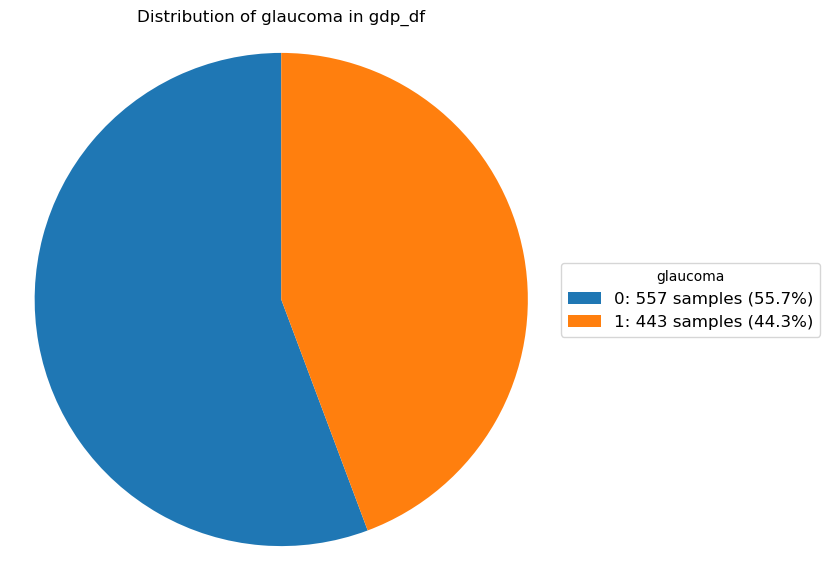

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_column(df, column_name):
    counts = df[column_name].value_counts(dropna=False)
    labels = counts.index.astype(str)
    values = counts.values
    percentages = 100 * values / values.sum()

    plt.figure(figsize=(7,7))
    wedges, _ = plt.pie(values, labels=None, startangle=90, textprops={'fontsize': 12})  # No labels on slices

    # Legend with category name, count, and percentage
    legend_labels = [f"{lab}: {val} samples ({pct:.1f}%)" for lab, val, pct in zip(labels, values, percentages)]
    plt.legend(wedges, legend_labels, title=column_name, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

    plt.axis('equal')  # Equal aspect ratio for perfect circle
    plt.title(f"Distribution of {column_name} in gdp_df")
    plt.show()

# Example usage
plot_pie_column(gdp_df, 'glaucoma')

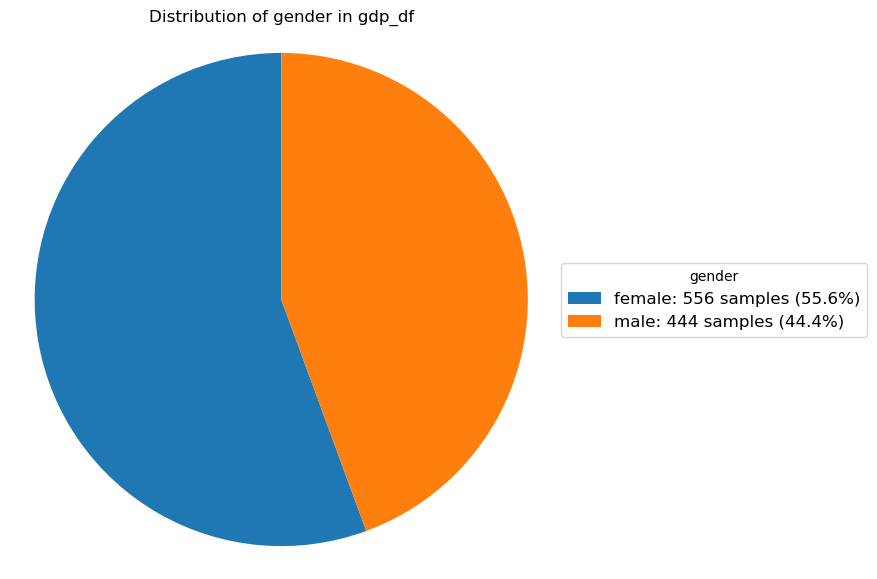

In [6]:
plot_pie_column(gdp_df, 'gender')

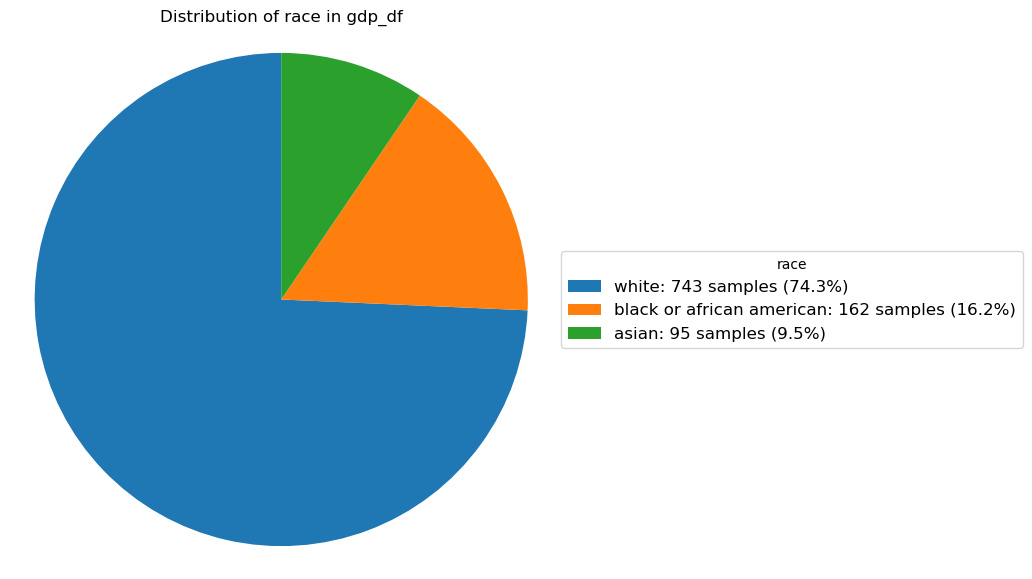

In [7]:
plot_pie_column(gdp_df, 'race')

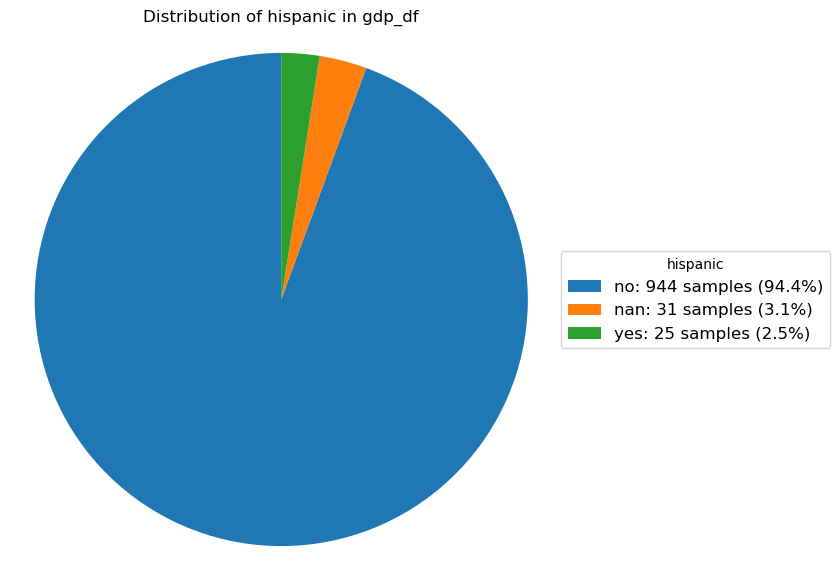

In [8]:
plot_pie_column(gdp_df, 'hispanic')

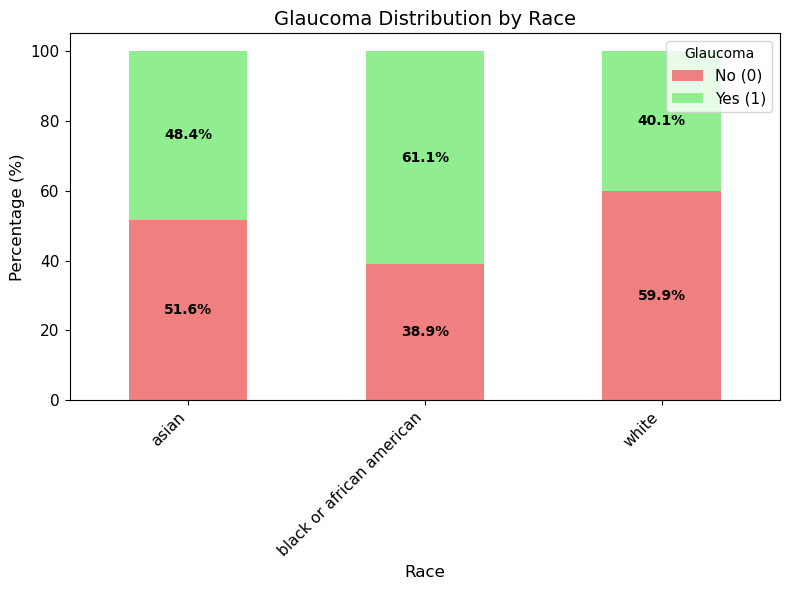

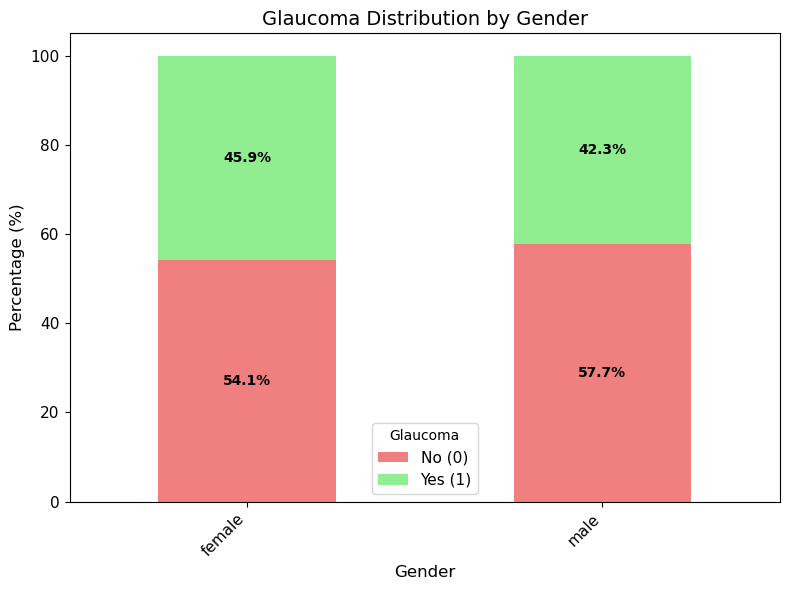

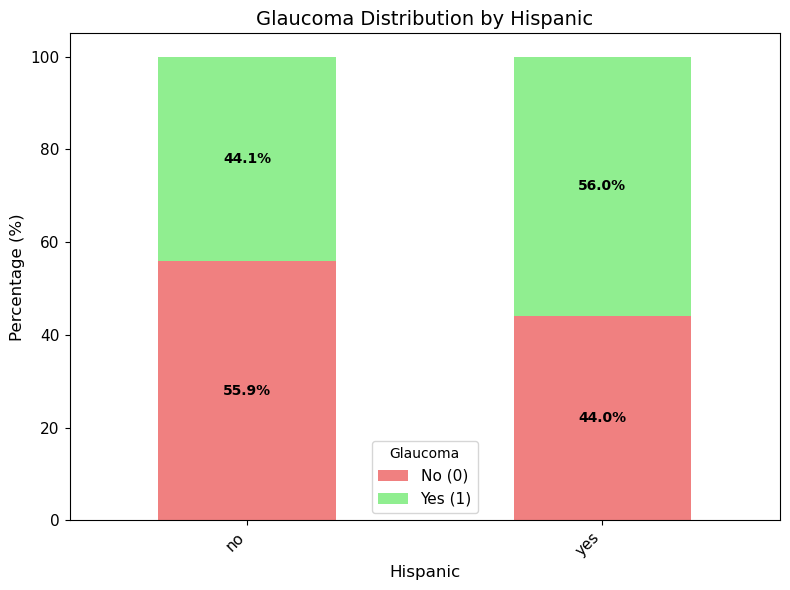

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_glaucoma_by_category(df, category_col):
    # Group by the category (e.g., race, gender, hispanic) and glaucoma status
    grouped = df.groupby([category_col, 'glaucoma']).size().unstack(fill_value=0)

    # Calculate percentages within each category
    grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Plot as stacked bar chart
    ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(8,6), color=['lightcoral', 'lightgreen'])
    
    plt.title(f"Glaucoma Distribution by {category_col.capitalize()}", fontsize=14)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xlabel(category_col.capitalize(), fontsize=12)
    plt.legend(["No (0)", "Yes (1)"], title="Glaucoma", fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    
    # Annotate bars with percentages
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            ax.text(x, y, f"{height:.1f}%", ha='center', va='center', fontsize=10, color='black', weight='bold')

    plt.tight_layout()
    plt.show()


# Demographic-wise glaucoma plots
for col in ['race', 'gender', 'hispanic']:
    plot_glaucoma_by_category(gdp_df, col)

In [10]:
# Enhanced analysis functions: insert after gdp_df data load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_missing_values(df):
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    return missing_summary[missing_summary['Missing_Count'] > 0]

def analyze_rnflt_statistics(rnflt_folder, df, sample_size=100):
    thickness_stats = []
    for i in range(min(sample_size, len(df))):
        try:
            data_npz = np.load(os.path.join(rnflt_folder, f"data_{i+1:04d}.npz"))
            rnflt_map = data_npz['rnflt']
            stats = {
                'filename': f"data_{i+1:04d}",
                'mean_thickness': np.mean(rnflt_map),
                'std_thickness': np.std(rnflt_map),
                'min_thickness': np.min(rnflt_map),
                'max_thickness': np.max(rnflt_map),
                'median_thickness': np.median(rnflt_map),
                'glaucoma': df.iloc[i]['glaucoma'] if i < len(df) else 0
            }
            thickness_stats.append(stats)
        except Exception as e:
            print(f"Error processing {i+1:04d}: {e}")
            continue
    return pd.DataFrame(thickness_stats)

def plot_age_distribution_with_glaucoma(df):
    plt.figure(figsize=(12, 6))
    bins = np.arange(20, 90, 5)
    glaucoma_data = df[df['glaucoma'] == 1]['age']
    normal_data = df[df['glaucoma'] == 0]['age']
    plt.hist(normal_data, bins=bins, alpha=0.7, label='Normal (0)', color='lightgreen', density=True)
    plt.hist(glaucoma_data, bins=bins, alpha=0.7, label='Glaucoma (1)', color='lightcoral', density=True)
    plt.xlabel('Age (years)')
    plt.ylabel('Density')
    plt.title('Age Distribution by Glaucoma Status')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_sample_rnflt_maps(rnflt_folder, df, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    normal_samples = df[df['glaucoma'] == 0].head(3)
    glaucoma_samples = df[df['glaucoma'] == 1].head(3)
    samples = pd.concat([normal_samples, glaucoma_samples])
    for i, (idx, row) in enumerate(samples.iterrows()):
        try:
            data_npz = np.load(os.path.join(rnflt_folder, f"{row['filename']}.npz"))
            rnflt_map = data_npz['rnflt']
            im = axes[i].imshow(rnflt_map, cmap='viridis')
            label = 'Glaucoma' if row['glaucoma'] == 1 else 'Normal'
            axes[i].set_title(f"{row['filename']} - {label}")
            axes[i].axis('off')
            plt.colorbar(im, ax=axes[i], shrink=0.8)
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f"{row['filename']} - Error")
    plt.tight_layout()
    plt.show()

Column  \
hispanic                                                    hispanic   
progression.md                                        progression.md   
progression.vfi                                      progression.vfi   
progression.td_pointwise                    progression.td_pointwise   
progression.md_fast                              progression.md_fast   
progression.md_fast_no_p_cut            progression.md_fast_no_p_cut   
progression.td_pointwise_no_p_cut  progression.td_pointwise_no_p_cut   
progression_forecasting_use              progression_forecasting_use   

                                   Missing_Count  Missing_Percentage Data_Type  
hispanic                                      31                 3.1    object  
progression.md                               500                50.0   float64  
progression.vfi                              500                50.0   float64  
progression.td_pointwise                     500                50.0   float64  
progression.md_fast                          500                50.0   float64  
progression.md_fast_no_p_cut                 500                50.0   float64  
progression.td_pointwise_no_p_cut            500                50.0   float64  
progression_forecasting_use                  500                50.0    object

mean_thickness  std_thickness  min_thickness  max_thickness  \
count      100.000000     100.000000          100.0     100.000000   
mean        64.207742      39.516720           -2.0     228.963636   
std          9.990598       8.086975            0.0      43.868059   
min         36.430666      21.168493           -2.0     140.000000   
25%         57.656933      34.371221           -2.0     198.863636   
50%         66.092292      40.188096           -2.0     224.318182   
75%         71.517141      44.861973           -2.0     257.727273   
max         82.707622      58.231954           -2.0     350.000000   

       median_thickness    glaucoma  
count        100.000000  100.000000  
mean          58.370455    0.470000  
std            9.608707    0.501614  
min            0.000000    0.000000  
25%           54.090909    0.000000  
50%           58.863636    0.000000  
75%           63.636364    1.000000  
max           77.954545    1.000000

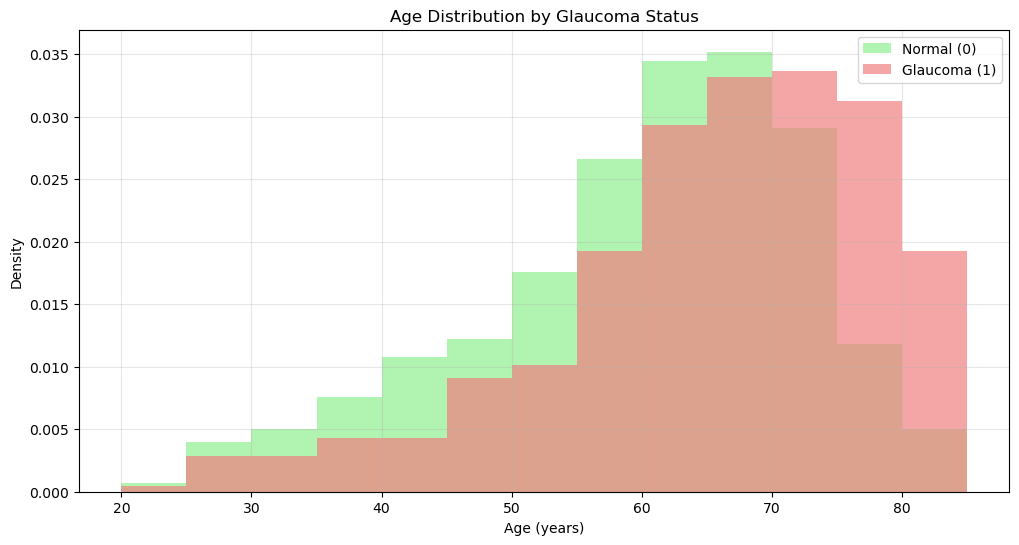

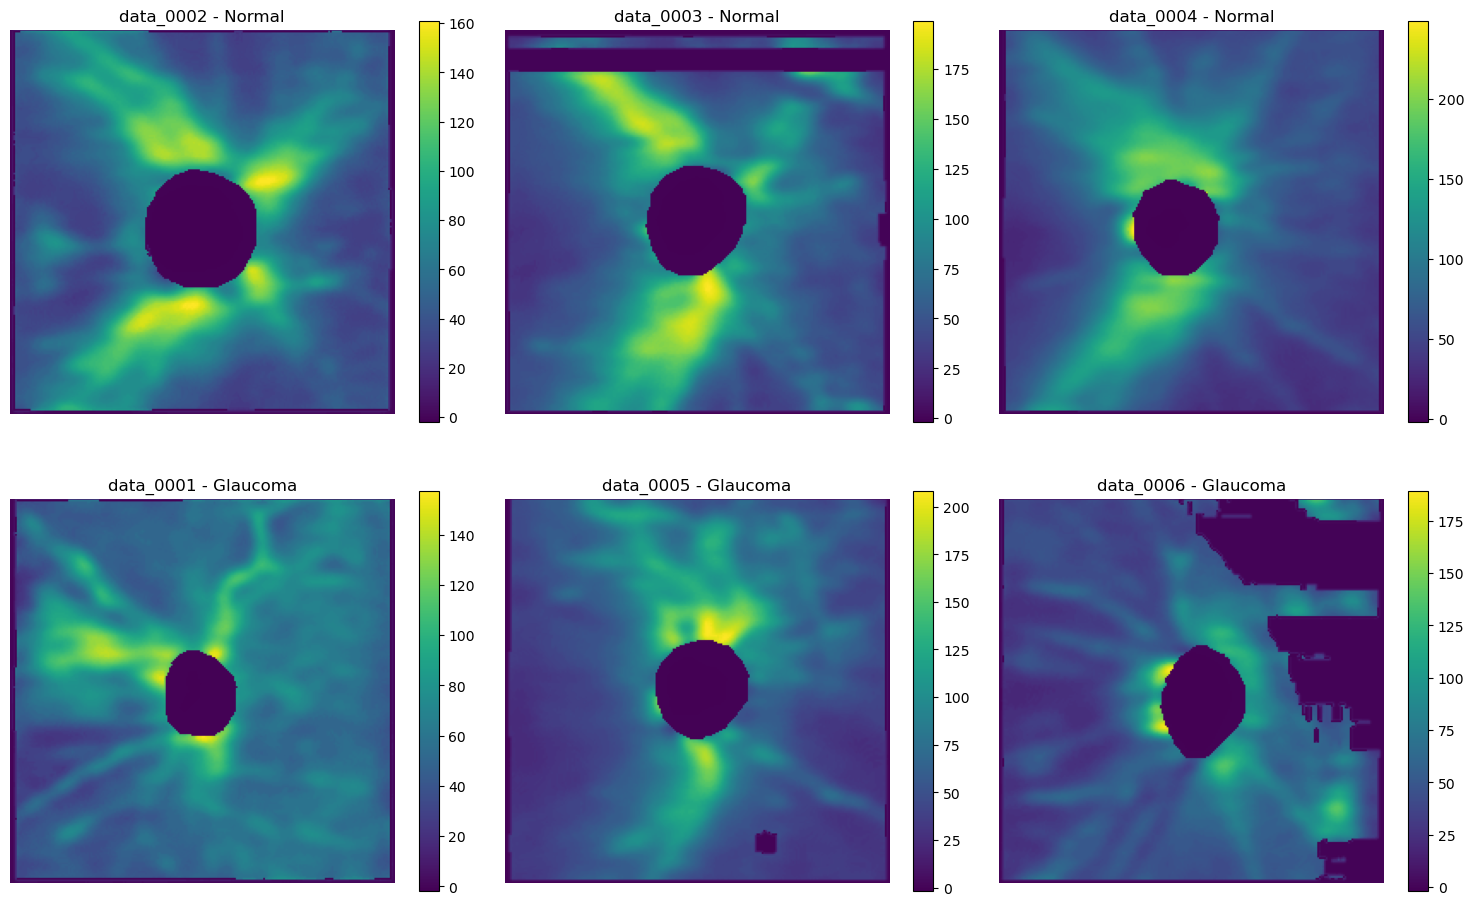

In [11]:
# GDP missing value analysis
missing = analyze_missing_values(gdp_df)
if not missing.empty:
    display(missing)
else:
    print("No missing values found in GDP dataset.")

# RNFLT statistics
rnflt_stats = analyze_rnflt_statistics(gdp_rnflt_folder, gdp_df, sample_size=100)
display(rnflt_stats.describe())

# Age distribution
plot_age_distribution_with_glaucoma(gdp_df)

# Visualize sample RNFLT maps
visualize_sample_rnflt_maps(gdp_rnflt_folder, gdp_df, num_samples=6)

## GF DATASET

### Data Exploration

In [12]:
## File Paths
gf_csv_path = r"C:\Users\SHREY\Desktop\ssld-oct\GF\data_summary.csv"
gf_rnflt_folder = r"C:\Users\SHREY\Desktop\ssld-oct\GF\GF"

In [13]:
import pandas as pd
import numpy as np
gf_df = pd.read_csv(gf_csv_path)

print("Number of records:", len(gdp_df))
print("Columns:", gdp_df.columns.tolist())
print("First few rows:")
display(gf_df.head())

Number of records: 1000
Columns: ['filename', 'gender', 'age', 'race', 'hispanic', 'glaucoma', 'progression.md', 'progression.vfi', 'progression.td_pointwise', 'progression.md_fast', 'progression.md_fast_no_p_cut', 'progression.td_pointwise_no_p_cut', 'glaucoma_detection_use', 'progression_forecasting_use', 'md', 'td1', 'td2', 'td3', 'td4', 'td5', 'td6', 'td7', 'td8', 'td9', 'td10', 'td11', 'td12', 'td13', 'td14', 'td15', 'td16', 'td17', 'td18', 'td19', 'td20', 'td21', 'td22', 'td23', 'td24', 'td26', 'td27', 'td28', 'td29', 'td30', 'td31', 'td32', 'td33', 'td35', 'td36', 'td37', 'td38', 'td39', 'td40', 'td41', 'td42', 'td43', 'td44', 'td45', 'td46', 'td47', 'td48', 'td49', 'td50', 'td51', 'td52', 'td53', 'td54']
First few rows:


filename    age  gender   race     ethnicity language  \
0  data_0001.npz  43.31    male  asian  non-hispanic  english   
1  data_0002.npz  18.02  female  white  non-hispanic  english   
2  data_0003.npz  66.42    male  black  non-hispanic  english   
3  data_0004.npz  70.64    male  white  non-hispanic  english   
4  data_0005.npz  71.42  female  asian  non-hispanic  english   

          maritalstatus glaucoma       use  
0                single       no  training  
1                single      yes  training  
2                single      yes  training  
3                single       no  training  
4  married or partnered      yes  training

In [14]:
# Inspect the contents and keys of the .npz file
data_npz = np.load(r"C:\Users\SHREY\Desktop\ssld-oct\GF\GF\data_0001.npz")
print("Type:", type(data_npz))
if hasattr(data_npz, 'files'):
    print("Keys inside .npz:", data_npz.files)
    # If keys list has something (say, ['data']), then try data_npz['data']
    # If keys list is empty, must be a simple array, try converting direct
    if len(data_npz.files) > 0:
        print("Shape:", data_npz[data_npz.files[0]].shape)
    else:
        print("Empty or corrupted npz file?")
else:
    print("This is not an npz archive, but probably a plain array")
    print("Shape:", data_npz.shape)

Type: <class 'numpy.lib.npyio.NpzFile'>
Keys inside .npz: ['oct_bscans', 'rnflt', 'md', 'glaucoma', 'tds', 'race', 'male', 'hispanic', 'language', 'maritalstatus', 'age']
Shape: (200, 200, 200)


In [15]:
import glob
import os

all_img_files = sorted(glob.glob(os.path.join(gf_rnflt_folder, "*.npz")))
num_imgs = len(all_img_files)
print("Total RNFLT images found:", num_imgs)

# Check for missing image files based on CSV entries
missing_files = []
for i in range(1, len(gf_df)+1):
    expected_path = os.path.join(gf_rnflt_folder, f"data_{i:04d}.npz")
    if not os.path.exists(expected_path):
        missing_files.append(expected_path)

if missing_files:
    print("Missing image files:")
    for f in missing_files:
        print(f)
else:
    print("All CSV records have corresponding RNFLT images.")

Total RNFLT images found: 3300
All CSV records have corresponding RNFLT images.


### Data Visualization

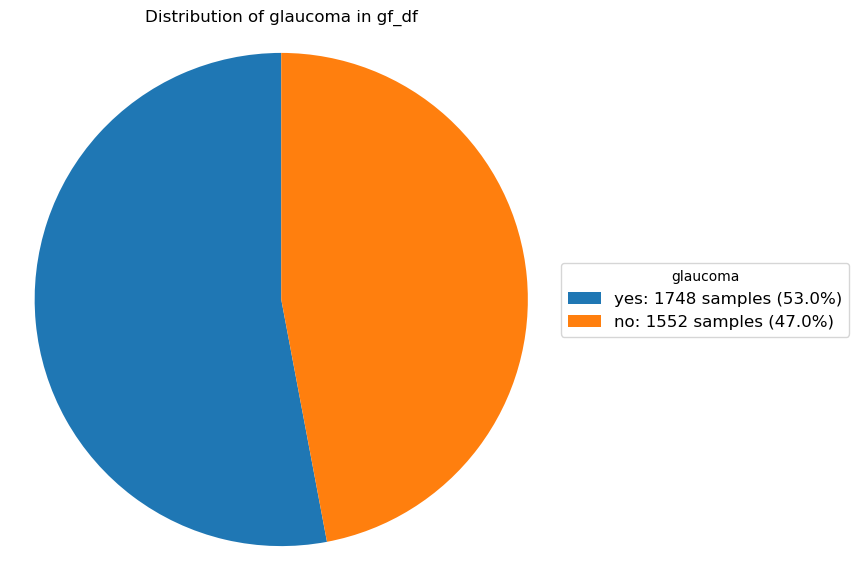

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_column(df, column_name):
    counts = df[column_name].value_counts(dropna=False)
    labels = counts.index.astype(str)
    values = counts.values
    percentages = 100 * values / values.sum()

    plt.figure(figsize=(7,7))
    wedges, _ = plt.pie(values, labels=None, startangle=90, textprops={'fontsize': 12})  # No labels on slices

    # Legend with category name, count, and percentage
    legend_labels = [f"{lab}: {val} samples ({pct:.1f}%)" for lab, val, pct in zip(labels, values, percentages)]
    plt.legend(wedges, legend_labels, title=column_name, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

    plt.axis('equal')  # Equal aspect ratio for perfect circle
    plt.title(f"Distribution of {column_name} in gf_df")
    plt.show()

plot_pie_column(gf_df, 'glaucoma')

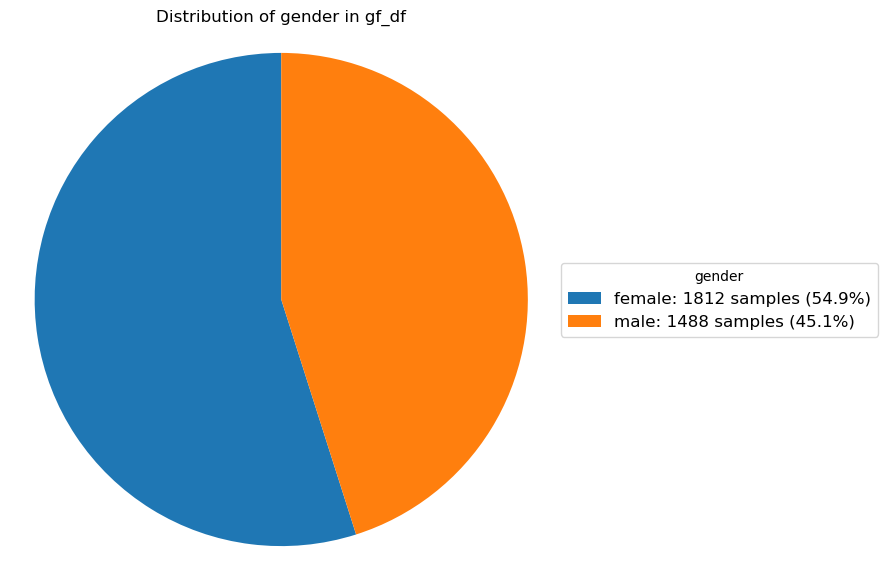

In [17]:
plot_pie_column(gf_df, 'gender')

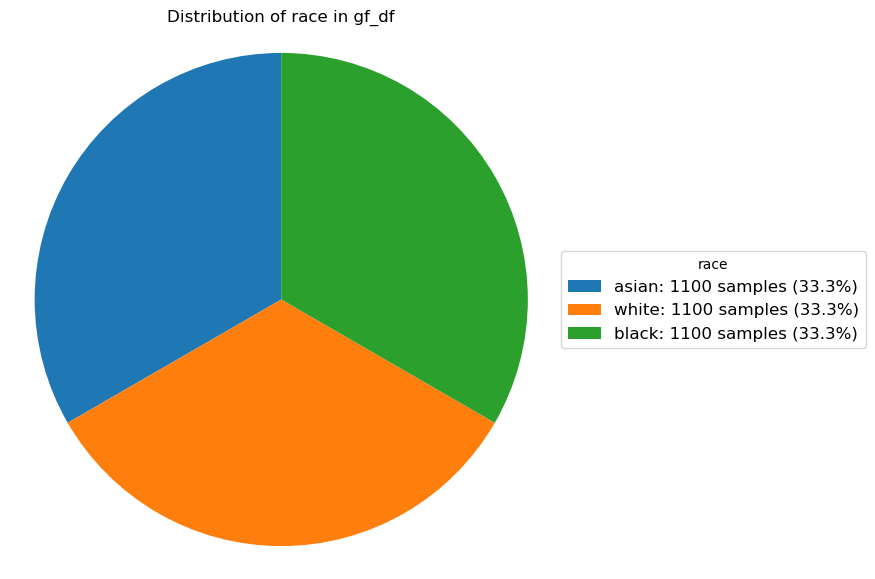

In [18]:
plot_pie_column(gf_df, 'race')

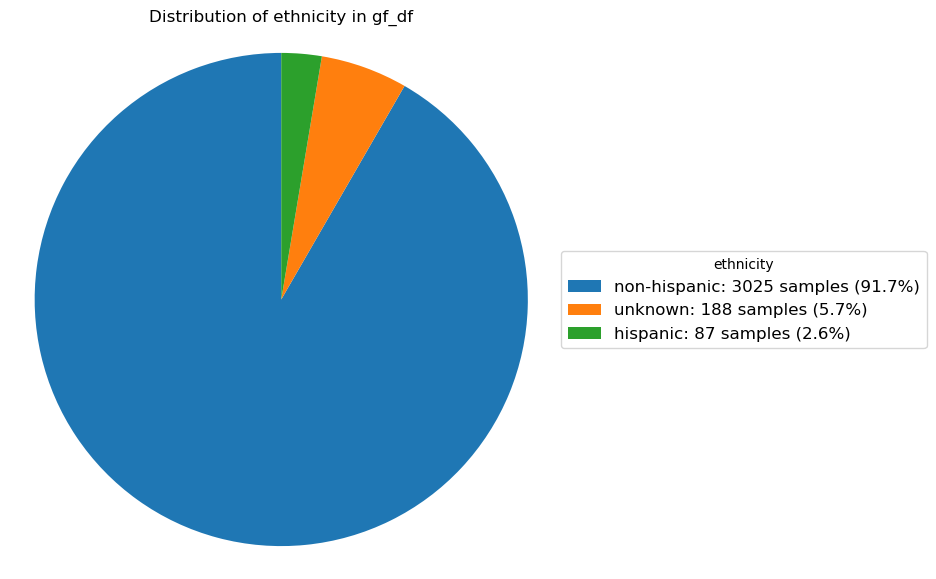

In [19]:
plot_pie_column(gf_df, 'ethnicity')

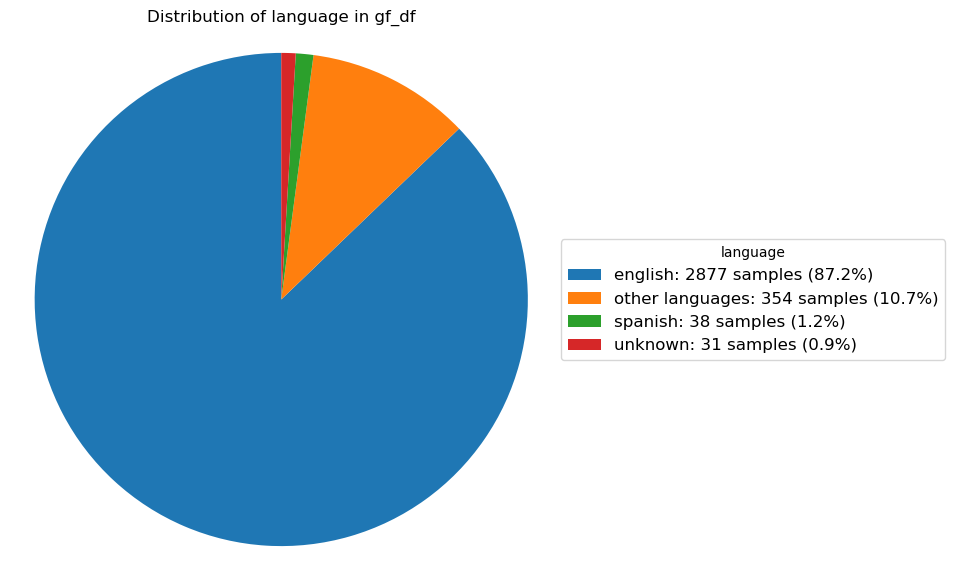

In [20]:
plot_pie_column(gf_df, 'language')

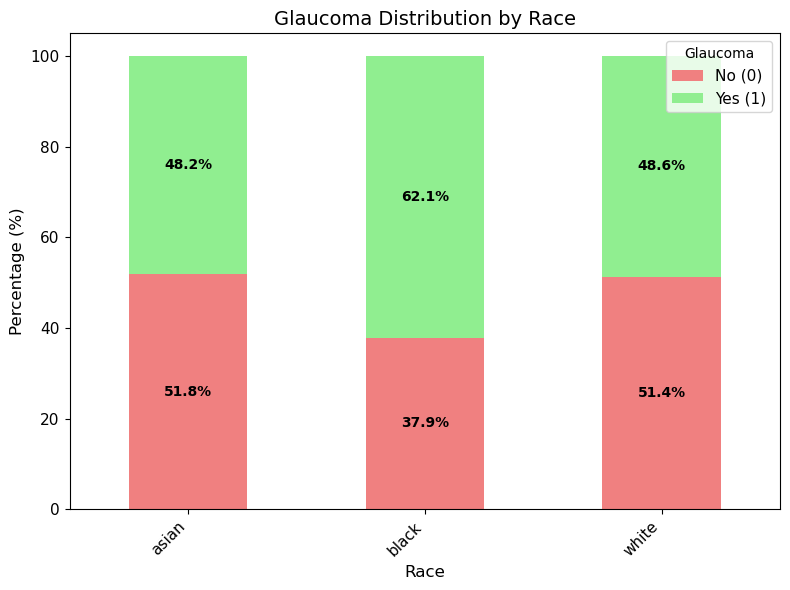

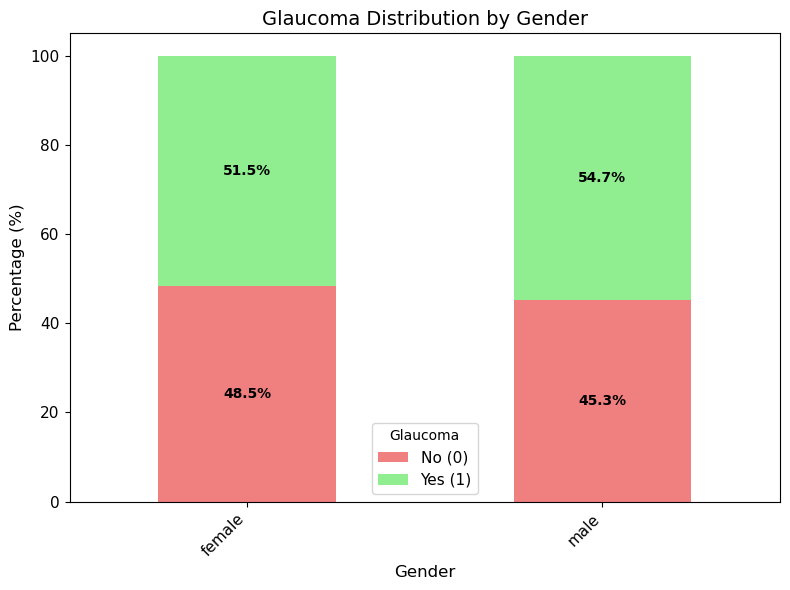

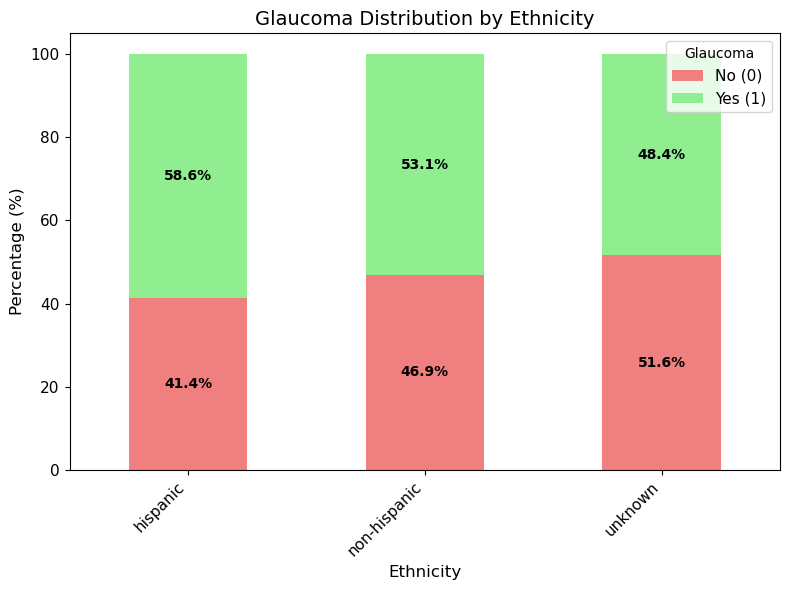

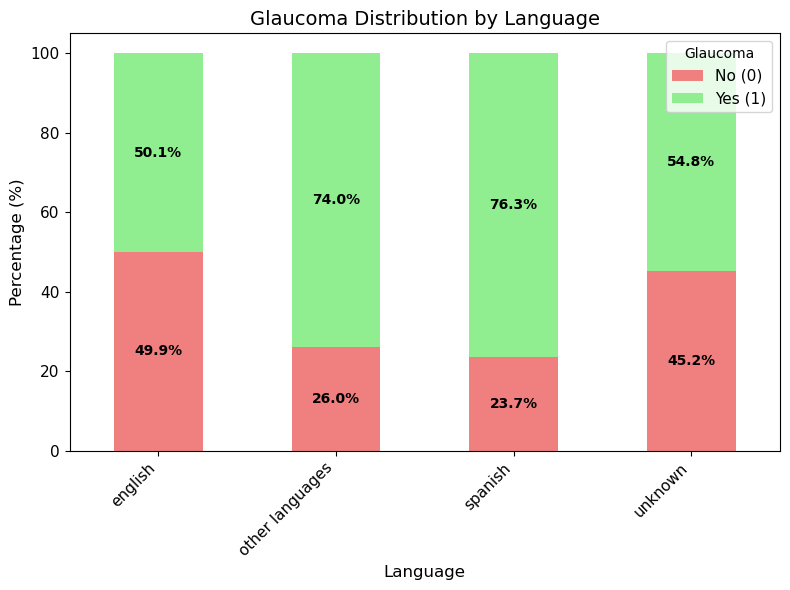

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_glaucoma_by_category(df, category_col):
    # Group by the category (e.g., race, gender, hispanic) and glaucoma status
    grouped = df.groupby([category_col, 'glaucoma']).size().unstack(fill_value=0)

    # Calculate percentages within each category
    grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Plot as stacked bar chart
    ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(8,6), color=['lightcoral', 'lightgreen'])
    
    plt.title(f"Glaucoma Distribution by {category_col.capitalize()}", fontsize=14)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xlabel(category_col.capitalize(), fontsize=12)
    plt.legend(["No (0)", "Yes (1)"], title="Glaucoma", fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    
    # Annotate bars with percentages
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            ax.text(x, y, f"{height:.1f}%", ha='center', va='center', fontsize=10, color='black', weight='bold')

    plt.tight_layout()
    plt.show()


# Demographic-wise glaucoma plots
for col in ['race', 'gender', 'ethnicity', 'language']:
    plot_glaucoma_by_category(gf_df, col)

No missing values found in GF dataset.


mean_thickness  std_thickness  min_thickness  max_thickness  \
count      100.000000     100.000000          100.0     100.000000   
mean        67.502058      42.047392           -2.0     244.847957   
std         11.677775      15.502940            0.0      89.112896   
min         43.027553      23.258336           -2.0     136.852100   
25%         61.734740      36.125008           -2.0     198.924303   
50%         68.076919      40.486293           -2.0     222.873420   
75%         73.485666      45.576252           -2.0     273.704200   
max        128.629232     151.781726           -2.0     785.922060   

       median_thickness    glaucoma  
count        100.000000  100.000000  
mean          58.865953    0.470000  
std            7.507252    0.501614  
min           39.100600    0.000000  
25%           54.740840    0.000000  
50%           58.650900    0.000000  
75%           62.560960    1.000000  
max           82.111260    1.000000

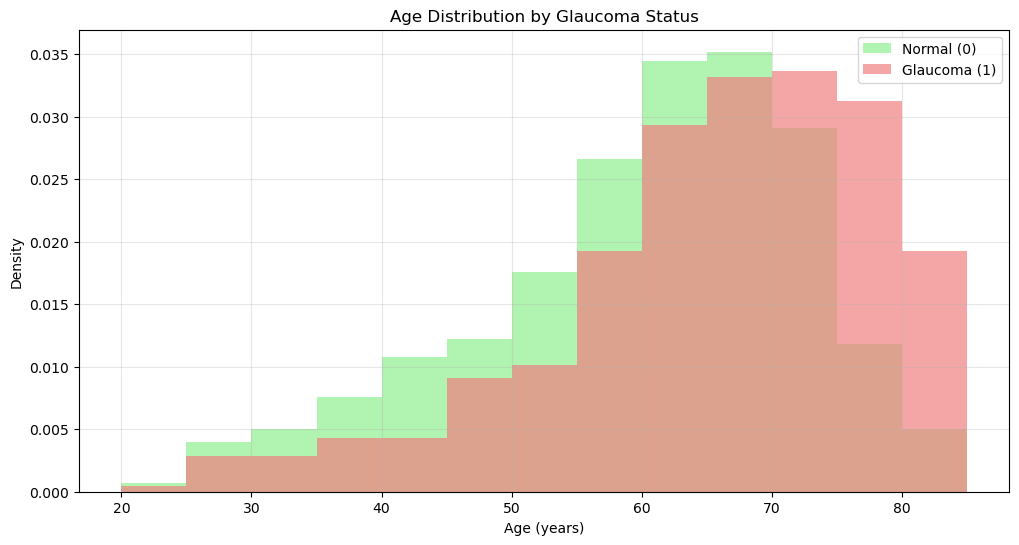

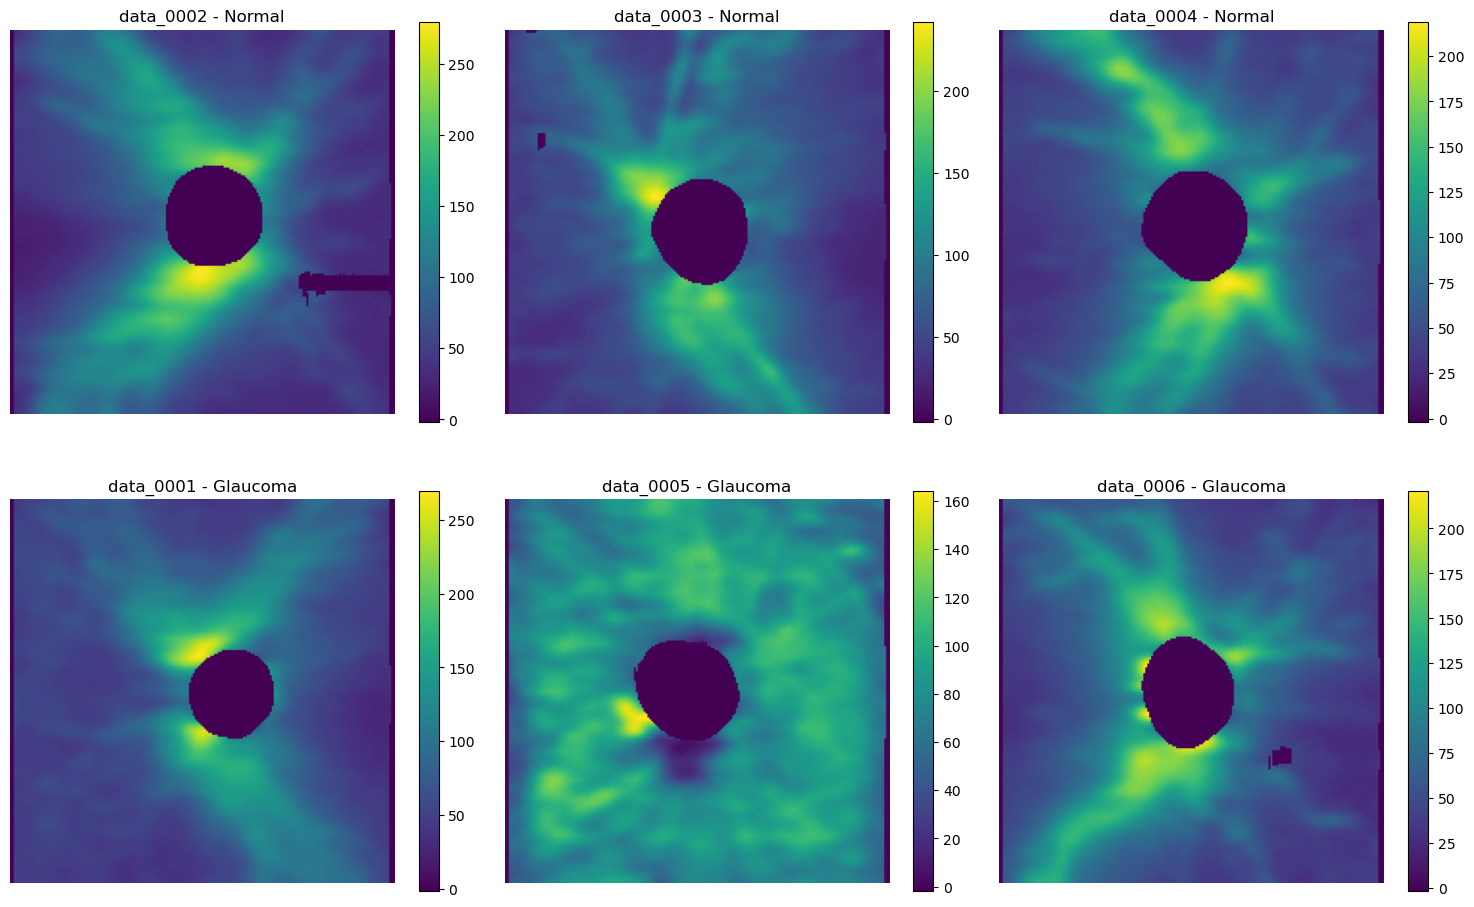

In [22]:
# GDP missing value analysis
missing = analyze_missing_values(gf_df)
if not missing.empty:
    display(missing)
else:
    print("No missing values found in GF dataset.")

# RNFLT statistics
rnflt_stats = analyze_rnflt_statistics(gf_rnflt_folder, gdp_df, sample_size=100)
display(rnflt_stats.describe())

# Age distribution
plot_age_distribution_with_glaucoma(gdp_df)

# Visualize sample RNFLT maps
visualize_sample_rnflt_maps(gf_rnflt_folder, gdp_df, num_samples=6)

## Dataset Merging, Splitting and Setting up Data Loaders

### Dataset Class Definition and Merging

In [32]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import os

class UnifiedHarvardDataset(Dataset):
    """
    Unified dataset class for both Harvard GDP and GF datasets.
    Handles different data formats (2D/3D GF) automatically while providing a consistent interface.
    """

    def __init__(self, dataset_configs, split_indices=None, ssl_mode='supervised', 
                 use_augmentation=False, include_metadata=True):
        """
        Initialize unified dataset

        Args:
            dataset_configs: List of dataset configurations
            split_indices: Indices to use after combining datasets
            ssl_mode: 'supervised', 'unsupervised', or 'test'
            use_augmentation: Whether to apply data augmentation
            include_metadata: Whether to return demographic metadata
        """
        self.dataset_configs = dataset_configs
        self.ssl_mode = ssl_mode
        self.use_augmentation = use_augmentation
        self.include_metadata = include_metadata

        # Combine datasets
        print("Loading and combining datasets...")
        self.combined_df = self._load_and_combine_datasets()

        # Apply split indices if provided
        if split_indices is not None:
            print(f"Applying split with {len(split_indices)} indices")
            self.combined_df = self.combined_df.iloc[split_indices].reset_index(drop=True)

        # Compute normalization statistics
        print("Computing normalization statistics...")
        self.normalization_stats = self._compute_normalization_stats()

        # Summary
        dataset_counts = self.combined_df['dataset_source'].value_counts()
        print(f"\nUnified dataset initialized:")
        print(f"Total samples: {len(self.combined_df)}")
        print(f"Dataset composition: {dataset_counts.to_dict()}")
        if 'glaucoma' in self.combined_df.columns:
            glaucoma_counts = self.combined_df['glaucoma'].value_counts()
            print(f"Glaucoma distribution: {glaucoma_counts.to_dict()}")

    def _load_and_combine_datasets(self):
        """Load and combine all datasets with proper indexing"""
        combined_df = pd.DataFrame()

        for config in self.dataset_configs:
            print(f"Loading {config['type']} dataset...")

            # Load CSV
            df = pd.read_csv(config['csv'])

            if 'glaucoma' in df.columns:
                glaucoma_mapping = {'no': 0, 'yes': 1, '0': 0, '1': 1, 0: 0, 1: 1}
                df['glaucoma'] = df['glaucoma'].astype(str).str.lower().map(glaucoma_mapping).fillna(0).astype(int)

            # Add dataset identification
            df['dataset_source'] = config['type']
            df['original_index'] = df.index.copy()  # Store original CSV index
            df['folder_path'] = config['folder']

            # Add GF-specific configuration
            if config['type'] == 'GF':
                df['rnflt_slice'] = config.get('rnflt_slice', 100)  # Default middle slice
            else:
                df['rnflt_slice'] = None

            # Standardize column names between datasets
            if 'male' in df.columns and 'gender' not in df.columns:
                df['gender'] = df['male']  # Convert GF 'male' to 'gender'

            print(f"  - Loaded {len(df)} samples from {config['type']}")

            # Combine
            combined_df = pd.concat([combined_df, df], ignore_index=True)

        return combined_df

    def _compute_normalization_stats(self, sample_size=100):
        """Compute separate normalization statistics for each dataset type"""
        normalization_stats = {}

        for dataset_type in self.combined_df['dataset_source'].unique():
            print(f"Computing stats for {dataset_type}...")

            dataset_samples = self.combined_df[self.combined_df['dataset_source'] == dataset_type]
            thickness_values = []

            # Sample files for statistics
            sample_indices = np.random.choice(
                len(dataset_samples), 
                min(sample_size, len(dataset_samples)), 
                replace=False
            )

            for i in sample_indices:
                try:
                    sample = dataset_samples.iloc[i]
                    file_path = os.path.join(
                        sample['folder_path'], 
                        f"data_{sample['original_index']+1:04d}.npz"
                    )

                    if os.path.exists(file_path):
                        data_npz = np.load(file_path)

                        if dataset_type == 'GDP':
                            rnflt_map = data_npz['rnflt']
                        elif dataset_type == 'GF':
                            rnflt_data = data_npz['rnflt']
                            # Handle 3D and 2D separately
                            if len(rnflt_data.shape) == 3:
                                slice_idx = int(sample.get('rnflt_slice', rnflt_data.shape[2]//2))
                                slice_idx = min(max(0, slice_idx), rnflt_data.shape[2]-1)
                                rnflt_map = rnflt_data[:, :, slice_idx]
                            elif len(rnflt_data.shape) == 2:
                                rnflt_map = rnflt_data
                            else:
                                print(f"    Warning: Unexpected RNFLT shape {rnflt_data.shape} in GF sample")
                                continue

                        thickness_values.extend(rnflt_map.flatten())

                except Exception as e:
                    print(f"    Warning: Error processing {dataset_type} sample {i}: {e}")
                    continue

            # Compute statistics
            if thickness_values:
                mean_val = np.mean(thickness_values)
                std_val = np.std(thickness_values)

                # Handle edge cases
                if std_val == 0 or np.isnan(std_val):
                    std_val = 1.0

                normalization_stats[dataset_type] = {
                    'mean': float(mean_val),
                    'std': float(std_val)
                }
            else:
                print(f"    Warning: No valid samples found for {dataset_type}")
                normalization_stats[dataset_type] = {'mean': 0.0, 'std': 1.0}

            stats = normalization_stats[dataset_type]
            print(f"    {dataset_type}: mean={stats['mean']:.2f}, std={stats['std']:.2f}")

        return normalization_stats

    def __len__(self):
        return len(self.combined_df)

    def __getitem__(self, idx):
        """Get a single sample with consistent preprocessing"""
        sample_info = self.combined_df.iloc[idx]
        dataset_type = sample_info['dataset_source']
        original_idx = sample_info['original_index']
        folder_path = sample_info['folder_path']

        # Construct file path
        file_path = os.path.join(folder_path, f"data_{original_idx+1:04d}.npz")

        try:
            data_npz = np.load(file_path)

            # Load RNFLT data based on dataset type
            if dataset_type == 'GDP':
                rnflt_map = data_npz['rnflt'].astype(np.float32)

            elif dataset_type == 'GF':
                rnflt_data = data_npz['rnflt'].astype(np.float32)
                if len(rnflt_data.shape) == 3:
                    slice_idx = int(sample_info.get('rnflt_slice', rnflt_data.shape[2]//2))
                    slice_idx = min(max(0, slice_idx), rnflt_data.shape[2]-1)  # Ensure valid slice
                    rnflt_map = rnflt_data[:, :, slice_idx]
                elif len(rnflt_data.shape) == 2:
                    rnflt_map = rnflt_data
                else:
                    raise ValueError(f"Unexpected GF RNFLT shape: {rnflt_data.shape}")

            # Normalize using dataset-specific statistics
            stats = self.normalization_stats[dataset_type]
            rnflt_map = (rnflt_map - stats['mean']) / (stats['std'] + 1e-8)

            # Convert to tensor and resize to standard 224x224
            rnflt_tensor = torch.tensor(rnflt_map, dtype=torch.float32).unsqueeze(0)
            rnflt_resized = torch.nn.functional.interpolate(
                rnflt_tensor.unsqueeze(0), 
                size=(224, 224), 
                mode='bilinear', 
                align_corners=False
            ).squeeze(0)

            # Convert to 3-channel for CNN compatibility
            rnflt_3ch = rnflt_resized.repeat(3, 1, 1)

            # Get label (prefer npz over CSV for consistency)
            try:
                if 'glaucoma' in data_npz.files:
                    label = int(data_npz['glaucoma'])
                elif 'glaucoma' in sample_info:
                    # Handle potential string labels
                    glaucoma_val = sample_info['glaucoma']
                    if isinstance(glaucoma_val, str):
                        label = 1 if glaucoma_val.lower() in ['yes', '1', 'true'] else 0
                    else:
                        label = int(glaucoma_val)
                else:
                    label = 0  # Default fallback
            except (ValueError, KeyError):
                label = 0  # Safe fallback

            # Prepare metadata
            metadata = {'dataset_source': dataset_type, 'original_index': original_idx}

            if self.include_metadata:
                # Extract metadata from npz file (preferred) or CSV
                if dataset_type == 'GDP':
                    metadata.update({
                        'age': float(sample_info['age']),
                        'gender': sample_info.get('gender', 0),
                        'race': sample_info.get('race', 0),
                        'hispanic': sample_info.get('hispanic', 0),
                        'md': float(sample_info.get('md', 0.0))
                    })

                elif dataset_type == 'GF':
                    # Try npz first, fall back to CSV
                    metadata.update({
                        'age': float(data_npz.get('age', sample_info['age'])),
                        'gender': int(data_npz.get('male', sample_info.get('gender', 0))),
                        'race': data_npz.get('race', sample_info.get('race', 0)),
                        'hispanic': data_npz.get('hispanic', sample_info.get('hispanic', 0)),
                        'md': float(data_npz.get('md', sample_info.get('md', 0.0)))
                    })

            return rnflt_3ch, label, metadata

        except Exception as e:
            print(f"Error loading {dataset_type} sample {idx} (original: {original_idx}): {e}")

            # Return fallback zero tensor
            return (
                torch.zeros(3, 224, 224, dtype=torch.float32), 
                -1, 
                {'dataset_source': dataset_type, 'original_index': original_idx, 'error': str(e)}
            )

    def get_dataset_info(self):
        """Get summary information about the combined dataset"""
        info = {
            'total_samples': len(self.combined_df),
            'dataset_composition': self.combined_df['dataset_source'].value_counts().to_dict(),
            'normalization_stats': self.normalization_stats
        }

        if 'glaucoma' in self.combined_df.columns:
            info['glaucoma_distribution'] = self.combined_df['glaucoma'].value_counts().to_dict()

        return info

    def validate_dataset(self):
        """Validate dataset integrity"""
        print(f"Validating {len(self)} samples...")
        valid_count = 0
        
        for i in range(min(100, len(self))):  # Sample validation
            try:
                data, label, metadata = self[i]
                if data.shape == (3, 224, 224) and label in [0, 1, -1]:
                    valid_count += 1
            except Exception as e:
                print(f"Validation error at index {i}: {e}")
        
        print(f"Validation: {valid_count}/{min(100, len(self))} samples valid")
        return valid_count > 0

In [33]:
# Define dataset configurations
dataset_configs = [
    {
        'type': 'GDP',
        'folder': r"C:\Users\SHREY\Desktop\ssld-oct\GDP\GDP_RNFLT",
        'csv': r"C:\Users\SHREY\Desktop\ssld-oct\GDP\data_summary.csv"
    },
    {
        'type': 'GF',
        'folder': r"C:\Users\SHREY\Desktop\ssld-oct\GF\GF",
        'csv': r"C:\Users\SHREY\Desktop\ssld-oct\GF\data_summary.csv",
        'rnflt_slice': 100  # Middle slice of 3D volume
    }
]

# Create full unified dataset
print("=== Creating Unified Dataset ===")
full_dataset = UnifiedHarvardDataset(
    dataset_configs=dataset_configs,
    ssl_mode='supervised',
    include_metadata=True
)

# Validate the dataset
full_dataset.validate_dataset()

# Get dataset info
info = full_dataset.get_dataset_info()
print(f"\nDataset Info:")
print(f"Total samples: {info['total_samples']}")
print(f"Dataset composition: {info['dataset_composition']}")
print(f"Glaucoma distribution: {info['glaucoma_distribution']}")

# Test loading a sample
print("\n=== Testing Sample Loading ===")
sample_data, sample_label, sample_metadata = full_dataset[0]
print(f"Sample shape: {sample_data.shape}")
print(f"Sample label: {sample_label}")
print(f"Sample metadata keys: {list(sample_metadata.keys())}")

print("\nUnified dataset creation successful! ✅")

=== Creating Unified Dataset ===
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Computing normalization statistics...
Computing stats for GDP...
    GDP: mean=62.57, std=40.69
Computing stats for GF...
    GF: mean=65.58, std=43.60

Unified dataset initialized:
Total samples: 4300
Dataset composition: {'GF': 3300, 'GDP': 1000}
Glaucoma distribution: {1: 2191, 0: 2109}
Validating 4300 samples...
Validation: 100/100 samples valid

Dataset Info:
Total samples: 4300
Dataset composition: {'GF': 3300, 'GDP': 1000}
Glaucoma distribution: {1: 2191, 0: 2109}

=== Testing Sample Loading ===
Sample shape: torch.Size([3, 224, 224])
Sample label: 1
Sample metadata keys: ['dataset_source', 'original_index', 'age', 'gender', 'race', 'hispanic', 'md']

Unified dataset creation successful! ✅


### Dataset Splitting

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder

def safe_standardize_glaucoma_column(df, col_name='glaucoma'):
    # Map common string labels to integer 0/1
    mapping = {'no': 0, 'yes': 1, '0': 0, '1': 1}
    df[col_name] = df[col_name].astype(str).str.lower().map(mapping)
    # If some entries cannot be mapped, fill with -1 (ignore during split)
    df[col_name] = df[col_name].fillna(-1).astype(int)
    return df

def safe_encode_column(df, column, default=0):
    if column in df.columns:
        if df[column].dtype == 'object' or 'category' in str(df[column].dtype):
            le = LabelEncoder()
            try:
                df[column + '_encoded'] = le.fit_transform(df[column].astype(str))
            except Exception as e:
                print(f"Warning: Failed encoding {column}: {e}")
                df[column + '_encoded'] = default
        else:
            df[column + '_encoded'] = df[column].fillna(default).astype(int)
    else:
        df[column + '_encoded'] = default
    return df

def create_safe_stratification_key(df):
    print("Creating safe stratification key...")

    # Standardize glaucoma values
    df = safe_standardize_glaucoma_column(df, 'glaucoma')

    # Create age group
    df['age_group'] = df['age'].apply(lambda x: '0-50' if x <= 50 else '50+')

    # Handle gender
    if 'male' in df.columns and 'gender' not in df.columns:
        df['gender_std'] = df['male'].astype(int)
    else:
        df = safe_encode_column(df, 'gender', default=0)
        df.rename(columns={'gender_encoded': 'gender_std'}, inplace=True)

    # Ethnicity / hispanic
    if 'hispanic' in df.columns:
        df = safe_encode_column(df, 'hispanic', default=0)
        df.rename(columns={'hispanic_encoded': 'ethnicity_std'}, inplace=True)
    elif 'ethnicity' in df.columns:
        df = safe_encode_column(df, 'ethnicity', default=0)
        df.rename(columns={'ethnicity_encoded': 'ethnicity_std'}, inplace=True)
    else:
        df['ethnicity_std'] = 0

    # Race
    df = safe_encode_column(df, 'race', default=0)

    # Compose stratification key for splitting
    df['strat_key'] = (df['glaucoma'].astype(str) + '_' +
                       df['gender_std'].astype(str) + '_' +
                       df['race_encoded'].astype(str) + '_' +
                       df['ethnicity_std'].astype(str) + '_' +
                       df['age_group'])
    return df

def analyze_balance_safe(df, split_name="Dataset"):
    print(f"\n=== {split_name} Balance Analysis ===")
    print(f"Total samples: {len(df)}")

    print("Glaucoma distribution:")
    print(df['glaucoma'].value_counts())

    print("Gender distribution:")
    print(df['gender_std'].value_counts())

    print("Age group distribution:")
    print(df['age_group'].value_counts())

    print("Race distribution:")
    print(df['race_encoded'].value_counts())

    print("Ethnicity distribution:")
    print(df['ethnicity_std'].value_counts())

    if 'dataset_source' in df.columns:
        print("Dataset Source distribution:")
        print(df['dataset_source'].value_counts())

def safe_stratified_split(indices, labels, test_size=0.2, random_state=42):
    """Safe stratified split that falls back to random split if stratification fails"""
    try:
        # Check if we have enough samples per class
        unique_labels = np.unique(labels)
        min_class_count = min([sum(np.array(labels) == label) for label in unique_labels])
        total_samples = len(indices)
        
        # Need at least 2 samples per class for stratification
        if min_class_count < 2 or total_samples < len(unique_labels) * 2:
            print(f"    Warning: Using random split (insufficient samples for stratification)")
            return train_test_split(indices, test_size=test_size, random_state=random_state)
        
        # Try stratified split
        return train_test_split(indices, test_size=test_size, stratify=labels, random_state=random_state)
        
    except Exception as e:
        print(f"    Warning: Stratification failed ({e}), using random split")
        return train_test_split(indices, test_size=test_size, random_state=random_state)

def create_balanced_ssl_splits(full_dataset, labeled_ratio=0.1, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """
    Create stratified SSL splits ensuring balance across multiple demographic variables
    """
    print("=== Creating Balanced Multi-Variable Stratified SSL Splits ===")

    # Get the combined dataframe from the dataset
    combined_df = full_dataset.combined_df.copy()

    # Create safe stratification key
    combined_df = create_safe_stratification_key(combined_df)
    
    # Analyze original distribution
    analyze_balance_safe(combined_df, "Original Combined Dataset")

    # Check stratification key distribution
    strat_counts = combined_df['strat_key'].value_counts()
    print(f"\nStratification keys: {len(strat_counts)} unique combinations")
    print(f"Min samples per key: {strat_counts.min()}")
    print(f"Max samples per key: {strat_counts.max()}")

    # Filter out keys with too few samples for reliable splitting
    min_samples_threshold = 4  # Need at least 4 samples for splitting
    valid_keys = strat_counts[strat_counts >= min_samples_threshold].index

    if len(strat_counts) - len(valid_keys) > 0:
        print(f"Warning: {len(strat_counts) - len(valid_keys)} stratification keys have <{min_samples_threshold} samples")
        print("These will be handled with simpler stratification")

    # Separate samples with sufficient stratification vs those needing simpler approach
    sufficient_strat_mask = combined_df['strat_key'].isin(valid_keys)
    main_df = combined_df[sufficient_strat_mask].copy()
    simple_df = combined_df[~sufficient_strat_mask].copy()

    print(f"\nSamples with full stratification: {len(main_df)}")
    print(f"Samples with simple stratification: {len(simple_df)}")

    # Create splits for main dataset with full stratification
    if len(main_df) > 0:
        main_indices = main_df.index.tolist()
        main_strat_keys = main_df['strat_key'].tolist()

        # Split 1: Test set
        main_train_val, main_test = safe_stratified_split(
            main_indices, main_strat_keys, 
            test_size=test_ratio, 
            random_state=random_state
        )

        # Split 2: Validation set  
        main_train_val_df = main_df.loc[main_train_val]
        main_train_val_keys = main_train_val_df['strat_key'].tolist()

        main_train, main_val = safe_stratified_split(
            main_train_val, main_train_val_keys,
            test_size=val_ratio/(1-test_ratio),
            random_state=random_state
        )

        # Split 3: Labeled vs Unlabeled
        main_train_df = main_df.loc[main_train]
        main_train_keys = main_train_df['strat_key'].tolist()

        main_labeled, main_unlabeled = safe_stratified_split(
            main_train, main_train_keys,
            test_size=1-labeled_ratio,
            random_state=random_state
        )
    else:
        main_labeled = main_unlabeled = main_val = main_test = []

    # Handle simple stratification samples (use only glaucoma for stratification)
    if len(simple_df) > 0:
        simple_indices = simple_df.index.tolist()
        simple_labels = simple_df['glaucoma'].tolist()

        # Split proportionally using safe splitting
        simple_train_val, simple_test = safe_stratified_split(
            simple_indices, simple_labels, test_size=test_ratio, random_state=random_state
        )

        simple_train_val_df = simple_df.loc[simple_train_val]
        simple_train, simple_val = safe_stratified_split(
            simple_train_val, simple_train_val_df['glaucoma'].tolist(),
            test_size=val_ratio/(1-test_ratio),
            random_state=random_state
        )

        simple_train_df = simple_df.loc[simple_train]
        simple_labeled, simple_unlabeled = safe_stratified_split(
            simple_train, simple_train_df['glaucoma'].tolist(),
            test_size=1-labeled_ratio,
            random_state=random_state
        )
    else:
        simple_labeled = simple_unlabeled = simple_val = simple_test = []

    # Combine main and simple splits
    final_splits = {
        'labeled_train': main_labeled + simple_labeled,
        'unlabeled_train': main_unlabeled + simple_unlabeled,
        'validation': main_val + simple_val,
        'test': main_test + simple_test
    }

    # Analyze each split
    print("\n=== Split Analysis ===")
    for split_name, indices in final_splits.items():
        if len(indices) > 0:
            split_df = combined_df.loc[indices]
            analyze_balance_safe(split_df, f"{split_name.upper()} SET")

            print(f"{split_name:15}: {len(indices):4d} samples")
            if 'glaucoma' in split_df.columns:
                glaucoma_split = split_df['glaucoma'].value_counts()
                print(f"                    Normal: {glaucoma_split.get(0, 0):3d}, Glaucoma: {glaucoma_split.get(1, 0):3d}")

    return final_splits

def create_stratified_datasets(dataset_configs, labeled_ratio=0.1, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """
    Complete function to create stratified datasets with demographic balance
    """

    # 1. Create full combined dataset
    print("=== Creating Full Combined Dataset ===")
    full_dataset = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        ssl_mode='supervised',  # For initial analysis
        include_metadata=True
    )

    # 2. Create balanced splits
    ssl_splits = create_balanced_ssl_splits(
        full_dataset, 
        labeled_ratio=labeled_ratio,
        val_ratio=val_ratio, 
        test_ratio=test_ratio,
        random_state=random_state
    )

    # 3. Create individual datasets for each split
    print("\n=== Creating Final Split Datasets ===")

    datasets = {}

    # Labeled training set
    datasets['labeled_train'] = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        split_indices=ssl_splits['labeled_train'],
        ssl_mode='supervised',
        include_metadata=True
    )

    # Unlabeled training set  
    datasets['unlabeled_train'] = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        split_indices=ssl_splits['unlabeled_train'],
        ssl_mode='unsupervised',  # Labels will be -1 for SSL
        include_metadata=True
    )

    # Validation set
    datasets['validation'] = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        split_indices=ssl_splits['validation'],
        ssl_mode='supervised',
        include_metadata=True
    )

    # Test set
    datasets['test'] = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        split_indices=ssl_splits['test'],
        ssl_mode='supervised',
        include_metadata=True
    )

    # Print final summary
    print("\n=== Final Dataset Summary ===")
    total_samples = sum(len(dataset) for dataset in datasets.values())
    for name, dataset in datasets.items():
        percentage = len(dataset) / total_samples * 100
        print(f"{name:15}: {len(dataset):4d} samples ({percentage:5.1f}%)")

    return datasets, ssl_splits

def validate_demographic_balance(datasets):
    """Validate that demographic balance is maintained across splits"""
    print("\n=== DEMOGRAPHIC BALANCE VALIDATION ===")
    
    for split_name, dataset in datasets.items():
        print(f"\n--- {split_name.upper()} ---")
        print(f"Total samples: {len(dataset)}")
        
        # Sample validation (check first few samples)
        if len(dataset) > 0:
            try:
                sample_data, sample_label, sample_metadata = dataset[0]
                print(f"Sample shape: {sample_data.shape}")
                print(f"Sample dataset source: {sample_metadata.get('dataset_source', 'Unknown')}")
            except Exception as e:
                print(f"Error validating {split_name}: {e}")

In [35]:
# Define dataset configurations
dataset_configs = [
    {
        'type': 'GDP',
        'folder': r"C:\Users\SHREY\Desktop\ssld-oct\GDP\GDP_RNFLT",
        'csv': r"C:\Users\SHREY\Desktop\ssld-oct\GDP\data_summary.csv"
    },
    {
        'type': 'GF',
        'folder': r"C:\Users\SHREY\Desktop\ssld-oct\GF\GF",
        'csv': r"C:\Users\SHREY\Desktop\ssld-oct\GF\data_summary.csv",
        'rnflt_slice': 100
    }
]

# Create stratified datasets
datasets, ssl_splits = create_stratified_datasets(
    dataset_configs=dataset_configs,
    labeled_ratio=0.10,   # 10% labeled
    val_ratio=0.15,       # 15% validation  
    test_ratio=0.15,      # 15% test
    random_state=42
)

# Print results
print("\n=== Final SSL Datasets Ready ===")
print(f"Labeled training: {len(datasets['labeled_train'])} samples")
print(f"Unlabeled training: {len(datasets['unlabeled_train'])} samples")
print(f"Validation: {len(datasets['validation'])} samples")
print(f"Test: {len(datasets['test'])} samples")

=== Creating Full Combined Dataset ===
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Computing normalization statistics...
Computing stats for GDP...
    GDP: mean=62.99, std=40.30
Computing stats for GF...
    GF: mean=63.84, std=42.60

Unified dataset initialized:
Total samples: 4300
Dataset composition: {'GF': 3300, 'GDP': 1000}
Glaucoma distribution: {1: 2191, 0: 2109}
=== Creating Balanced Multi-Variable Stratified SSL Splits ===
Creating safe stratification key...

=== Original Combined Dataset Balance Analysis ===
Total samples: 4300
Glaucoma distribution:
glaucoma
1    2191
0    2109
Name: count, dtype: int64
Gender distribution:
gender_std
0    2368
1    1932
Name: count, dtype: int64
Age group distribution:
age_group
50+     3240
0-50    1060
Name: count, dtype: int64
Race distribution:
race_encoded
3    1843
0    1195
1    1100
2     162
Name: count, dtype: int64
Ethnicity distr

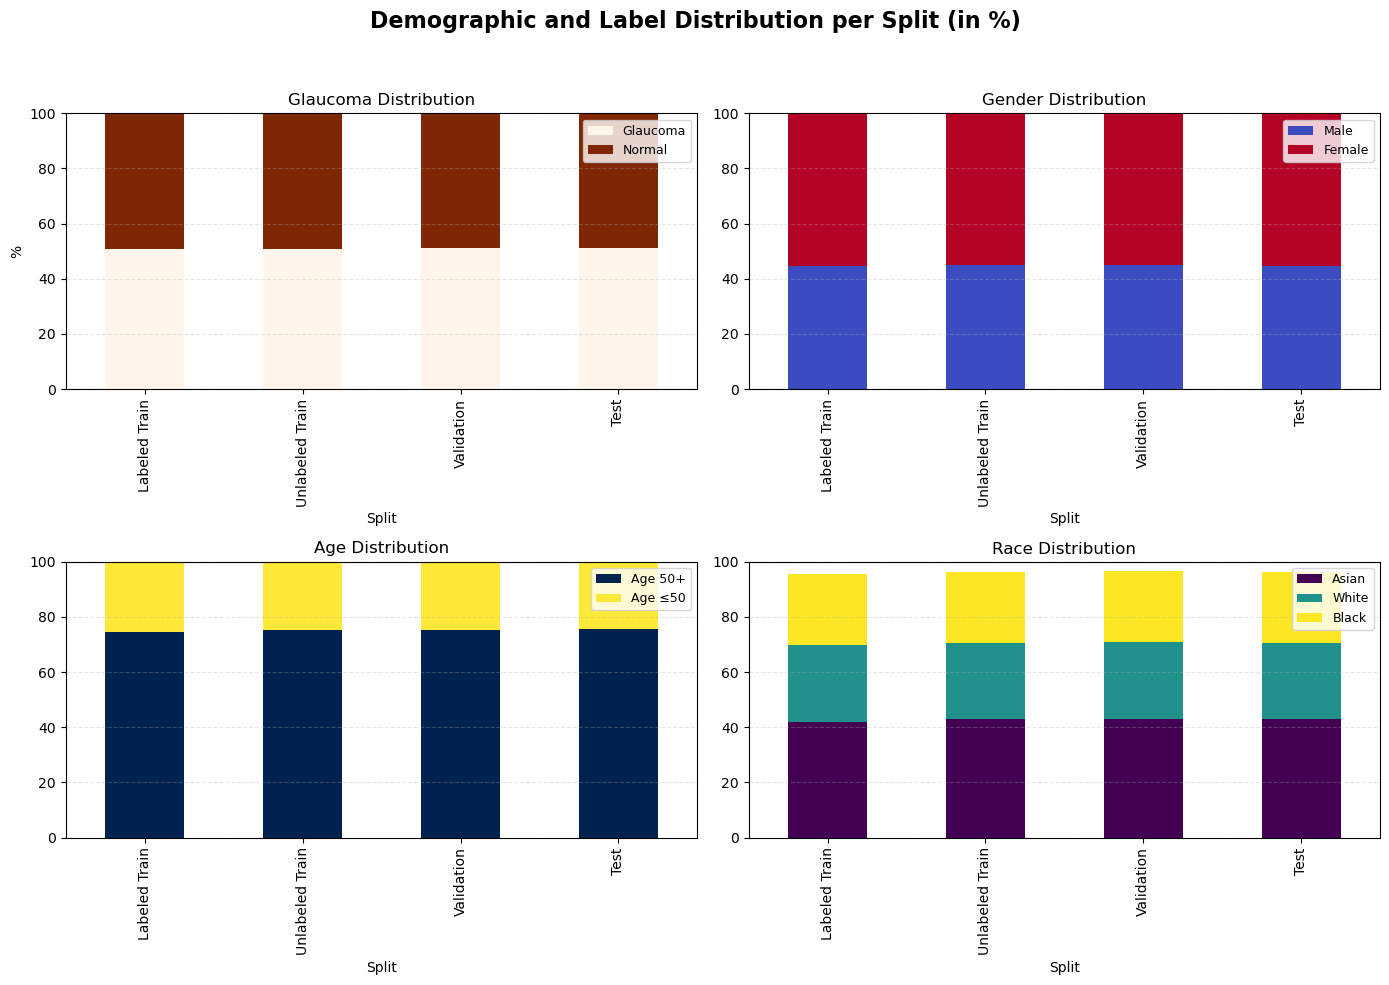

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Data (same as before)
data = {
    'Split': ['Labeled Train', 'Unlabeled Train', 'Validation', 'Test'],
    'Glaucoma': [50.7, 50.9, 51.2, 51.0],
    'Normal': [49.3, 49.1, 48.8, 49.0],
    'Male': [44.7, 45.0, 45.1, 44.8],
    'Female': [55.3, 55.0, 54.9, 55.2],
    'Age 50+': [74.7, 75.4, 75.3, 75.5],
    'Age ≤50': [25.3, 24.6, 24.7, 24.5],
    'Asian': [42.0, 42.9, 42.9, 42.9],
    'White': [28.0, 27.7, 28.2, 27.8],
    'Black': [25.7, 25.6, 25.4, 25.6],
    'Hispanic (Race)': [4.3, 3.8, 3.4, 3.7],
    'Non-Hispanic': [77.0, 77.6, 77.4, 77.1],
    'Hispanic (Ethnicity)': [23.0, 21.7, 22.0, 22.3],
    'Unknown Ethnicity': [0.0, 0.6, 0.6, 0.6],
}

df = pd.DataFrame(data)

# --- Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Demographic and Label Distribution per Split (in %)", fontsize=16, weight='bold')

# 1️⃣ Glaucoma vs Normal
df.plot(x='Split', y=['Glaucoma', 'Normal'], kind='bar', stacked=True, ax=axes[0,0], colormap='Oranges')
axes[0,0].set_title('Glaucoma Distribution')
axes[0,0].set_ylabel('%')

# 2️⃣ Gender
df.plot(x='Split', y=['Male', 'Female'], kind='bar', stacked=True, ax=axes[0,1], colormap='coolwarm')
axes[0,1].set_title('Gender Distribution')

# 3️⃣ Age Group
df.plot(x='Split', y=['Age 50+', 'Age ≤50'], kind='bar', stacked=True, ax=axes[1,0], colormap='cividis')
axes[1,0].set_title('Age Distribution')

# 4️⃣ Ethnicity (replacing Dataset Source)
df.plot(x='Split', 
        y=['Asian', 'White', 'Black'], 
        kind='bar', 
        stacked=True, 
        ax=axes[1,1], 
        colormap='viridis')
axes[1,1].set_title('Race Distribution')

# Styling
for ax in axes.flat:
    ax.set_ylim(0, 100)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3, linestyle='--', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

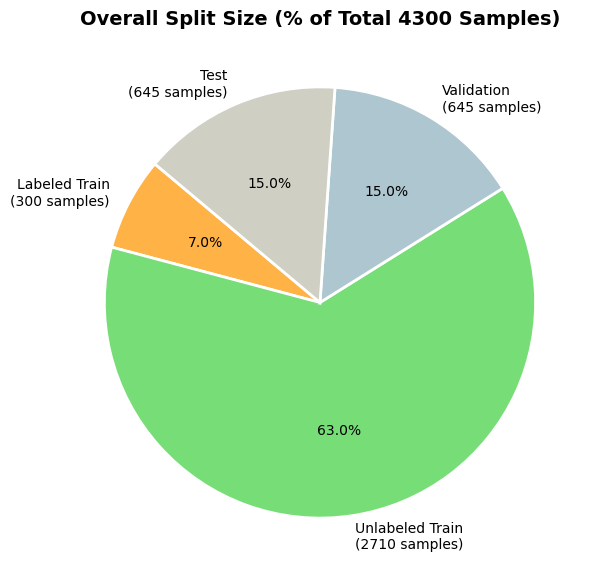

In [37]:
import matplotlib.pyplot as plt

# Data
splits = ['Labeled Train', 'Unlabeled Train', 'Validation', 'Test']
counts = [300, 2710, 645, 645]

# Colors for clarity
colors = ['#FFB347', '#77DD77', '#AEC6CF', '#CFCFC4']

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=[f"{s}\n({c} samples)" for s, c in zip(splits, counts)],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title("Overall Split Size (% of Total 4300 Samples)", fontsize=14, weight='bold')
plt.show()

In [38]:
print(type(ssl_splits))
# <class 'dict'>
print(ssl_splits.keys())
# dict_keys(['labeled_train', 'unlabeled_train', 'validation', 'test'])
# Inspect first few indices in the labeled training split
print(ssl_splits['labeled_train'][:10])

<class 'dict'>
dict_keys(['labeled_train', 'unlabeled_train', 'validation', 'test'])
[3562, 1859, 3072, 3368, 361, 822, 261, 1759, 558, 3040]


In [46]:
summary_str = """=== Creating Full Combined Dataset ===
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Computing normalization statistics...
Computing stats for GDP...
    GDP: mean=62.82, std=39.56
Computing stats for GF...
    GF: mean=65.61, std=50.89

Unified dataset initialized:
Total samples: 4300
Dataset composition: {'GF': 3300, 'GDP': 1000}
Glaucoma distribution: {1: 2191, 0: 2109}
=== Creating Balanced Multi-Variable Stratified SSL Splits ===
Creating safe stratification key...

=== Original Combined Dataset Balance Analysis ===
Total samples: 4300
Glaucoma distribution:
glaucoma
1    2191
0    2109
Name: count, dtype: int64
Gender distribution:
gender_std
0    2368
1    1932
Name: count, dtype: int64
Age group distribution:
age_group
50+     3240
0-50    1060
Name: count, dtype: int64
Race distribution:
race_encoded
3    1843
0    1195
1    1100
2     162
Name: count, dtype: int64
Ethnicity distribution:
ethnicity_std
0    3331
1     944
2      25
Name: count, dtype: int64
Dataset Source distribution:
dataset_source
GF     3300
GDP    1000
Name: count, dtype: int64

Stratification keys: 63 unique combinations
Min samples per key: 1
Max samples per key: 310
Warning: 13 stratification keys have <4 samples
These will be handled with simpler stratification

Samples with full stratification: 4280
Samples with simple stratification: 20
    Warning: Stratification failed (The train_size = 1 should be greater or equal to the number of classes = 2), using random split

=== Split Analysis ===

=== LABELED_TRAIN SET Balance Analysis ===
Total samples: 300
Glaucoma distribution:
glaucoma
1    152
0    148
Name: count, dtype: int64
Gender distribution:
gender_std
0    166
1    134
Name: count, dtype: int64
Age group distribution:
age_group
50+     224
0-50     76
Name: count, dtype: int64
Race distribution:
race_encoded
3    126
0     84
1     77
2     13
Name: count, dtype: int64
Ethnicity distribution:
ethnicity_std
0    231
1     69
Name: count, dtype: int64
Dataset Source distribution:
dataset_source
GF     226
GDP     74
Name: count, dtype: int64
labeled_train  :  300 samples
                    Normal: 148, Glaucoma: 152

=== UNLABELED_TRAIN SET Balance Analysis ===
Total samples: 2710
Glaucoma distribution:
glaucoma
1    1380
0    1330
Name: count, dtype: int64
Gender distribution:
gender_std
0    1492
1    1218
Name: count, dtype: int64
Age group distribution:
age_group
50+     2043
0-50     667
Name: count, dtype: int64
Race distribution:
race_encoded
3    1163
0     750
1     694
2     103
Name: count, dtype: int64
Ethnicity distribution:
ethnicity_std
0    2104
1     589
2      17
Name: count, dtype: int64
Dataset Source distribution:
dataset_source
GF     2087
GDP     623
Name: count, dtype: int64
unlabeled_train: 2710 samples
                    Normal: 1330, Glaucoma: 1380

=== VALIDATION SET Balance Analysis ===
Total samples: 645
Glaucoma distribution:
glaucoma
1    330
0    315
Name: count, dtype: int64
Gender distribution:
gender_std
0    354
1    291
Name: count, dtype: int64
Age group distribution:
age_group
50+     486
0-50    159
Name: count, dtype: int64
Race distribution:
race_encoded
3    277
0    182
1    164
2     22
Name: count, dtype: int64
Ethnicity distribution:
ethnicity_std
0    499
1    142
2      4
Name: count, dtype: int64
Dataset Source distribution:
dataset_source
GF     494
GDP    151
Name: count, dtype: int64
validation     :  645 samples
                    Normal: 315, Glaucoma: 330

=== TEST SET Balance Analysis ===
Total samples: 645
Glaucoma distribution:
glaucoma
1    329
0    316
Name: count, dtype: int64
Gender distribution:
gender_std
0    356
1    289
Name: count, dtype: int64
Age group distribution:
age_group
50+     487
0-50    158
Name: count, dtype: int64
Race distribution:
race_encoded
3    277
0    179
1    165
2     24
Name: count, dtype: int64
Ethnicity distribution:
ethnicity_std
0    497
1    144
2      4
Name: count, dtype: int64
Dataset Source distribution:
dataset_source
GF     493
GDP    152
Name: count, dtype: int64
test           :  645 samples
                    Normal: 316, Glaucoma: 329

=== Creating Final Split Datasets ===
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 300 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=65.86, std=44.79
Computing stats for GDP...
    GDP: mean=66.04, std=43.81

Unified dataset initialized:
Total samples: 300
Dataset composition: {'GF': 226, 'GDP': 74}
Glaucoma distribution: {1: 152, 0: 148}
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 2710 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=63.91, std=42.35
Computing stats for GDP...
    GDP: mean=63.75, std=40.97

Unified dataset initialized:
Total samples: 2710
Dataset composition: {'GF': 2087, 'GDP': 623}
Glaucoma distribution: {1: 1380, 0: 1330}
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 645 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=64.24, std=42.80
Computing stats for GDP...
    GDP: mean=64.19, std=40.40

Unified dataset initialized:
Total samples: 645
Dataset composition: {'GF': 494, 'GDP': 151}
Glaucoma distribution: {1: 330, 0: 315}
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 645 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=64.37, std=40.71
Computing stats for GDP...
    GDP: mean=64.09, std=42.03

Unified dataset initialized:
Total samples: 645
Dataset composition: {'GF': 493, 'GDP': 152}
Glaucoma distribution: {1: 329, 0: 316}

=== Final Dataset Summary ===
labeled_train  :  300 samples (  7.0%)
unlabeled_train: 2710 samples ( 63.0%)
validation     :  645 samples ( 15.0%)
test           :  645 samples ( 15.0%)

=== Final SSL Datasets Ready ===
Labeled training: 300 samples
Unlabeled training: 2710 samples
Validation: 645 samples
Test: 645 samples"""


=== glaucoma Distribution ===


class               0     1
split                      
labeled_train    49.3  50.7
test             49.0  51.0
unlabeled_train  49.1  50.9
validation       48.8  51.2

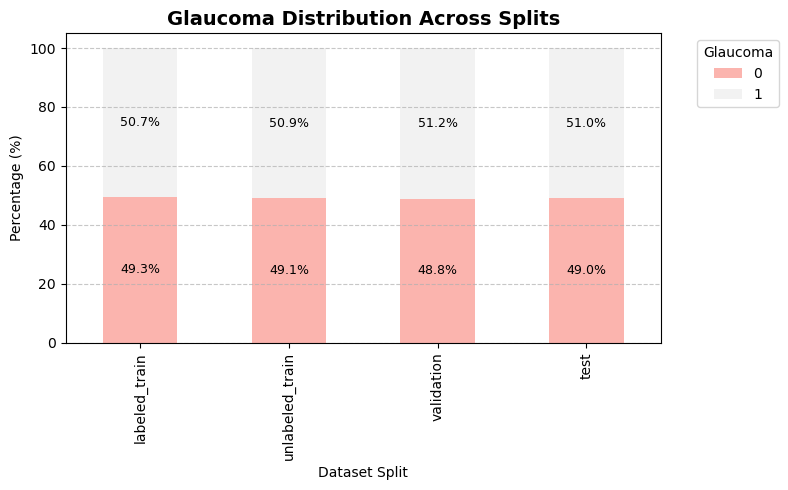


=== gender_std Distribution ===


class               0     1
split                      
labeled_train    55.3  44.7
test             55.2  44.8
unlabeled_train  55.1  44.9
validation       54.9  45.1

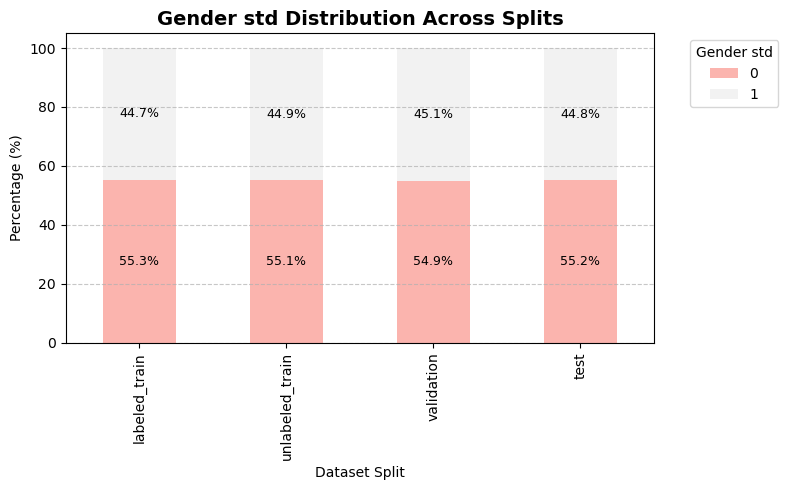


=== age_group Distribution ===


class            0-50   50+
split                      
labeled_train    25.3  74.7
test             24.5  75.5
unlabeled_train  24.6  75.4
validation       24.7  75.3

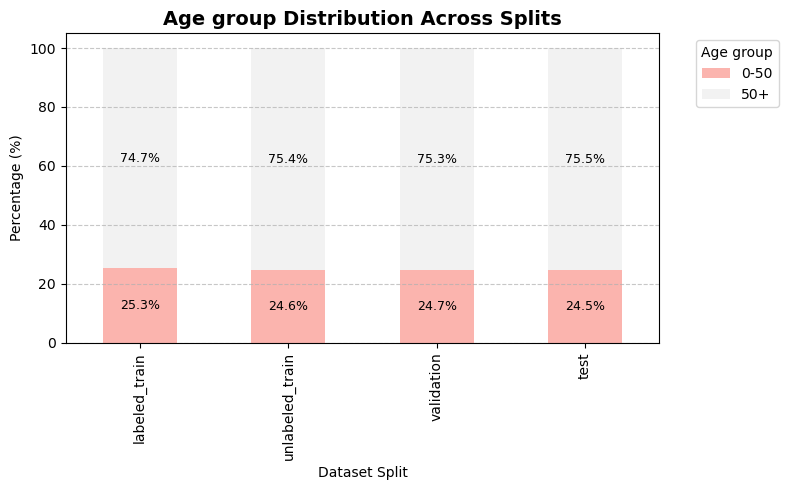


=== race_encoded Distribution ===


class               0     1    2     3
split                                 
labeled_train    28.0  25.7  4.3  42.0
test             27.8  25.6  3.7  42.9
unlabeled_train  27.7  25.6  3.8  42.9
validation       28.2  25.4  3.4  42.9

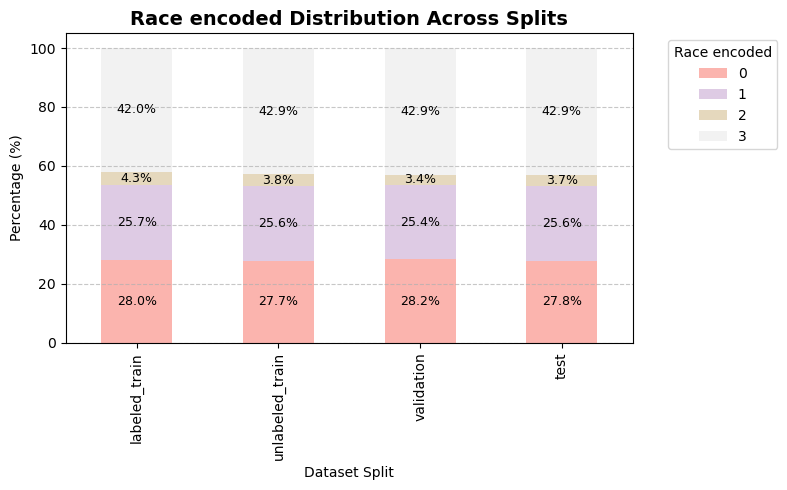


=== ethnicity_std Distribution ===


class               0     1    2
split                           
labeled_train    77.0  23.0  NaN
test             77.1  22.3  0.6
unlabeled_train  77.6  21.7  0.6
validation       77.4  22.0  0.6

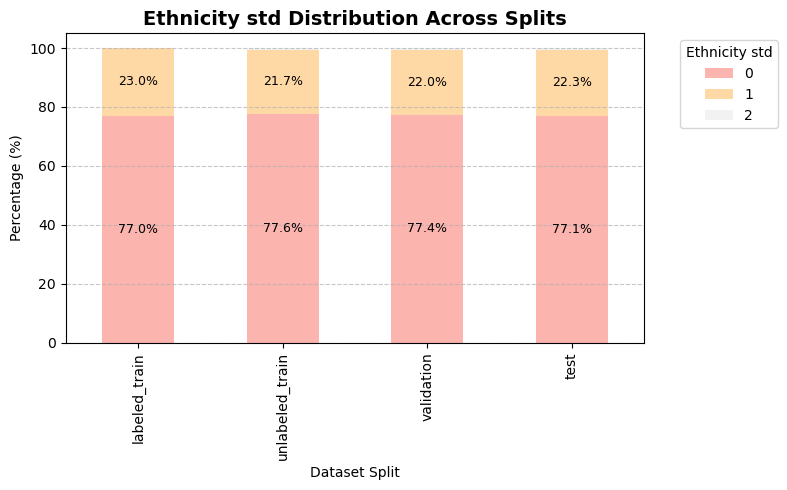


=== dataset_source Distribution ===


class             GDP    GF
split                      
labeled_train    24.7  75.3
test             23.6  76.4
unlabeled_train  23.0  77.0
validation       23.4  76.6

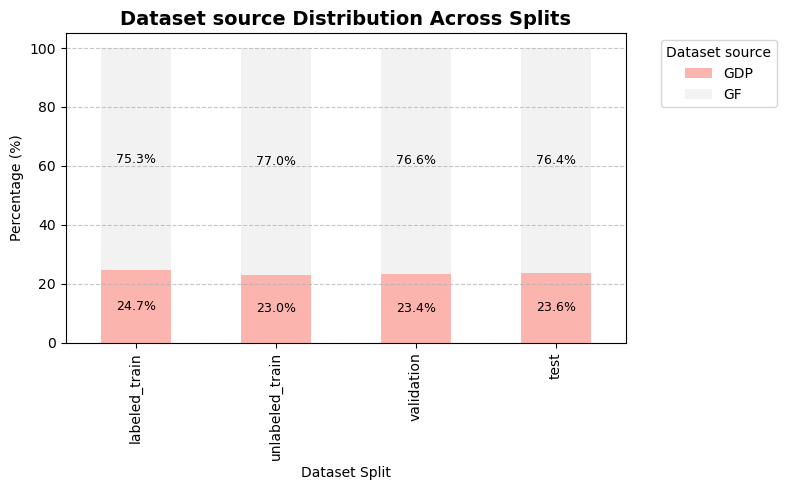

In [47]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: Parse each split's section ---
def parse_split_section(text, split_name):
    pattern = rf"=== {split_name.upper()} SET Balance Analysis ===\nTotal samples: (\d+)(.*?)\n(?==|$)"
    match = re.search(pattern, text, re.DOTALL)
    if not match:
        return None
    
    total_samples = int(match.group(1))
    section_text = match.group(2)

    feature_patterns = {
        'glaucoma': r"Glaucoma distribution:\n(.*?)\nName: count",
        'gender_std': r"Gender distribution:\n(.*?)\nName: count",
        'age_group': r"Age group distribution:\n(.*?)\nName: count",
        'race_encoded': r"Race distribution:\n(.*?)\nName: count",
        'ethnicity_std': r"Ethnicity distribution:\n(.*?)\nName: count",
        'dataset_source': r"Dataset Source distribution:\n(.*?)\nName: count",
    }

    data = {}
    for feat, pat in feature_patterns.items():
        fmatch = re.search(pat, section_text, re.DOTALL)
        if fmatch:
            lines = fmatch.group(1).strip().split('\n')
            counts = {}
            for line in lines:
                parts = line.split()
                if len(parts) >= 2:
                    key = parts[0]
                    try:
                        val = int(parts[1])
                        counts[key] = val
                    except:
                        continue
            data[feat] = counts

    return total_samples, data


# --- Extract splits ---
splits = ['labeled_train', 'unlabeled_train', 'validation', 'test']
splits_copy = splits.copy()  # ✅ make a copy to use later

all_splits_data = {}

for split in splits:
    res = parse_split_section(summary_str, split)
    if res:
        total_samples, data = res
        all_splits_data[split] = {'total': total_samples, 'features': data}


# --- Convert to DataFrame with percentages ---
def build_percentage_df(all_splits_data, feature):
    records = []
    for split, info in all_splits_data.items():
        total = info['total']
        feature_counts = info['features'].get(feature, {})
        for cls, count in feature_counts.items():
            records.append({
                'split': split,
                'class': cls,
                'count': count,
                'percentage': 100 * count / total
            })
    return pd.DataFrame(records)


# --- Plot function: Stacked percentage bar per split with labels ---
def plot_feature_distribution_stacked(df, feature, split_order):
    pivot_df = df.pivot(index='split', columns='class', values='percentage').fillna(0)
    pivot_df = pivot_df.loc[split_order]  # use the copied order

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
    plt.title(f"{feature.replace('_',' ').capitalize()} Distribution Across Splits", fontsize=14, fontweight='bold')
    plt.ylabel("Percentage (%)")
    plt.xlabel("Dataset Split")
    plt.legend(title=feature.replace('_',' ').capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels on each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 2:  # Only label if visible
            ax.text(x + width/2, y + height/2, f"{height:.1f}%", ha='center', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()


# --- Plot all features ---
features_to_plot = ['glaucoma', 'gender_std', 'age_group', 'race_encoded', 'ethnicity_std', 'dataset_source']
for feature in features_to_plot:
    df_feat = build_percentage_df(all_splits_data, feature)
    print(f"\n=== {feature} Distribution ===")
    display(df_feat.pivot(index='split', columns='class', values='percentage').round(1))
    plot_feature_distribution_stacked(df_feat, feature, splits_copy)

In [48]:
import json

import json

def save_splits(splits, filepath):
    # Ensure splits is a dict, not a list
    assert isinstance(splits, dict), "splits must be a dictionary"

    # Convert any numpy int arrays to lists
    serializable_splits = {k: list(map(int, v)) for k, v in splits.items()}

    with open(filepath, 'w') as f:
        json.dump(serializable_splits, f)

    print(f"Splits saved to {filepath}")

def load_splits(filepath):
    with open(filepath, 'r') as f:
        splits = json.load(f)  # Should be dict after fix
    # Convert lists to int lists (since JSON stores numbers as ints)
    splits = {k: list(map(int, v)) for k, v in splits.items()}
    return splits

# Example usage:
save_filepath = "dataset_splits.json"

# Save splits to file
save_splits(ssl_splits, save_filepath)

# Later reload splits
loaded_splits = load_splits(save_filepath)

# To recreate datasets exactly:
datasets_reloaded = {}
for split_name, indices in loaded_splits.items():
    datasets_reloaded[split_name] = UnifiedHarvardDataset(
        dataset_configs=dataset_configs,
        split_indices=indices,
        ssl_mode='supervised' if split_name != 'unlabeled_train' else 'unsupervised',
        include_metadata=True
    )

print("Datasets reloaded with saved splits.")

Splits saved to dataset_splits.json
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 300 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=69.10, std=61.84
Computing stats for GDP...
    GDP: mean=66.04, std=43.81

Unified dataset initialized:
Total samples: 300
Dataset composition: {'GF': 226, 'GDP': 74}
Glaucoma distribution: {1: 152, 0: 148}
Loading and combining datasets...
Loading GDP dataset...
  - Loaded 1000 samples from GDP
Loading GF dataset...
  - Loaded 3300 samples from GF
Applying split with 2710 indices
Computing normalization statistics...
Computing stats for GF...
    GF: mean=67.04, std=47.60
Computing stats for GDP...
    GDP: mean=64.14, std=41.78

Unified dataset initialized:
Total samples: 2710
Dataset composition: {'GF': 2087, 'GDP': 623}
Glaucoma distribution: {1: 1380, 0: 1330}
Loading and combining datasets...
Lo

In [49]:
for split_name in ssl_splits.keys():
    orig_indices = ssl_splits[split_name]
    reloaded_df = datasets_reloaded[split_name].combined_df
    reloaded_labels = reloaded_df['glaucoma'].tolist()

    # Get original labels from full dataset
    orig_labels = full_dataset.combined_df.loc[orig_indices, 'glaucoma'].tolist()

    print(f"{split_name}: Labels match exactly? {'Yes' if orig_labels == reloaded_labels else 'No'}")

labeled_train: Labels match exactly? Yes
unlabeled_train: Labels match exactly? Yes
validation: Labels match exactly? Yes
test: Labels match exactly? Yes


In [50]:
# Number of images per split
num_images = {split: len(ds) for split, ds in datasets.items()}

# Print nicely
for split, count in num_images.items():
    print(f"{split:15}: {count} images")

labeled_train  : 300 images
unlabeled_train: 2710 images
validation     : 645 images
test           : 645 images


### Setting up Data Loaders

In [51]:
def collate_fn(batch):
    """Custom collate fn for DataLoader to handle metadata dicts with strings."""
    images = torch.stack([item[0] for item in batch], dim=0)
    labels = torch.tensor([item[1] for item in batch], dtype=torch.long)
    metadata = [item[2] for item in batch]  # List of dicts, do not batch
    
    return images, labels, metadata

In [52]:
from torch.utils.data import DataLoader

batch_size_labeled = 4
batch_size_unlabeled = 4
batch_size_val_test = 4

train_loader = DataLoader(datasets['labeled_train'], batch_size=batch_size_labeled, shuffle=False, collate_fn=collate_fn)
unlabeled_loader = DataLoader(datasets['unlabeled_train'], batch_size=batch_size_unlabeled, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(datasets['validation'], batch_size=batch_size_val_test, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(datasets['test'], batch_size=batch_size_val_test, shuffle=False, collate_fn=collate_fn)

## Training and Model

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import warnings
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class EfficientNetClassifier(nn.Module):
    """Mediumweight EfficientNet-B3 for glaucoma classification"""
    def __init__(self, num_classes=2, dropout_rate=0.3):
        super(EfficientNetClassifier, self).__init__()
        
        self.backbone = models.efficientnet_b3(weights='IMAGENET1K_V1')
        
        num_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate, inplace=True),
            nn.Linear(num_features, num_classes)
        )
        
    def forward(self, x):
        return self.backbone(x)

Using device: cuda


In [56]:
class PseudoLabelTrainer:
    """Semi-supervised trainer with pseudo-labeling"""
    
    def __init__(self, model, train_loader, unlabeled_loader, val_loader, test_loader,
                 learning_rate=1e-3, weight_decay=1e-4, checkpoint_dir='checkpoints'):
        
        self.model = model.to(device)
        self.train_loader = train_loader
        self.unlabeled_loader = unlabeled_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='max', patience=3, factor=0.5)
        self.criterion = nn.CrossEntropyLoss()
        
        self.checkpoint_dir = checkpoint_dir
        os.makedirs(checkpoint_dir, exist_ok=True)
        
        self.start_epoch = 0
        self.best_val_acc = 0.0
        self.training_history = []
        
        self.confidence_threshold = 0.9  # Pseudo-label confidence threshold
        self.pseudo_label_weight = 0.5    # Weight for pseudo-label loss

    def save_checkpoint(self, epoch, is_best=False):
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_val_acc': self.best_val_acc,
            'training_history': self.training_history
        }
        
        latest_path = os.path.join(self.checkpoint_dir, 'latest_checkpoint.pth')
        torch.save(checkpoint, latest_path)
        print(f"Latest checkpoint saved: {latest_path}")
    
        if is_best:
            best_path = os.path.join(self.checkpoint_dir, 'best_model.pth')
            torch.save(checkpoint, best_path)
            print(f"New best model saved: {best_path} with validation accuracy: {self.best_val_acc:.4f}")

    def load_checkpoint(self):
        checkpoint_path = os.path.join(self.checkpoint_dir, 'latest_checkpoint.pth')
        
        if os.path.exists(checkpoint_path):
            print("Loading checkpoint...")
            try:
                checkpoint = torch.load(checkpoint_path, map_location=device)
            except Exception as e:
                print(f"Failed to load checkpoint: {e}")
                return
                
            self.model.load_state_dict(checkpoint['model_state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
            self.start_epoch = checkpoint['epoch'] + 1
            self.best_val_acc = checkpoint['best_val_acc']
            self.training_history = checkpoint['training_history']
            
            print(f"Resumed from epoch {self.start_epoch}, best val acc: {self.best_val_acc:.4f}")
        else:
            print("No checkpoint found, starting from scratch")

    def generate_pseudo_labels(self):
        self.model.eval()
        pseudo_labels = []
        confident_indices = []
        
        with torch.no_grad():
            for batch_idx, (images, _, metadata) in enumerate(self.unlabeled_loader):
                images = images.to(device)
                outputs = self.model(images)
                probabilities = torch.softmax(outputs, dim=1)
                max_probs, predictions = torch.max(probabilities, 1)
                
                confident_mask = max_probs > self.confidence_threshold
                
                for i, is_confident in enumerate(confident_mask):
                    if is_confident:
                        global_idx = batch_idx * self.unlabeled_loader.batch_size + i
                        pseudo_labels.append(predictions[i].cpu().item())
                        confident_indices.append(global_idx)
        
        return pseudo_labels, confident_indices
    
    def calculate_metrics(self, y_true, y_pred, y_probs=None):
        metrics = {
            'accuracy': accuracy_score(y_true, y_pred),
            'f1_score': f1_score(y_true, y_pred, average='weighted'),
            'precision': precision_score(y_true, y_pred, average='weighted'),
            'recall': recall_score(y_true, y_pred, average='weighted'),
        }
        
        if y_probs is not None:
            metrics['auc_roc'] = roc_auc_score(y_true, y_probs[:, 1])
        
        return metrics

    from sklearn.metrics import classification_report

    def validate(self):
        self.model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for images, labels, _ in tqdm(self.val_loader, desc="Validating"):
                images, labels = images.to(device), labels.to(device)
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                val_loss += loss.item()
                
                probs = torch.softmax(outputs, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        val_loss /= len(self.val_loader)
        all_probs = np.array(all_probs)
        metrics = self.calculate_metrics(all_labels, all_preds, all_probs)
    
        # Per-class metrics
        per_class_report = classification_report(all_labels, all_preds, output_dict=True)
        metrics['per_class'] = per_class_report
    
        return val_loss, metrics

    def test(self):
        self.model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for images, labels, _ in tqdm(self.test_loader, desc="Testing"):
                images, labels = images.to(device), labels.to(device)
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                test_loss += loss.item()
                
                probs = torch.softmax(outputs, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        test_loss /= len(self.test_loader)
        all_probs = np.array(all_probs)
        metrics = self.calculate_metrics(all_labels, all_preds, all_probs)
    
        # Per-class metrics
        per_class_report = classification_report(all_labels, all_preds, output_dict=True)
        metrics['per_class'] = per_class_report
    
        return test_loss, metrics
    
    def print_per_class_metrics(metrics, classes=None):
        """
        Print per-class precision, recall, and F1 nicely.
        
        Args:
            metrics (dict): The metrics dictionary returned from validate/test.
            classes (list, optional): List of class names corresponding to indices. Defaults to None.
        """
        if 'per_class' not in metrics:
            print("No per-class metrics found.")
            return
        
        per_class = metrics['per_class']
        
        # Exclude overall averages
        for key, val in per_class.items():
            if key in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            class_name = classes[int(key)] if classes else f"Class {key}"
            precision = val['precision']
            recall = val['recall']
            f1 = val['f1-score']
            support = val['support']
            print(f"{class_name:15s} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f} | Support: {support}")
        
        # Optionally print weighted/macro averages
        print("\nWeighted Avg:")
        print(f"Precision: {per_class['weighted avg']['precision']:.3f}, "
              f"Recall: {per_class['weighted avg']['recall']:.3f}, "
              f"F1: {per_class['weighted avg']['f1-score']:.3f}")

    def train_epoch(self, epoch):
        self.model.train()
        train_loss = 0.0
        supervised_loss = 0.0
        pseudo_loss = 0.0
        total_pseudo_used = 0  # Track pseudo-labels used this epoch
    
        # Generate pseudo-labels every 3 epochs
        if epoch > 0 and epoch % 3 == 0:
            print(f"Epoch {epoch+1}: Generating pseudo-labels...")
            pseudo_labels, confident_indices = self.generate_pseudo_labels()
            print(f"Generated {len(pseudo_labels)} pseudo-labels from unlabeled set.")
            
            # Shuffle pseudo-labels to avoid bias
            if len(pseudo_labels) > 0:
                shuffled = np.random.permutation(len(pseudo_labels))
                pseudo_labels = [pseudo_labels[i] for i in shuffled]
                confident_indices = [confident_indices[i] for i in shuffled]
            
            pseudo_pointer = 0
        else:
            pseudo_labels, confident_indices = [], []
            pseudo_pointer = 0
    
        unlabeled_iter = iter(self.unlabeled_loader)
        progress_bar = tqdm(self.train_loader, desc=f"Epoch {epoch+1}")
    
        for batch_idx, (labeled_images, labeled_targets, _) in enumerate(progress_bar):
            labeled_images = labeled_images.to(device)
            labeled_targets = labeled_targets.to(device)
            
            # Supervised loss
            labeled_outputs = self.model(labeled_images)
            supervised_loss_batch = self.criterion(labeled_outputs, labeled_targets)
            total_loss = supervised_loss_batch
            
            # Pseudo-label loss
            pseudo_loss_batch_val = 0.0
            if pseudo_labels and pseudo_pointer < len(pseudo_labels):
                try:
                    unlabeled_images, _, _ = next(unlabeled_iter)
                    unlabeled_images = unlabeled_images.to(device)
                    
                    batch_size = min(len(pseudo_labels) - pseudo_pointer, unlabeled_images.size(0))
                    if batch_size > 0:
                        pseudo_targets = torch.tensor(
                            pseudo_labels[pseudo_pointer:pseudo_pointer + batch_size]
                        ).to(device)
                        unlabeled_outputs = self.model(unlabeled_images[:batch_size])
                        pseudo_loss_batch_val = self.criterion(unlabeled_outputs, pseudo_targets)
                        
                        total_loss += self.pseudo_label_weight * pseudo_loss_batch_val
                        pseudo_loss += pseudo_loss_batch_val.item()
                        total_pseudo_used += batch_size
                        
                        pseudo_pointer += batch_size  # Move pointer
                        
                        # Only print if we actually used pseudo-labels in this batch
                        print(f"Batch {batch_idx+1}: Using {batch_size} pseudo-labels")
                    
                except StopIteration:
                    unlabeled_iter = iter(self.unlabeled_loader)
            
            # Backpropagation
            self.optimizer.zero_grad()
            total_loss.backward()
            self.optimizer.step()
            
            train_loss += total_loss.item()
            supervised_loss += supervised_loss_batch.item()
            
            progress_bar.set_postfix({
                'Loss': f'{total_loss.item():.4f}',
                'Sup': f'{supervised_loss_batch.item():.4f}',
                'Pseudo': f'{pseudo_loss_batch_val:.4f}'
            })
        
        print(f"Total pseudo-labels used this epoch: {total_pseudo_used}\n")
        num_batches = len(self.train_loader)
        return train_loss / num_batches, supervised_loss / num_batches, pseudo_loss / num_batches

    def train(self, num_epochs):
        print(f"Starting training for {num_epochs} epochs. Resuming from epoch {self.start_epoch}")
        
        for epoch in range(self.start_epoch, num_epochs):
            train_loss, sup_loss, pseudo_loss = self.train_epoch(epoch)
            
            val_loss, val_metrics = self.validate()
            
            self.scheduler.step(val_metrics['accuracy'])
            
            is_best = val_metrics['accuracy'] > self.best_val_acc
            if is_best:
                self.best_val_acc = val_metrics['accuracy']
            
            epoch_metrics = {
                'epoch': epoch + 1,
                'train_loss': train_loss,
                'supervised_loss': sup_loss,
                'pseudo_loss': pseudo_loss,
                'val_loss': val_loss,
                'val_accuracy': val_metrics['accuracy'],
                'val_f1_score': val_metrics['f1_score'],
                'val_precision': val_metrics['precision'],
                'val_recall': val_metrics['recall'],
                'val_auc_roc': val_metrics.get('auc_roc', 0.0),
                'learning_rate': self.optimizer.param_groups[0]['lr']
            }
            
            self.training_history.append(epoch_metrics)
            
            self.save_checkpoint(epoch, is_best)
            
            print(f"\nEpoch {epoch+1}/{num_epochs}:")
            print(f"Train Loss: {train_loss:.4f} (Sup: {sup_loss:.4f}, Pseudo: {pseudo_loss:.4f})")
            print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_metrics['accuracy']:.4f}")
            print(f"Val F1: {val_metrics['f1_score']:.4f}, Val AUC: {val_metrics.get('auc_roc', 0.0):.4f}")
            print(f"Learning Rate: {self.optimizer.param_groups[0]['lr']:.6f}")
            
            # Save to CSV
            df = pd.DataFrame(self.training_history)
            df.to_csv(os.path.join(self.checkpoint_dir, 'training_metrics.csv'), index=False)
        
        # Final test evaluation after all epochs
        print("\nTraining complete, running final test evaluation...")
        test_loss, test_metrics = self.test()
        
        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
        print(f"Test F1 Score: {test_metrics['f1_score']:.4f}")
        print(f"Test Precision: {test_metrics['precision']:.4f}")
        print(f"Test Recall: {test_metrics['recall']:.4f}")
        print(f"Test AUC-ROC: {test_metrics.get('auc_roc', 0.0):.4f}")

In [39]:
print("Initializing model and trainer...")
model = EfficientNetClassifier(num_classes=2, dropout_rate=0.3)

trainer = PseudoLabelTrainer(
    model=model,
    train_loader=train_loader,
    unlabeled_loader=unlabeled_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=1e-3,
    weight_decay=1e-4,
    checkpoint_dir=r"C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoint"
)

trainer.load_checkpoint()

Initializing model and trainer...
Loading checkpoint...
Resumed from epoch 23, best val acc: 0.7287


In [61]:
trainer.train(num_epochs=10)

Starting training for 10 epochs. Resuming from epoch 0


Epoch 1: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.53it/s, Loss=0.5530, Sup=0.5530, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.80it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\best_model.pth with validation accuracy: 0.7287

Epoch 1/10:
Train Loss: 0.7117 (Sup: 0.7117, Pseudo: 0.0000)
Val Loss: 0.5435, Val Acc: 0.7287
Val F1: 0.7204, Val AUC: 0.7998
Learning Rate: 0.001000


Epoch 2: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.42it/s, Loss=0.5590, Sup=0.5590, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.01it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 2/10:
Train Loss: 0.6020 (Sup: 0.6020, Pseudo: 0.0000)
Val Loss: 0.5991, Val Acc: 0.6403
Val F1: 0.6312, Val AUC: 0.7509
Learning Rate: 0.001000


Epoch 3: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.31it/s, Loss=0.6962, Sup=0.6962, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.04it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 3/10:
Train Loss: 0.5418 (Sup: 0.5418, Pseudo: 0.0000)
Val Loss: 0.7224, Val Acc: 0.6248
Val F1: 0.6137, Val AUC: 0.7028
Learning Rate: 0.001000
Epoch 4: Generating pseudo-labels...
Generated 544 pseudo-labels from unlabeled set.


Epoch 4:   1%|▍                                 | 1/75 [00:00<00:11,  6.29it/s, Loss=0.4903, Sup=0.4903, Pseudo=0.2138]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 4:   4%|█▎                                | 3/75 [00:00<00:09,  7.45it/s, Loss=0.9754, Sup=0.9754, Pseudo=0.3076]

Batch 3: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:09,  7.55it/s, Loss=1.0915, Sup=1.0915, Pseudo=0.6747]

Batch 4: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:09,  7.55it/s, Loss=0.9535, Sup=0.9535, Pseudo=0.4622]

Batch 5: Using 4 pseudo-labels


Epoch 4:   7%|██▎                               | 5/75 [00:00<00:09,  7.46it/s, Loss=2.0983, Sup=2.0983, Pseudo=0.0158]

Batch 6: Using 4 pseudo-labels


Epoch 4:   8%|██▋                              | 6/75 [00:00<00:09,  7.33it/s, Loss=9.5366, Sup=9.5366, Pseudo=12.2569]

Batch 7: Using 4 pseudo-labels


Epoch 4:   9%|███▏                              | 7/75 [00:01<00:09,  7.30it/s, Loss=1.0048, Sup=1.0048, Pseudo=1.4407]

Batch 8: Using 4 pseudo-labels


Epoch 4:  12%|████                              | 9/75 [00:01<00:08,  7.55it/s, Loss=0.9504, Sup=0.9504, Pseudo=0.2255]

Batch 9: Using 4 pseudo-labels


Epoch 4:  13%|████▍                            | 10/75 [00:01<00:08,  7.76it/s, Loss=7.8889, Sup=7.8889, Pseudo=6.1169]

Batch 10: Using 4 pseudo-labels


Epoch 4:  15%|████▌                          | 11/75 [00:01<00:08,  7.77it/s, Loss=15.5982, Sup=15.5982, Pseudo=6.0180]

Batch 11: Using 4 pseudo-labels


Epoch 4:  15%|████▍                         | 11/75 [00:01<00:08,  7.77it/s, Loss=65.9866, Sup=65.9866, Pseudo=35.5654]

Batch 12: Using 4 pseudo-labels


Epoch 4:  16%|████▋                        | 12/75 [00:01<00:08,  7.72it/s, Loss=80.3317, Sup=80.3317, Pseudo=121.1652]

Batch 13: Using 4 pseudo-labels


Epoch 4:  17%|█████▏                        | 13/75 [00:01<00:07,  7.76it/s, Loss=30.4857, Sup=30.4857, Pseudo=44.4203]

Batch 14: Using 4 pseudo-labels


Epoch 4:  19%|██████▏                          | 14/75 [00:01<00:07,  7.74it/s, Loss=8.1406, Sup=8.1406, Pseudo=5.8837]

Batch 15: Using 4 pseudo-labels


Epoch 4:  20%|██████                        | 15/75 [00:02<00:07,  7.63it/s, Loss=50.7178, Sup=50.7178, Pseudo=28.4293]

Batch 16: Using 4 pseudo-labels


Epoch 4:  21%|██████▍                       | 16/75 [00:02<00:07,  7.68it/s, Loss=85.2921, Sup=85.2921, Pseudo=46.3211]

Batch 17: Using 4 pseudo-labels


Epoch 4:  23%|██████▌                      | 17/75 [00:02<00:07,  7.66it/s, Loss=634.7048, Sup=634.7048, Pseudo=0.0000]

Batch 18: Using 4 pseudo-labels


Epoch 4:  24%|█████▊                  | 18/75 [00:02<00:07,  7.70it/s, Loss=1021.1524, Sup=1021.1524, Pseudo=1023.8420]

Batch 19: Using 4 pseudo-labels


Epoch 4:  25%|██████                  | 19/75 [00:02<00:07,  7.77it/s, Loss=2084.0261, Sup=2084.0261, Pseudo=2019.1797]

Batch 20: Using 4 pseudo-labels


Epoch 4:  28%|███████▌                   | 21/75 [00:02<00:06,  7.87it/s, Loss=7372.3501, Sup=7372.3501, Pseudo=0.0000]

Batch 21: Using 4 pseudo-labels


Epoch 4:  29%|████████▌                    | 22/75 [00:02<00:06,  7.81it/s, Loss=303.7533, Sup=303.7533, Pseudo=0.0000]

Batch 22: Using 4 pseudo-labels


Epoch 4:  31%|████████▎                  | 23/75 [00:03<00:06,  7.84it/s, Loss=202.1774, Sup=202.1774, Pseudo=332.0908]

Batch 23: Using 4 pseudo-labels


Epoch 4:  32%|█████████▎                   | 24/75 [00:03<00:06,  7.86it/s, Loss=683.9087, Sup=683.9087, Pseudo=0.0000]

Batch 24: Using 4 pseudo-labels


Epoch 4:  32%|████████▉                   | 24/75 [00:03<00:06,  7.86it/s, Loss=163.2966, Sup=163.2966, Pseudo=43.1152]

Batch 25: Using 4 pseudo-labels


Epoch 4:  33%|████████▎                | 25/75 [00:03<00:06,  7.64it/s, Loss=1616.6630, Sup=1616.6630, Pseudo=773.7627]

Batch 26: Using 4 pseudo-labels


Epoch 4:  35%|█████████▎                 | 26/75 [00:03<00:06,  7.70it/s, Loss=1738.7224, Sup=1738.7224, Pseudo=0.0000]

Batch 27: Using 4 pseudo-labels


Epoch 4:  36%|█████████▋                 | 27/75 [00:03<00:06,  7.76it/s, Loss=198.3944, Sup=198.3944, Pseudo=147.3544]

Batch 28: Using 4 pseudo-labels


Epoch 4:  37%|███████████▏                  | 28/75 [00:03<00:06,  7.73it/s, Loss=16.5240, Sup=16.5240, Pseudo=18.4554]

Batch 29: Using 4 pseudo-labels


Epoch 4:  39%|███████████▉                   | 29/75 [00:03<00:05,  7.85it/s, Loss=36.7406, Sup=36.7406, Pseudo=0.0000]

Batch 30: Using 4 pseudo-labels


Epoch 4:  40%|██████████▊                | 30/75 [00:04<00:05,  7.89it/s, Loss=147.6258, Sup=147.6258, Pseudo=180.9214]

Batch 31: Using 4 pseudo-labels


Epoch 4:  41%|████████████▍                 | 31/75 [00:04<00:05,  7.72it/s, Loss=42.3312, Sup=42.3312, Pseudo=48.7920]

Batch 32: Using 4 pseudo-labels


Epoch 4:  43%|█████████████▏                 | 32/75 [00:04<00:05,  7.73it/s, Loss=98.4239, Sup=98.4239, Pseudo=0.0000]

Batch 33: Using 4 pseudo-labels


Epoch 4:  44%|███████████▉               | 33/75 [00:04<00:05,  7.73it/s, Loss=2406.1633, Sup=2406.1633, Pseudo=0.0000]

Batch 34: Using 4 pseudo-labels


Epoch 4:  45%|████████████▏              | 34/75 [00:04<00:05,  7.70it/s, Loss=475.7567, Sup=475.7567, Pseudo=391.9557]

Batch 35: Using 4 pseudo-labels


Epoch 4:  47%|██████████████                | 35/75 [00:04<00:05,  7.58it/s, Loss=62.7450, Sup=62.7450, Pseudo=85.7103]

Batch 36: Using 4 pseudo-labels


Epoch 4:  49%|█████████████▎             | 37/75 [00:04<00:04,  7.75it/s, Loss=5945.1528, Sup=5945.1528, Pseudo=0.0000]

Batch 37: Using 4 pseudo-labels


Epoch 4:  49%|███████████▊            | 37/75 [00:04<00:04,  7.75it/s, Loss=1857.5051, Sup=1857.5051, Pseudo=1504.0458]

Batch 38: Using 4 pseudo-labels


Epoch 4:  51%|██████████████▋              | 38/75 [00:05<00:04,  7.71it/s, Loss=85.2455, Sup=85.2455, Pseudo=120.1063]

Batch 39: Using 4 pseudo-labels


Epoch 4:  52%|██████████████             | 39/75 [00:05<00:04,  7.87it/s, Loss=399.1112, Sup=399.1112, Pseudo=491.4181]

Batch 40: Using 4 pseudo-labels


Epoch 4:  53%|█████████████████▌               | 40/75 [00:05<00:04,  7.83it/s, Loss=3.7892, Sup=3.7892, Pseudo=0.0000]

Batch 41: Using 4 pseudo-labels


Epoch 4:  56%|███████████████            | 42/75 [00:05<00:04,  7.83it/s, Loss=729.2209, Sup=729.2209, Pseudo=623.4882]

Batch 42: Using 4 pseudo-labels


Epoch 4:  56%|████████████████▏            | 42/75 [00:05<00:04,  7.83it/s, Loss=66.4198, Sup=66.4198, Pseudo=113.8033]

Batch 43: Using 4 pseudo-labels


Epoch 4:  59%|██████████████████▏            | 44/75 [00:05<00:03,  7.92it/s, Loss=35.0292, Sup=35.0292, Pseudo=0.1725]

Batch 44: Using 4 pseudo-labels


Epoch 4:  59%|███████████████▊           | 44/75 [00:05<00:03,  7.92it/s, Loss=451.9251, Sup=451.9251, Pseudo=298.9919]

Batch 45: Using 4 pseudo-labels


Epoch 4:  60%|███████████████████▊             | 45/75 [00:05<00:03,  7.86it/s, Loss=8.8930, Sup=8.8930, Pseudo=0.0000]

Batch 46: Using 4 pseudo-labels


Epoch 4:  61%|█████████████████▊           | 46/75 [00:06<00:03,  7.88it/s, Loss=120.7928, Sup=120.7928, Pseudo=0.0000]

Batch 47: Using 4 pseudo-labels


Epoch 4:  63%|████████████████████            | 47/75 [00:06<00:03,  7.85it/s, Loss=6.0524, Sup=6.0524, Pseudo=12.1049]

Batch 48: Using 4 pseudo-labels


Epoch 4:  64%|█████████████████████            | 48/75 [00:06<00:03,  7.94it/s, Loss=1.0833, Sup=1.0833, Pseudo=0.6675]

Batch 49: Using 4 pseudo-labels


Epoch 4:  65%|██████████████████▉          | 49/75 [00:06<00:03,  7.88it/s, Loss=137.7129, Sup=137.7129, Pseudo=0.0000]

Batch 50: Using 4 pseudo-labels


Epoch 4:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.89it/s, Loss=1.2256, Sup=1.2256, Pseudo=0.2489]

Batch 51: Using 4 pseudo-labels


Epoch 4:  68%|██████████████████▎        | 51/75 [00:06<00:03,  7.89it/s, Loss=174.5638, Sup=174.5638, Pseudo=173.9894]

Batch 52: Using 4 pseudo-labels


Epoch 4:  69%|█████████████████▎       | 52/75 [00:06<00:02,  7.76it/s, Loss=1105.7715, Sup=1105.7715, Pseudo=859.8657]

Batch 53: Using 4 pseudo-labels


Epoch 4:  72%|███████████████      | 54/75 [00:06<00:02,  7.96it/s, Loss=64733.9336, Sup=64733.9336, Pseudo=40839.0703]

Batch 54: Using 4 pseudo-labels


Epoch 4:  73%|████████████████████████▏        | 55/75 [00:07<00:02,  8.07it/s, Loss=0.7285, Sup=0.7285, Pseudo=0.4041]

Batch 55: Using 4 pseudo-labels


Epoch 4:  75%|█████████████████████▋       | 56/75 [00:07<00:02,  7.97it/s, Loss=271.4472, Sup=271.4472, Pseudo=0.2088]

Batch 56: Using 4 pseudo-labels


Epoch 4:  76%|███████████████████████▌       | 57/75 [00:07<00:02,  8.02it/s, Loss=24.2031, Sup=24.2031, Pseudo=0.6269]

Batch 57: Using 4 pseudo-labels


Epoch 4:  76%|██████████████████████▊       | 57/75 [00:07<00:02,  8.02it/s, Loss=12.5729, Sup=12.5729, Pseudo=22.4470]

Batch 58: Using 4 pseudo-labels


Epoch 4:  79%|████████████████████████▍      | 59/75 [00:07<00:01,  8.03it/s, Loss=19.8201, Sup=19.8201, Pseudo=0.1432]

Batch 59: Using 4 pseudo-labels


Epoch 4:  80%|███████████████████████▏     | 60/75 [00:07<00:01,  8.02it/s, Loss=289.9292, Sup=289.9292, Pseudo=0.0000]

Batch 60: Using 4 pseudo-labels


Epoch 4:  80%|██████████████████████████▍      | 60/75 [00:07<00:01,  8.02it/s, Loss=1.0960, Sup=1.0960, Pseudo=0.4558]

Batch 61: Using 4 pseudo-labels


Epoch 4:  83%|███████████████████████████▎     | 62/75 [00:07<00:01,  7.99it/s, Loss=0.4880, Sup=0.4880, Pseudo=0.3422]

Batch 62: Using 4 pseudo-labels


Epoch 4:  83%|███████████████████████████▎     | 62/75 [00:08<00:01,  7.99it/s, Loss=0.5730, Sup=0.5730, Pseudo=0.5733]

Batch 63: Using 4 pseudo-labels


Epoch 4:  84%|███████████████████▎   | 63/75 [00:08<00:01,  7.97it/s, Loss=7378.7227, Sup=7378.7227, Pseudo=11274.9082]

Batch 64: Using 4 pseudo-labels


Epoch 4:  85%|████████████████████████████▏    | 64/75 [00:08<00:01,  7.85it/s, Loss=0.7206, Sup=0.7206, Pseudo=0.2766]

Batch 65: Using 4 pseudo-labels


Epoch 4:  87%|████████████████████████████▌    | 65/75 [00:08<00:01,  7.88it/s, Loss=1.0426, Sup=1.0426, Pseudo=0.3327]

Batch 66: Using 4 pseudo-labels


Epoch 4:  89%|█████████████████████████████▍   | 67/75 [00:08<00:00,  8.03it/s, Loss=0.7299, Sup=0.7299, Pseudo=0.2909]

Batch 67: Using 4 pseudo-labels


Epoch 4:  91%|█████████████████████████████▉   | 68/75 [00:08<00:00,  8.08it/s, Loss=1.1711, Sup=1.1711, Pseudo=0.1224]

Batch 68: Using 4 pseudo-labels


Epoch 4:  92%|██████████████████████████████▎  | 69/75 [00:08<00:00,  8.09it/s, Loss=0.9899, Sup=0.9899, Pseudo=0.1179]

Batch 69: Using 4 pseudo-labels


Epoch 4:  93%|██████████████████████████████▊  | 70/75 [00:08<00:00,  8.12it/s, Loss=0.7804, Sup=0.7804, Pseudo=0.0456]

Batch 70: Using 4 pseudo-labels


Epoch 4:  95%|███████████████████████████████▏ | 71/75 [00:09<00:00,  8.09it/s, Loss=2.5903, Sup=2.5903, Pseudo=0.0271]

Batch 71: Using 4 pseudo-labels


Epoch 4:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  8.05it/s, Loss=1.3256, Sup=1.3256, Pseudo=0.2396]

Batch 72: Using 4 pseudo-labels


Epoch 4:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  8.05it/s, Loss=0.5766, Sup=0.5766, Pseudo=0.2654]

Batch 73: Using 4 pseudo-labels


Epoch 4:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.98it/s, Loss=1.6547, Sup=1.6547, Pseudo=0.0374]

Batch 74: Using 4 pseudo-labels


Epoch 4:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.98it/s, Loss=1.1406, Sup=1.1406, Pseudo=0.2907]

Batch 75: Using 4 pseudo-labels


Epoch 4: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.80it/s, Loss=1.1406, Sup=1.1406, Pseudo=0.2907]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.48it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 4/10:
Train Loss: 1380.5988 (Sup: 1380.5988, Pseudo: 822.8696)
Val Loss: 0.7580, Val Acc: 0.5116
Val F1: 0.3463, Val AUC: 0.5428
Learning Rate: 0.001000


Epoch 5: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.99it/s, Loss=0.5132, Sup=0.5132, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.15it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 5/10:
Train Loss: 0.6250 (Sup: 0.6250, Pseudo: 0.0000)
Val Loss: 0.6400, Val Acc: 0.6837
Val F1: 0.6728, Val AUC: 0.7485
Learning Rate: 0.000500


Epoch 6: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.90it/s, Loss=0.2991, Sup=0.2991, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.49it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 6/10:
Train Loss: 0.3784 (Sup: 0.3784, Pseudo: 0.0000)
Val Loss: 0.6381, Val Acc: 0.7178
Val F1: 0.7164, Val AUC: 0.7839
Learning Rate: 0.000500
Epoch 7: Generating pseudo-labels...
Generated 1192 pseudo-labels from unlabeled set.


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:10,  6.85it/s, Loss=2.7975, Sup=2.7975, Pseudo=1.3183]

Batch 1: Using 4 pseudo-labels


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:10,  6.85it/s, Loss=0.5444, Sup=0.5444, Pseudo=0.4085]

Batch 2: Using 4 pseudo-labels


Epoch 7:   4%|█▎                                | 3/75 [00:00<00:09,  7.70it/s, Loss=1.4987, Sup=1.4987, Pseudo=2.3391]

Batch 3: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:09,  7.77it/s, Loss=0.6906, Sup=0.6906, Pseudo=0.4611]

Batch 4: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:09,  7.77it/s, Loss=0.9094, Sup=0.9094, Pseudo=0.7773]

Batch 5: Using 4 pseudo-labels


Epoch 7:   7%|██▎                               | 5/75 [00:00<00:09,  7.71it/s, Loss=0.9427, Sup=0.9427, Pseudo=0.8811]

Batch 6: Using 4 pseudo-labels


Epoch 7:   8%|██▋                               | 6/75 [00:00<00:08,  7.68it/s, Loss=0.7923, Sup=0.7923, Pseudo=0.6664]

Batch 7: Using 4 pseudo-labels


Epoch 7:   9%|███▏                              | 7/75 [00:01<00:08,  7.71it/s, Loss=0.6576, Sup=0.6576, Pseudo=0.4585]

Batch 8: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:08,  7.72it/s, Loss=0.6759, Sup=0.6759, Pseudo=0.5332]

Batch 9: Using 4 pseudo-labels


Epoch 7:  12%|████                              | 9/75 [00:01<00:08,  7.66it/s, Loss=1.6870, Sup=1.6870, Pseudo=1.2663]

Batch 10: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:08,  7.63it/s, Loss=0.8251, Sup=0.8251, Pseudo=0.8602]

Batch 11: Using 4 pseudo-labels


Epoch 7:  15%|████▊                            | 11/75 [00:01<00:08,  7.59it/s, Loss=1.0419, Sup=1.0419, Pseudo=1.0411]

Batch 12: Using 4 pseudo-labels


Epoch 7:  16%|█████▎                           | 12/75 [00:01<00:08,  7.51it/s, Loss=0.7404, Sup=0.7404, Pseudo=0.4061]

Batch 13: Using 4 pseudo-labels


Epoch 7:  19%|██████▏                          | 14/75 [00:01<00:07,  7.69it/s, Loss=0.9910, Sup=0.9910, Pseudo=0.7303]

Batch 14: Using 4 pseudo-labels


Epoch 7:  19%|██████▏                          | 14/75 [00:01<00:07,  7.69it/s, Loss=1.0165, Sup=1.0165, Pseudo=0.9248]

Batch 15: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:02<00:07,  7.67it/s, Loss=0.9360, Sup=0.9360, Pseudo=0.8878]

Batch 16: Using 4 pseudo-labels


Epoch 7:  21%|███████                          | 16/75 [00:02<00:07,  7.66it/s, Loss=0.9398, Sup=0.9398, Pseudo=1.0859]

Batch 17: Using 4 pseudo-labels


Epoch 7:  23%|███████▍                         | 17/75 [00:02<00:07,  7.70it/s, Loss=1.1549, Sup=1.1549, Pseudo=0.9478]

Batch 18: Using 4 pseudo-labels


Epoch 7:  24%|███████▉                         | 18/75 [00:02<00:07,  7.73it/s, Loss=0.5837, Sup=0.5837, Pseudo=0.3295]

Batch 19: Using 4 pseudo-labels


Epoch 7:  27%|████████▊                        | 20/75 [00:02<00:07,  7.78it/s, Loss=1.6705, Sup=1.6705, Pseudo=1.7199]

Batch 20: Using 4 pseudo-labels
Batch 21: Using 4 pseudo-labels


Epoch 7:  28%|█████████▏                       | 21/75 [00:02<00:07,  7.04it/s, Loss=0.8296, Sup=0.8296, Pseudo=0.8424]

Batch 22: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:03<00:06,  7.48it/s, Loss=1.0208, Sup=1.0208, Pseudo=0.7830]

Batch 23: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:03<00:06,  7.48it/s, Loss=0.9081, Sup=0.9081, Pseudo=0.7937]

Batch 24: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:03<00:06,  7.69it/s, Loss=0.8218, Sup=0.8218, Pseudo=0.6804]

Batch 25: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:03<00:06,  7.69it/s, Loss=0.9662, Sup=0.9662, Pseudo=0.6796]

Batch 26: Using 4 pseudo-labels


Epoch 7:  35%|███████████▍                     | 26/75 [00:03<00:06,  7.65it/s, Loss=0.8033, Sup=0.8033, Pseudo=0.7645]

Batch 27: Using 4 pseudo-labels


Epoch 7:  36%|███████████▉                     | 27/75 [00:03<00:06,  7.62it/s, Loss=0.8713, Sup=0.8713, Pseudo=0.5944]

Batch 28: Using 4 pseudo-labels


Epoch 7:  37%|████████████▎                    | 28/75 [00:03<00:06,  7.59it/s, Loss=0.8605, Sup=0.8605, Pseudo=0.7009]

Batch 29: Using 4 pseudo-labels


Epoch 7:  39%|████████████▊                    | 29/75 [00:03<00:05,  7.76it/s, Loss=0.7293, Sup=0.7293, Pseudo=0.5576]

Batch 30: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:04<00:05,  7.82it/s, Loss=1.7491, Sup=1.7491, Pseudo=0.9108]

Batch 31: Using 4 pseudo-labels


Epoch 7:  41%|█████████████▋                   | 31/75 [00:04<00:05,  7.84it/s, Loss=0.7975, Sup=0.7975, Pseudo=0.6711]

Batch 32: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.81it/s, Loss=0.9782, Sup=0.9782, Pseudo=0.9576]

Batch 33: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.81it/s, Loss=0.9263, Sup=0.9263, Pseudo=0.8682]

Batch 34: Using 4 pseudo-labels


Epoch 7:  45%|██████████████▉                  | 34/75 [00:04<00:05,  7.74it/s, Loss=0.7901, Sup=0.7901, Pseudo=0.7344]

Batch 35: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:04<00:05,  7.81it/s, Loss=1.1299, Sup=1.1299, Pseudo=0.7194]

Batch 36: Using 4 pseudo-labels


Epoch 7:  49%|████████████████▎                | 37/75 [00:04<00:04,  7.72it/s, Loss=1.0788, Sup=1.0788, Pseudo=0.8713]

Batch 37: Using 4 pseudo-labels


Epoch 7:  49%|████████████████▎                | 37/75 [00:04<00:04,  7.72it/s, Loss=0.6952, Sup=0.6952, Pseudo=0.6945]

Batch 38: Using 4 pseudo-labels


Epoch 7:  51%|████████████████▋                | 38/75 [00:05<00:04,  7.68it/s, Loss=0.9476, Sup=0.9476, Pseudo=0.9636]

Batch 39: Using 4 pseudo-labels


Epoch 7:  53%|█████████████████▌               | 40/75 [00:05<00:04,  7.78it/s, Loss=0.8069, Sup=0.8069, Pseudo=0.7188]

Batch 40: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:05<00:04,  7.81it/s, Loss=0.9118, Sup=0.9118, Pseudo=0.8587]

Batch 41: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:05<00:04,  7.81it/s, Loss=0.6129, Sup=0.6129, Pseudo=0.3973]

Batch 42: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:05<00:04,  7.78it/s, Loss=0.8225, Sup=0.8225, Pseudo=0.8303]

Batch 43: Using 4 pseudo-labels


Epoch 7:  57%|██████████████████▉              | 43/75 [00:05<00:04,  7.75it/s, Loss=0.5060, Sup=0.5060, Pseudo=0.7335]

Batch 44: Using 4 pseudo-labels


Epoch 7:  60%|███████████████████▊             | 45/75 [00:05<00:03,  7.84it/s, Loss=1.0572, Sup=1.0572, Pseudo=0.9543]

Batch 45: Using 4 pseudo-labels


Epoch 7:  60%|███████████████████▊             | 45/75 [00:05<00:03,  7.84it/s, Loss=0.6410, Sup=0.6410, Pseudo=0.8252]

Batch 46: Using 4 pseudo-labels


Epoch 7:  61%|████████████████████▏            | 46/75 [00:05<00:03,  7.74it/s, Loss=0.6410, Sup=0.6410, Pseudo=0.8252]

Batch 47: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:06<00:03,  7.54it/s, Loss=0.9582, Sup=0.9582, Pseudo=1.3350]

Batch 48: Using 4 pseudo-labels


Epoch 7:  64%|█████████████████████            | 48/75 [00:06<00:03,  7.60it/s, Loss=0.7993, Sup=0.7993, Pseudo=0.6684]

Batch 49: Using 4 pseudo-labels


Epoch 7:  65%|█████████████████████▌           | 49/75 [00:06<00:03,  7.63it/s, Loss=0.7567, Sup=0.7567, Pseudo=1.1955]

Batch 50: Using 4 pseudo-labels


Epoch 7:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.84it/s, Loss=0.5198, Sup=0.5198, Pseudo=0.6821]

Batch 51: Using 4 pseudo-labels


Epoch 7:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.84it/s, Loss=1.6530, Sup=1.6530, Pseudo=2.0280]

Batch 52: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:06<00:02,  7.81it/s, Loss=1.2478, Sup=1.2478, Pseudo=0.9895]

Batch 53: Using 4 pseudo-labels


Epoch 7:  71%|███████████████████████▎         | 53/75 [00:07<00:02,  7.71it/s, Loss=1.7342, Sup=1.7342, Pseudo=2.4250]

Batch 54: Using 4 pseudo-labels


Epoch 7:  73%|████████████████████████▏        | 55/75 [00:07<00:02,  7.72it/s, Loss=0.5689, Sup=0.5689, Pseudo=0.7754]

Batch 55: Using 4 pseudo-labels


Epoch 7:  73%|████████████████████████▏        | 55/75 [00:07<00:02,  7.72it/s, Loss=1.0172, Sup=1.0172, Pseudo=0.6749]

Batch 56: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:07<00:02,  7.67it/s, Loss=0.5614, Sup=0.5614, Pseudo=0.6299]

Batch 57: Using 4 pseudo-labels


Epoch 7:  77%|█████████████████████████▌       | 58/75 [00:07<00:02,  7.84it/s, Loss=1.2212, Sup=1.2212, Pseudo=0.6681]

Batch 58: Using 4 pseudo-labels


Epoch 7:  77%|█████████████████████████▌       | 58/75 [00:07<00:02,  7.84it/s, Loss=6.2827, Sup=6.2827, Pseudo=1.1614]

Batch 59: Using 4 pseudo-labels


Epoch 7:  80%|██████████████████████████▍      | 60/75 [00:07<00:01,  7.85it/s, Loss=1.1296, Sup=1.1296, Pseudo=0.8542]

Batch 60: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:07<00:01,  7.92it/s, Loss=0.8700, Sup=0.8700, Pseudo=0.6514]

Batch 61: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:08<00:01,  7.92it/s, Loss=1.8177, Sup=1.8177, Pseudo=0.7368]

Batch 62: Using 4 pseudo-labels


Epoch 7:  83%|███████████████████████████▎     | 62/75 [00:08<00:01,  7.78it/s, Loss=0.1736, Sup=0.1736, Pseudo=0.1106]

Batch 63: Using 4 pseudo-labels


Epoch 7:  85%|████████████████████████████▏    | 64/75 [00:08<00:01,  7.88it/s, Loss=2.5597, Sup=2.5597, Pseudo=3.0219]

Batch 64: Using 4 pseudo-labels


Epoch 7:  87%|████████████████████████████▌    | 65/75 [00:08<00:01,  7.88it/s, Loss=2.9146, Sup=2.9146, Pseudo=3.5933]

Batch 65: Using 4 pseudo-labels


Epoch 7:  88%|█████████████████████████████    | 66/75 [00:08<00:01,  7.87it/s, Loss=1.5547, Sup=1.5547, Pseudo=0.6958]

Batch 66: Using 4 pseudo-labels


Epoch 7:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.90it/s, Loss=5.6462, Sup=5.6462, Pseudo=10.1737]

Batch 67: Using 4 pseudo-labels


Epoch 7:  89%|█████████████████████████████▍   | 67/75 [00:08<00:01,  7.90it/s, Loss=3.6547, Sup=3.6547, Pseudo=1.5983]

Batch 68: Using 4 pseudo-labels


Epoch 7:  91%|█████████████████████████████▉   | 68/75 [00:08<00:00,  7.84it/s, Loss=1.1511, Sup=1.1511, Pseudo=0.8168]

Batch 69: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:09<00:00,  7.78it/s, Loss=1.2285, Sup=1.2285, Pseudo=1.2084]

Batch 70: Using 4 pseudo-labels


Epoch 7:  93%|██████████████████████████████▊  | 70/75 [00:09<00:00,  7.72it/s, Loss=1.2211, Sup=1.2211, Pseudo=0.4317]

Batch 71: Using 4 pseudo-labels


Epoch 7:  95%|███████████████████████████████▏ | 71/75 [00:09<00:00,  7.67it/s, Loss=0.9256, Sup=0.9256, Pseudo=0.6099]

Batch 72: Using 4 pseudo-labels


Epoch 7:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  7.80it/s, Loss=1.7290, Sup=1.7290, Pseudo=1.1698]

Batch 73: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.74it/s, Loss=1.2665, Sup=1.2665, Pseudo=0.8200]

Batch 74: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.74it/s, Loss=1.1383, Sup=1.1383, Pseudo=0.9721]

Batch 75: Using 4 pseudo-labels


Epoch 7: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.71it/s, Loss=1.1383, Sup=1.1383, Pseudo=0.9721]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.20it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 7/10:
Train Loss: 1.2188 (Sup: 1.2188, Pseudo: 1.0622)
Val Loss: 1.3488, Val Acc: 0.4636
Val F1: 0.3335, Val AUC: 0.3986
Learning Rate: 0.000500


Epoch 8: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.49it/s, Loss=0.2832, Sup=0.2832, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.43it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 8/10:
Train Loss: 0.3313 (Sup: 0.3313, Pseudo: 0.0000)
Val Loss: 2.1929, Val Acc: 0.7209
Val F1: 0.7191, Val AUC: 0.7595
Learning Rate: 0.000500


Epoch 9: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.80it/s, Loss=0.1567, Sup=0.1567, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.10it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 9/10:
Train Loss: 0.2305 (Sup: 0.2305, Pseudo: 0.0000)
Val Loss: 2.1662, Val Acc: 0.7101
Val F1: 0.7097, Val AUC: 0.7548
Learning Rate: 0.000250
Epoch 10: Generating pseudo-labels...
Generated 1459 pseudo-labels from unlabeled set.


Epoch 10:   1%|▍                                | 1/75 [00:00<00:10,  7.28it/s, Loss=1.6665, Sup=1.6665, Pseudo=0.8954]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 10:   4%|█▎                               | 3/75 [00:00<00:09,  7.79it/s, Loss=0.7253, Sup=0.7253, Pseudo=1.1472]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 10:   7%|██▏                              | 5/75 [00:00<00:08,  7.97it/s, Loss=0.9403, Sup=0.9403, Pseudo=0.7959]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 10:   9%|███                              | 7/75 [00:01<00:08,  7.90it/s, Loss=0.8916, Sup=0.8916, Pseudo=0.9197]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:08,  7.91it/s, Loss=0.6743, Sup=0.6743, Pseudo=0.4664]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:01<00:08,  7.61it/s, Loss=0.6692, Sup=0.6692, Pseudo=0.6304]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 10:  17%|█████▌                          | 13/75 [00:01<00:08,  7.73it/s, Loss=0.8502, Sup=0.8502, Pseudo=0.8169]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 10:  20%|██████▍                         | 15/75 [00:02<00:07,  7.71it/s, Loss=0.7246, Sup=0.7246, Pseudo=0.6207]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 10:  24%|███████▋                        | 18/75 [00:02<00:07,  7.82it/s, Loss=0.9803, Sup=0.9803, Pseudo=0.6771]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 10:  27%|████████▌                       | 20/75 [00:02<00:06,  8.01it/s, Loss=0.8613, Sup=0.8613, Pseudo=0.7627]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 10:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.92it/s, Loss=0.7818, Sup=0.7818, Pseudo=0.8527]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.87it/s, Loss=0.9470, Sup=0.9470, Pseudo=1.1784]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 10:  35%|███████████                     | 26/75 [00:03<00:06,  7.86it/s, Loss=0.6737, Sup=0.6737, Pseudo=0.4376]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.79it/s, Loss=1.3422, Sup=1.3422, Pseudo=1.9593]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 10:  39%|████████████▎                   | 29/75 [00:03<00:06,  7.61it/s, Loss=1.1926, Sup=1.1926, Pseudo=1.7498]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 10:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.96it/s, Loss=1.0958, Sup=1.0958, Pseudo=1.5014]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 10:  44%|██████████████                  | 33/75 [00:04<00:05,  7.82it/s, Loss=0.7044, Sup=0.7044, Pseudo=0.6463]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 10:  48%|███████████████▎                | 36/75 [00:04<00:05,  7.78it/s, Loss=0.6203, Sup=0.6203, Pseudo=0.7982]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 10:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.71it/s, Loss=1.0822, Sup=1.0822, Pseudo=1.7029]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 10:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.74it/s, Loss=0.4260, Sup=0.4260, Pseudo=0.5618]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 10:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.74it/s, Loss=0.9882, Sup=0.9882, Pseudo=1.4094]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 10:  59%|██████████████████▊             | 44/75 [00:05<00:03,  8.04it/s, Loss=0.3301, Sup=0.3301, Pseudo=0.4830]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 10:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.96it/s, Loss=1.2468, Sup=1.2468, Pseudo=1.8885]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 10:  64%|████████████████████▍           | 48/75 [00:06<00:03,  8.12it/s, Loss=0.8149, Sup=0.8149, Pseudo=1.0214]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 10:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  8.11it/s, Loss=0.3684, Sup=0.3684, Pseudo=0.3191]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 10:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  8.07it/s, Loss=0.8663, Sup=0.8663, Pseudo=0.3157]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 10:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.99it/s, Loss=1.0782, Sup=1.0782, Pseudo=1.4207]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 10:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.94it/s, Loss=0.3593, Sup=0.3593, Pseudo=0.3843]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 10:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.87it/s, Loss=0.7776, Sup=0.7776, Pseudo=0.3648]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 10:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.95it/s, Loss=0.5045, Sup=0.5045, Pseudo=0.4146]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 10:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.92it/s, Loss=0.4465, Sup=0.4465, Pseudo=0.3810]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 10:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  8.02it/s, Loss=0.6449, Sup=0.6449, Pseudo=0.9764]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 10:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.83it/s, Loss=0.6678, Sup=0.6678, Pseudo=1.1735]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 10:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.77it/s, Loss=1.1212, Sup=1.1212, Pseudo=1.0346]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 10:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.82it/s, Loss=1.0308, Sup=1.0308, Pseudo=1.1664]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.77it/s, Loss=3.0750, Sup=3.0750, Pseudo=5.2147]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 10:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.72it/s, Loss=1.0465, Sup=1.0465, Pseudo=0.9659]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.84it/s, Loss=0.8496, Sup=0.8496, Pseudo=0.6106]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.67it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 10/10:
Train Loss: 2.4695 (Sup: 2.4695, Pseudo: 4.1934)
Val Loss: 0.6267, Val Acc: 0.6450
Val F1: 0.6444, Val AUC: 0.7034
Learning Rate: 0.000250

Training complete, running final test evaluation...


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.33it/s]

Test Loss: 1.1308
Test Accuracy: 0.6481
Test F1 Score: 0.6475
Test Precision: 0.6482
Test Recall: 0.6481
Test AUC-ROC: 0.6921


In [62]:
trainer.train(num_epochs=20)

Starting training for 20 epochs. Resuming from epoch 0


Epoch 1: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.73it/s, Loss=0.1151, Sup=0.1151, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.93it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 1/20:
Train Loss: 0.1757 (Sup: 0.1757, Pseudo: 0.0000)
Val Loss: 0.6510, Val Acc: 0.7256
Val F1: 0.7256, Val AUC: 0.7956
Learning Rate: 0.000250


Epoch 2: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.56it/s, Loss=0.1360, Sup=0.1360, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.94it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 2/20:
Train Loss: 0.1395 (Sup: 0.1395, Pseudo: 0.0000)
Val Loss: 0.6949, Val Acc: 0.7178
Val F1: 0.7178, Val AUC: 0.7860
Learning Rate: 0.000250


Epoch 3: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.83it/s, Loss=0.0643, Sup=0.0643, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.02it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 3/20:
Train Loss: 0.1353 (Sup: 0.1353, Pseudo: 0.0000)
Val Loss: 0.7231, Val Acc: 0.7178
Val F1: 0.7175, Val AUC: 0.7849
Learning Rate: 0.000125
Epoch 4: Generating pseudo-labels...
Generated 1483 pseudo-labels from unlabeled set.


Epoch 4:   1%|▍                                 | 1/75 [00:00<00:10,  7.32it/s, Loss=0.6055, Sup=0.6055, Pseudo=0.4977]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 4:   4%|█▎                                | 3/75 [00:00<00:09,  7.46it/s, Loss=0.5999, Sup=0.5999, Pseudo=1.1424]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 4:   7%|██▎                               | 5/75 [00:00<00:09,  7.62it/s, Loss=0.9467, Sup=0.9467, Pseudo=1.7156]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 4:   9%|███▏                              | 7/75 [00:01<00:09,  7.51it/s, Loss=0.8142, Sup=0.8142, Pseudo=1.3696]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 4:  12%|████                              | 9/75 [00:01<00:08,  7.48it/s, Loss=0.3827, Sup=0.3827, Pseudo=0.1684]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 4:  16%|█████▎                           | 12/75 [00:01<00:08,  7.78it/s, Loss=0.6185, Sup=0.6185, Pseudo=0.8922]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 4:  19%|██████▏                          | 14/75 [00:01<00:07,  7.84it/s, Loss=0.9430, Sup=0.9430, Pseudo=1.3997]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 4:  20%|██████▌                          | 15/75 [00:02<00:07,  7.74it/s, Loss=0.6250, Sup=0.6250, Pseudo=0.8176]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 4:  23%|███████▍                         | 17/75 [00:02<00:07,  7.75it/s, Loss=0.7868, Sup=0.7868, Pseudo=0.7084]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 4:  25%|████████▎                        | 19/75 [00:02<00:07,  7.68it/s, Loss=0.8274, Sup=0.8274, Pseudo=0.9583]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 4:  28%|█████████▏                       | 21/75 [00:02<00:07,  7.53it/s, Loss=0.7288, Sup=0.7288, Pseudo=0.7344]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 4:  32%|██████████▌                      | 24/75 [00:03<00:06,  7.70it/s, Loss=0.8632, Sup=0.8632, Pseudo=0.8354]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 4:  33%|███████████                      | 25/75 [00:03<00:06,  7.75it/s, Loss=0.8504, Sup=0.8504, Pseudo=1.1209]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 4:  36%|███████████▉                     | 27/75 [00:03<00:06,  7.65it/s, Loss=0.7093, Sup=0.7093, Pseudo=0.7265]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 4:  39%|████████████▊                    | 29/75 [00:03<00:05,  7.79it/s, Loss=0.8103, Sup=0.8103, Pseudo=1.1844]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 4:  41%|█████████████▋                   | 31/75 [00:04<00:05,  7.69it/s, Loss=0.4649, Sup=0.4649, Pseudo=0.5327]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 4:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.55it/s, Loss=0.5676, Sup=0.5676, Pseudo=0.4572]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 4:  47%|███████████████▍                 | 35/75 [00:04<00:05,  7.68it/s, Loss=0.7389, Sup=0.7389, Pseudo=1.0125]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 4:  51%|████████████████▋                | 38/75 [00:04<00:04,  7.88it/s, Loss=0.4923, Sup=0.4923, Pseudo=0.7525]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 4:  53%|█████████████████▌               | 40/75 [00:05<00:04,  7.90it/s, Loss=0.5122, Sup=0.5122, Pseudo=0.8135]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 4:  55%|██████████████████               | 41/75 [00:05<00:04,  7.80it/s, Loss=1.1737, Sup=1.1737, Pseudo=2.0960]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 4:  59%|███████████████████▎             | 44/75 [00:05<00:03,  7.82it/s, Loss=0.8682, Sup=0.8682, Pseudo=1.3518]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 4:  61%|████████████████████▏            | 46/75 [00:05<00:03,  7.90it/s, Loss=0.6012, Sup=0.6012, Pseudo=0.6477]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 4:  63%|████████████████████▋            | 47/75 [00:06<00:03,  7.91it/s, Loss=0.7312, Sup=0.7312, Pseudo=1.0728]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 4:  65%|█████████████████████▌           | 49/75 [00:06<00:03,  7.84it/s, Loss=0.3964, Sup=0.3964, Pseudo=0.4743]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 4:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.97it/s, Loss=1.0058, Sup=1.0058, Pseudo=1.0577]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 4:  71%|███████████████████████▎         | 53/75 [00:06<00:02,  7.96it/s, Loss=0.9275, Sup=0.9275, Pseudo=0.7680]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 4:  73%|████████████████████████▏        | 55/75 [00:07<00:02,  7.94it/s, Loss=0.4337, Sup=0.4337, Pseudo=0.6052]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 4:  76%|█████████████████████████        | 57/75 [00:07<00:02,  8.00it/s, Loss=0.7814, Sup=0.7814, Pseudo=0.8939]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 4:  80%|██████████████████████████▍      | 60/75 [00:07<00:01,  7.93it/s, Loss=0.9824, Sup=0.9824, Pseudo=1.2539]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 4:  81%|██████████████████████████▊      | 61/75 [00:08<00:01,  7.94it/s, Loss=0.4766, Sup=0.4766, Pseudo=0.5186]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 4:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.68it/s, Loss=0.6366, Sup=0.6366, Pseudo=0.8216]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 4:  87%|████████████████████████████▌    | 65/75 [00:08<00:01,  7.78it/s, Loss=0.5423, Sup=0.5423, Pseudo=0.6883]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 4:  89%|█████████████████████████████▍   | 67/75 [00:08<00:01,  7.75it/s, Loss=0.7185, Sup=0.7185, Pseudo=0.6053]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 4:  92%|██████████████████████████████▎  | 69/75 [00:09<00:00,  7.80it/s, Loss=0.6113, Sup=0.6113, Pseudo=0.5503]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 4:  95%|███████████████████████████████▏ | 71/75 [00:09<00:00,  7.86it/s, Loss=1.0166, Sup=1.0166, Pseudo=1.7536]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 4:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  8.10it/s, Loss=0.5013, Sup=0.5013, Pseudo=0.3848]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 4: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.77it/s, Loss=0.9714, Sup=0.9714, Pseudo=1.2433]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 33.08it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 4/20:
Train Loss: 0.7126 (Sup: 0.7126, Pseudo: 0.9272)
Val Loss: 0.5639, Val Acc: 0.7008
Val F1: 0.7008, Val AUC: 0.7780
Learning Rate: 0.000125


Epoch 5: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 14.05it/s, Loss=0.1177, Sup=0.1177, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.44it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 5/20:
Train Loss: 0.1059 (Sup: 0.1059, Pseudo: 0.0000)
Val Loss: 0.7066, Val Acc: 0.7271
Val F1: 0.7268, Val AUC: 0.7833
Learning Rate: 0.000125


Epoch 6: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.50it/s, Loss=0.0429, Sup=0.0429, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.73it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 6/20:
Train Loss: 0.0788 (Sup: 0.0788, Pseudo: 0.0000)
Val Loss: 0.6912, Val Acc: 0.7256
Val F1: 0.7253, Val AUC: 0.7871
Learning Rate: 0.000125
Epoch 7: Generating pseudo-labels...
Generated 1470 pseudo-labels from unlabeled set.


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:10,  7.05it/s, Loss=0.4850, Sup=0.4850, Pseudo=0.7204]

Batch 1: Using 4 pseudo-labels


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:10,  7.05it/s, Loss=0.5970, Sup=0.5970, Pseudo=1.0686]

Batch 2: Using 4 pseudo-labels


Epoch 7:   3%|▉                                 | 2/75 [00:00<00:09,  7.49it/s, Loss=0.5575, Sup=0.5575, Pseudo=1.0212]

Batch 3: Using 4 pseudo-labels


Epoch 7:   4%|█▎                                | 3/75 [00:00<00:09,  7.52it/s, Loss=1.0291, Sup=1.0291, Pseudo=2.0328]

Batch 4: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:09,  7.65it/s, Loss=0.3201, Sup=0.3201, Pseudo=0.6133]

Batch 5: Using 4 pseudo-labels


Epoch 7:   8%|██▋                               | 6/75 [00:00<00:08,  7.93it/s, Loss=0.7747, Sup=0.7747, Pseudo=1.3686]

Batch 6: Using 4 pseudo-labels


Epoch 7:   8%|██▋                               | 6/75 [00:00<00:08,  7.93it/s, Loss=0.6222, Sup=0.6222, Pseudo=1.1271]

Batch 7: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:08,  7.98it/s, Loss=0.6902, Sup=0.6902, Pseudo=1.1324]

Batch 8: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:08,  7.98it/s, Loss=0.4490, Sup=0.4490, Pseudo=0.7143]

Batch 9: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:08,  7.78it/s, Loss=1.4835, Sup=1.4835, Pseudo=2.6590]

Batch 10: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:08,  7.78it/s, Loss=1.1305, Sup=1.1305, Pseudo=1.3340]

Batch 11: Using 4 pseudo-labels


Epoch 7:  15%|████▊                            | 11/75 [00:01<00:08,  7.64it/s, Loss=0.5381, Sup=0.5381, Pseudo=0.9035]

Batch 12: Using 4 pseudo-labels


Epoch 7:  17%|█████▋                           | 13/75 [00:01<00:07,  7.82it/s, Loss=0.3360, Sup=0.3360, Pseudo=0.4665]

Batch 13: Using 4 pseudo-labels


Epoch 7:  17%|█████▋                           | 13/75 [00:01<00:07,  7.82it/s, Loss=0.4242, Sup=0.4242, Pseudo=0.5804]

Batch 14: Using 4 pseudo-labels


Epoch 7:  19%|██████▏                          | 14/75 [00:01<00:08,  7.55it/s, Loss=0.4242, Sup=0.4242, Pseudo=0.5804]

Batch 15: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:02<00:08,  7.29it/s, Loss=0.7089, Sup=0.7089, Pseudo=1.0019]

Batch 16: Using 4 pseudo-labels


Epoch 7:  21%|███████                          | 16/75 [00:02<00:08,  7.20it/s, Loss=0.7566, Sup=0.7566, Pseudo=0.8613]

Batch 17: Using 4 pseudo-labels


Epoch 7:  23%|███████▍                         | 17/75 [00:02<00:08,  7.14it/s, Loss=0.9056, Sup=0.9056, Pseudo=0.9521]

Batch 18: Using 4 pseudo-labels


Epoch 7:  24%|███████▉                         | 18/75 [00:02<00:07,  7.23it/s, Loss=0.5765, Sup=0.5765, Pseudo=0.4681]

Batch 19: Using 4 pseudo-labels


Epoch 7:  27%|████████▊                        | 20/75 [00:02<00:07,  7.45it/s, Loss=0.7012, Sup=0.7012, Pseudo=0.6573]

Batch 20: Using 4 pseudo-labels


Epoch 7:  28%|█████████▏                       | 21/75 [00:02<00:07,  7.60it/s, Loss=0.7798, Sup=0.7798, Pseudo=0.9183]

Batch 21: Using 4 pseudo-labels


Epoch 7:  29%|█████████▋                       | 22/75 [00:02<00:06,  7.69it/s, Loss=0.7258, Sup=0.7258, Pseudo=0.6662]

Batch 22: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:03<00:06,  7.86it/s, Loss=0.6209, Sup=0.6209, Pseudo=0.9423]

Batch 23: Using 4 pseudo-labels


Epoch 7:  32%|██████████▌                      | 24/75 [00:03<00:06,  7.95it/s, Loss=0.7262, Sup=0.7262, Pseudo=0.5063]

Batch 24: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:03<00:06,  7.90it/s, Loss=0.7599, Sup=0.7599, Pseudo=0.4116]

Batch 25: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:03<00:06,  7.90it/s, Loss=0.6656, Sup=0.6656, Pseudo=0.7123]

Batch 26: Using 4 pseudo-labels


Epoch 7:  35%|███████████▍                     | 26/75 [00:03<00:06,  7.80it/s, Loss=0.7213, Sup=0.7213, Pseudo=0.7745]

Batch 27: Using 4 pseudo-labels


Epoch 7:  36%|███████████▉                     | 27/75 [00:03<00:06,  7.72it/s, Loss=0.8280, Sup=0.8280, Pseudo=0.8864]

Batch 28: Using 4 pseudo-labels


Epoch 7:  39%|████████████▊                    | 29/75 [00:03<00:05,  7.80it/s, Loss=0.5430, Sup=0.5430, Pseudo=0.6074]

Batch 29: Using 4 pseudo-labels


Epoch 7:  39%|████████████▊                    | 29/75 [00:03<00:05,  7.80it/s, Loss=0.6144, Sup=0.6144, Pseudo=0.8718]

Batch 30: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:04<00:05,  7.73it/s, Loss=0.5844, Sup=0.5844, Pseudo=0.6838]

Batch 31: Using 4 pseudo-labels


Epoch 7:  43%|██████████████                   | 32/75 [00:04<00:05,  7.83it/s, Loss=0.8900, Sup=0.8900, Pseudo=1.3040]

Batch 32: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.82it/s, Loss=0.4602, Sup=0.4602, Pseudo=0.6416]

Batch 33: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.82it/s, Loss=0.6475, Sup=0.6475, Pseudo=0.2538]

Batch 34: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:04<00:05,  7.91it/s, Loss=1.1825, Sup=1.1825, Pseudo=2.2453]

Batch 35: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:04<00:05,  7.91it/s, Loss=0.5475, Sup=0.5475, Pseudo=0.7220]

Batch 36: Using 4 pseudo-labels


Epoch 7:  48%|███████████████▊                 | 36/75 [00:04<00:04,  7.85it/s, Loss=0.3763, Sup=0.3763, Pseudo=0.5266]

Batch 37: Using 4 pseudo-labels


Epoch 7:  49%|████████████████▎                | 37/75 [00:04<00:04,  7.82it/s, Loss=0.3694, Sup=0.3694, Pseudo=0.5831]

Batch 38: Using 4 pseudo-labels


Epoch 7:  52%|█████████████████▏               | 39/75 [00:05<00:04,  7.79it/s, Loss=0.7218, Sup=0.7218, Pseudo=1.2533]

Batch 39: Using 4 pseudo-labels


Epoch 7:  52%|█████████████████▏               | 39/75 [00:05<00:04,  7.79it/s, Loss=0.3348, Sup=0.3348, Pseudo=0.5485]

Batch 40: Using 4 pseudo-labels


Epoch 7:  53%|█████████████████▌               | 40/75 [00:05<00:04,  7.83it/s, Loss=0.3597, Sup=0.3597, Pseudo=0.3007]

Batch 41: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:05<00:04,  7.86it/s, Loss=0.5547, Sup=0.5547, Pseudo=0.9287]

Batch 42: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:05<00:04,  7.80it/s, Loss=0.7190, Sup=0.7190, Pseudo=0.6662]

Batch 43: Using 4 pseudo-labels


Epoch 7:  57%|██████████████████▉              | 43/75 [00:05<00:04,  7.90it/s, Loss=0.4136, Sup=0.4136, Pseudo=0.5674]

Batch 44: Using 4 pseudo-labels


Epoch 7:  59%|███████████████████▎             | 44/75 [00:05<00:03,  7.88it/s, Loss=0.8973, Sup=0.8973, Pseudo=1.5964]

Batch 45: Using 4 pseudo-labels


Epoch 7:  61%|████████████████████▏            | 46/75 [00:05<00:03,  8.13it/s, Loss=0.6054, Sup=0.6054, Pseudo=1.0013]

Batch 46: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:06<00:03,  8.07it/s, Loss=0.6815, Sup=0.6815, Pseudo=1.0307]

Batch 47: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:06<00:03,  8.07it/s, Loss=0.6913, Sup=0.6913, Pseudo=0.8215]

Batch 48: Using 4 pseudo-labels


Epoch 7:  64%|█████████████████████            | 48/75 [00:06<00:03,  7.91it/s, Loss=0.7995, Sup=0.7995, Pseudo=1.0732]

Batch 49: Using 4 pseudo-labels


Epoch 7:  65%|█████████████████████▌           | 49/75 [00:06<00:03,  7.88it/s, Loss=0.4130, Sup=0.4130, Pseudo=0.6630]

Batch 50: Using 4 pseudo-labels


Epoch 7:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.91it/s, Loss=0.6479, Sup=0.6479, Pseudo=1.0705]

Batch 51: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:06<00:02,  7.96it/s, Loss=1.3729, Sup=1.3729, Pseudo=2.3495]

Batch 52: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:06<00:02,  7.96it/s, Loss=0.4178, Sup=0.4178, Pseudo=0.5531]

Batch 53: Using 4 pseudo-labels


Epoch 7:  72%|███████████████████████▊         | 54/75 [00:06<00:02,  7.88it/s, Loss=1.2178, Sup=1.2178, Pseudo=1.8014]

Batch 54: Using 4 pseudo-labels


Epoch 7:  72%|███████████████████████▊         | 54/75 [00:07<00:02,  7.88it/s, Loss=0.8173, Sup=0.8173, Pseudo=1.1462]

Batch 55: Using 4 pseudo-labels


Epoch 7:  73%|████████████████████████▏        | 55/75 [00:07<00:02,  7.93it/s, Loss=0.4433, Sup=0.4433, Pseudo=0.7140]

Batch 56: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:07<00:02,  7.70it/s, Loss=0.6619, Sup=0.6619, Pseudo=1.1601]

Batch 57: Using 4 pseudo-labels


Epoch 7:  76%|█████████████████████████        | 57/75 [00:07<00:02,  7.63it/s, Loss=1.0401, Sup=1.0401, Pseudo=1.5804]

Batch 58: Using 4 pseudo-labels


Epoch 7:  77%|█████████████████████████▌       | 58/75 [00:07<00:02,  7.58it/s, Loss=0.3728, Sup=0.3728, Pseudo=0.6096]

Batch 59: Using 4 pseudo-labels


Epoch 7:  79%|█████████████████████████▉       | 59/75 [00:07<00:02,  7.64it/s, Loss=0.7242, Sup=0.7242, Pseudo=0.8021]

Batch 60: Using 4 pseudo-labels


Epoch 7:  80%|██████████████████████████▍      | 60/75 [00:07<00:01,  7.65it/s, Loss=0.4850, Sup=0.4850, Pseudo=0.5066]

Batch 61: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:08<00:01,  7.65it/s, Loss=0.4884, Sup=0.4884, Pseudo=0.5416]

Batch 62: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.76it/s, Loss=0.5828, Sup=0.5828, Pseudo=0.8630]

Batch 63: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.76it/s, Loss=0.4925, Sup=0.4925, Pseudo=0.6893]

Batch 64: Using 4 pseudo-labels


Epoch 7:  87%|████████████████████████████▌    | 65/75 [00:08<00:01,  7.74it/s, Loss=0.6487, Sup=0.6487, Pseudo=1.0217]

Batch 65: Using 4 pseudo-labels


Epoch 7:  88%|█████████████████████████████    | 66/75 [00:08<00:01,  7.78it/s, Loss=0.5891, Sup=0.5891, Pseudo=0.7409]

Batch 66: Using 4 pseudo-labels


Epoch 7:  89%|█████████████████████████████▍   | 67/75 [00:08<00:01,  7.87it/s, Loss=3.5145, Sup=3.5145, Pseudo=6.6772]

Batch 67: Using 4 pseudo-labels


Epoch 7:  91%|█████████████████████████████▉   | 68/75 [00:08<00:00,  7.86it/s, Loss=0.5957, Sup=0.5957, Pseudo=0.5529]

Batch 68: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:08<00:00,  7.86it/s, Loss=0.7209, Sup=0.7209, Pseudo=0.7317]

Batch 69: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:09<00:00,  7.86it/s, Loss=0.6847, Sup=0.6847, Pseudo=0.7043]

Batch 70: Using 4 pseudo-labels


Epoch 7:  93%|██████████████████████████████▊  | 70/75 [00:09<00:00,  7.70it/s, Loss=0.4080, Sup=0.4080, Pseudo=0.4425]

Batch 71: Using 4 pseudo-labels


Epoch 7:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  7.89it/s, Loss=0.4341, Sup=0.4341, Pseudo=0.5363]

Batch 72: Using 4 pseudo-labels


Epoch 7:  97%|████████████████████████████████ | 73/75 [00:09<00:00,  7.90it/s, Loss=0.5694, Sup=0.5694, Pseudo=0.6018]

Batch 73: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.97it/s, Loss=1.0043, Sup=1.0043, Pseudo=1.1750]

Batch 74: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.97it/s, Loss=0.9252, Sup=0.9252, Pseudo=0.8706]

Batch 75: Using 4 pseudo-labels


Epoch 7: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.76it/s, Loss=0.9252, Sup=0.9252, Pseudo=0.8706]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.36it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 7/20:
Train Loss: 0.7065 (Sup: 0.7065, Pseudo: 0.9850)
Val Loss: 0.6533, Val Acc: 0.6326
Val F1: 0.6163, Val AUC: 0.7101
Learning Rate: 0.000063


Epoch 8: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.73it/s, Loss=0.0522, Sup=0.0522, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.20it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 8/20:
Train Loss: 0.0821 (Sup: 0.0821, Pseudo: 0.0000)
Val Loss: 0.6886, Val Acc: 0.7054
Val F1: 0.7055, Val AUC: 0.7790
Learning Rate: 0.000063


Epoch 9: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.88it/s, Loss=0.0525, Sup=0.0525, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.33it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 9/20:
Train Loss: 0.0801 (Sup: 0.0801, Pseudo: 0.0000)
Val Loss: 0.7327, Val Acc: 0.7178
Val F1: 0.7172, Val AUC: 0.7760
Learning Rate: 0.000063
Epoch 10: Generating pseudo-labels...
Generated 1464 pseudo-labels from unlabeled set.


Epoch 10:   1%|▍                                | 1/75 [00:00<00:10,  7.15it/s, Loss=0.5929, Sup=0.5929, Pseudo=1.0001]

Batch 1: Using 4 pseudo-labels


Epoch 10:   1%|▍                                | 1/75 [00:00<00:10,  7.15it/s, Loss=0.5709, Sup=0.5709, Pseudo=1.0647]

Batch 2: Using 4 pseudo-labels


Epoch 10:   3%|▉                                | 2/75 [00:00<00:09,  7.40it/s, Loss=0.4983, Sup=0.4983, Pseudo=0.9191]

Batch 3: Using 4 pseudo-labels


Epoch 10:   5%|█▊                               | 4/75 [00:00<00:09,  7.72it/s, Loss=1.0584, Sup=1.0584, Pseudo=2.0997]

Batch 4: Using 4 pseudo-labels


Epoch 10:   5%|█▊                               | 4/75 [00:00<00:09,  7.72it/s, Loss=1.0616, Sup=1.0616, Pseudo=2.1051]

Batch 5: Using 4 pseudo-labels


Epoch 10:   7%|██▏                              | 5/75 [00:00<00:09,  7.71it/s, Loss=0.7018, Sup=0.7018, Pseudo=1.3137]

Batch 6: Using 4 pseudo-labels


Epoch 10:   8%|██▋                              | 6/75 [00:00<00:08,  7.77it/s, Loss=0.8210, Sup=0.8210, Pseudo=1.5440]

Batch 7: Using 4 pseudo-labels


Epoch 10:   9%|███                              | 7/75 [00:01<00:08,  7.85it/s, Loss=0.4518, Sup=0.4518, Pseudo=0.7649]

Batch 8: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:08,  7.80it/s, Loss=1.0627, Sup=1.0627, Pseudo=1.9973]

Batch 9: Using 4 pseudo-labels


Epoch 10:  13%|████▎                           | 10/75 [00:01<00:08,  7.85it/s, Loss=1.4605, Sup=1.4605, Pseudo=2.6509]

Batch 10: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:01<00:08,  7.93it/s, Loss=0.4391, Sup=0.4391, Pseudo=0.2987]

Batch 11: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:01<00:08,  7.93it/s, Loss=0.4045, Sup=0.4045, Pseudo=0.7388]

Batch 12: Using 4 pseudo-labels


Epoch 10:  16%|█████                           | 12/75 [00:01<00:08,  7.75it/s, Loss=0.5822, Sup=0.5822, Pseudo=1.1293]

Batch 13: Using 4 pseudo-labels


Epoch 10:  19%|█████▉                          | 14/75 [00:01<00:07,  7.72it/s, Loss=0.7267, Sup=0.7267, Pseudo=1.3697]

Batch 14: Using 4 pseudo-labels


Epoch 10:  19%|█████▉                          | 14/75 [00:01<00:07,  7.72it/s, Loss=0.4841, Sup=0.4841, Pseudo=0.7002]

Batch 15: Using 4 pseudo-labels


Epoch 10:  21%|██████▊                         | 16/75 [00:02<00:07,  8.06it/s, Loss=0.4279, Sup=0.4279, Pseudo=0.7667]

Batch 16: Using 4 pseudo-labels


Epoch 10:  23%|███████▎                        | 17/75 [00:02<00:07,  8.04it/s, Loss=0.4230, Sup=0.4230, Pseudo=0.6147]

Batch 17: Using 4 pseudo-labels


Epoch 10:  23%|███████▎                        | 17/75 [00:02<00:07,  8.04it/s, Loss=0.6123, Sup=0.6123, Pseudo=0.6385]

Batch 18: Using 4 pseudo-labels


Epoch 10:  24%|███████▋                        | 18/75 [00:02<00:07,  8.01it/s, Loss=0.7118, Sup=0.7118, Pseudo=1.1261]

Batch 19: Using 4 pseudo-labels


Epoch 10:  25%|████████                        | 19/75 [00:02<00:07,  7.95it/s, Loss=0.6349, Sup=0.6349, Pseudo=0.9168]

Batch 20: Using 4 pseudo-labels


Epoch 10:  28%|████████▉                       | 21/75 [00:02<00:06,  7.90it/s, Loss=0.6618, Sup=0.6618, Pseudo=1.0343]

Batch 21: Using 4 pseudo-labels


Epoch 10:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.87it/s, Loss=0.5857, Sup=0.5857, Pseudo=0.6964]

Batch 22: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:02<00:06,  7.90it/s, Loss=0.5796, Sup=0.5796, Pseudo=1.0873]

Batch 23: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.90it/s, Loss=0.8434, Sup=0.8434, Pseudo=0.9754]

Batch 24: Using 4 pseudo-labels


Epoch 10:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.90it/s, Loss=1.1207, Sup=1.1207, Pseudo=1.6444]

Batch 25: Using 4 pseudo-labels


Epoch 10:  35%|███████████                     | 26/75 [00:03<00:06,  7.87it/s, Loss=0.3024, Sup=0.3024, Pseudo=0.2864]

Batch 26: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.86it/s, Loss=0.7090, Sup=0.7090, Pseudo=0.9253]

Batch 27: Using 4 pseudo-labels


Epoch 10:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.97it/s, Loss=0.7089, Sup=0.7089, Pseudo=0.8902]

Batch 28: Using 4 pseudo-labels


Epoch 10:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.93it/s, Loss=0.4072, Sup=0.4072, Pseudo=0.4005]

Batch 29: Using 4 pseudo-labels


Epoch 10:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.91it/s, Loss=0.6033, Sup=0.6033, Pseudo=0.8536]

Batch 30: Using 4 pseudo-labels


Epoch 10:  41%|█████████████▏                  | 31/75 [00:03<00:05,  8.02it/s, Loss=0.5584, Sup=0.5584, Pseudo=0.6652]

Batch 31: Using 4 pseudo-labels


Epoch 10:  43%|█████████████▋                  | 32/75 [00:04<00:05,  8.07it/s, Loss=0.4426, Sup=0.4426, Pseudo=0.5349]

Batch 32: Using 4 pseudo-labels


Epoch 10:  43%|█████████████▋                  | 32/75 [00:04<00:05,  8.07it/s, Loss=0.4061, Sup=0.4061, Pseudo=0.5383]

Batch 33: Using 4 pseudo-labels


Epoch 10:  44%|██████████████                  | 33/75 [00:04<00:05,  7.80it/s, Loss=0.8552, Sup=0.8552, Pseudo=1.1494]

Batch 34: Using 4 pseudo-labels


Epoch 10:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.95it/s, Loss=0.5553, Sup=0.5553, Pseudo=0.7006]

Batch 35: Using 4 pseudo-labels


Epoch 10:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.95it/s, Loss=0.3818, Sup=0.3818, Pseudo=0.5913]

Batch 36: Using 4 pseudo-labels


Epoch 10:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.88it/s, Loss=0.4180, Sup=0.4180, Pseudo=0.6685]

Batch 37: Using 4 pseudo-labels


Epoch 10:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.85it/s, Loss=0.5662, Sup=0.5662, Pseudo=0.8056]

Batch 38: Using 4 pseudo-labels


Epoch 10:  52%|████████████████▋               | 39/75 [00:04<00:04,  7.90it/s, Loss=0.4859, Sup=0.4859, Pseudo=0.7005]

Batch 39: Using 4 pseudo-labels


Epoch 10:  53%|█████████████████               | 40/75 [00:05<00:04,  7.89it/s, Loss=0.5789, Sup=0.5789, Pseudo=0.9092]

Batch 40: Using 4 pseudo-labels


Epoch 10:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.93it/s, Loss=1.2200, Sup=1.2200, Pseudo=2.0280]

Batch 41: Using 4 pseudo-labels


Epoch 10:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.93it/s, Loss=0.6063, Sup=0.6063, Pseudo=0.9714]

Batch 42: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.97it/s, Loss=0.6739, Sup=0.6739, Pseudo=0.8611]

Batch 43: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.97it/s, Loss=0.5495, Sup=0.5495, Pseudo=0.6468]

Batch 44: Using 4 pseudo-labels


Epoch 10:  59%|██████████████████▊             | 44/75 [00:05<00:03,  7.87it/s, Loss=0.8283, Sup=0.8283, Pseudo=1.3555]

Batch 45: Using 4 pseudo-labels


Epoch 10:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.89it/s, Loss=0.6786, Sup=0.6786, Pseudo=0.7275]

Batch 46: Using 4 pseudo-labels


Epoch 10:  61%|███████████████████▋            | 46/75 [00:05<00:03,  7.88it/s, Loss=0.4979, Sup=0.4979, Pseudo=0.5904]

Batch 47: Using 4 pseudo-labels


Epoch 10:  63%|████████████████████            | 47/75 [00:06<00:03,  7.69it/s, Loss=0.7684, Sup=0.7684, Pseudo=0.9109]

Batch 48: Using 4 pseudo-labels


Epoch 10:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.77it/s, Loss=0.7285, Sup=0.7285, Pseudo=0.9861]

Batch 49: Using 4 pseudo-labels


Epoch 10:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.79it/s, Loss=0.4181, Sup=0.4181, Pseudo=0.4892]

Batch 50: Using 4 pseudo-labels


Epoch 10:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.95it/s, Loss=0.4211, Sup=0.4211, Pseudo=0.5755]

Batch 51: Using 4 pseudo-labels


Epoch 10:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.97it/s, Loss=0.7571, Sup=0.7571, Pseudo=1.1439]

Batch 52: Using 4 pseudo-labels


Epoch 10:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.96it/s, Loss=0.4779, Sup=0.4779, Pseudo=0.8033]

Batch 53: Using 4 pseudo-labels


Epoch 10:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.97it/s, Loss=0.5272, Sup=0.5272, Pseudo=0.6369]

Batch 54: Using 4 pseudo-labels


Epoch 10:  73%|███████████████████████▍        | 55/75 [00:06<00:02,  8.05it/s, Loss=0.5381, Sup=0.5381, Pseudo=0.8083]

Batch 55: Using 4 pseudo-labels


Epoch 10:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  8.06it/s, Loss=0.7398, Sup=0.7398, Pseudo=1.3533]

Batch 56: Using 4 pseudo-labels


Epoch 10:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  8.12it/s, Loss=0.5391, Sup=0.5391, Pseudo=0.9650]

Batch 57: Using 4 pseudo-labels


Epoch 10:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  8.08it/s, Loss=0.3547, Sup=0.3547, Pseudo=0.3996]

Batch 58: Using 4 pseudo-labels


Epoch 10:  79%|█████████████████████████▏      | 59/75 [00:07<00:01,  8.02it/s, Loss=0.7018, Sup=0.7018, Pseudo=1.2225]

Batch 59: Using 4 pseudo-labels


Epoch 10:  79%|█████████████████████████▏      | 59/75 [00:07<00:01,  8.02it/s, Loss=0.6965, Sup=0.6965, Pseudo=0.9044]

Batch 60: Using 4 pseudo-labels


Epoch 10:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.91it/s, Loss=0.4442, Sup=0.4442, Pseudo=0.6773]

Batch 61: Using 4 pseudo-labels


Epoch 10:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.90it/s, Loss=0.5462, Sup=0.5462, Pseudo=0.9025]

Batch 62: Using 4 pseudo-labels


Epoch 10:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.81it/s, Loss=0.5227, Sup=0.5227, Pseudo=0.8510]

Batch 63: Using 4 pseudo-labels


Epoch 10:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.83it/s, Loss=0.4365, Sup=0.4365, Pseudo=0.7408]

Batch 64: Using 4 pseudo-labels


Epoch 10:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.98it/s, Loss=0.4338, Sup=0.4338, Pseudo=0.7415]

Batch 65: Using 4 pseudo-labels


Epoch 10:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.98it/s, Loss=0.4504, Sup=0.4504, Pseudo=0.7420]

Batch 66: Using 4 pseudo-labels


Epoch 10:  89%|████████████████████████████▌   | 67/75 [00:08<00:00,  8.03it/s, Loss=0.4669, Sup=0.4669, Pseudo=0.7900]

Batch 67: Using 4 pseudo-labels


Epoch 10:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  8.01it/s, Loss=0.8433, Sup=0.8433, Pseudo=1.1911]

Batch 68: Using 4 pseudo-labels


Epoch 10:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  8.06it/s, Loss=0.5769, Sup=0.5769, Pseudo=0.6435]

Batch 69: Using 4 pseudo-labels


Epoch 10:  93%|█████████████████████████████▊  | 70/75 [00:08<00:00,  7.99it/s, Loss=0.6478, Sup=0.6478, Pseudo=0.6767]

Batch 70: Using 4 pseudo-labels


Epoch 10:  95%|██████████████████████████████▎ | 71/75 [00:08<00:00,  7.97it/s, Loss=0.7534, Sup=0.7534, Pseudo=1.1259]

Batch 71: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.91it/s, Loss=0.6239, Sup=0.6239, Pseudo=1.1466]

Batch 72: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.91it/s, Loss=0.4719, Sup=0.4719, Pseudo=0.3540]

Batch 73: Using 4 pseudo-labels


Epoch 10:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.78it/s, Loss=0.8466, Sup=0.8466, Pseudo=1.2683]

Batch 74: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.81it/s, Loss=0.5956, Sup=0.5956, Pseudo=0.7483]

Batch 75: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.88it/s, Loss=0.5956, Sup=0.5956, Pseudo=0.7483]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.78it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 10/20:
Train Loss: 0.6251 (Sup: 0.6251, Pseudo: 0.9439)
Val Loss: 0.8378, Val Acc: 0.6481
Val F1: 0.6479, Val AUC: 0.7136
Learning Rate: 0.000063


Epoch 11: 100%|████████████████████████████████| 75/75 [00:05<00:00, 14.02it/s, Loss=0.0669, Sup=0.0669, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.00it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 11/20:
Train Loss: 0.0888 (Sup: 0.0888, Pseudo: 0.0000)
Val Loss: 0.9037, Val Acc: 0.6992
Val F1: 0.6990, Val AUC: 0.7560
Learning Rate: 0.000031


Epoch 12: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.77it/s, Loss=0.0855, Sup=0.0855, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.63it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 12/20:
Train Loss: 0.0807 (Sup: 0.0807, Pseudo: 0.0000)
Val Loss: 0.9531, Val Acc: 0.7023
Val F1: 0.7022, Val AUC: 0.7596
Learning Rate: 0.000031
Epoch 13: Generating pseudo-labels...
Generated 1397 pseudo-labels from unlabeled set.


Epoch 13:   1%|▍                                | 1/75 [00:00<00:10,  7.18it/s, Loss=0.4346, Sup=0.4346, Pseudo=0.7641]

Batch 1: Using 4 pseudo-labels


Epoch 13:   1%|▍                                | 1/75 [00:00<00:10,  7.18it/s, Loss=0.4260, Sup=0.4260, Pseudo=0.7823]

Batch 2: Using 4 pseudo-labels


Epoch 13:   3%|▉                                | 2/75 [00:00<00:10,  7.28it/s, Loss=0.6460, Sup=0.6460, Pseudo=1.2101]

Batch 3: Using 4 pseudo-labels


Epoch 13:   4%|█▎                               | 3/75 [00:00<00:09,  7.52it/s, Loss=1.0360, Sup=1.0360, Pseudo=2.0549]

Batch 4: Using 4 pseudo-labels


Epoch 13:   7%|██▏                              | 5/75 [00:00<00:08,  7.84it/s, Loss=0.5130, Sup=0.5130, Pseudo=1.0139]

Batch 5: Using 4 pseudo-labels


Epoch 13:   8%|██▋                              | 6/75 [00:00<00:08,  7.85it/s, Loss=0.7327, Sup=0.7327, Pseudo=1.3945]

Batch 6: Using 4 pseudo-labels


Epoch 13:   9%|███                              | 7/75 [00:00<00:08,  7.96it/s, Loss=0.4897, Sup=0.4897, Pseudo=0.9409]

Batch 7: Using 4 pseudo-labels


Epoch 13:   9%|███                              | 7/75 [00:01<00:08,  7.96it/s, Loss=0.3846, Sup=0.3846, Pseudo=0.7001]

Batch 8: Using 4 pseudo-labels


Epoch 13:  12%|███▉                             | 9/75 [00:01<00:08,  7.89it/s, Loss=0.7637, Sup=0.7637, Pseudo=1.4614]

Batch 9: Using 4 pseudo-labels


Epoch 13:  13%|████▎                           | 10/75 [00:01<00:08,  7.93it/s, Loss=0.7565, Sup=0.7565, Pseudo=1.2280]

Batch 10: Using 4 pseudo-labels


Epoch 13:  15%|████▋                           | 11/75 [00:01<00:08,  7.91it/s, Loss=0.2482, Sup=0.2482, Pseudo=0.2499]

Batch 11: Using 4 pseudo-labels


Epoch 13:  15%|████▋                           | 11/75 [00:01<00:08,  7.91it/s, Loss=0.6720, Sup=0.6720, Pseudo=1.3011]

Batch 12: Using 4 pseudo-labels


Epoch 13:  16%|█████                           | 12/75 [00:01<00:08,  7.85it/s, Loss=0.2544, Sup=0.2544, Pseudo=0.4972]

Batch 13: Using 4 pseudo-labels


Epoch 13:  17%|█████▌                          | 13/75 [00:01<00:07,  7.81it/s, Loss=0.6321, Sup=0.6321, Pseudo=1.2010]

Batch 14: Using 4 pseudo-labels


Epoch 13:  19%|█████▉                          | 14/75 [00:01<00:07,  7.97it/s, Loss=0.3493, Sup=0.3493, Pseudo=0.5841]

Batch 15: Using 4 pseudo-labels


Epoch 13:  20%|██████▍                         | 15/75 [00:02<00:07,  7.99it/s, Loss=0.5261, Sup=0.5261, Pseudo=1.0247]

Batch 16: Using 4 pseudo-labels


Epoch 13:  21%|██████▊                         | 16/75 [00:02<00:07,  7.93it/s, Loss=0.8642, Sup=0.8642, Pseudo=1.6442]

Batch 17: Using 4 pseudo-labels


Epoch 13:  23%|███████▎                        | 17/75 [00:02<00:07,  7.84it/s, Loss=0.8642, Sup=0.8642, Pseudo=1.6442]

Batch 18: Using 4 pseudo-labels


Epoch 13:  25%|████████                        | 19/75 [00:02<00:07,  7.88it/s, Loss=0.1926, Sup=0.1926, Pseudo=0.2428]

Batch 19: Using 4 pseudo-labels


Epoch 13:  27%|████████▌                       | 20/75 [00:02<00:06,  7.96it/s, Loss=1.0760, Sup=1.0760, Pseudo=2.0192]

Batch 20: Using 4 pseudo-labels


Epoch 13:  28%|████████▉                       | 21/75 [00:02<00:06,  7.96it/s, Loss=0.5390, Sup=0.5390, Pseudo=0.9838]

Batch 21: Using 4 pseudo-labels


Epoch 13:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.92it/s, Loss=0.4367, Sup=0.4367, Pseudo=0.6697]

Batch 22: Using 4 pseudo-labels


Epoch 13:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.92it/s, Loss=0.5249, Sup=0.5249, Pseudo=1.0179]

Batch 23: Using 4 pseudo-labels


Epoch 13:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.87it/s, Loss=0.5544, Sup=0.5544, Pseudo=0.7227]

Batch 24: Using 4 pseudo-labels


Epoch 13:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.78it/s, Loss=0.9449, Sup=0.9449, Pseudo=1.6548]

Batch 25: Using 4 pseudo-labels


Epoch 13:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.76it/s, Loss=0.8464, Sup=0.8464, Pseudo=1.5876]

Batch 26: Using 4 pseudo-labels


Epoch 13:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.98it/s, Loss=0.6994, Sup=0.6994, Pseudo=1.2471]

Batch 27: Using 4 pseudo-labels


Epoch 13:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.89it/s, Loss=0.2993, Sup=0.2993, Pseudo=0.3552]

Batch 28: Using 4 pseudo-labels


Epoch 13:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.89it/s, Loss=0.9449, Sup=0.9449, Pseudo=1.5438]

Batch 29: Using 4 pseudo-labels


Epoch 13:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.86it/s, Loss=0.2718, Sup=0.2718, Pseudo=0.2906]

Batch 30: Using 4 pseudo-labels


Epoch 13:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.88it/s, Loss=0.6748, Sup=0.6748, Pseudo=0.8061]

Batch 31: Using 4 pseudo-labels


Epoch 13:  43%|█████████████▋                  | 32/75 [00:04<00:05,  8.00it/s, Loss=0.3367, Sup=0.3367, Pseudo=0.4971]

Batch 32: Using 4 pseudo-labels


Epoch 13:  43%|█████████████▋                  | 32/75 [00:04<00:05,  8.00it/s, Loss=0.5133, Sup=0.5133, Pseudo=0.8351]

Batch 33: Using 4 pseudo-labels


Epoch 13:  44%|██████████████                  | 33/75 [00:04<00:05,  7.92it/s, Loss=0.5079, Sup=0.5079, Pseudo=0.7148]

Batch 34: Using 4 pseudo-labels


Epoch 13:  47%|██████████████▉                 | 35/75 [00:04<00:04,  8.02it/s, Loss=0.8819, Sup=0.8819, Pseudo=1.5470]

Batch 35: Using 4 pseudo-labels


Epoch 13:  47%|██████████████▉                 | 35/75 [00:04<00:04,  8.02it/s, Loss=0.3579, Sup=0.3579, Pseudo=0.6468]

Batch 36: Using 4 pseudo-labels


Epoch 13:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.94it/s, Loss=0.4300, Sup=0.4300, Pseudo=0.7622]

Batch 37: Using 4 pseudo-labels


Epoch 13:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.90it/s, Loss=0.5499, Sup=0.5499, Pseudo=0.9097]

Batch 38: Using 4 pseudo-labels


Epoch 13:  51%|████████████████▏               | 38/75 [00:04<00:04,  8.04it/s, Loss=0.4224, Sup=0.4224, Pseudo=0.6898]

Batch 39: Using 4 pseudo-labels


Epoch 13:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.96it/s, Loss=0.5775, Sup=0.5775, Pseudo=0.9926]

Batch 40: Using 4 pseudo-labels


Epoch 13:  53%|█████████████████               | 40/75 [00:05<00:04,  7.96it/s, Loss=0.3489, Sup=0.3489, Pseudo=0.2807]

Batch 41: Using 4 pseudo-labels


Epoch 13:  56%|█████████████████▉              | 42/75 [00:05<00:04,  8.09it/s, Loss=0.6584, Sup=0.6584, Pseudo=1.1091]

Batch 42: Using 4 pseudo-labels


Epoch 13:  57%|██████████████████▎             | 43/75 [00:05<00:03,  8.18it/s, Loss=0.6086, Sup=0.6086, Pseudo=0.7853]

Batch 43: Using 4 pseudo-labels


Epoch 13:  59%|██████████████████▊             | 44/75 [00:05<00:03,  8.19it/s, Loss=0.5886, Sup=0.5886, Pseudo=0.6771]

Batch 44: Using 4 pseudo-labels


Epoch 13:  60%|███████████████████▏            | 45/75 [00:05<00:03,  8.13it/s, Loss=0.5729, Sup=0.5729, Pseudo=0.9261]

Batch 45: Using 4 pseudo-labels


Epoch 13:  60%|███████████████████▏            | 45/75 [00:05<00:03,  8.13it/s, Loss=0.7964, Sup=0.7964, Pseudo=1.0897]

Batch 46: Using 4 pseudo-labels


Epoch 13:  61%|███████████████████▋            | 46/75 [00:05<00:03,  8.01it/s, Loss=0.6578, Sup=0.6578, Pseudo=0.8604]

Batch 47: Using 4 pseudo-labels


Epoch 13:  63%|████████████████████            | 47/75 [00:06<00:03,  7.93it/s, Loss=0.9435, Sup=0.9435, Pseudo=0.9658]

Batch 48: Using 4 pseudo-labels


Epoch 13:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.85it/s, Loss=0.6342, Sup=0.6342, Pseudo=0.8995]

Batch 49: Using 4 pseudo-labels


Epoch 13:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.86it/s, Loss=0.5083, Sup=0.5083, Pseudo=0.6364]

Batch 50: Using 4 pseudo-labels


Epoch 13:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.86it/s, Loss=0.4678, Sup=0.4678, Pseudo=0.6880]

Batch 51: Using 4 pseudo-labels


Epoch 13:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.89it/s, Loss=0.5757, Sup=0.5757, Pseudo=0.9249]

Batch 52: Using 4 pseudo-labels


Epoch 13:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.92it/s, Loss=0.4862, Sup=0.4862, Pseudo=0.8260]

Batch 53: Using 4 pseudo-labels


Epoch 13:  72%|███████████████████████         | 54/75 [00:06<00:02,  7.91it/s, Loss=0.4855, Sup=0.4855, Pseudo=0.7587]

Batch 54: Using 4 pseudo-labels


Epoch 13:  73%|███████████████████████▍        | 55/75 [00:06<00:02,  7.93it/s, Loss=0.3110, Sup=0.3110, Pseudo=0.4176]

Batch 55: Using 4 pseudo-labels


Epoch 13:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.93it/s, Loss=0.2458, Sup=0.2458, Pseudo=0.3510]

Batch 56: Using 4 pseudo-labels


Epoch 13:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.93it/s, Loss=0.4085, Sup=0.4085, Pseudo=0.6800]

Batch 57: Using 4 pseudo-labels


Epoch 13:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.89it/s, Loss=0.5156, Sup=0.5156, Pseudo=0.7767]

Batch 58: Using 4 pseudo-labels


Epoch 13:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.91it/s, Loss=3.5825, Sup=3.5825, Pseudo=1.6951]

Batch 59: Using 4 pseudo-labels


Epoch 13:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  8.00it/s, Loss=0.3758, Sup=0.3758, Pseudo=0.3424]

Batch 60: Using 4 pseudo-labels


Epoch 13:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  8.00it/s, Loss=0.7055, Sup=0.7055, Pseudo=1.1345]

Batch 61: Using 4 pseudo-labels


Epoch 13:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.99it/s, Loss=0.6511, Sup=0.6511, Pseudo=0.9044]

Batch 62: Using 4 pseudo-labels


Epoch 13:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.89it/s, Loss=0.6807, Sup=0.6807, Pseudo=1.0096]

Batch 63: Using 4 pseudo-labels


Epoch 13:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  8.02it/s, Loss=0.2760, Sup=0.2760, Pseudo=0.3362]

Batch 64: Using 4 pseudo-labels


Epoch 13:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  8.09it/s, Loss=0.3637, Sup=0.3637, Pseudo=0.5013]

Batch 65: Using 4 pseudo-labels


Epoch 13:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  8.09it/s, Loss=0.6102, Sup=0.6102, Pseudo=0.9129]

Batch 66: Using 4 pseudo-labels


Epoch 13:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.87it/s, Loss=0.6015, Sup=0.6015, Pseudo=0.9825]

Batch 67: Using 4 pseudo-labels


Epoch 13:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.85it/s, Loss=0.9629, Sup=0.9629, Pseudo=1.3142]

Batch 68: Using 4 pseudo-labels


Epoch 13:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.77it/s, Loss=0.4004, Sup=0.4004, Pseudo=0.5397]

Batch 69: Using 4 pseudo-labels


Epoch 13:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.60it/s, Loss=0.7475, Sup=0.7475, Pseudo=0.9576]

Batch 70: Using 4 pseudo-labels


Epoch 13:  93%|█████████████████████████████▊  | 70/75 [00:08<00:00,  7.67it/s, Loss=0.6023, Sup=0.6023, Pseudo=0.9235]

Batch 71: Using 4 pseudo-labels


Epoch 13:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.77it/s, Loss=0.2452, Sup=0.2452, Pseudo=0.4097]

Batch 72: Using 4 pseudo-labels


Epoch 13:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.86it/s, Loss=0.6759, Sup=0.6759, Pseudo=0.7555]

Batch 73: Using 4 pseudo-labels


Epoch 13:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.89it/s, Loss=0.6476, Sup=0.6476, Pseudo=0.8513]

Batch 74: Using 4 pseudo-labels


Epoch 13: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.90it/s, Loss=0.4807, Sup=0.4807, Pseudo=0.4679]

Batch 75: Using 4 pseudo-labels


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.52it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 13/20:
Train Loss: 0.6061 (Sup: 0.6061, Pseudo: 0.8981)
Val Loss: 0.6494, Val Acc: 0.6465
Val F1: 0.6411, Val AUC: 0.7023
Learning Rate: 0.000031


Epoch 14: 100%|████████████████████████████████| 75/75 [00:05<00:00, 14.02it/s, Loss=0.0592, Sup=0.0592, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.37it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 14/20:
Train Loss: 0.0669 (Sup: 0.0669, Pseudo: 0.0000)
Val Loss: 0.6675, Val Acc: 0.6977
Val F1: 0.6977, Val AUC: 0.7734
Learning Rate: 0.000031


Epoch 15: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.83it/s, Loss=0.1601, Sup=0.1601, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.36it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 15/20:
Train Loss: 0.0812 (Sup: 0.0812, Pseudo: 0.0000)
Val Loss: 0.6692, Val Acc: 0.6884
Val F1: 0.6884, Val AUC: 0.7641
Learning Rate: 0.000016
Epoch 16: Generating pseudo-labels...
Generated 1170 pseudo-labels from unlabeled set.


Epoch 16:   1%|▍                                | 1/75 [00:00<00:10,  7.16it/s, Loss=0.2414, Sup=0.2414, Pseudo=0.4001]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 16:   4%|█▎                               | 3/75 [00:00<00:09,  7.64it/s, Loss=0.7031, Sup=0.7031, Pseudo=1.3757]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 16:   7%|██▏                              | 5/75 [00:00<00:09,  7.68it/s, Loss=0.1989, Sup=0.1989, Pseudo=0.3113]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 16:   9%|███                              | 7/75 [00:00<00:08,  7.71it/s, Loss=0.6101, Sup=0.6101, Pseudo=1.1666]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 16:  12%|███▉                             | 9/75 [00:01<00:08,  7.38it/s, Loss=0.9009, Sup=0.9009, Pseudo=1.5422]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 16:  15%|████▋                           | 11/75 [00:01<00:08,  7.50it/s, Loss=0.6569, Sup=0.6569, Pseudo=1.2762]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 16:  17%|█████▌                          | 13/75 [00:01<00:08,  7.49it/s, Loss=0.7276, Sup=0.7276, Pseudo=1.4012]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 16:  21%|██████▊                         | 16/75 [00:02<00:07,  7.77it/s, Loss=0.3731, Sup=0.3731, Pseudo=0.7277]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 16:  23%|███████▎                        | 17/75 [00:02<00:07,  7.73it/s, Loss=0.3977, Sup=0.3977, Pseudo=0.3740]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 16:  25%|████████                        | 19/75 [00:02<00:07,  7.79it/s, Loss=0.5571, Sup=0.5571, Pseudo=1.0217]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 16:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.88it/s, Loss=0.3814, Sup=0.3814, Pseudo=0.6255]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 16:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.93it/s, Loss=0.7882, Sup=0.7882, Pseudo=1.3045]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 16:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.87it/s, Loss=0.4756, Sup=0.4756, Pseudo=0.9094]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 16:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.61it/s, Loss=0.6330, Sup=0.6330, Pseudo=1.1562]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 16:  39%|████████████▎                   | 29/75 [00:03<00:06,  7.66it/s, Loss=0.8280, Sup=0.8280, Pseudo=1.5398]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 16:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.54it/s, Loss=0.5319, Sup=0.5319, Pseudo=0.9070]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 16:  44%|██████████████                  | 33/75 [00:04<00:05,  7.70it/s, Loss=0.5606, Sup=0.5606, Pseudo=0.9640]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 16:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.71it/s, Loss=0.1876, Sup=0.1876, Pseudo=0.3415]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 16:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.64it/s, Loss=0.5518, Sup=0.5518, Pseudo=1.0201]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 16:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.65it/s, Loss=0.2099, Sup=0.2099, Pseudo=0.3767]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 16:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.60it/s, Loss=0.3505, Sup=0.3505, Pseudo=0.6029]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 16:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.54it/s, Loss=0.5099, Sup=0.5099, Pseudo=0.8849]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 16:  60%|███████████████████▏            | 45/75 [00:06<00:04,  7.48it/s, Loss=0.5696, Sup=0.5696, Pseudo=0.8228]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 16:  63%|████████████████████            | 47/75 [00:06<00:03,  7.61it/s, Loss=0.7823, Sup=0.7823, Pseudo=1.1377]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 16:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.66it/s, Loss=0.7659, Sup=0.7659, Pseudo=1.3434]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 16:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.60it/s, Loss=0.7514, Sup=0.7514, Pseudo=1.3500]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 16:  71%|██████████████████████▌         | 53/75 [00:07<00:02,  7.61it/s, Loss=0.3189, Sup=0.3189, Pseudo=0.5600]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 16:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.64it/s, Loss=0.5918, Sup=0.5918, Pseudo=1.0844]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 16:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.69it/s, Loss=0.7946, Sup=0.7946, Pseudo=1.2788]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 16:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.81it/s, Loss=0.6426, Sup=0.6426, Pseudo=1.0356]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 16:  81%|██████████████████████████      | 61/75 [00:08<00:01,  8.00it/s, Loss=0.3090, Sup=0.3090, Pseudo=0.4803]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 16:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.98it/s, Loss=0.3896, Sup=0.3896, Pseudo=0.6915]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 16:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  8.09it/s, Loss=0.5078, Sup=0.5078, Pseudo=0.8796]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 16:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  8.06it/s, Loss=0.9448, Sup=0.9448, Pseudo=1.4742]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 16:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  8.01it/s, Loss=0.5453, Sup=0.5453, Pseudo=0.7405]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 16:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.73it/s, Loss=0.4951, Sup=0.4951, Pseudo=0.9206]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 16:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.52it/s, Loss=0.3896, Sup=0.3896, Pseudo=0.3150]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 16: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.68it/s, Loss=0.7486, Sup=0.7486, Pseudo=1.1096]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.85it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 16/20:
Train Loss: 0.5285 (Sup: 0.5285, Pseudo: 0.9061)
Val Loss: 0.6246, Val Acc: 0.6760
Val F1: 0.6745, Val AUC: 0.7331
Learning Rate: 0.000016


Epoch 17: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.24it/s, Loss=0.1855, Sup=0.1855, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.08it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 17/20:
Train Loss: 0.0746 (Sup: 0.0746, Pseudo: 0.0000)
Val Loss: 0.6641, Val Acc: 0.6930
Val F1: 0.6931, Val AUC: 0.7655
Learning Rate: 0.000016


Epoch 18: 100%|████████████████████████████████| 75/75 [00:05<00:00, 12.92it/s, Loss=0.1145, Sup=0.1145, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.39it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 18/20:
Train Loss: 0.0796 (Sup: 0.0796, Pseudo: 0.0000)
Val Loss: 0.6790, Val Acc: 0.7116
Val F1: 0.7113, Val AUC: 0.7742
Learning Rate: 0.000016
Epoch 19: Generating pseudo-labels...
Generated 1259 pseudo-labels from unlabeled set.


Epoch 19:   1%|▍                                | 1/75 [00:00<00:11,  6.52it/s, Loss=0.7099, Sup=0.7099, Pseudo=1.3187]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 19:   3%|▉                                | 2/75 [00:00<00:10,  6.64it/s, Loss=0.4355, Sup=0.4355, Pseudo=0.7827]

Batch 3: Using 4 pseudo-labels


Epoch 19:   4%|█▎                               | 3/75 [00:00<00:10,  7.20it/s, Loss=0.7222, Sup=0.7222, Pseudo=1.4267]

Batch 4: Using 4 pseudo-labels


Epoch 19:   5%|█▊                               | 4/75 [00:00<00:09,  7.33it/s, Loss=0.1151, Sup=0.1151, Pseudo=0.2169]

Batch 5: Using 4 pseudo-labels


Epoch 19:   7%|██▏                              | 5/75 [00:00<00:09,  7.59it/s, Loss=0.4118, Sup=0.4118, Pseudo=0.7449]

Batch 6: Using 4 pseudo-labels


Epoch 19:   9%|███                              | 7/75 [00:00<00:08,  7.63it/s, Loss=0.3719, Sup=0.3719, Pseudo=0.6898]

Batch 7: Using 4 pseudo-labels


Epoch 19:   9%|███                              | 7/75 [00:01<00:08,  7.63it/s, Loss=0.3115, Sup=0.3115, Pseudo=0.5670]

Batch 8: Using 4 pseudo-labels


Epoch 19:  11%|███▌                             | 8/75 [00:01<00:08,  7.65it/s, Loss=0.5575, Sup=0.5575, Pseudo=1.0652]

Batch 9: Using 4 pseudo-labels


Epoch 19:  12%|███▉                             | 9/75 [00:01<00:08,  7.56it/s, Loss=0.6793, Sup=0.6793, Pseudo=1.0915]

Batch 10: Using 4 pseudo-labels


Epoch 19:  13%|████▎                           | 10/75 [00:01<00:08,  7.65it/s, Loss=0.4715, Sup=0.4715, Pseudo=0.7711]

Batch 11: Using 4 pseudo-labels


Epoch 19:  15%|████▋                           | 11/75 [00:01<00:08,  7.71it/s, Loss=0.4087, Sup=0.4087, Pseudo=0.7805]

Batch 12: Using 4 pseudo-labels


Epoch 19:  16%|█████                           | 12/75 [00:01<00:08,  7.44it/s, Loss=0.2441, Sup=0.2441, Pseudo=0.4744]

Batch 13: Using 4 pseudo-labels


Epoch 19:  17%|█████▌                          | 13/75 [00:01<00:08,  7.49it/s, Loss=0.4752, Sup=0.4752, Pseudo=0.8929]

Batch 14: Using 4 pseudo-labels


Epoch 19:  19%|█████▉                          | 14/75 [00:02<00:08,  7.46it/s, Loss=1.0091, Sup=1.0091, Pseudo=1.9486]

Batch 15: Using 4 pseudo-labels


Epoch 19:  21%|██████▊                         | 16/75 [00:02<00:07,  7.69it/s, Loss=0.5673, Sup=0.5673, Pseudo=1.1168]

Batch 16: Using 4 pseudo-labels


Epoch 19:  21%|██████▊                         | 16/75 [00:02<00:07,  7.69it/s, Loss=0.6788, Sup=0.6788, Pseudo=1.3048]

Batch 17: Using 4 pseudo-labels


Epoch 19:  23%|███████▎                        | 17/75 [00:02<00:07,  7.70it/s, Loss=1.1029, Sup=1.1029, Pseudo=1.7472]

Batch 18: Using 4 pseudo-labels


Epoch 19:  24%|███████▋                        | 18/75 [00:02<00:07,  7.73it/s, Loss=0.8029, Sup=0.8029, Pseudo=1.5309]

Batch 19: Using 4 pseudo-labels


Epoch 19:  25%|████████                        | 19/75 [00:02<00:07,  7.75it/s, Loss=0.6003, Sup=0.6003, Pseudo=1.1110]

Batch 20: Using 4 pseudo-labels


Epoch 19:  28%|████████▉                       | 21/75 [00:02<00:06,  7.76it/s, Loss=0.8584, Sup=0.8584, Pseudo=1.6683]

Batch 21: Using 4 pseudo-labels


Epoch 19:  28%|████████▉                       | 21/75 [00:02<00:06,  7.76it/s, Loss=0.4433, Sup=0.4433, Pseudo=0.7568]

Batch 22: Using 4 pseudo-labels


Epoch 19:  29%|█████████▍                      | 22/75 [00:03<00:06,  7.70it/s, Loss=0.1617, Sup=0.1617, Pseudo=0.3125]

Batch 23: Using 4 pseudo-labels


Epoch 19:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.72it/s, Loss=0.9020, Sup=0.9020, Pseudo=1.5045]

Batch 24: Using 4 pseudo-labels


Epoch 19:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.74it/s, Loss=1.3345, Sup=1.3345, Pseudo=2.4280]

Batch 25: Using 4 pseudo-labels


Epoch 19:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.61it/s, Loss=0.9671, Sup=0.9671, Pseudo=1.8877]

Batch 26: Using 4 pseudo-labels


Epoch 19:  35%|███████████                     | 26/75 [00:03<00:06,  7.58it/s, Loss=0.5538, Sup=0.5538, Pseudo=1.0359]

Batch 27: Using 4 pseudo-labels


Epoch 19:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.58it/s, Loss=0.4920, Sup=0.4920, Pseudo=0.8842]

Batch 28: Using 4 pseudo-labels


Epoch 19:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.77it/s, Loss=0.7397, Sup=0.7397, Pseudo=1.3107]

Batch 29: Using 4 pseudo-labels


Epoch 19:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.77it/s, Loss=0.1230, Sup=0.1230, Pseudo=0.1799]

Batch 30: Using 4 pseudo-labels


Epoch 19:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.93it/s, Loss=0.3773, Sup=0.3773, Pseudo=0.5260]

Batch 31: Using 4 pseudo-labels


Epoch 19:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.93it/s, Loss=0.6012, Sup=0.6012, Pseudo=0.9714]

Batch 32: Using 4 pseudo-labels


Epoch 19:  44%|██████████████                  | 33/75 [00:04<00:05,  7.89it/s, Loss=0.9439, Sup=0.9439, Pseudo=1.7207]

Batch 33: Using 4 pseudo-labels


Epoch 19:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.92it/s, Loss=0.6963, Sup=0.6963, Pseudo=1.1623]

Batch 34: Using 4 pseudo-labels


Epoch 19:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.93it/s, Loss=0.5591, Sup=0.5591, Pseudo=1.0342]

Batch 35: Using 4 pseudo-labels


Epoch 19:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.99it/s, Loss=0.3315, Sup=0.3315, Pseudo=0.6179]

Batch 36: Using 4 pseudo-labels


Epoch 19:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.93it/s, Loss=0.4643, Sup=0.4643, Pseudo=0.8806]

Batch 37: Using 4 pseudo-labels


Epoch 19:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.93it/s, Loss=0.3098, Sup=0.3098, Pseudo=0.5319]

Batch 38: Using 4 pseudo-labels


Epoch 19:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.98it/s, Loss=0.5741, Sup=0.5741, Pseudo=1.0672]

Batch 39: Using 4 pseudo-labels


Epoch 19:  53%|█████████████████               | 40/75 [00:05<00:04,  7.97it/s, Loss=0.6515, Sup=0.6515, Pseudo=1.2235]

Batch 40: Using 4 pseudo-labels


Epoch 19:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.98it/s, Loss=0.5215, Sup=0.5215, Pseudo=0.8037]

Batch 41: Using 4 pseudo-labels


Epoch 19:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.98it/s, Loss=0.2955, Sup=0.2955, Pseudo=0.4921]

Batch 42: Using 4 pseudo-labels


Epoch 19:  57%|██████████████████▎             | 43/75 [00:05<00:03,  8.03it/s, Loss=0.4803, Sup=0.4803, Pseudo=0.7379]

Batch 43: Using 4 pseudo-labels


Epoch 19:  59%|██████████████████▊             | 44/75 [00:05<00:03,  8.08it/s, Loss=0.4711, Sup=0.4711, Pseudo=0.6075]

Batch 44: Using 4 pseudo-labels


Epoch 19:  60%|███████████████████▏            | 45/75 [00:05<00:03,  8.02it/s, Loss=0.2855, Sup=0.2855, Pseudo=0.4245]

Batch 45: Using 4 pseudo-labels


Epoch 19:  61%|███████████████████▋            | 46/75 [00:05<00:03,  8.01it/s, Loss=0.6077, Sup=0.6077, Pseudo=0.8518]

Batch 46: Using 4 pseudo-labels


Epoch 19:  63%|████████████████████            | 47/75 [00:06<00:03,  7.99it/s, Loss=0.5539, Sup=0.5539, Pseudo=0.7333]

Batch 47: Using 4 pseudo-labels


Epoch 19:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.97it/s, Loss=0.8572, Sup=0.8572, Pseudo=1.0511]

Batch 48: Using 4 pseudo-labels


Epoch 19:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.97it/s, Loss=0.5374, Sup=0.5374, Pseudo=0.8112]

Batch 49: Using 4 pseudo-labels


Epoch 19:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.88it/s, Loss=0.4761, Sup=0.4761, Pseudo=0.7084]

Batch 50: Using 4 pseudo-labels


Epoch 19:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.67it/s, Loss=0.5240, Sup=0.5240, Pseudo=0.8741]

Batch 51: Using 4 pseudo-labels


Epoch 19:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.78it/s, Loss=0.4741, Sup=0.4741, Pseudo=0.8073]

Batch 52: Using 4 pseudo-labels


Epoch 19:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.67it/s, Loss=0.1932, Sup=0.1932, Pseudo=0.2764]

Batch 53: Using 4 pseudo-labels


Epoch 19:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.60it/s, Loss=0.5089, Sup=0.5089, Pseudo=0.9401]

Batch 54: Using 4 pseudo-labels


Epoch 19:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.68it/s, Loss=0.4176, Sup=0.4176, Pseudo=0.7520]

Batch 55: Using 4 pseudo-labels


Epoch 19:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.81it/s, Loss=0.3450, Sup=0.3450, Pseudo=0.5758]

Batch 56: Using 4 pseudo-labels


Epoch 19:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.89it/s, Loss=0.3806, Sup=0.3806, Pseudo=0.5758]

Batch 57: Using 4 pseudo-labels


Epoch 19:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.81it/s, Loss=0.9329, Sup=0.9329, Pseudo=1.5763]

Batch 58: Using 4 pseudo-labels


Epoch 19:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.92it/s, Loss=0.5400, Sup=0.5400, Pseudo=0.9880]

Batch 59: Using 4 pseudo-labels


Epoch 19:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.93it/s, Loss=0.6670, Sup=0.6670, Pseudo=1.0468]

Batch 60: Using 4 pseudo-labels


Epoch 19:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.97it/s, Loss=0.4159, Sup=0.4159, Pseudo=0.6961]

Batch 61: Using 4 pseudo-labels


Epoch 19:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  8.01it/s, Loss=0.6549, Sup=0.6549, Pseudo=1.0982]

Batch 62: Using 4 pseudo-labels


Epoch 19:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.89it/s, Loss=0.5864, Sup=0.5864, Pseudo=0.9899]

Batch 63: Using 4 pseudo-labels


Epoch 19:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.87it/s, Loss=0.2599, Sup=0.2599, Pseudo=0.4035]

Batch 64: Using 4 pseudo-labels


Epoch 19:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.96it/s, Loss=0.3041, Sup=0.3041, Pseudo=0.4819]

Batch 65: Using 4 pseudo-labels


Epoch 19:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.96it/s, Loss=0.4832, Sup=0.4832, Pseudo=0.7386]

Batch 66: Using 4 pseudo-labels


Epoch 19:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.89it/s, Loss=2.0665, Sup=2.0665, Pseudo=3.9768]

Batch 67: Using 4 pseudo-labels


Epoch 19:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.93it/s, Loss=0.5945, Sup=0.5945, Pseudo=0.7797]

Batch 68: Using 4 pseudo-labels


Epoch 19:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.95it/s, Loss=0.4158, Sup=0.4158, Pseudo=0.6428]

Batch 69: Using 4 pseudo-labels


Epoch 19:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.90it/s, Loss=0.7048, Sup=0.7048, Pseudo=0.9699]

Batch 70: Using 4 pseudo-labels


Epoch 19:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  8.01it/s, Loss=0.3516, Sup=0.3516, Pseudo=0.5152]

Batch 71: Using 4 pseudo-labels


Epoch 19:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  8.05it/s, Loss=0.6168, Sup=0.6168, Pseudo=1.1787]

Batch 72: Using 4 pseudo-labels


Epoch 19:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  8.07it/s, Loss=0.7938, Sup=0.7938, Pseudo=0.9402]

Batch 73: Using 4 pseudo-labels


Epoch 19:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.99it/s, Loss=0.5785, Sup=0.5785, Pseudo=0.8244]

Batch 74: Using 4 pseudo-labels


Epoch 19:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.99it/s, Loss=0.6354, Sup=0.6354, Pseudo=0.8973]

Batch 75: Using 4 pseudo-labels


Epoch 19: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.79it/s, Loss=0.6354, Sup=0.6354, Pseudo=0.8973]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.57it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 19/20:
Train Loss: 0.5700 (Sup: 0.5700, Pseudo: 0.9721)
Val Loss: 0.6297, Val Acc: 0.6682
Val F1: 0.6683, Val AUC: 0.7260
Learning Rate: 0.000008


Epoch 20: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.88it/s, Loss=0.0606, Sup=0.0606, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.65it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\latest_checkpoint.pth

Epoch 20/20:
Train Loss: 0.0693 (Sup: 0.0693, Pseudo: 0.0000)
Val Loss: 0.6815, Val Acc: 0.7008
Val F1: 0.7007, Val AUC: 0.7631
Learning Rate: 0.000008

Training complete, running final test evaluation...


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.56it/s]

Test Loss: 1.1332
Test Accuracy: 0.6992
Test F1 Score: 0.6991
Test Precision: 0.7004
Test Recall: 0.6992
Test AUC-ROC: 0.7367


## B3 TRAINING

In [57]:
print("Initializing model and trainer...")
model = EfficientNetClassifier(num_classes=2, dropout_rate=0.3)

trainer = PseudoLabelTrainer(
    model=model,
    train_loader=train_loader,
    unlabeled_loader=unlabeled_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=1e-3,
    weight_decay=1e-4,
    checkpoint_dir=r"C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model"
)

trainer.load_checkpoint()

Initializing model and trainer...


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to C:\Users\SHREY/.cache\torch\hub\checkpoints\efficientnet_b3_rwightman-b3899882.pth
100%|█████████████████████████████████████████████████████████████████████████████| 47.2M/47.2M [00:07<00:00, 6.29MB/s]


No checkpoint found, starting from scratch


In [58]:
trainer.train(num_epochs=50)

Starting training for 50 epochs. Resuming from epoch 0


Epoch 1: 100%|█████████████████████████████████| 75/75 [00:13<00:00,  5.40it/s, Loss=0.6930, Sup=0.6930, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:15<00:00, 10.54it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\best_model.pth with validation accuracy: 0.7101

Epoch 1/50:
Train Loss: 0.7066 (Sup: 0.7066, Pseudo: 0.0000)
Val Loss: 0.6002, Val Acc: 0.7101
Val F1: 0.7002, Val AUC: 0.7923
Learning Rate: 0.001000


Epoch 2: 100%|█████████████████████████████████| 75/75 [00:11<00:00,  6.56it/s, Loss=0.7114, Sup=0.7114, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:09<00:00, 17.90it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 2/50:
Train Loss: 0.5912 (Sup: 0.5912, Pseudo: 0.0000)
Val Loss: 0.5601, Val Acc: 0.7085
Val F1: 0.7086, Val AUC: 0.7889
Learning Rate: 0.001000


Epoch 3: 100%|█████████████████████████████████| 75/75 [00:11<00:00,  6.29it/s, Loss=0.4873, Sup=0.4873, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.71it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 3/50:
Train Loss: 0.5377 (Sup: 0.5377, Pseudo: 0.0000)
Val Loss: 0.6050, Val Acc: 0.6744
Val F1: 0.6640, Val AUC: 0.7878
Learning Rate: 0.001000
Epoch 4: Generating pseudo-labels...
Generated 530 pseudo-labels from unlabeled set.


Epoch 4:   0%|                                                                                  | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 4:   3%|▉                                 | 2/75 [00:00<00:16,  4.36it/s, Loss=2.9426, Sup=2.9426, Pseudo=0.0151]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:14,  4.94it/s, Loss=3.5869, Sup=3.5869, Pseudo=0.0020]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 4:   8%|██▋                               | 6/75 [00:01<00:13,  4.97it/s, Loss=6.7137, Sup=6.7137, Pseudo=0.3012]

Batch 6: Using 4 pseudo-labels
Batch 7: Using 4 pseudo-labels


Epoch 4:  11%|██▌                     | 8/75 [00:01<00:13,  5.14it/s, Loss=6971.1709, Sup=6971.1709, Pseudo=13942.3418]

Batch 8: Using 4 pseudo-labels
Batch 9: Using 4 pseudo-labels


Epoch 4:  13%|████▍                            | 10/75 [00:02<00:12,  5.21it/s, Loss=0.0000, Sup=0.0000, Pseudo=0.0000]

Batch 10: Using 4 pseudo-labels


Epoch 4:  15%|███▉                       | 11/75 [00:02<00:12,  5.18it/s, Loss=7923.7407, Sup=7923.7407, Pseudo=0.0000]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 4:  17%|████▋                      | 13/75 [00:02<00:12,  4.97it/s, Loss=215.9279, Sup=215.9279, Pseudo=248.5753]

Batch 13: Using 4 pseudo-labels


Epoch 4:  19%|████▍                   | 14/75 [00:02<00:12,  4.91it/s, Loss=1910.9742, Sup=1910.9742, Pseudo=1262.8579]

Batch 14: Using 4 pseudo-labels
Batch 15: Using 4 pseudo-labels


Epoch 4:  21%|██████▏                      | 16/75 [00:03<00:12,  4.88it/s, Loss=155.4321, Sup=155.4321, Pseudo=0.0000]

Batch 16: Using 4 pseudo-labels


Epoch 4:  23%|█████▋                   | 17/75 [00:03<00:11,  4.92it/s, Loss=1932.7576, Sup=1932.7576, Pseudo=589.0634]

Batch 17: Using 4 pseudo-labels


Epoch 4:  24%|██████                   | 18/75 [00:03<00:11,  4.98it/s, Loss=27474.3398, Sup=27474.3398, Pseudo=0.0000]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 4:  27%|██████▋                  | 20/75 [00:04<00:11,  4.86it/s, Loss=74057.2031, Sup=74057.2031, Pseudo=0.0000]

Batch 20: Using 4 pseudo-labels


Epoch 4:  28%|███████                  | 21/75 [00:04<00:10,  5.00it/s, Loss=1974.6818, Sup=1974.6818, Pseudo=700.0547]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 4:  31%|███████▋                 | 23/75 [00:04<00:11,  4.61it/s, Loss=4211.2622, Sup=4211.2622, Pseudo=295.3767]

Batch 23: Using 4 pseudo-labels


Epoch 4:  32%|██████▋              | 24/75 [00:04<00:11,  4.49it/s, Loss=41048.1523, Sup=41048.1523, Pseudo=21802.9727]

Batch 24: Using 4 pseudo-labels


Epoch 4:  33%|█████████                  | 25/75 [00:05<00:10,  4.62it/s, Loss=1666.5454, Sup=1666.5454, Pseudo=0.0000]

Batch 25: Using 4 pseudo-labels


Epoch 4:  35%|███████▋              | 26/75 [00:05<00:10,  4.57it/s, Loss=34230.4766, Sup=34230.4766, Pseudo=4660.2871]

Batch 26: Using 4 pseudo-labels


Epoch 4:  36%|████████▎              | 27/75 [00:05<00:10,  4.66it/s, Loss=239798.8594, Sup=239798.8594, Pseudo=0.0000]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 4:  39%|█████████▋               | 29/75 [00:05<00:09,  4.78it/s, Loss=1437.3024, Sup=1437.3024, Pseudo=720.4052]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 4:  41%|████████▎           | 31/75 [00:06<00:08,  5.06it/s, Loss=265827.2500, Sup=265827.2500, Pseudo=2332.6978]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 4:  44%|███████████              | 33/75 [00:06<00:08,  5.14it/s, Loss=19129.6113, Sup=19129.6113, Pseudo=0.0000]

Batch 33: Using 4 pseudo-labels


Epoch 4:  45%|████████████▏              | 34/75 [00:06<00:08,  5.04it/s, Loss=131.4642, Sup=131.4642, Pseudo=114.7008]

Batch 34: Using 4 pseudo-labels


Epoch 4:  47%|███████████▏            | 35/75 [00:07<00:07,  5.13it/s, Loss=3815.5947, Sup=3815.5947, Pseudo=4201.4858]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 4:  49%|█████████████▎             | 37/75 [00:07<00:07,  5.22it/s, Loss=203.0459, Sup=203.0459, Pseudo=246.6299]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 4:  52%|███████████████▌              | 39/75 [00:07<00:07,  5.08it/s, Loss=83.9994, Sup=83.9994, Pseudo=84.0058]

Batch 39: Using 4 pseudo-labels


Epoch 4:  53%|██████████▋         | 40/75 [00:08<00:07,  4.84it/s, Loss=94345.9922, Sup=94345.9922, Pseudo=185900.2656]

Batch 40: Using 4 pseudo-labels


Epoch 4:  55%|████████▏      | 41/75 [00:08<00:06,  5.01it/s, Loss=3538817.7500, Sup=3538817.7500, Pseudo=3666105.5000]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 4:  57%|█████████████████▏            | 43/75 [00:08<00:06,  4.93it/s, Loss=43.0508, Sup=43.0508, Pseudo=62.7152]

Batch 43: Using 4 pseudo-labels


Epoch 4:  59%|███████████████▊           | 44/75 [00:08<00:06,  4.80it/s, Loss=8017.5996, Sup=8017.5996, Pseudo=0.0000]

Batch 44: Using 4 pseudo-labels


Epoch 4:  60%|██████████████████▌            | 45/75 [00:09<00:06,  4.79it/s, Loss=39.7970, Sup=39.7970, Pseudo=0.0000]

Batch 45: Using 4 pseudo-labels


Epoch 4:  61%|████████████████▌          | 46/75 [00:09<00:06,  4.58it/s, Loss=443.7484, Sup=443.7484, Pseudo=355.7802]

Batch 46: Using 4 pseudo-labels


Epoch 4:  63%|██████████████████▏          | 47/75 [00:09<00:06,  4.60it/s, Loss=312.9936, Sup=312.9936, Pseudo=0.0000]

Batch 47: Using 4 pseudo-labels


Epoch 4:  64%|███████████████████▊           | 48/75 [00:09<00:05,  4.83it/s, Loss=58.7535, Sup=58.7535, Pseudo=0.0000]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 4:  67%|████████████████████          | 50/75 [00:10<00:05,  4.79it/s, Loss=40.5790, Sup=40.5790, Pseudo=26.2454]

Batch 50: Using 4 pseudo-labels


Epoch 4:  68%|██████████▏    | 51/75 [00:10<00:04,  4.97it/s, Loss=1219673.2500, Sup=1219673.2500, Pseudo=1147291.2500]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 4:  71%|████████████▋     | 53/75 [00:10<00:04,  4.96it/s, Loss=277773.2500, Sup=277773.2500, Pseudo=318377.5938]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 4:  73%|███████████████████▊       | 55/75 [00:11<00:04,  4.68it/s, Loss=1325.2659, Sup=1325.2659, Pseudo=0.0000]

Batch 55: Using 4 pseudo-labels


Epoch 4:  75%|███████████████▋     | 56/75 [00:11<00:03,  4.85it/s, Loss=2695829.0000, Sup=2695829.0000, Pseudo=0.0000]

Batch 56: Using 4 pseudo-labels
Batch 57: Using 4 pseudo-labels


Epoch 4:  77%|█████████████▉    | 58/75 [00:11<00:03,  4.96it/s, Loss=323319.1562, Sup=323319.1562, Pseudo=197217.5469]

Batch 58: Using 4 pseudo-labels


Epoch 4:  79%|█████████▍  | 59/75 [00:12<00:03,  4.95it/s, Loss=82074024.0000, Sup=82074024.0000, Pseudo=66705364.0000]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 4:  81%|█████████████████████▉     | 61/75 [00:12<00:02,  4.90it/s, Loss=8527.1055, Sup=8527.1055, Pseudo=0.0000]

Batch 61: Using 4 pseudo-labels


Epoch 4:  83%|███████████████████████████▎     | 62/75 [00:12<00:02,  4.94it/s, Loss=0.0000, Sup=0.0000, Pseudo=0.0000]

Batch 62: Using 4 pseudo-labels


Epoch 4:  84%|███████████████████████████▋     | 63/75 [00:12<00:02,  4.96it/s, Loss=0.0000, Sup=0.0000, Pseudo=0.0000]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 4:  87%|███████████████████████▍   | 65/75 [00:13<00:01,  5.13it/s, Loss=1053.7766, Sup=1053.7766, Pseudo=0.0000]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 4:  89%|████████████████████████   | 67/75 [00:13<00:01,  4.74it/s, Loss=4475.2563, Sup=4475.2563, Pseudo=0.0000]

Batch 67: Using 4 pseudo-labels


Epoch 4:  91%|██████████████████████▋  | 68/75 [00:13<00:01,  4.90it/s, Loss=13088.3379, Sup=13088.3379, Pseudo=0.0000]

Batch 68: Using 4 pseudo-labels
Batch 69: Using 4 pseudo-labels


Epoch 4:  93%|███████████████████████▎ | 70/75 [00:14<00:00,  5.12it/s, Loss=28728.3555, Sup=28728.3555, Pseudo=0.0000]

Batch 70: Using 4 pseudo-labels
Batch 71: Using 4 pseudo-labels


Epoch 4:  96%|█████████████████████████████▊ | 72/75 [00:14<00:00,  5.06it/s, Loss=67.7686, Sup=67.7686, Pseudo=0.0000]

Batch 72: Using 4 pseudo-labels
Batch 73: Using 4 pseudo-labels


Epoch 4:  99%|██████████████████████████▋| 74/75 [00:15<00:00,  4.99it/s, Loss=757.8541, Sup=757.8541, Pseudo=710.3832]

Batch 74: Using 4 pseudo-labels


Epoch 4: 100%|██████████████████████████| 75/75 [00:15<00:00,  4.91it/s, Loss=815.5278, Sup=815.5278, Pseudo=1087.3484]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.27it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 4/50:
Train Loss: 1291415.6555 (Sup: 1291415.6555, Pseudo: 989083.8345)
Val Loss: 3183.9997, Val Acc: 0.5116
Val F1: 0.3463, Val AUC: 0.5000
Learning Rate: 0.001000


Epoch 5: 100%|█████████████████████████████████| 75/75 [00:08<00:00,  8.69it/s, Loss=0.4239, Sup=0.4239, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.52it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 5/50:
Train Loss: 0.5249 (Sup: 0.5249, Pseudo: 0.0000)
Val Loss: 3.4572, Val Acc: 0.7054
Val F1: 0.7054, Val AUC: 0.7719
Learning Rate: 0.000500


Epoch 6: 100%|█████████████████████████████████| 75/75 [00:08<00:00,  8.59it/s, Loss=0.2309, Sup=0.2309, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.71it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\best_model.pth with validation accuracy: 0.7178

Epoch 6/50:
Train Loss: 0.3804 (Sup: 0.3804, Pseudo: 0.0000)
Val Loss: 2.2765, Val Acc: 0.7178
Val F1: 0.7178, Val AUC: 0.7794
Learning Rate: 0.000500
Epoch 7: Generating pseudo-labels...
Generated 959 pseudo-labels from unlabeled set.


Epoch 7:   0%|                                                                                  | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 7:   3%|▊                               | 2/75 [00:00<00:16,  4.43it/s, Loss=12.3071, Sup=12.3071, Pseudo=1.1673]

Batch 2: Using 4 pseudo-labels


Epoch 7:   4%|█▎                                | 3/75 [00:00<00:15,  4.55it/s, Loss=1.3657, Sup=1.3657, Pseudo=2.4884]

Batch 3: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:15,  4.58it/s, Loss=0.8806, Sup=0.8806, Pseudo=1.4882]

Batch 4: Using 4 pseudo-labels


Epoch 7:   7%|██▎                               | 5/75 [00:01<00:14,  4.88it/s, Loss=0.7319, Sup=0.7319, Pseudo=1.2507]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 7:   9%|███▏                              | 7/75 [00:01<00:14,  4.81it/s, Loss=0.7866, Sup=0.7866, Pseudo=0.9900]

Batch 7: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:13,  4.88it/s, Loss=0.6058, Sup=0.6058, Pseudo=0.8856]

Batch 8: Using 4 pseudo-labels
Batch 9: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:02<00:12,  5.12it/s, Loss=1.4477, Sup=1.4477, Pseudo=1.5743]

Batch 10: Using 4 pseudo-labels
Batch 11: Using 4 pseudo-labels


Epoch 7:  16%|█████▎                           | 12/75 [00:02<00:12,  5.05it/s, Loss=0.7137, Sup=0.7137, Pseudo=0.7356]

Batch 12: Using 4 pseudo-labels
Batch 13: Using 4 pseudo-labels


Epoch 7:  19%|██████▏                          | 14/75 [00:02<00:12,  4.89it/s, Loss=0.9692, Sup=0.9692, Pseudo=0.5932]

Batch 14: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:03<00:12,  4.87it/s, Loss=0.9565, Sup=0.9565, Pseudo=0.8266]

Batch 15: Using 4 pseudo-labels


Epoch 7:  21%|███████                          | 16/75 [00:03<00:12,  4.89it/s, Loss=0.8804, Sup=0.8804, Pseudo=0.7856]

Batch 16: Using 4 pseudo-labels
Batch 17: Using 4 pseudo-labels


Epoch 7:  24%|███████▉                         | 18/75 [00:03<00:11,  5.13it/s, Loss=0.7918, Sup=0.7918, Pseudo=0.6725]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 7:  27%|████████▊                        | 20/75 [00:04<00:11,  4.89it/s, Loss=0.7359, Sup=0.7359, Pseudo=0.5338]

Batch 20: Using 4 pseudo-labels


Epoch 7:  28%|█████████▏                       | 21/75 [00:04<00:11,  4.69it/s, Loss=0.8927, Sup=0.8927, Pseudo=0.6460]

Batch 21: Using 4 pseudo-labels


Epoch 7:  29%|█████████▋                       | 22/75 [00:04<00:11,  4.69it/s, Loss=0.7929, Sup=0.7929, Pseudo=0.7340]

Batch 22: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:04<00:10,  4.90it/s, Loss=0.6838, Sup=0.6838, Pseudo=0.5531]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:05<00:09,  5.03it/s, Loss=0.7536, Sup=0.7536, Pseudo=0.5675]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 7:  36%|███████████▉                     | 27/75 [00:05<00:09,  5.18it/s, Loss=0.6617, Sup=0.6617, Pseudo=0.9744]

Batch 27: Using 4 pseudo-labels


Epoch 7:  37%|████████████▎                    | 28/75 [00:05<00:09,  5.17it/s, Loss=0.6730, Sup=0.6730, Pseudo=0.4440]

Batch 28: Using 4 pseudo-labels
Batch 29: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:06<00:08,  5.17it/s, Loss=0.7732, Sup=0.7732, Pseudo=0.7686]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 7:  43%|██████████████                   | 32/75 [00:06<00:08,  4.80it/s, Loss=1.6803, Sup=1.6803, Pseudo=1.7163]

Batch 32: Using 4 pseudo-labels
Batch 33: Using 4 pseudo-labels


Epoch 7:  45%|██████████████▉                  | 34/75 [00:06<00:08,  4.68it/s, Loss=0.7495, Sup=0.7495, Pseudo=0.9000]

Batch 34: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:07<00:08,  4.94it/s, Loss=1.2015, Sup=1.2015, Pseudo=1.7907]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 7:  49%|████████████████▎                | 37/75 [00:07<00:07,  5.23it/s, Loss=0.8509, Sup=0.8509, Pseudo=1.1879]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 7:  52%|█████████████████▏               | 39/75 [00:07<00:07,  5.08it/s, Loss=0.6142, Sup=0.6142, Pseudo=0.7480]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:08<00:06,  4.96it/s, Loss=0.9598, Sup=0.9598, Pseudo=0.8242]

Batch 41: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:08<00:06,  4.91it/s, Loss=0.6957, Sup=0.6957, Pseudo=0.7511]

Batch 42: Using 4 pseudo-labels


Epoch 7:  57%|██████████████████▉              | 43/75 [00:08<00:06,  5.04it/s, Loss=0.9061, Sup=0.9061, Pseudo=0.7842]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 7:  60%|███████████████████▊             | 45/75 [00:09<00:06,  4.84it/s, Loss=0.8271, Sup=0.8271, Pseudo=0.9863]

Batch 45: Using 4 pseudo-labels


Epoch 7:  61%|████████████████████▏            | 46/75 [00:09<00:05,  4.86it/s, Loss=0.6328, Sup=0.6328, Pseudo=0.6605]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 7:  64%|█████████████████████            | 48/75 [00:09<00:05,  5.13it/s, Loss=0.8926, Sup=0.8926, Pseudo=0.8145]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 7:  67%|██████████████████████           | 50/75 [00:10<00:05,  4.94it/s, Loss=0.3657, Sup=0.3657, Pseudo=0.3652]

Batch 50: Using 4 pseudo-labels
Batch 51: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:10<00:04,  4.92it/s, Loss=8.0630, Sup=8.0630, Pseudo=2.1273]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 7:  72%|███████████████████████▊         | 54/75 [00:10<00:04,  5.09it/s, Loss=1.2056, Sup=1.2056, Pseudo=1.2448]

Batch 54: Using 4 pseudo-labels
Batch 55: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:11<00:03,  5.04it/s, Loss=0.5914, Sup=0.5914, Pseudo=0.4774]

Batch 56: Using 4 pseudo-labels


Epoch 7:  76%|█████████████████████████        | 57/75 [00:11<00:03,  4.96it/s, Loss=0.6339, Sup=0.6339, Pseudo=0.0941]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 7:  79%|█████████████████████████▉       | 59/75 [00:11<00:03,  4.66it/s, Loss=0.8720, Sup=0.8720, Pseudo=1.1381]

Batch 59: Using 4 pseudo-labels


Epoch 7:  80%|██████████████████████████▍      | 60/75 [00:12<00:03,  4.35it/s, Loss=0.9593, Sup=0.9593, Pseudo=0.8793]

Batch 60: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:12<00:03,  4.35it/s, Loss=0.7419, Sup=0.7419, Pseudo=0.7991]

Batch 61: Using 4 pseudo-labels


Epoch 7:  83%|███████████████████████████▎     | 62/75 [00:12<00:02,  4.56it/s, Loss=0.7226, Sup=0.7226, Pseudo=0.7716]

Batch 62: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:12<00:02,  4.19it/s, Loss=0.9152, Sup=0.9152, Pseudo=0.9680]

Batch 63: Using 4 pseudo-labels


Epoch 7:  85%|████████████████████████████▏    | 64/75 [00:13<00:02,  4.39it/s, Loss=0.8797, Sup=0.8797, Pseudo=0.9329]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 7:  88%|█████████████████████████████    | 66/75 [00:13<00:01,  4.75it/s, Loss=0.5450, Sup=0.5450, Pseudo=0.7028]

Batch 66: Using 4 pseudo-labels


Epoch 7:  89%|█████████████████████████████▍   | 67/75 [00:13<00:01,  4.67it/s, Loss=0.8639, Sup=0.8639, Pseudo=1.0302]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:14<00:01,  4.80it/s, Loss=0.7261, Sup=0.7261, Pseudo=0.7727]

Batch 69: Using 4 pseudo-labels


Epoch 7:  93%|██████████████████████████████▊  | 70/75 [00:14<00:01,  4.58it/s, Loss=0.8376, Sup=0.8376, Pseudo=1.1859]

Batch 70: Using 4 pseudo-labels


Epoch 7:  95%|███████████████████████████████▏ | 71/75 [00:14<00:00,  4.66it/s, Loss=1.2078, Sup=1.2078, Pseudo=0.9179]

Batch 71: Using 4 pseudo-labels


Epoch 7:  96%|███████████████████████████████▋ | 72/75 [00:14<00:00,  4.61it/s, Loss=0.6648, Sup=0.6648, Pseudo=0.5929]

Batch 72: Using 4 pseudo-labels


Epoch 7:  97%|████████████████████████████████ | 73/75 [00:15<00:00,  4.64it/s, Loss=0.6180, Sup=0.6180, Pseudo=0.4603]

Batch 73: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:15<00:00,  4.92it/s, Loss=0.7341, Sup=0.7341, Pseudo=0.8845]

Batch 74: Using 4 pseudo-labels
Batch 75: Using 4 pseudo-labels


Epoch 7: 100%|█████████████████████████████████| 75/75 [00:15<00:00,  4.87it/s, Loss=0.7689, Sup=0.7689, Pseudo=0.6957]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.92it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 7/50:
Train Loss: 1.0814 (Sup: 1.0814, Pseudo: 0.8946)
Val Loss: 0.5629, Val Acc: 0.7023
Val F1: 0.6989, Val AUC: 0.7967
Learning Rate: 0.000500


Epoch 8: 100%|█████████████████████████████████| 75/75 [00:08<00:00,  8.51it/s, Loss=0.2496, Sup=0.2496, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.13it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\best_model.pth with validation accuracy: 0.7349

Epoch 8/50:
Train Loss: 0.2750 (Sup: 0.2750, Pseudo: 0.0000)
Val Loss: 0.6785, Val Acc: 0.7349
Val F1: 0.7347, Val AUC: 0.7920
Learning Rate: 0.000500


Epoch 9: 100%|█████████████████████████████████| 75/75 [00:08<00:00,  8.62it/s, Loss=0.1903, Sup=0.1903, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.34it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 9/50:
Train Loss: 0.2273 (Sup: 0.2273, Pseudo: 0.0000)
Val Loss: 0.7733, Val Acc: 0.7333
Val F1: 0.7331, Val AUC: 0.7776
Learning Rate: 0.000500
Epoch 10: Generating pseudo-labels...
Generated 1446 pseudo-labels from unlabeled set.


Epoch 10:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 10:   1%|▍                                | 1/75 [00:00<00:15,  4.71it/s, Loss=0.7793, Sup=0.7793, Pseudo=1.3401]

Batch 2: Using 4 pseudo-labels


Epoch 10:   4%|█▎                               | 3/75 [00:00<00:16,  4.38it/s, Loss=0.3485, Sup=0.3485, Pseudo=0.4970]

Batch 3: Using 4 pseudo-labels


Epoch 10:   5%|█▊                               | 4/75 [00:00<00:14,  4.75it/s, Loss=0.8100, Sup=0.8100, Pseudo=1.1094]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 10:   8%|██▋                              | 6/75 [00:01<00:14,  4.62it/s, Loss=1.5550, Sup=1.5550, Pseudo=1.6076]

Batch 6: Using 4 pseudo-labels


Epoch 10:   9%|███                              | 7/75 [00:01<00:14,  4.69it/s, Loss=0.4781, Sup=0.4781, Pseudo=0.4035]

Batch 7: Using 4 pseudo-labels


Epoch 10:  11%|███▌                             | 8/75 [00:01<00:14,  4.67it/s, Loss=0.7330, Sup=0.7330, Pseudo=1.2848]

Batch 8: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:13,  4.72it/s, Loss=0.6214, Sup=0.6214, Pseudo=0.9249]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:02<00:13,  4.70it/s, Loss=0.6906, Sup=0.6906, Pseudo=0.9131]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 10:  17%|█████▌                          | 13/75 [00:02<00:13,  4.73it/s, Loss=0.7633, Sup=0.7633, Pseudo=0.9658]

Batch 13: Using 4 pseudo-labels


Epoch 10:  19%|█████▉                          | 14/75 [00:02<00:12,  4.73it/s, Loss=1.9954, Sup=1.9954, Pseudo=1.4264]

Batch 14: Using 4 pseudo-labels


Epoch 10:  20%|██████▍                         | 15/75 [00:03<00:12,  4.77it/s, Loss=0.8702, Sup=0.8702, Pseudo=1.1315]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 10:  23%|███████▎                        | 17/75 [00:03<00:11,  4.95it/s, Loss=0.7739, Sup=0.7739, Pseudo=0.6322]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 10:  25%|████████                        | 19/75 [00:03<00:11,  5.02it/s, Loss=0.8513, Sup=0.8513, Pseudo=0.7225]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 10:  28%|████████▉                       | 21/75 [00:04<00:10,  5.09it/s, Loss=0.8050, Sup=0.8050, Pseudo=0.4479]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:04<00:10,  4.86it/s, Loss=0.5408, Sup=0.5408, Pseudo=0.1654]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 10:  33%|██████████▋                     | 25/75 [00:05<00:09,  5.07it/s, Loss=1.2415, Sup=1.2415, Pseudo=0.8860]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:05<00:09,  5.07it/s, Loss=0.4964, Sup=0.4964, Pseudo=0.3315]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 10:  39%|████████████▎                   | 29/75 [00:05<00:08,  5.29it/s, Loss=0.8660, Sup=0.8660, Pseudo=1.2295]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 10:  41%|█████████████▏                  | 31/75 [00:06<00:08,  5.05it/s, Loss=0.6007, Sup=0.6007, Pseudo=0.3829]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 10:  44%|██████████████                  | 33/75 [00:06<00:08,  4.91it/s, Loss=0.7256, Sup=0.7256, Pseudo=0.8418]

Batch 33: Using 4 pseudo-labels


Epoch 10:  45%|██████████████▌                 | 34/75 [00:06<00:08,  4.96it/s, Loss=0.7011, Sup=0.7011, Pseudo=0.5491]

Batch 34: Using 4 pseudo-labels
Batch 35: Using 4 pseudo-labels


Epoch 10:  48%|███████████████▎                | 36/75 [00:07<00:07,  4.96it/s, Loss=0.8219, Sup=0.8219, Pseudo=0.7395]

Batch 36: Using 4 pseudo-labels
Batch 37: Using 4 pseudo-labels


Epoch 10:  51%|████████████████▏               | 38/75 [00:07<00:07,  5.13it/s, Loss=0.6247, Sup=0.6247, Pseudo=0.7083]

Batch 38: Using 4 pseudo-labels
Batch 39: Using 4 pseudo-labels


Epoch 10:  53%|█████████████████               | 40/75 [00:08<00:07,  4.96it/s, Loss=0.7790, Sup=0.7790, Pseudo=0.9500]

Batch 40: Using 4 pseudo-labels
Batch 41: Using 4 pseudo-labels


Epoch 10:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.94it/s, Loss=0.4406, Sup=0.4406, Pseudo=0.5412]

Batch 42: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:08<00:06,  4.86it/s, Loss=0.8242, Sup=0.8242, Pseudo=0.8302]

Batch 43: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:09<00:06,  4.86it/s, Loss=0.5998, Sup=0.5998, Pseudo=0.8987]

Batch 44: Using 4 pseudo-labels


Epoch 10:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.40it/s, Loss=0.8619, Sup=0.8619, Pseudo=1.2917]

Batch 45: Using 4 pseudo-labels


Epoch 10:  61%|███████████████████▋            | 46/75 [00:09<00:06,  4.58it/s, Loss=0.7983, Sup=0.7983, Pseudo=1.3788]

Batch 46: Using 4 pseudo-labels


Epoch 10:  63%|████████████████████            | 47/75 [00:09<00:06,  4.62it/s, Loss=0.7749, Sup=0.7749, Pseudo=0.9904]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 10:  65%|████████████████████▉           | 49/75 [00:10<00:05,  4.54it/s, Loss=0.7145, Sup=0.7145, Pseudo=1.1854]

Batch 49: Using 4 pseudo-labels


Epoch 10:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.74it/s, Loss=0.7271, Sup=0.7271, Pseudo=1.2594]

Batch 50: Using 4 pseudo-labels
Batch 51: Using 4 pseudo-labels


Epoch 10:  69%|██████████████████████▏         | 52/75 [00:10<00:04,  4.92it/s, Loss=1.0615, Sup=1.0615, Pseudo=1.2974]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 10:  72%|███████████████████████         | 54/75 [00:11<00:04,  5.14it/s, Loss=1.2692, Sup=1.2692, Pseudo=0.7506]

Batch 54: Using 4 pseudo-labels
Batch 55: Using 4 pseudo-labels


Epoch 10:  75%|███████████████████████▉        | 56/75 [00:11<00:03,  4.95it/s, Loss=0.6354, Sup=0.6354, Pseudo=0.6073]

Batch 56: Using 4 pseudo-labels


Epoch 10:  76%|████████████████████████▎       | 57/75 [00:11<00:03,  4.87it/s, Loss=0.8625, Sup=0.8625, Pseudo=1.1182]

Batch 57: Using 4 pseudo-labels


Epoch 10:  77%|████████████████████████▋       | 58/75 [00:11<00:03,  4.76it/s, Loss=0.6407, Sup=0.6407, Pseudo=0.7092]

Batch 58: Using 4 pseudo-labels


Epoch 10:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.43it/s, Loss=0.8042, Sup=0.8042, Pseudo=1.0791]

Batch 59: Using 4 pseudo-labels


Epoch 10:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.47it/s, Loss=0.7406, Sup=0.7406, Pseudo=0.5676]

Batch 60: Using 4 pseudo-labels


Epoch 10:  81%|██████████████████████████      | 61/75 [00:12<00:03,  4.43it/s, Loss=0.7730, Sup=0.7730, Pseudo=0.5338]

Batch 61: Using 4 pseudo-labels


Epoch 10:  83%|██████████████████████████▍     | 62/75 [00:12<00:02,  4.49it/s, Loss=1.0465, Sup=1.0465, Pseudo=1.5954]

Batch 62: Using 4 pseudo-labels
Batch 63: Using 4 pseudo-labels


Epoch 10:  85%|███████████████████████████▎    | 64/75 [00:13<00:02,  4.58it/s, Loss=0.5422, Sup=0.5422, Pseudo=0.5667]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 10:  88%|████████████████████████████▏   | 66/75 [00:13<00:02,  4.49it/s, Loss=0.4742, Sup=0.4742, Pseudo=0.3951]

Batch 66: Using 4 pseudo-labels


Epoch 10:  89%|████████████████████████████▌   | 67/75 [00:14<00:01,  4.54it/s, Loss=0.5668, Sup=0.5668, Pseudo=0.7584]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 10:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.79it/s, Loss=0.7699, Sup=0.7699, Pseudo=0.8096]

Batch 69: Using 4 pseudo-labels


Epoch 10:  93%|█████████████████████████████▊  | 70/75 [00:14<00:01,  4.83it/s, Loss=0.4671, Sup=0.4671, Pseudo=0.5989]

Batch 70: Using 4 pseudo-labels
Batch 71: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:15<00:00,  4.98it/s, Loss=1.2546, Sup=1.2546, Pseudo=1.8530]

Batch 72: Using 4 pseudo-labels
Batch 73: Using 4 pseudo-labels


Epoch 10:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.95it/s, Loss=0.5743, Sup=0.5743, Pseudo=0.7993]

Batch 74: Using 4 pseudo-labels
Batch 75: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.79it/s, Loss=0.4576, Sup=0.4576, Pseudo=0.5687]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.09it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 10/50:
Train Loss: 0.7850 (Sup: 0.7850, Pseudo: 0.8748)
Val Loss: 2.1841, Val Acc: 0.7287
Val F1: 0.7283, Val AUC: 0.7853
Learning Rate: 0.000500


Epoch 11: 100%|████████████████████████████████| 75/75 [00:09<00:00,  8.33it/s, Loss=0.2551, Sup=0.2551, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.05it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 11/50:
Train Loss: 0.1999 (Sup: 0.1999, Pseudo: 0.0000)
Val Loss: 0.9145, Val Acc: 0.7209
Val F1: 0.7199, Val AUC: 0.7878
Learning Rate: 0.000500


Epoch 12: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.56it/s, Loss=0.0932, Sup=0.0932, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.72it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\best_model.pth with validation accuracy: 0.7395

Epoch 12/50:
Train Loss: 0.1641 (Sup: 0.1641, Pseudo: 0.0000)
Val Loss: 0.7339, Val Acc: 0.7395
Val F1: 0.7394, Val AUC: 0.7957
Learning Rate: 0.000500
Epoch 13: Generating pseudo-labels...
Generated 1550 pseudo-labels from unlabeled set.


Epoch 13:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 13:   3%|▉                                | 2/75 [00:00<00:15,  4.75it/s, Loss=0.4047, Sup=0.4047, Pseudo=0.7602]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 13:   5%|█▊                               | 4/75 [00:00<00:14,  4.95it/s, Loss=0.9773, Sup=0.9773, Pseudo=1.9406]

Batch 4: Using 4 pseudo-labels


Epoch 13:   7%|██▏                              | 5/75 [00:01<00:14,  4.91it/s, Loss=0.6976, Sup=0.6976, Pseudo=1.3230]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 13:   9%|███                              | 7/75 [00:01<00:13,  4.95it/s, Loss=0.6383, Sup=0.6383, Pseudo=1.2336]

Batch 7: Using 4 pseudo-labels


Epoch 13:  11%|███▌                             | 8/75 [00:01<00:14,  4.72it/s, Loss=0.8722, Sup=0.8722, Pseudo=1.7118]

Batch 8: Using 4 pseudo-labels


Epoch 13:  12%|███▉                             | 9/75 [00:01<00:13,  4.76it/s, Loss=0.5618, Sup=0.5618, Pseudo=0.8299]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 13:  15%|████▋                           | 11/75 [00:02<00:14,  4.47it/s, Loss=0.7432, Sup=0.7432, Pseudo=0.6434]

Batch 11: Using 4 pseudo-labels


Epoch 13:  16%|█████                           | 12/75 [00:02<00:14,  4.47it/s, Loss=0.6189, Sup=0.6189, Pseudo=0.5345]

Batch 12: Using 4 pseudo-labels
Batch 13: Using 4 pseudo-labels


Epoch 13:  19%|█████▉                          | 14/75 [00:03<00:14,  4.27it/s, Loss=0.5285, Sup=0.5285, Pseudo=0.5312]

Batch 14: Using 4 pseudo-labels


Epoch 13:  20%|██████▍                         | 15/75 [00:03<00:13,  4.48it/s, Loss=0.7000, Sup=0.7000, Pseudo=0.7311]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 13:  23%|███████▎                        | 17/75 [00:03<00:13,  4.38it/s, Loss=0.6232, Sup=0.6232, Pseudo=0.7828]

Batch 17: Using 4 pseudo-labels


Epoch 13:  24%|███████▋                        | 18/75 [00:03<00:12,  4.67it/s, Loss=0.6737, Sup=0.6737, Pseudo=0.8670]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 13:  27%|████████▌                       | 20/75 [00:04<00:11,  4.71it/s, Loss=0.6405, Sup=0.6405, Pseudo=0.8759]

Batch 20: Using 4 pseudo-labels
Batch 21: Using 4 pseudo-labels


Epoch 13:  29%|█████████▍                      | 22/75 [00:04<00:10,  4.89it/s, Loss=0.5293, Sup=0.5293, Pseudo=0.7202]

Batch 22: Using 4 pseudo-labels


Epoch 13:  31%|█████████▊                      | 23/75 [00:04<00:10,  5.03it/s, Loss=0.7440, Sup=0.7440, Pseudo=0.8172]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 13:  33%|██████████▋                     | 25/75 [00:05<00:10,  4.95it/s, Loss=0.5603, Sup=0.5603, Pseudo=0.8377]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 13:  36%|███████████▌                    | 27/75 [00:05<00:09,  4.92it/s, Loss=0.9535, Sup=0.9535, Pseudo=1.6947]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 13:  39%|████████████▎                   | 29/75 [00:06<00:09,  5.01it/s, Loss=0.3061, Sup=0.3061, Pseudo=0.4085]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 13:  41%|█████████████▏                  | 31/75 [00:06<00:08,  4.98it/s, Loss=0.9600, Sup=0.9600, Pseudo=1.7477]

Batch 31: Using 4 pseudo-labels


Epoch 13:  43%|█████████████▋                  | 32/75 [00:06<00:09,  4.77it/s, Loss=0.5980, Sup=0.5980, Pseudo=0.2705]

Batch 32: Using 4 pseudo-labels


Epoch 13:  44%|██████████████                  | 33/75 [00:06<00:08,  4.80it/s, Loss=0.6590, Sup=0.6590, Pseudo=0.9948]

Batch 33: Using 4 pseudo-labels


Epoch 13:  45%|██████████████▌                 | 34/75 [00:07<00:08,  4.69it/s, Loss=0.9439, Sup=0.9439, Pseudo=1.5702]

Batch 34: Using 4 pseudo-labels


Epoch 13:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.79it/s, Loss=0.9404, Sup=0.9404, Pseudo=1.6511]

Batch 35: Using 4 pseudo-labels


Epoch 13:  48%|███████████████▎                | 36/75 [00:07<00:08,  4.81it/s, Loss=0.5644, Sup=0.5644, Pseudo=0.7303]

Batch 36: Using 4 pseudo-labels
Batch 37: Using 4 pseudo-labels


Epoch 13:  51%|████████████████▏               | 38/75 [00:08<00:07,  4.84it/s, Loss=0.5800, Sup=0.5800, Pseudo=0.6799]

Batch 38: Using 4 pseudo-labels
Batch 39: Using 4 pseudo-labels


Epoch 13:  53%|█████████████████               | 40/75 [00:08<00:07,  4.92it/s, Loss=1.0055, Sup=1.0055, Pseudo=1.3862]

Batch 40: Using 4 pseudo-labels
Batch 41: Using 4 pseudo-labels


Epoch 13:  56%|█████████████████▉              | 42/75 [00:08<00:06,  5.02it/s, Loss=0.8048, Sup=0.8048, Pseudo=1.1582]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 13:  59%|██████████████████▊             | 44/75 [00:09<00:06,  5.06it/s, Loss=0.5030, Sup=0.5030, Pseudo=0.5819]

Batch 44: Using 4 pseudo-labels


Epoch 13:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.77it/s, Loss=0.6424, Sup=0.6424, Pseudo=0.6468]

Batch 45: Using 4 pseudo-labels


Epoch 13:  61%|███████████████████▋            | 46/75 [00:09<00:06,  4.78it/s, Loss=0.7586, Sup=0.7586, Pseudo=0.8724]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 13:  64%|████████████████████▍           | 48/75 [00:10<00:05,  4.66it/s, Loss=0.5545, Sup=0.5545, Pseudo=0.5653]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 13:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.92it/s, Loss=0.3980, Sup=0.3980, Pseudo=0.4824]

Batch 50: Using 4 pseudo-labels
Batch 51: Using 4 pseudo-labels


Epoch 13:  69%|██████████████████████▏         | 52/75 [00:10<00:04,  5.13it/s, Loss=5.5094, Sup=5.5094, Pseudo=1.1718]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 13:  72%|███████████████████████         | 54/75 [00:11<00:04,  4.86it/s, Loss=1.3167, Sup=1.3167, Pseudo=1.8128]

Batch 54: Using 4 pseudo-labels


Epoch 13:  73%|███████████████████████▍        | 55/75 [00:11<00:03,  5.01it/s, Loss=0.4682, Sup=0.4682, Pseudo=0.5859]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 13:  76%|████████████████████████▎       | 57/75 [00:11<00:03,  4.76it/s, Loss=0.4122, Sup=0.4122, Pseudo=0.5754]

Batch 57: Using 4 pseudo-labels


Epoch 13:  77%|████████████████████████▋       | 58/75 [00:12<00:03,  4.94it/s, Loss=0.7195, Sup=0.7195, Pseudo=1.2148]

Batch 58: Using 4 pseudo-labels
Batch 59: Using 4 pseudo-labels


Epoch 13:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.98it/s, Loss=1.0226, Sup=1.0226, Pseudo=1.8996]

Batch 60: Using 4 pseudo-labels
Batch 61: Using 4 pseudo-labels


Epoch 13:  83%|██████████████████████████▍     | 62/75 [00:12<00:02,  4.77it/s, Loss=1.0318, Sup=1.0318, Pseudo=1.2240]

Batch 62: Using 4 pseudo-labels


Epoch 13:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.75it/s, Loss=1.4987, Sup=1.4987, Pseudo=1.4209]

Batch 63: Using 4 pseudo-labels


Epoch 13:  85%|███████████████████████████▎    | 64/75 [00:13<00:02,  4.81it/s, Loss=0.7222, Sup=0.7222, Pseudo=0.6715]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 13:  88%|████████████████████████████▏   | 66/75 [00:13<00:01,  4.63it/s, Loss=0.9134, Sup=0.9134, Pseudo=1.3199]

Batch 66: Using 4 pseudo-labels


Epoch 13:  89%|████████████████████████████▌   | 67/75 [00:13<00:01,  4.77it/s, Loss=0.6309, Sup=0.6309, Pseudo=1.0538]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 13:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.69it/s, Loss=1.1364, Sup=1.1364, Pseudo=1.7325]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 13:  95%|██████████████████████████████▎ | 71/75 [00:14<00:00,  4.84it/s, Loss=0.6410, Sup=0.6410, Pseudo=0.4285]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 13:  97%|███████████████████████████████▏| 73/75 [00:15<00:00,  4.76it/s, Loss=1.0054, Sup=1.0054, Pseudo=1.2880]

Batch 73: Using 4 pseudo-labels


Epoch 13:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.65it/s, Loss=0.4724, Sup=0.4724, Pseudo=0.3648]

Batch 74: Using 4 pseudo-labels


Epoch 13: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.79it/s, Loss=0.8013, Sup=0.8013, Pseudo=0.9687]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.54it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 13/50:
Train Loss: 0.7919 (Sup: 0.7919, Pseudo: 1.0039)
Val Loss: 0.5633, Val Acc: 0.7256
Val F1: 0.7242, Val AUC: 0.7939
Learning Rate: 0.000500


Epoch 14: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.49it/s, Loss=0.1572, Sup=0.1572, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.82it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 14/50:
Train Loss: 0.1577 (Sup: 0.1577, Pseudo: 0.0000)
Val Loss: 0.7570, Val Acc: 0.7395
Val F1: 0.7395, Val AUC: 0.7965
Learning Rate: 0.000500


Epoch 15: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.57it/s, Loss=0.1008, Sup=0.1008, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.00it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 15/50:
Train Loss: 0.1288 (Sup: 0.1288, Pseudo: 0.0000)
Val Loss: 0.7575, Val Acc: 0.7194
Val F1: 0.7181, Val AUC: 0.7830
Learning Rate: 0.000500
Epoch 16: Generating pseudo-labels...
Generated 1435 pseudo-labels from unlabeled set.


Epoch 16:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 16:   3%|▉                                | 2/75 [00:00<00:14,  4.91it/s, Loss=0.3804, Sup=0.3804, Pseudo=0.7182]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 16:   5%|█▊                               | 4/75 [00:00<00:14,  5.00it/s, Loss=0.7374, Sup=0.7374, Pseudo=1.2695]

Batch 4: Using 4 pseudo-labels


Epoch 16:   7%|██▏                              | 5/75 [00:01<00:14,  4.72it/s, Loss=0.8711, Sup=0.8711, Pseudo=1.7242]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 16:   9%|███                              | 7/75 [00:01<00:14,  4.79it/s, Loss=0.6919, Sup=0.6919, Pseudo=1.0746]

Batch 7: Using 4 pseudo-labels


Epoch 16:  11%|███▌                             | 8/75 [00:01<00:13,  4.93it/s, Loss=0.4160, Sup=0.4160, Pseudo=0.6580]

Batch 8: Using 4 pseudo-labels
Batch 9: Using 4 pseudo-labels


Epoch 16:  13%|████▎                           | 10/75 [00:02<00:13,  4.78it/s, Loss=0.7045, Sup=0.7045, Pseudo=0.4509]

Batch 10: Using 4 pseudo-labels


Epoch 16:  15%|████▋                           | 11/75 [00:02<00:13,  4.88it/s, Loss=0.5481, Sup=0.5481, Pseudo=0.9185]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 16:  17%|█████▌                          | 13/75 [00:02<00:12,  4.94it/s, Loss=0.5268, Sup=0.5268, Pseudo=0.5483]

Batch 13: Using 4 pseudo-labels


Epoch 16:  19%|█████▉                          | 14/75 [00:02<00:12,  4.77it/s, Loss=1.7818, Sup=1.7818, Pseudo=1.8079]

Batch 14: Using 4 pseudo-labels
Batch 15: Using 4 pseudo-labels


Epoch 16:  21%|██████▊                         | 16/75 [00:03<00:12,  4.88it/s, Loss=0.5969, Sup=0.5969, Pseudo=0.8257]

Batch 16: Using 4 pseudo-labels
Batch 17: Using 4 pseudo-labels


Epoch 16:  24%|███████▋                        | 18/75 [00:03<00:11,  4.92it/s, Loss=0.5121, Sup=0.5121, Pseudo=0.4768]

Batch 18: Using 4 pseudo-labels


Epoch 16:  25%|████████                        | 19/75 [00:03<00:11,  4.92it/s, Loss=0.8534, Sup=0.8534, Pseudo=1.2756]

Batch 19: Using 4 pseudo-labels


Epoch 16:  27%|████████▌                       | 20/75 [00:04<00:11,  5.00it/s, Loss=0.8405, Sup=0.8405, Pseudo=0.8046]

Batch 20: Using 4 pseudo-labels
Batch 21: Using 4 pseudo-labels


Epoch 16:  29%|█████████▍                      | 22/75 [00:04<00:11,  4.58it/s, Loss=0.5491, Sup=0.5491, Pseudo=0.5674]

Batch 22: Using 4 pseudo-labels


Epoch 16:  31%|█████████▊                      | 23/75 [00:04<00:11,  4.51it/s, Loss=0.7132, Sup=0.7132, Pseudo=0.5648]

Batch 23: Using 4 pseudo-labels


Epoch 16:  32%|██████████▏                     | 24/75 [00:05<00:11,  4.43it/s, Loss=0.7391, Sup=0.7391, Pseudo=0.7751]

Batch 24: Using 4 pseudo-labels


Epoch 16:  33%|██████████▋                     | 25/75 [00:05<00:12,  4.15it/s, Loss=1.0623, Sup=1.0623, Pseudo=0.9339]

Batch 25: Using 4 pseudo-labels


Epoch 16:  35%|███████████                     | 26/75 [00:05<00:11,  4.39it/s, Loss=0.7413, Sup=0.7413, Pseudo=0.8052]

Batch 26: Using 4 pseudo-labels
Batch 27: Using 4 pseudo-labels


Epoch 16:  37%|███████████▉                    | 28/75 [00:05<00:10,  4.59it/s, Loss=0.7424, Sup=0.7424, Pseudo=0.6786]

Batch 28: Using 4 pseudo-labels
Batch 29: Using 4 pseudo-labels


Epoch 16:  40%|████████████▊                   | 30/75 [00:06<00:09,  4.67it/s, Loss=0.5109, Sup=0.5109, Pseudo=0.5414]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 16:  43%|█████████████▋                  | 32/75 [00:06<00:09,  4.42it/s, Loss=0.7051, Sup=0.7051, Pseudo=0.8331]

Batch 32: Using 4 pseudo-labels


Epoch 16:  44%|██████████████                  | 33/75 [00:07<00:09,  4.40it/s, Loss=0.5411, Sup=0.5411, Pseudo=0.7362]

Batch 33: Using 4 pseudo-labels


Epoch 16:  45%|██████████████▌                 | 34/75 [00:07<00:09,  4.48it/s, Loss=0.5405, Sup=0.5405, Pseudo=0.7610]

Batch 34: Using 4 pseudo-labels


Epoch 16:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.59it/s, Loss=0.6456, Sup=0.6456, Pseudo=0.9022]

Batch 35: Using 4 pseudo-labels


Epoch 16:  48%|███████████████▎                | 36/75 [00:07<00:08,  4.58it/s, Loss=0.7182, Sup=0.7182, Pseudo=1.0181]

Batch 36: Using 4 pseudo-labels


Epoch 16:  49%|███████████████▊                | 37/75 [00:07<00:07,  4.77it/s, Loss=0.6459, Sup=0.6459, Pseudo=0.7860]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 16:  52%|████████████████▋               | 39/75 [00:08<00:08,  4.38it/s, Loss=0.8747, Sup=0.8747, Pseudo=1.2840]

Batch 39: Using 4 pseudo-labels


Epoch 16:  53%|█████████████████               | 40/75 [00:08<00:07,  4.54it/s, Loss=0.7164, Sup=0.7164, Pseudo=0.8552]

Batch 40: Using 4 pseudo-labels
Batch 41: Using 4 pseudo-labels


Epoch 16:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.73it/s, Loss=0.5656, Sup=0.5656, Pseudo=0.8613]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 16:  59%|██████████████████▊             | 44/75 [00:09<00:06,  4.91it/s, Loss=0.7573, Sup=0.7573, Pseudo=1.1301]

Batch 44: Using 4 pseudo-labels
Batch 45: Using 4 pseudo-labels


Epoch 16:  61%|███████████████████▋            | 46/75 [00:09<00:05,  4.88it/s, Loss=0.6382, Sup=0.6382, Pseudo=1.1351]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 16:  64%|████████████████████▍           | 48/75 [00:10<00:05,  4.63it/s, Loss=0.6097, Sup=0.6097, Pseudo=0.4899]

Batch 48: Using 4 pseudo-labels


Epoch 16:  65%|████████████████████▉           | 49/75 [00:10<00:05,  4.85it/s, Loss=0.5310, Sup=0.5310, Pseudo=0.8406]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 16:  68%|█████████████████████▊          | 51/75 [00:10<00:04,  4.86it/s, Loss=0.4220, Sup=0.4220, Pseudo=0.7007]

Batch 51: Using 4 pseudo-labels


Epoch 16:  69%|██████████████████████▏         | 52/75 [00:11<00:04,  4.71it/s, Loss=1.1048, Sup=1.1048, Pseudo=1.8858]

Batch 52: Using 4 pseudo-labels


Epoch 16:  71%|██████████████████████▌         | 53/75 [00:11<00:04,  4.91it/s, Loss=0.5789, Sup=0.5789, Pseudo=1.0409]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 16:  73%|███████████████████████▍        | 55/75 [00:11<00:04,  4.91it/s, Loss=0.6176, Sup=0.6176, Pseudo=0.6630]

Batch 55: Using 4 pseudo-labels


Epoch 16:  75%|███████████████████████▉        | 56/75 [00:11<00:04,  4.63it/s, Loss=0.8877, Sup=0.8877, Pseudo=1.3671]

Batch 56: Using 4 pseudo-labels


Epoch 16:  76%|████████████████████████▎       | 57/75 [00:12<00:03,  4.82it/s, Loss=0.4067, Sup=0.4067, Pseudo=0.4316]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 16:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  5.03it/s, Loss=0.5836, Sup=0.5836, Pseudo=1.0042]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 16:  81%|██████████████████████████      | 61/75 [00:12<00:02,  5.11it/s, Loss=0.6798, Sup=0.6798, Pseudo=0.3052]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 16:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.92it/s, Loss=0.3564, Sup=0.3564, Pseudo=0.5835]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 16:  87%|███████████████████████████▋    | 65/75 [00:13<00:01,  5.16it/s, Loss=0.3275, Sup=0.3275, Pseudo=0.3332]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 16:  89%|████████████████████████████▌   | 67/75 [00:14<00:01,  5.17it/s, Loss=0.4068, Sup=0.4068, Pseudo=0.6994]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 16:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  5.11it/s, Loss=0.3493, Sup=0.3493, Pseudo=0.6022]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 16:  95%|██████████████████████████████▎ | 71/75 [00:14<00:00,  4.91it/s, Loss=1.7805, Sup=1.7805, Pseudo=2.7518]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 16:  97%|███████████████████████████████▏| 73/75 [00:15<00:00,  5.00it/s, Loss=0.5673, Sup=0.5673, Pseudo=0.8567]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 16: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.80it/s, Loss=0.4991, Sup=0.4991, Pseudo=0.6806]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.95it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 16/50:
Train Loss: 0.6672 (Sup: 0.6672, Pseudo: 0.8999)
Val Loss: 0.5866, Val Acc: 0.7163
Val F1: 0.7162, Val AUC: 0.7744
Learning Rate: 0.000250


Epoch 17: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.55it/s, Loss=0.1490, Sup=0.1490, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.33it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 17/50:
Train Loss: 0.1152 (Sup: 0.1152, Pseudo: 0.0000)
Val Loss: 0.7639, Val Acc: 0.7225
Val F1: 0.7224, Val AUC: 0.7878
Learning Rate: 0.000250


Epoch 18: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.54it/s, Loss=0.0126, Sup=0.0126, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.24it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 18/50:
Train Loss: 0.0858 (Sup: 0.0858, Pseudo: 0.0000)
Val Loss: 0.7594, Val Acc: 0.7302
Val F1: 0.7303, Val AUC: 0.7969
Learning Rate: 0.000250
Epoch 19: Generating pseudo-labels...
Generated 1555 pseudo-labels from unlabeled set.


Epoch 19:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 19:   3%|▉                                | 2/75 [00:00<00:14,  4.92it/s, Loss=0.4668, Sup=0.4668, Pseudo=0.9188]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 19:   5%|█▊                               | 4/75 [00:00<00:14,  4.94it/s, Loss=1.6122, Sup=1.6122, Pseudo=3.1928]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 19:   8%|██▋                              | 6/75 [00:01<00:13,  5.09it/s, Loss=0.1230, Sup=0.1230, Pseudo=0.2254]

Batch 6: Using 4 pseudo-labels
Batch 7: Using 4 pseudo-labels


Epoch 19:  11%|███▌                             | 8/75 [00:01<00:14,  4.77it/s, Loss=0.5664, Sup=0.5664, Pseudo=0.9223]

Batch 8: Using 4 pseudo-labels


Epoch 19:  12%|███▉                             | 9/75 [00:01<00:13,  4.92it/s, Loss=0.5198, Sup=0.5198, Pseudo=0.9369]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 19:  15%|████▋                           | 11/75 [00:02<00:12,  5.07it/s, Loss=0.8830, Sup=0.8830, Pseudo=1.0397]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 19:  17%|█████▌                          | 13/75 [00:02<00:12,  5.02it/s, Loss=0.9063, Sup=0.9063, Pseudo=1.7220]

Batch 13: Using 4 pseudo-labels


Epoch 19:  19%|█████▉                          | 14/75 [00:02<00:12,  5.01it/s, Loss=0.5150, Sup=0.5150, Pseudo=0.8749]

Batch 14: Using 4 pseudo-labels
Batch 15: Using 4 pseudo-labels


Epoch 19:  21%|██████▊                         | 16/75 [00:03<00:11,  5.09it/s, Loss=0.4524, Sup=0.4524, Pseudo=0.6894]

Batch 16: Using 4 pseudo-labels
Batch 17: Using 4 pseudo-labels


Epoch 19:  24%|███████▋                        | 18/75 [00:03<00:11,  4.77it/s, Loss=0.7431, Sup=0.7431, Pseudo=1.1621]

Batch 18: Using 4 pseudo-labels


Epoch 19:  25%|████████                        | 19/75 [00:03<00:11,  4.82it/s, Loss=0.7700, Sup=0.7700, Pseudo=0.8807]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 19:  28%|████████▉                       | 21/75 [00:04<00:11,  4.76it/s, Loss=0.8592, Sup=0.8592, Pseudo=1.1144]

Batch 21: Using 4 pseudo-labels


Epoch 19:  29%|█████████▍                      | 22/75 [00:04<00:11,  4.56it/s, Loss=0.5591, Sup=0.5591, Pseudo=0.7199]

Batch 22: Using 4 pseudo-labels


Epoch 19:  31%|█████████▊                      | 23/75 [00:04<00:11,  4.44it/s, Loss=0.6104, Sup=0.6104, Pseudo=0.7937]

Batch 23: Using 4 pseudo-labels


Epoch 19:  32%|██████████▏                     | 24/75 [00:04<00:11,  4.50it/s, Loss=0.7798, Sup=0.7798, Pseudo=1.1173]

Batch 24: Using 4 pseudo-labels


Epoch 19:  33%|██████████▋                     | 25/75 [00:05<00:10,  4.68it/s, Loss=0.7768, Sup=0.7768, Pseudo=1.2127]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 19:  36%|███████████▌                    | 27/75 [00:05<00:10,  4.44it/s, Loss=0.5887, Sup=0.5887, Pseudo=0.9797]

Batch 27: Using 4 pseudo-labels


Epoch 19:  37%|███████████▉                    | 28/75 [00:05<00:10,  4.58it/s, Loss=0.6141, Sup=0.6141, Pseudo=0.7119]

Batch 28: Using 4 pseudo-labels


Epoch 19:  39%|████████████▎                   | 29/75 [00:06<00:09,  4.67it/s, Loss=0.6792, Sup=0.6792, Pseudo=0.9799]

Batch 29: Using 4 pseudo-labels


Epoch 19:  40%|████████████▊                   | 30/75 [00:06<00:09,  4.71it/s, Loss=0.4585, Sup=0.4585, Pseudo=0.5809]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 19:  43%|█████████████▋                  | 32/75 [00:06<00:10,  4.29it/s, Loss=0.4297, Sup=0.4297, Pseudo=0.4402]

Batch 32: Using 4 pseudo-labels


Epoch 19:  44%|██████████████                  | 33/75 [00:06<00:09,  4.39it/s, Loss=0.5581, Sup=0.5581, Pseudo=0.7745]

Batch 33: Using 4 pseudo-labels


Epoch 19:  45%|██████████████▌                 | 34/75 [00:07<00:09,  4.45it/s, Loss=0.5435, Sup=0.5435, Pseudo=0.8087]

Batch 34: Using 4 pseudo-labels


Epoch 19:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.54it/s, Loss=0.5144, Sup=0.5144, Pseudo=0.8456]

Batch 35: Using 4 pseudo-labels


Epoch 19:  48%|███████████████▎                | 36/75 [00:07<00:08,  4.62it/s, Loss=0.5857, Sup=0.5857, Pseudo=0.9165]

Batch 36: Using 4 pseudo-labels
Batch 37: Using 4 pseudo-labels


Epoch 19:  51%|████████████████▏               | 38/75 [00:07<00:07,  4.88it/s, Loss=0.3752, Sup=0.3752, Pseudo=0.6310]

Batch 38: Using 4 pseudo-labels
Batch 39: Using 4 pseudo-labels


Epoch 19:  53%|█████████████████               | 40/75 [00:08<00:07,  4.84it/s, Loss=0.5508, Sup=0.5508, Pseudo=0.9026]

Batch 40: Using 4 pseudo-labels


Epoch 19:  55%|█████████████████▍              | 41/75 [00:08<00:07,  4.85it/s, Loss=0.3895, Sup=0.3895, Pseudo=0.6092]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 19:  57%|██████████████████▎             | 43/75 [00:09<00:06,  4.89it/s, Loss=0.5185, Sup=0.5185, Pseudo=0.9216]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 19:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.32it/s, Loss=0.4404, Sup=0.4404, Pseudo=0.6988]

Batch 45: Using 4 pseudo-labels


Epoch 19:  61%|███████████████████▋            | 46/75 [00:09<00:06,  4.54it/s, Loss=0.8958, Sup=0.8958, Pseudo=1.5821]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 19:  64%|████████████████████▍           | 48/75 [00:10<00:05,  4.52it/s, Loss=0.3432, Sup=0.3432, Pseudo=0.5506]

Batch 48: Using 4 pseudo-labels


Epoch 19:  65%|████████████████████▉           | 49/75 [00:10<00:06,  4.27it/s, Loss=0.3361, Sup=0.3361, Pseudo=0.6172]

Batch 49: Using 4 pseudo-labels


Epoch 19:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.36it/s, Loss=0.2587, Sup=0.2587, Pseudo=0.4193]

Batch 50: Using 4 pseudo-labels
Batch 51: Using 4 pseudo-labels


Epoch 19:  69%|██████████████████████▏         | 52/75 [00:11<00:05,  4.52it/s, Loss=0.4917, Sup=0.4917, Pseudo=0.9188]

Batch 52: Using 4 pseudo-labels


Epoch 19:  71%|██████████████████████▌         | 53/75 [00:11<00:04,  4.62it/s, Loss=0.3114, Sup=0.3114, Pseudo=0.5666]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 19:  73%|███████████████████████▍        | 55/75 [00:11<00:04,  4.61it/s, Loss=0.2358, Sup=0.2358, Pseudo=0.3063]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 19:  76%|████████████████████████▎       | 57/75 [00:12<00:04,  4.45it/s, Loss=0.9309, Sup=0.9309, Pseudo=1.7011]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 19:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.79it/s, Loss=0.2825, Sup=0.2825, Pseudo=0.5237]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 19:  81%|██████████████████████████      | 61/75 [00:12<00:02,  4.86it/s, Loss=0.6819, Sup=0.6819, Pseudo=1.1927]

Batch 61: Using 4 pseudo-labels


Epoch 19:  83%|██████████████████████████▍     | 62/75 [00:13<00:02,  4.88it/s, Loss=0.4496, Sup=0.4496, Pseudo=0.7268]

Batch 62: Using 4 pseudo-labels
Batch 63: Using 4 pseudo-labels


Epoch 19:  85%|███████████████████████████▎    | 64/75 [00:13<00:02,  4.73it/s, Loss=0.3970, Sup=0.3970, Pseudo=0.6857]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 19:  88%|████████████████████████████▏   | 66/75 [00:14<00:01,  4.78it/s, Loss=0.3565, Sup=0.3565, Pseudo=0.5693]

Batch 66: Using 4 pseudo-labels
Batch 67: Using 4 pseudo-labels


Epoch 19:  91%|█████████████████████████████   | 68/75 [00:14<00:01,  5.02it/s, Loss=0.3246, Sup=0.3246, Pseudo=0.5687]

Batch 68: Using 4 pseudo-labels
Batch 69: Using 4 pseudo-labels


Epoch 19:  93%|█████████████████████████████▊  | 70/75 [00:14<00:01,  4.75it/s, Loss=0.7782, Sup=0.7782, Pseudo=1.3376]

Batch 70: Using 4 pseudo-labels


Epoch 19:  95%|██████████████████████████████▎ | 71/75 [00:15<00:00,  4.83it/s, Loss=0.2849, Sup=0.2849, Pseudo=0.3681]

Batch 71: Using 4 pseudo-labels


Epoch 19:  96%|██████████████████████████████▋ | 72/75 [00:15<00:00,  4.57it/s, Loss=0.7552, Sup=0.7552, Pseudo=1.4137]

Batch 72: Using 4 pseudo-labels


Epoch 19:  97%|███████████████████████████████▏| 73/75 [00:15<00:00,  4.38it/s, Loss=0.5708, Sup=0.5708, Pseudo=0.8228]

Batch 73: Using 4 pseudo-labels


Epoch 19:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.62it/s, Loss=0.2100, Sup=0.2100, Pseudo=0.2416]

Batch 74: Using 4 pseudo-labels
Batch 75: Using 4 pseudo-labels


Epoch 19: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.71it/s, Loss=0.3832, Sup=0.3832, Pseudo=0.5380]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.85it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 19/50:
Train Loss: 0.5475 (Sup: 0.5475, Pseudo: 0.8889)
Val Loss: 0.6739, Val Acc: 0.7008
Val F1: 0.6970, Val AUC: 0.7655
Learning Rate: 0.000250


Epoch 20: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.35it/s, Loss=0.0114, Sup=0.0114, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.22it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 20/50:
Train Loss: 0.0757 (Sup: 0.0757, Pseudo: 0.0000)
Val Loss: 0.7560, Val Acc: 0.7240
Val F1: 0.7238, Val AUC: 0.7958
Learning Rate: 0.000125


Epoch 21: 100%|████████████████████████████████| 75/75 [00:09<00:00,  8.00it/s, Loss=0.0257, Sup=0.0257, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.75it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 21/50:
Train Loss: 0.0702 (Sup: 0.0702, Pseudo: 0.0000)
Val Loss: 1.3175, Val Acc: 0.7271
Val F1: 0.7264, Val AUC: 0.7882
Learning Rate: 0.000125
Epoch 22: Generating pseudo-labels...
Generated 1492 pseudo-labels from unlabeled set.


Epoch 22:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 22:   3%|▉                                | 2/75 [00:00<00:15,  4.72it/s, Loss=0.5494, Sup=0.5494, Pseudo=1.0669]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 22:   5%|█▊                               | 4/75 [00:00<00:14,  5.02it/s, Loss=0.8632, Sup=0.8632, Pseudo=1.7103]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 22:   8%|██▋                              | 6/75 [00:01<00:14,  4.70it/s, Loss=1.0931, Sup=1.0931, Pseudo=2.1742]

Batch 6: Using 4 pseudo-labels


Epoch 22:   9%|███                              | 7/75 [00:01<00:14,  4.68it/s, Loss=1.0858, Sup=1.0858, Pseudo=2.1573]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 22:  12%|███▉                             | 9/75 [00:01<00:13,  4.97it/s, Loss=0.4194, Sup=0.4194, Pseudo=0.8009]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 22:  15%|████▋                           | 11/75 [00:02<00:13,  4.92it/s, Loss=0.7898, Sup=0.7898, Pseudo=1.2591]

Batch 11: Using 4 pseudo-labels


Epoch 22:  16%|█████                           | 12/75 [00:02<00:12,  4.87it/s, Loss=0.5763, Sup=0.5763, Pseudo=1.0203]

Batch 12: Using 4 pseudo-labels


Epoch 22:  17%|█████▌                          | 13/75 [00:02<00:12,  4.97it/s, Loss=0.2640, Sup=0.2640, Pseudo=0.4800]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 22:  20%|██████▍                         | 15/75 [00:03<00:12,  4.96it/s, Loss=0.4110, Sup=0.4110, Pseudo=0.5657]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 22:  23%|███████▎                        | 17/75 [00:03<00:11,  4.95it/s, Loss=0.6514, Sup=0.6514, Pseudo=1.2254]

Batch 17: Using 4 pseudo-labels


Epoch 22:  24%|███████▋                        | 18/75 [00:03<00:11,  4.94it/s, Loss=0.4327, Sup=0.4327, Pseudo=0.7789]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 22:  27%|████████▌                       | 20/75 [00:04<00:11,  4.81it/s, Loss=0.2902, Sup=0.2902, Pseudo=0.4153]

Batch 20: Using 4 pseudo-labels


Epoch 22:  28%|████████▉                       | 21/75 [00:04<00:11,  4.77it/s, Loss=0.6791, Sup=0.6791, Pseudo=1.1996]

Batch 21: Using 4 pseudo-labels


Epoch 22:  29%|█████████▍                      | 22/75 [00:04<00:11,  4.75it/s, Loss=0.4165, Sup=0.4165, Pseudo=0.6766]

Batch 22: Using 4 pseudo-labels


Epoch 22:  31%|█████████▊                      | 23/75 [00:04<00:11,  4.70it/s, Loss=0.4412, Sup=0.4412, Pseudo=0.7832]

Batch 23: Using 4 pseudo-labels


Epoch 22:  32%|██████████▏                     | 24/75 [00:04<00:10,  4.74it/s, Loss=0.5584, Sup=0.5584, Pseudo=0.9512]

Batch 24: Using 4 pseudo-labels


Epoch 22:  33%|██████████▋                     | 25/75 [00:05<00:10,  4.86it/s, Loss=0.5581, Sup=0.5581, Pseudo=0.9982]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 22:  36%|███████████▌                    | 27/75 [00:05<00:09,  4.90it/s, Loss=0.4103, Sup=0.4103, Pseudo=0.7311]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 22:  39%|████████████▎                   | 29/75 [00:05<00:09,  4.70it/s, Loss=0.6125, Sup=0.6125, Pseudo=0.8700]

Batch 29: Using 4 pseudo-labels


Epoch 22:  40%|████████████▊                   | 30/75 [00:06<00:10,  4.41it/s, Loss=0.4124, Sup=0.4124, Pseudo=0.6895]

Batch 30: Using 4 pseudo-labels


Epoch 22:  41%|█████████████▏                  | 31/75 [00:06<00:09,  4.54it/s, Loss=0.6738, Sup=0.6738, Pseudo=1.1277]

Batch 31: Using 4 pseudo-labels


Epoch 22:  43%|█████████████▋                  | 32/75 [00:06<00:09,  4.39it/s, Loss=0.4170, Sup=0.4170, Pseudo=0.6673]

Batch 32: Using 4 pseudo-labels


Epoch 22:  44%|██████████████                  | 33/75 [00:06<00:08,  4.67it/s, Loss=0.4878, Sup=0.4878, Pseudo=0.8886]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 22:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.69it/s, Loss=0.3802, Sup=0.3802, Pseudo=0.5237]

Batch 35: Using 4 pseudo-labels


Epoch 22:  48%|███████████████▎                | 36/75 [00:07<00:08,  4.60it/s, Loss=0.5941, Sup=0.5941, Pseudo=0.9016]

Batch 36: Using 4 pseudo-labels
Batch 37: Using 4 pseudo-labels


Epoch 22:  51%|████████████████▏               | 38/75 [00:07<00:07,  4.75it/s, Loss=0.3900, Sup=0.3900, Pseudo=0.6440]

Batch 38: Using 4 pseudo-labels


Epoch 22:  52%|████████████████▋               | 39/75 [00:08<00:07,  4.71it/s, Loss=0.5404, Sup=0.5404, Pseudo=0.7529]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 22:  55%|█████████████████▍              | 41/75 [00:08<00:07,  4.74it/s, Loss=0.4037, Sup=0.4037, Pseudo=0.4745]

Batch 41: Using 4 pseudo-labels


Epoch 22:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.77it/s, Loss=0.6317, Sup=0.6317, Pseudo=1.2220]

Batch 42: Using 4 pseudo-labels


Epoch 22:  57%|██████████████████▎             | 43/75 [00:09<00:06,  4.66it/s, Loss=0.7216, Sup=0.7216, Pseudo=1.1842]

Batch 43: Using 4 pseudo-labels


Epoch 22:  59%|██████████████████▊             | 44/75 [00:09<00:06,  4.69it/s, Loss=0.3944, Sup=0.3944, Pseudo=0.3983]

Batch 44: Using 4 pseudo-labels


Epoch 22:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.47it/s, Loss=0.3326, Sup=0.3326, Pseudo=0.5471]

Batch 45: Using 4 pseudo-labels


Epoch 22:  61%|███████████████████▋            | 46/75 [00:09<00:06,  4.40it/s, Loss=0.3777, Sup=0.3777, Pseudo=0.5410]

Batch 46: Using 4 pseudo-labels


Epoch 22:  63%|████████████████████            | 47/75 [00:09<00:06,  4.54it/s, Loss=0.5909, Sup=0.5909, Pseudo=1.0099]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 22:  65%|████████████████████▉           | 49/75 [00:10<00:05,  4.49it/s, Loss=0.4102, Sup=0.4102, Pseudo=0.6500]

Batch 49: Using 4 pseudo-labels


Epoch 22:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.54it/s, Loss=0.3664, Sup=0.3664, Pseudo=0.6043]

Batch 50: Using 4 pseudo-labels


Epoch 22:  68%|█████████████████████▊          | 51/75 [00:10<00:05,  4.52it/s, Loss=0.5053, Sup=0.5053, Pseudo=0.8834]

Batch 51: Using 4 pseudo-labels


Epoch 22:  69%|██████████████████████▏         | 52/75 [00:10<00:04,  4.69it/s, Loss=0.5376, Sup=0.5376, Pseudo=0.8257]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 22:  72%|███████████████████████         | 54/75 [00:11<00:04,  4.56it/s, Loss=0.2900, Sup=0.2900, Pseudo=0.3990]

Batch 54: Using 4 pseudo-labels


Epoch 22:  73%|███████████████████████▍        | 55/75 [00:11<00:04,  4.46it/s, Loss=1.1913, Sup=1.1913, Pseudo=2.1806]

Batch 55: Using 4 pseudo-labels


Epoch 22:  75%|███████████████████████▉        | 56/75 [00:11<00:04,  4.63it/s, Loss=0.6577, Sup=0.6577, Pseudo=1.2894]

Batch 56: Using 4 pseudo-labels


Epoch 22:  76%|████████████████████████▎       | 57/75 [00:12<00:04,  4.48it/s, Loss=0.2701, Sup=0.2701, Pseudo=0.4904]

Batch 57: Using 4 pseudo-labels


Epoch 22:  77%|████████████████████████▋       | 58/75 [00:12<00:03,  4.53it/s, Loss=0.4267, Sup=0.4267, Pseudo=0.8134]

Batch 58: Using 4 pseudo-labels


Epoch 22:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.59it/s, Loss=0.5904, Sup=0.5904, Pseudo=1.0898]

Batch 59: Using 4 pseudo-labels


Epoch 22:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.60it/s, Loss=0.4486, Sup=0.4486, Pseudo=0.8234]

Batch 60: Using 4 pseudo-labels
Batch 61: Using 4 pseudo-labels


Epoch 22:  83%|██████████████████████████▍     | 62/75 [00:13<00:02,  4.44it/s, Loss=0.1643, Sup=0.1643, Pseudo=0.2744]

Batch 62: Using 4 pseudo-labels


Epoch 22:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.63it/s, Loss=0.7258, Sup=0.7258, Pseudo=1.3583]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 22:  87%|███████████████████████████▋    | 65/75 [00:13<00:02,  4.69it/s, Loss=0.5804, Sup=0.5804, Pseudo=1.0864]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 22:  89%|████████████████████████████▌   | 67/75 [00:14<00:01,  4.89it/s, Loss=0.6431, Sup=0.6431, Pseudo=1.1734]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 22:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.88it/s, Loss=0.2578, Sup=0.2578, Pseudo=0.3780]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 22:  95%|██████████████████████████████▎ | 71/75 [00:15<00:00,  4.92it/s, Loss=0.5169, Sup=0.5169, Pseudo=0.7567]

Batch 71: Using 4 pseudo-labels


Epoch 22:  96%|██████████████████████████████▋ | 72/75 [00:15<00:00,  4.93it/s, Loss=0.4646, Sup=0.4646, Pseudo=0.7403]

Batch 72: Using 4 pseudo-labels
Batch 73: Using 4 pseudo-labels


Epoch 22:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.97it/s, Loss=0.8971, Sup=0.8971, Pseudo=1.5468]

Batch 74: Using 4 pseudo-labels
Batch 75: Using 4 pseudo-labels


Epoch 22: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.73it/s, Loss=0.7543, Sup=0.7543, Pseudo=1.2569]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.57it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 22/50:
Train Loss: 0.5311 (Sup: 0.5311, Pseudo: 0.9192)
Val Loss: 0.6889, Val Acc: 0.6822
Val F1: 0.6736, Val AUC: 0.7648
Learning Rate: 0.000125


Epoch 23: 100%|████████████████████████████████| 75/75 [00:09<00:00,  8.24it/s, Loss=0.0191, Sup=0.0191, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.43it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 23/50:
Train Loss: 0.0606 (Sup: 0.0606, Pseudo: 0.0000)
Val Loss: 0.7399, Val Acc: 0.7318
Val F1: 0.7318, Val AUC: 0.7908
Learning Rate: 0.000125


Epoch 24: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.46it/s, Loss=0.0491, Sup=0.0491, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.90it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 24/50:
Train Loss: 0.0459 (Sup: 0.0459, Pseudo: 0.0000)
Val Loss: 0.7427, Val Acc: 0.7318
Val F1: 0.7318, Val AUC: 0.7890
Learning Rate: 0.000063
Epoch 25: Generating pseudo-labels...
Generated 1438 pseudo-labels from unlabeled set.


Epoch 25:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 25:   3%|▉                                | 2/75 [00:00<00:15,  4.63it/s, Loss=0.3459, Sup=0.3459, Pseudo=0.6721]

Batch 2: Using 4 pseudo-labels


Epoch 25:   4%|█▎                               | 3/75 [00:00<00:15,  4.53it/s, Loss=1.0474, Sup=1.0474, Pseudo=2.0805]

Batch 3: Using 4 pseudo-labels


Epoch 25:   5%|█▊                               | 4/75 [00:00<00:15,  4.47it/s, Loss=0.2344, Sup=0.2344, Pseudo=0.4638]

Batch 4: Using 4 pseudo-labels


Epoch 25:   7%|██▏                              | 5/75 [00:01<00:14,  4.69it/s, Loss=0.5422, Sup=0.5422, Pseudo=1.0763]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 25:   9%|███                              | 7/75 [00:01<00:13,  4.88it/s, Loss=0.2110, Sup=0.2110, Pseudo=0.4171]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 25:  12%|███▉                             | 9/75 [00:01<00:12,  5.12it/s, Loss=0.2007, Sup=0.2007, Pseudo=0.3916]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 25:  15%|████▋                           | 11/75 [00:02<00:12,  5.17it/s, Loss=1.0597, Sup=1.0597, Pseudo=2.0232]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 25:  17%|█████▌                          | 13/75 [00:02<00:12,  4.95it/s, Loss=0.3676, Sup=0.3676, Pseudo=0.7331]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 25:  20%|██████▍                         | 15/75 [00:03<00:12,  4.96it/s, Loss=0.8041, Sup=0.8041, Pseudo=1.5706]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 25:  23%|███████▎                        | 17/75 [00:03<00:11,  5.05it/s, Loss=0.4510, Sup=0.4510, Pseudo=0.8655]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 25:  25%|████████                        | 19/75 [00:03<00:11,  5.02it/s, Loss=0.4491, Sup=0.4491, Pseudo=0.8264]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 25:  28%|████████▉                       | 21/75 [00:04<00:10,  4.92it/s, Loss=0.4301, Sup=0.4301, Pseudo=0.7900]

Batch 21: Using 4 pseudo-labels


Epoch 25:  29%|█████████▍                      | 22/75 [00:04<00:10,  5.03it/s, Loss=0.5449, Sup=0.5449, Pseudo=0.9812]

Batch 22: Using 4 pseudo-labels
Batch 23: Using 4 pseudo-labels


Epoch 25:  32%|██████████▏                     | 24/75 [00:04<00:10,  5.01it/s, Loss=0.8753, Sup=0.8753, Pseudo=1.6432]

Batch 24: Using 4 pseudo-labels
Batch 25: Using 4 pseudo-labels


Epoch 25:  35%|███████████                     | 26/75 [00:05<00:10,  4.72it/s, Loss=0.2147, Sup=0.2147, Pseudo=0.3785]

Batch 26: Using 4 pseudo-labels


Epoch 25:  36%|███████████▌                    | 27/75 [00:05<00:10,  4.66it/s, Loss=0.2509, Sup=0.2509, Pseudo=0.4540]

Batch 27: Using 4 pseudo-labels


Epoch 25:  37%|███████████▉                    | 28/75 [00:05<00:09,  4.74it/s, Loss=0.6359, Sup=0.6359, Pseudo=1.0191]

Batch 28: Using 4 pseudo-labels
Batch 29: Using 4 pseudo-labels


Epoch 25:  40%|████████████▊                   | 30/75 [00:06<00:09,  4.97it/s, Loss=0.4502, Sup=0.4502, Pseudo=0.7719]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 25:  43%|█████████████▋                  | 32/75 [00:06<00:08,  5.17it/s, Loss=0.9295, Sup=0.9295, Pseudo=1.8070]

Batch 32: Using 4 pseudo-labels
Batch 33: Using 4 pseudo-labels


Epoch 25:  45%|██████████████▌                 | 34/75 [00:06<00:08,  4.92it/s, Loss=0.8110, Sup=0.8110, Pseudo=1.4102]

Batch 34: Using 4 pseudo-labels
Batch 35: Using 4 pseudo-labels


Epoch 25:  48%|███████████████▎                | 36/75 [00:07<00:07,  4.94it/s, Loss=0.4586, Sup=0.4586, Pseudo=0.7992]

Batch 36: Using 4 pseudo-labels


Epoch 25:  49%|███████████████▊                | 37/75 [00:07<00:07,  5.09it/s, Loss=0.3554, Sup=0.3554, Pseudo=0.6127]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 25:  52%|████████████████▋               | 39/75 [00:07<00:06,  5.19it/s, Loss=0.4722, Sup=0.4722, Pseudo=0.6872]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 25:  55%|█████████████████▍              | 41/75 [00:08<00:06,  5.05it/s, Loss=0.4075, Sup=0.4075, Pseudo=0.5564]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 25:  57%|██████████████████▎             | 43/75 [00:08<00:06,  5.03it/s, Loss=0.4017, Sup=0.4017, Pseudo=0.6386]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 25:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.97it/s, Loss=0.4900, Sup=0.4900, Pseudo=0.8534]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 25:  63%|████████████████████            | 47/75 [00:09<00:05,  4.70it/s, Loss=0.6595, Sup=0.6595, Pseudo=1.0502]

Batch 47: Using 4 pseudo-labels


Epoch 25:  64%|████████████████████▍           | 48/75 [00:09<00:05,  4.79it/s, Loss=0.5494, Sup=0.5494, Pseudo=0.7576]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 25:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.93it/s, Loss=0.4715, Sup=0.4715, Pseudo=0.6801]

Batch 50: Using 4 pseudo-labels


Epoch 25:  68%|█████████████████████▊          | 51/75 [00:10<00:04,  5.03it/s, Loss=0.4572, Sup=0.4572, Pseudo=0.6923]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 25:  71%|██████████████████████▌         | 53/75 [00:10<00:04,  4.93it/s, Loss=0.2801, Sup=0.2801, Pseudo=0.5029]

Batch 53: Using 4 pseudo-labels


Epoch 25:  72%|███████████████████████         | 54/75 [00:10<00:04,  4.92it/s, Loss=0.4634, Sup=0.4634, Pseudo=0.7904]

Batch 54: Using 4 pseudo-labels


Epoch 25:  73%|███████████████████████▍        | 55/75 [00:11<00:04,  4.95it/s, Loss=0.2943, Sup=0.2943, Pseudo=0.3879]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 25:  76%|████████████████████████▎       | 57/75 [00:11<00:03,  5.02it/s, Loss=0.2578, Sup=0.2578, Pseudo=0.4206]

Batch 57: Using 4 pseudo-labels


Epoch 25:  77%|████████████████████████▋       | 58/75 [00:11<00:03,  5.03it/s, Loss=0.6855, Sup=0.6855, Pseudo=1.3002]

Batch 58: Using 4 pseudo-labels
Batch 59: Using 4 pseudo-labels


Epoch 25:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.98it/s, Loss=0.3413, Sup=0.3413, Pseudo=0.6387]

Batch 60: Using 4 pseudo-labels
Batch 61: Using 4 pseudo-labels


Epoch 25:  83%|██████████████████████████▍     | 62/75 [00:12<00:02,  4.95it/s, Loss=0.2069, Sup=0.2069, Pseudo=0.3621]

Batch 62: Using 4 pseudo-labels
Batch 63: Using 4 pseudo-labels


Epoch 25:  85%|███████████████████████████▎    | 64/75 [00:12<00:02,  4.85it/s, Loss=0.4460, Sup=0.4460, Pseudo=0.8234]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 25:  88%|████████████████████████████▏   | 66/75 [00:13<00:01,  4.68it/s, Loss=0.3811, Sup=0.3811, Pseudo=0.6146]

Batch 66: Using 4 pseudo-labels


Epoch 25:  89%|████████████████████████████▌   | 67/75 [00:13<00:01,  4.73it/s, Loss=0.5156, Sup=0.5156, Pseudo=0.9519]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 25:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.73it/s, Loss=0.2233, Sup=0.2233, Pseudo=0.3835]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 25:  95%|██████████████████████████████▎ | 71/75 [00:14<00:00,  4.70it/s, Loss=0.5731, Sup=0.5731, Pseudo=1.0128]

Batch 71: Using 4 pseudo-labels


Epoch 25:  96%|██████████████████████████████▋ | 72/75 [00:14<00:00,  4.79it/s, Loss=0.6349, Sup=0.6349, Pseudo=1.1644]

Batch 72: Using 4 pseudo-labels


Epoch 25:  97%|███████████████████████████████▏| 73/75 [00:14<00:00,  4.71it/s, Loss=0.7442, Sup=0.7442, Pseudo=1.4049]

Batch 73: Using 4 pseudo-labels


Epoch 25:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.73it/s, Loss=0.7076, Sup=0.7076, Pseudo=1.2590]

Batch 74: Using 4 pseudo-labels


Epoch 25: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.90it/s, Loss=0.5150, Sup=0.5150, Pseudo=0.8392]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.56it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 25/50:
Train Loss: 0.5067 (Sup: 0.5067, Pseudo: 0.9041)
Val Loss: 0.6363, Val Acc: 0.6868
Val F1: 0.6823, Val AUC: 0.7557
Learning Rate: 0.000063


Epoch 26: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.34it/s, Loss=0.0194, Sup=0.0194, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.61it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 26/50:
Train Loss: 0.0493 (Sup: 0.0493, Pseudo: 0.0000)
Val Loss: 0.7017, Val Acc: 0.7271
Val F1: 0.7272, Val AUC: 0.7882
Learning Rate: 0.000063


Epoch 27: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.73it/s, Loss=0.0110, Sup=0.0110, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.37it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 27/50:
Train Loss: 0.0415 (Sup: 0.0415, Pseudo: 0.0000)
Val Loss: 0.7093, Val Acc: 0.7271
Val F1: 0.7271, Val AUC: 0.7875
Learning Rate: 0.000063
Epoch 28: Generating pseudo-labels...
Generated 1295 pseudo-labels from unlabeled set.


Epoch 28:   0%|                                         | 0/75 [00:00<?, ?it/s, Loss=0.4472, Sup=0.4472, Pseudo=0.8472]

Batch 1: Using 4 pseudo-labels


Epoch 28:   1%|▍                                | 1/75 [00:00<00:15,  4.76it/s, Loss=0.4472, Sup=0.4472, Pseudo=0.8472]

Batch 2: Using 4 pseudo-labels

Epoch 28:   3%|▉                                | 2/75 [00:00<00:14,  4.97it/s, Loss=0.5278, Sup=0.5278, Pseudo=1.0340]

Epoch 28:   4%|█▎                               | 3/75 [00:00<00:14,  4.92it/s, Loss=0.5191, Sup=0.5191, Pseudo=1.0254]

Batch 3: Using 4 pseudo-labels


Epoch 28:   5%|█▊                               | 4/75 [00:00<00:15,  4.59it/s, Loss=0.8115, Sup=0.8115, Pseudo=1.6174]

Batch 4: Using 4 pseudo-labels


Epoch 28:   7%|██▏                              | 5/75 [00:01<00:14,  4.80it/s, Loss=0.6836, Sup=0.6836, Pseudo=1.3467]

Batch 5: Using 4 pseudo-labels


Epoch 28:   8%|██▋                              | 6/75 [00:01<00:15,  4.49it/s, Loss=0.9400, Sup=0.9400, Pseudo=1.8752]

Batch 6: Using 4 pseudo-labels


Epoch 28:   9%|███                              | 7/75 [00:01<00:14,  4.72it/s, Loss=0.5230, Sup=0.5230, Pseudo=1.0402]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 28:  12%|███▉                             | 9/75 [00:01<00:13,  4.91it/s, Loss=0.3213, Sup=0.3213, Pseudo=0.6316]

Batch 9: Using 4 pseudo-labels


Epoch 28:  13%|████▎                           | 10/75 [00:02<00:13,  4.88it/s, Loss=0.2875, Sup=0.2875, Pseudo=0.5503]

Batch 10: Using 4 pseudo-labels
Batch 11: Using 4 pseudo-labels


Epoch 28:  16%|█████                           | 12/75 [00:02<00:13,  4.82it/s, Loss=0.4773, Sup=0.4773, Pseudo=0.9429]

Batch 12: Using 4 pseudo-labels
Batch 13: Using 4 pseudo-labels


Epoch 28:  19%|█████▉                          | 14/75 [00:02<00:12,  5.05it/s, Loss=0.5260, Sup=0.5260, Pseudo=1.0340]

Batch 14: Using 4 pseudo-labels
Batch 15: Using 4 pseudo-labels


Epoch 28:  21%|██████▊                         | 16/75 [00:03<00:11,  5.17it/s, Loss=0.2901, Sup=0.2901, Pseudo=0.5757]

Batch 16: Using 4 pseudo-labels
Batch 17: Using 4 pseudo-labels


Epoch 28:  24%|███████▋                        | 18/75 [00:03<00:11,  4.81it/s, Loss=0.1314, Sup=0.1314, Pseudo=0.2270]

Batch 18: Using 4 pseudo-labels


Epoch 28:  25%|████████                        | 19/75 [00:03<00:11,  4.84it/s, Loss=0.4891, Sup=0.4891, Pseudo=0.8890]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 28:  28%|████████▉                       | 21/75 [00:04<00:10,  5.16it/s, Loss=0.4016, Sup=0.4016, Pseudo=0.7461]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 28:  31%|█████████▊                      | 23/75 [00:04<00:10,  4.93it/s, Loss=0.4042, Sup=0.4042, Pseudo=0.7320]

Batch 23: Using 4 pseudo-labels


Epoch 28:  32%|██████████▏                     | 24/75 [00:04<00:10,  4.90it/s, Loss=0.7450, Sup=0.7450, Pseudo=1.3871]

Batch 24: Using 4 pseudo-labels


Epoch 28:  33%|██████████▋                     | 25/75 [00:05<00:10,  4.74it/s, Loss=0.7292, Sup=0.7292, Pseudo=1.4454]

Batch 25: Using 4 pseudo-labels


Epoch 28:  35%|███████████                     | 26/75 [00:05<00:10,  4.78it/s, Loss=0.1902, Sup=0.1902, Pseudo=0.3485]

Batch 26: Using 4 pseudo-labels
Batch 27: Using 4 pseudo-labels


Epoch 28:  37%|███████████▉                    | 28/75 [00:05<00:09,  5.03it/s, Loss=0.4393, Sup=0.4393, Pseudo=0.7430]

Batch 28: Using 4 pseudo-labels
Batch 29: Using 4 pseudo-labels


Epoch 28:  40%|████████████▊                   | 30/75 [00:06<00:09,  4.99it/s, Loss=0.5218, Sup=0.5218, Pseudo=0.9419]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 28:  43%|█████████████▋                  | 32/75 [00:06<00:09,  4.58it/s, Loss=0.2902, Sup=0.2902, Pseudo=0.5321]

Batch 32: Using 4 pseudo-labels


Epoch 28:  44%|██████████████                  | 33/75 [00:06<00:08,  4.71it/s, Loss=0.5496, Sup=0.5496, Pseudo=1.0685]

Batch 33: Using 4 pseudo-labels


Epoch 28:  45%|██████████████▌                 | 34/75 [00:07<00:09,  4.47it/s, Loss=0.4665, Sup=0.4665, Pseudo=0.7492]

Batch 34: Using 4 pseudo-labels


Epoch 28:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.65it/s, Loss=0.6301, Sup=0.6301, Pseudo=1.0717]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 28:  49%|███████████████▊                | 37/75 [00:07<00:07,  4.77it/s, Loss=0.5865, Sup=0.5865, Pseudo=1.1003]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 28:  52%|████████████████▋               | 39/75 [00:08<00:07,  4.58it/s, Loss=0.4392, Sup=0.4392, Pseudo=0.7027]

Batch 39: Using 4 pseudo-labels


Epoch 28:  53%|█████████████████               | 40/75 [00:08<00:07,  4.58it/s, Loss=0.5941, Sup=0.5941, Pseudo=0.9959]

Batch 40: Using 4 pseudo-labels


Epoch 28:  55%|█████████████████▍              | 41/75 [00:08<00:07,  4.61it/s, Loss=0.3216, Sup=0.3216, Pseudo=0.4820]

Batch 41: Using 4 pseudo-labels


Epoch 28:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.73it/s, Loss=0.4505, Sup=0.4505, Pseudo=0.8639]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 28:  59%|██████████████████▊             | 44/75 [00:09<00:06,  4.76it/s, Loss=0.4249, Sup=0.4249, Pseudo=0.5940]

Batch 44: Using 4 pseudo-labels
Batch 45: Using 4 pseudo-labels


Epoch 28:  61%|███████████████████▋            | 46/75 [00:09<00:06,  4.75it/s, Loss=0.5562, Sup=0.5562, Pseudo=0.8894]

Batch 46: Using 4 pseudo-labels


Epoch 28:  63%|████████████████████            | 47/75 [00:09<00:05,  4.69it/s, Loss=0.5490, Sup=0.5490, Pseudo=0.8762]

Batch 47: Using 4 pseudo-labels


Epoch 28:  64%|████████████████████▍           | 48/75 [00:09<00:05,  4.76it/s, Loss=0.5832, Sup=0.5832, Pseudo=0.8703]

Batch 48: Using 4 pseudo-labels


Epoch 28:  65%|████████████████████▉           | 49/75 [00:10<00:05,  4.80it/s, Loss=0.2780, Sup=0.2780, Pseudo=0.3886]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 28:  68%|█████████████████████▊          | 51/75 [00:10<00:04,  4.91it/s, Loss=0.4039, Sup=0.4039, Pseudo=0.5356]

Batch 51: Using 4 pseudo-labels


Epoch 28:  69%|██████████████████████▏         | 52/75 [00:10<00:04,  4.96it/s, Loss=0.5706, Sup=0.5706, Pseudo=1.0488]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 28:  72%|███████████████████████         | 54/75 [00:11<00:04,  4.92it/s, Loss=0.2044, Sup=0.2044, Pseudo=0.3667]

Batch 54: Using 4 pseudo-labels
Batch 55: Using 4 pseudo-labels


Epoch 28:  75%|███████████████████████▉        | 56/75 [00:11<00:03,  5.20it/s, Loss=0.5406, Sup=0.5406, Pseudo=0.9768]

Batch 56: Using 4 pseudo-labels
Batch 57: Using 4 pseudo-labels


Epoch 28:  77%|████████████████████████▋       | 58/75 [00:11<00:03,  5.02it/s, Loss=0.3407, Sup=0.3407, Pseudo=0.5852]

Batch 58: Using 4 pseudo-labels


Epoch 28:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.96it/s, Loss=0.5520, Sup=0.5520, Pseudo=1.0224]

Batch 59: Using 4 pseudo-labels


Epoch 28:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.97it/s, Loss=0.3224, Sup=0.3224, Pseudo=0.5947]

Batch 60: Using 4 pseudo-labels
Batch 61: Using 4 pseudo-labels


Epoch 28:  83%|██████████████████████████▍     | 62/75 [00:12<00:02,  4.89it/s, Loss=0.6162, Sup=0.6162, Pseudo=1.1877]

Batch 62: Using 4 pseudo-labels


Epoch 28:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.83it/s, Loss=0.3936, Sup=0.3936, Pseudo=0.7197]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 28:  87%|███████████████████████████▋    | 65/75 [00:13<00:02,  4.51it/s, Loss=0.4510, Sup=0.4510, Pseudo=0.7784]

Batch 65: Using 4 pseudo-labels


Epoch 28:  88%|████████████████████████████▏   | 66/75 [00:13<00:02,  4.49it/s, Loss=0.3683, Sup=0.3683, Pseudo=0.5787]

Batch 66: Using 4 pseudo-labels


Epoch 28:  89%|████████████████████████████▌   | 67/75 [00:13<00:01,  4.53it/s, Loss=0.3846, Sup=0.3846, Pseudo=0.6942]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 28:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.83it/s, Loss=0.6130, Sup=0.6130, Pseudo=1.1866]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 28:  95%|██████████████████████████████▎ | 71/75 [00:14<00:00,  4.89it/s, Loss=0.3898, Sup=0.3898, Pseudo=0.6568]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 28:  97%|███████████████████████████████▏| 73/75 [00:15<00:00,  4.77it/s, Loss=0.4302, Sup=0.4302, Pseudo=0.7339]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 28: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.81it/s, Loss=0.4653, Sup=0.4653, Pseudo=0.6683]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.12it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 28/50:
Train Loss: 0.4785 (Sup: 0.4785, Pseudo: 0.8587)
Val Loss: 0.6443, Val Acc: 0.6806
Val F1: 0.6757, Val AUC: 0.7557
Learning Rate: 0.000031


Epoch 29: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.43it/s, Loss=0.0297, Sup=0.0297, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.54it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 29/50:
Train Loss: 0.0388 (Sup: 0.0388, Pseudo: 0.0000)
Val Loss: 0.7199, Val Acc: 0.7287
Val F1: 0.7287, Val AUC: 0.7822
Learning Rate: 0.000031


Epoch 30: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.38it/s, Loss=0.0222, Sup=0.0222, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.02it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 30/50:
Train Loss: 0.0391 (Sup: 0.0391, Pseudo: 0.0000)
Val Loss: 0.7267, Val Acc: 0.7318
Val F1: 0.7318, Val AUC: 0.7830
Learning Rate: 0.000031
Epoch 31: Generating pseudo-labels...
Generated 1240 pseudo-labels from unlabeled set.


Epoch 31:   0%|                                         | 0/75 [00:00<?, ?it/s, Loss=0.2010, Sup=0.2010, Pseudo=0.3536]

Batch 1: Using 4 pseudo-labels


Epoch 31:   3%|▉                                | 2/75 [00:00<00:14,  5.10it/s, Loss=0.4133, Sup=0.4133, Pseudo=0.8029]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 31:   5%|█▊                               | 4/75 [00:00<00:15,  4.67it/s, Loss=0.6237, Sup=0.6237, Pseudo=1.2425]

Batch 4: Using 4 pseudo-labels


Epoch 31:   7%|██▏                              | 5/75 [00:01<00:14,  4.88it/s, Loss=0.3343, Sup=0.3343, Pseudo=0.6625]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 31:   9%|███                              | 7/75 [00:01<00:13,  5.04it/s, Loss=0.3357, Sup=0.3357, Pseudo=0.6618]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 31:  12%|███▉                             | 9/75 [00:01<00:13,  4.84it/s, Loss=0.4163, Sup=0.4163, Pseudo=0.8183]

Batch 9: Using 4 pseudo-labels


Epoch 31:  13%|████▎                           | 10/75 [00:02<00:13,  4.95it/s, Loss=0.5987, Sup=0.5987, Pseudo=1.1938]

Batch 10: Using 4 pseudo-labels
Batch 11: Using 4 pseudo-labels


Epoch 31:  16%|█████                           | 12/75 [00:02<00:13,  4.84it/s, Loss=0.4465, Sup=0.4465, Pseudo=0.8838]

Batch 12: Using 4 pseudo-labels
Batch 13: Using 4 pseudo-labels


Epoch 31:  19%|█████▉                          | 14/75 [00:02<00:12,  4.77it/s, Loss=0.2912, Sup=0.2912, Pseudo=0.5799]

Batch 14: Using 4 pseudo-labels


Epoch 31:  20%|██████▍                         | 15/75 [00:03<00:12,  4.88it/s, Loss=0.6409, Sup=0.6409, Pseudo=1.2616]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 31:  23%|███████▎                        | 17/75 [00:03<00:11,  4.86it/s, Loss=0.2279, Sup=0.2279, Pseudo=0.4503]

Batch 17: Using 4 pseudo-labels


Epoch 31:  24%|███████▋                        | 18/75 [00:03<00:11,  4.91it/s, Loss=0.4660, Sup=0.4660, Pseudo=0.9281]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 31:  27%|████████▌                       | 20/75 [00:04<00:11,  4.78it/s, Loss=0.2075, Sup=0.2075, Pseudo=0.4042]

Batch 20: Using 4 pseudo-labels


Epoch 31:  28%|████████▉                       | 21/75 [00:04<00:11,  4.79it/s, Loss=0.4191, Sup=0.4191, Pseudo=0.8286]

Batch 21: Using 4 pseudo-labels


Epoch 31:  29%|█████████▍                      | 22/75 [00:04<00:10,  4.94it/s, Loss=0.3879, Sup=0.3879, Pseudo=0.7693]

Batch 22: Using 4 pseudo-labels
Batch 23: Using 4 pseudo-labels


Epoch 31:  32%|██████████▏                     | 24/75 [00:04<00:10,  4.93it/s, Loss=0.3928, Sup=0.3928, Pseudo=0.7609]

Batch 24: Using 4 pseudo-labels


Epoch 31:  33%|██████████▋                     | 25/75 [00:05<00:10,  4.83it/s, Loss=0.9022, Sup=0.9022, Pseudo=1.7980]

Batch 25: Using 4 pseudo-labels


Epoch 31:  35%|███████████                     | 26/75 [00:05<00:10,  4.72it/s, Loss=0.5422, Sup=0.5422, Pseudo=1.0803]

Batch 26: Using 4 pseudo-labels


Epoch 31:  36%|███████████▌                    | 27/75 [00:05<00:10,  4.72it/s, Loss=0.1675, Sup=0.1675, Pseudo=0.3334]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 31:  39%|████████████▎                   | 29/75 [00:05<00:09,  4.82it/s, Loss=0.4073, Sup=0.4073, Pseudo=0.6817]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 31:  41%|█████████████▏                  | 31/75 [00:06<00:09,  4.63it/s, Loss=0.6247, Sup=0.6247, Pseudo=1.1501]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 31:  44%|██████████████                  | 33/75 [00:06<00:08,  4.86it/s, Loss=0.3391, Sup=0.3391, Pseudo=0.6702]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 31:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.82it/s, Loss=0.3070, Sup=0.3070, Pseudo=0.5503]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 31:  49%|███████████████▊                | 37/75 [00:07<00:08,  4.51it/s, Loss=0.5108, Sup=0.5108, Pseudo=0.9982]

Batch 37: Using 4 pseudo-labels


Epoch 31:  51%|████████████████▏               | 38/75 [00:07<00:07,  4.74it/s, Loss=0.5693, Sup=0.5693, Pseudo=1.1247]

Batch 38: Using 4 pseudo-labels
Batch 39: Using 4 pseudo-labels


Epoch 31:  53%|█████████████████               | 40/75 [00:08<00:07,  4.88it/s, Loss=0.3817, Sup=0.3817, Pseudo=0.6969]

Batch 40: Using 4 pseudo-labels
Batch 41: Using 4 pseudo-labels


Epoch 31:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.98it/s, Loss=0.5591, Sup=0.5591, Pseudo=1.1135]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 31:  59%|██████████████████▊             | 44/75 [00:09<00:06,  4.80it/s, Loss=0.6240, Sup=0.6240, Pseudo=1.1637]

Batch 44: Using 4 pseudo-labels


Epoch 31:  60%|███████████████████▏            | 45/75 [00:09<00:06,  4.77it/s, Loss=0.5286, Sup=0.5286, Pseudo=1.0263]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 31:  63%|████████████████████            | 47/75 [00:09<00:05,  4.69it/s, Loss=0.5003, Sup=0.5003, Pseudo=0.9411]

Batch 47: Using 4 pseudo-labels


Epoch 31:  64%|████████████████████▍           | 48/75 [00:09<00:05,  4.70it/s, Loss=0.4784, Sup=0.4784, Pseudo=0.8197]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 31:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.85it/s, Loss=0.3771, Sup=0.3771, Pseudo=0.6593]

Batch 50: Using 4 pseudo-labels


Epoch 31:  68%|█████████████████████▊          | 51/75 [00:10<00:05,  4.63it/s, Loss=0.4127, Sup=0.4127, Pseudo=0.6915]

Batch 51: Using 4 pseudo-labels


Epoch 31:  69%|██████████████████████▏         | 52/75 [00:10<00:04,  4.74it/s, Loss=0.2760, Sup=0.2760, Pseudo=0.5056]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 31:  72%|███████████████████████         | 54/75 [00:11<00:04,  4.69it/s, Loss=0.5565, Sup=0.5565, Pseudo=1.0619]

Batch 54: Using 4 pseudo-labels
Batch 55: Using 4 pseudo-labels


Epoch 31:  75%|███████████████████████▉        | 56/75 [00:11<00:03,  4.92it/s, Loss=0.5516, Sup=0.5516, Pseudo=1.0303]

Batch 56: Using 4 pseudo-labels


Epoch 31:  76%|████████████████████████▎       | 57/75 [00:11<00:03,  4.84it/s, Loss=0.3226, Sup=0.3226, Pseudo=0.5712]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 31:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.88it/s, Loss=0.3353, Sup=0.3353, Pseudo=0.5858]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 31:  81%|██████████████████████████      | 61/75 [00:12<00:02,  4.97it/s, Loss=0.2981, Sup=0.2981, Pseudo=0.4970]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 31:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.96it/s, Loss=0.3302, Sup=0.3302, Pseudo=0.5529]

Batch 63: Using 4 pseudo-labels


Epoch 31:  85%|███████████████████████████▎    | 64/75 [00:13<00:02,  4.98it/s, Loss=0.3463, Sup=0.3463, Pseudo=0.6178]

Batch 64: Using 4 pseudo-labels


Epoch 31:  87%|███████████████████████████▋    | 65/75 [00:13<00:02,  4.92it/s, Loss=0.5579, Sup=0.5579, Pseudo=1.0149]

Batch 65: Using 4 pseudo-labels


Epoch 31:  88%|████████████████████████████▏   | 66/75 [00:13<00:01,  4.88it/s, Loss=0.5032, Sup=0.5032, Pseudo=0.8604]

Batch 66: Using 4 pseudo-labels
Batch 67: Using 4 pseudo-labels


Epoch 31:  91%|█████████████████████████████   | 68/75 [00:14<00:01,  4.77it/s, Loss=0.3219, Sup=0.3219, Pseudo=0.5791]

Batch 68: Using 4 pseudo-labels
Batch 69: Using 4 pseudo-labels


Epoch 31:  93%|█████████████████████████████▊  | 70/75 [00:14<00:01,  4.69it/s, Loss=0.5021, Sup=0.5021, Pseudo=0.8662]

Batch 70: Using 4 pseudo-labels
Batch 71: Using 4 pseudo-labels


Epoch 31:  96%|██████████████████████████████▋ | 72/75 [00:14<00:00,  4.79it/s, Loss=0.4156, Sup=0.4156, Pseudo=0.7285]

Batch 72: Using 4 pseudo-labels
Batch 73: Using 4 pseudo-labels


Epoch 31:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.79it/s, Loss=0.5491, Sup=0.5491, Pseudo=0.9534]

Batch 74: Using 4 pseudo-labels


Epoch 31: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.81it/s, Loss=0.4561, Sup=0.4561, Pseudo=0.7322]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.49it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 31/50:
Train Loss: 0.4358 (Sup: 0.4358, Pseudo: 0.8213)
Val Loss: 0.6520, Val Acc: 0.6744
Val F1: 0.6715, Val AUC: 0.7475
Learning Rate: 0.000031


Epoch 32: 100%|████████████████████████████████| 75/75 [00:09<00:00,  8.28it/s, Loss=0.0227, Sup=0.0227, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.89it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 32/50:
Train Loss: 0.0391 (Sup: 0.0391, Pseudo: 0.0000)
Val Loss: 0.7196, Val Acc: 0.7163
Val F1: 0.7163, Val AUC: 0.7743
Learning Rate: 0.000016


Epoch 33: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.46it/s, Loss=0.0154, Sup=0.0154, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.69it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 33/50:
Train Loss: 0.0452 (Sup: 0.0452, Pseudo: 0.0000)
Val Loss: 0.7262, Val Acc: 0.7240
Val F1: 0.7241, Val AUC: 0.7771
Learning Rate: 0.000016
Epoch 34: Generating pseudo-labels...
Generated 1202 pseudo-labels from unlabeled set.


Epoch 34:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 34:   3%|▉                                | 2/75 [00:00<00:14,  4.87it/s, Loss=0.2857, Sup=0.2857, Pseudo=0.5544]

Batch 2: Using 4 pseudo-labels


Epoch 34:   4%|█▎                               | 3/75 [00:00<00:14,  4.96it/s, Loss=0.3025, Sup=0.3025, Pseudo=0.5942]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 34:   7%|██▏                              | 5/75 [00:01<00:14,  4.67it/s, Loss=0.4561, Sup=0.4561, Pseudo=0.9052]

Batch 5: Using 4 pseudo-labels


Epoch 34:   8%|██▋                              | 6/75 [00:01<00:15,  4.46it/s, Loss=0.6979, Sup=0.6979, Pseudo=1.3901]

Batch 6: Using 4 pseudo-labels


Epoch 34:   9%|███                              | 7/75 [00:01<00:15,  4.30it/s, Loss=0.5480, Sup=0.5480, Pseudo=1.0894]

Batch 7: Using 4 pseudo-labels


Epoch 34:  11%|███▌                             | 8/75 [00:01<00:15,  4.44it/s, Loss=0.4482, Sup=0.4482, Pseudo=0.8840]

Batch 8: Using 4 pseudo-labels


Epoch 34:  12%|███▉                             | 9/75 [00:01<00:14,  4.56it/s, Loss=0.4138, Sup=0.4138, Pseudo=0.8174]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 34:  15%|████▋                           | 11/75 [00:02<00:13,  4.66it/s, Loss=1.2980, Sup=1.2980, Pseudo=2.5422]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 34:  17%|█████▌                          | 13/75 [00:02<00:13,  4.63it/s, Loss=0.1681, Sup=0.1681, Pseudo=0.3360]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 34:  20%|██████▍                         | 15/75 [00:03<00:12,  4.69it/s, Loss=0.3017, Sup=0.3017, Pseudo=0.5911]

Batch 15: Using 4 pseudo-labels


Epoch 34:  21%|██████▊                         | 16/75 [00:03<00:12,  4.68it/s, Loss=0.3706, Sup=0.3706, Pseudo=0.7393]

Batch 16: Using 4 pseudo-labels


Epoch 34:  23%|███████▎                        | 17/75 [00:03<00:12,  4.53it/s, Loss=0.6984, Sup=0.6984, Pseudo=1.3891]

Batch 17: Using 4 pseudo-labels


Epoch 34:  24%|███████▋                        | 18/75 [00:03<00:12,  4.65it/s, Loss=0.4436, Sup=0.4436, Pseudo=0.8851]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 34:  27%|████████▌                       | 20/75 [00:04<00:11,  4.77it/s, Loss=0.4427, Sup=0.4427, Pseudo=0.8768]

Batch 20: Using 4 pseudo-labels
Batch 21: Using 4 pseudo-labels


Epoch 34:  29%|█████████▍                      | 22/75 [00:04<00:11,  4.69it/s, Loss=0.3928, Sup=0.3928, Pseudo=0.7768]

Batch 22: Using 4 pseudo-labels


Epoch 34:  31%|█████████▊                      | 23/75 [00:04<00:10,  4.75it/s, Loss=0.7819, Sup=0.7819, Pseudo=1.5622]

Batch 23: Using 4 pseudo-labels


Epoch 34:  32%|██████████▏                     | 24/75 [00:05<00:10,  4.88it/s, Loss=0.5309, Sup=0.5309, Pseudo=1.0385]

Batch 24: Using 4 pseudo-labels
Batch 25: Using 4 pseudo-labels


Epoch 34:  35%|███████████                     | 26/75 [00:05<00:10,  4.81it/s, Loss=0.3620, Sup=0.3620, Pseudo=0.7210]

Batch 26: Using 4 pseudo-labels


Epoch 34:  36%|███████████▌                    | 27/75 [00:05<00:09,  4.89it/s, Loss=0.7344, Sup=0.7344, Pseudo=1.4673]

Batch 27: Using 4 pseudo-labels


Epoch 34:  37%|███████████▉                    | 28/75 [00:05<00:09,  4.89it/s, Loss=0.5870, Sup=0.5870, Pseudo=1.1656]

Batch 28: Using 4 pseudo-labels


Epoch 34:  39%|████████████▎                   | 29/75 [00:06<00:09,  4.64it/s, Loss=0.5660, Sup=0.5660, Pseudo=1.0583]

Batch 29: Using 4 pseudo-labels


Epoch 34:  40%|████████████▊                   | 30/75 [00:06<00:10,  4.49it/s, Loss=0.4605, Sup=0.4605, Pseudo=0.9123]

Batch 30: Using 4 pseudo-labels


Epoch 34:  41%|█████████████▏                  | 31/75 [00:06<00:09,  4.66it/s, Loss=1.0114, Sup=1.0114, Pseudo=1.9766]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 34:  44%|██████████████                  | 33/75 [00:07<00:08,  4.78it/s, Loss=0.4331, Sup=0.4331, Pseudo=0.8594]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 34:  47%|██████████████▉                 | 35/75 [00:07<00:08,  4.86it/s, Loss=0.5666, Sup=0.5666, Pseudo=1.0815]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 34:  49%|███████████████▊                | 37/75 [00:07<00:08,  4.53it/s, Loss=0.6007, Sup=0.6007, Pseudo=1.1862]

Batch 37: Using 4 pseudo-labels


Epoch 34:  51%|████████████████▏               | 38/75 [00:08<00:07,  4.67it/s, Loss=0.5083, Sup=0.5083, Pseudo=1.0040]

Batch 38: Using 4 pseudo-labels
Batch 39: Using 4 pseudo-labels


Epoch 34:  53%|█████████████████               | 40/75 [00:08<00:07,  4.91it/s, Loss=0.2739, Sup=0.2739, Pseudo=0.4844]

Batch 40: Using 4 pseudo-labels
Batch 41: Using 4 pseudo-labels


Epoch 34:  56%|█████████████████▉              | 42/75 [00:08<00:06,  4.73it/s, Loss=0.3464, Sup=0.3464, Pseudo=0.6903]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 34:  59%|██████████████████▊             | 44/75 [00:09<00:06,  4.75it/s, Loss=0.6012, Sup=0.6012, Pseudo=1.1228]

Batch 44: Using 4 pseudo-labels
Batch 45: Using 4 pseudo-labels


Epoch 34:  61%|███████████████████▋            | 46/75 [00:09<00:05,  5.06it/s, Loss=0.2417, Sup=0.2417, Pseudo=0.3909]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 34:  64%|████████████████████▍           | 48/75 [00:10<00:05,  5.01it/s, Loss=0.4691, Sup=0.4691, Pseudo=0.8243]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 34:  67%|█████████████████████▎          | 50/75 [00:10<00:05,  4.90it/s, Loss=0.3014, Sup=0.3014, Pseudo=0.5331]

Batch 50: Using 4 pseudo-labels


Epoch 34:  68%|█████████████████████▊          | 51/75 [00:10<00:04,  4.95it/s, Loss=0.4889, Sup=0.4889, Pseudo=0.8696]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 34:  71%|██████████████████████▌         | 53/75 [00:11<00:04,  4.87it/s, Loss=0.4371, Sup=0.4371, Pseudo=0.8533]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 34:  73%|███████████████████████▍        | 55/75 [00:11<00:03,  5.03it/s, Loss=0.5711, Sup=0.5711, Pseudo=1.1010]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 34:  76%|████████████████████████▎       | 57/75 [00:11<00:03,  4.95it/s, Loss=0.7512, Sup=0.7512, Pseudo=1.4227]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 34:  79%|█████████████████████████▏      | 59/75 [00:12<00:03,  4.90it/s, Loss=0.6616, Sup=0.6616, Pseudo=1.2541]

Batch 59: Using 4 pseudo-labels


Epoch 34:  80%|█████████████████████████▌      | 60/75 [00:12<00:03,  4.57it/s, Loss=0.4251, Sup=0.4251, Pseudo=0.8313]

Batch 60: Using 4 pseudo-labels


Epoch 34:  81%|██████████████████████████      | 61/75 [00:12<00:02,  4.74it/s, Loss=0.4252, Sup=0.4252, Pseudo=0.7445]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 34:  84%|██████████████████████████▉     | 63/75 [00:13<00:02,  4.90it/s, Loss=0.3462, Sup=0.3462, Pseudo=0.6527]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 34:  87%|███████████████████████████▋    | 65/75 [00:13<00:01,  5.01it/s, Loss=0.4157, Sup=0.4157, Pseudo=0.7459]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 34:  89%|████████████████████████████▌   | 67/75 [00:14<00:01,  4.94it/s, Loss=0.2866, Sup=0.2866, Pseudo=0.4899]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 34:  92%|█████████████████████████████▍  | 69/75 [00:14<00:01,  4.79it/s, Loss=0.5269, Sup=0.5269, Pseudo=1.0193]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 34:  95%|██████████████████████████████▎ | 71/75 [00:14<00:00,  4.88it/s, Loss=0.3277, Sup=0.3277, Pseudo=0.5559]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 34:  97%|███████████████████████████████▏| 73/75 [00:15<00:00,  4.53it/s, Loss=0.3652, Sup=0.3652, Pseudo=0.6531]

Batch 73: Using 4 pseudo-labels


Epoch 34:  99%|███████████████████████████████▌| 74/75 [00:15<00:00,  4.32it/s, Loss=0.6466, Sup=0.6466, Pseudo=1.1587]

Batch 74: Using 4 pseudo-labels


Epoch 34: 100%|████████████████████████████████| 75/75 [00:15<00:00,  4.74it/s, Loss=0.5214, Sup=0.5214, Pseudo=0.8684]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.09it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 34/50:
Train Loss: 0.4829 (Sup: 0.4829, Pseudo: 0.9254)
Val Loss: 0.6344, Val Acc: 0.6791
Val F1: 0.6782, Val AUC: 0.7462
Learning Rate: 0.000016


Epoch 35: 100%|████████████████████████████████| 75/75 [00:09<00:00,  8.33it/s, Loss=0.0077, Sup=0.0077, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 22.97it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 35/50:
Train Loss: 0.0560 (Sup: 0.0560, Pseudo: 0.0000)
Val Loss: 0.7301, Val Acc: 0.7194
Val F1: 0.7194, Val AUC: 0.7733
Learning Rate: 0.000016


Epoch 36: 100%|████████████████████████████████| 75/75 [00:08<00:00,  8.50it/s, Loss=0.0264, Sup=0.0264, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:07<00:00, 23.04it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 36/50:
Train Loss: 0.0551 (Sup: 0.0551, Pseudo: 0.0000)
Val Loss: 0.6831, Val Acc: 0.7225
Val F1: 0.7224, Val AUC: 0.7742
Learning Rate: 0.000008
Epoch 37: Generating pseudo-labels...
Generated 989 pseudo-labels from unlabeled set.


Epoch 37:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 37:   3%|▉                                | 2/75 [00:00<00:20,  3.55it/s, Loss=0.3214, Sup=0.3214, Pseudo=0.6220]

Batch 2: Using 4 pseudo-labels


Epoch 37:   4%|█▎                               | 3/75 [00:00<00:19,  3.71it/s, Loss=0.3281, Sup=0.3281, Pseudo=0.6423]

Batch 3: Using 4 pseudo-labels


Epoch 37:   5%|█▊                               | 4/75 [00:01<00:18,  3.76it/s, Loss=0.4695, Sup=0.4695, Pseudo=0.9336]

Batch 4: Using 4 pseudo-labels


Epoch 37:   7%|██▏                              | 5/75 [00:01<00:19,  3.63it/s, Loss=0.3937, Sup=0.3937, Pseudo=0.7744]

Batch 5: Using 4 pseudo-labels


Epoch 37:   8%|██▋                              | 6/75 [00:01<00:18,  3.73it/s, Loss=0.5808, Sup=0.5808, Pseudo=1.1517]

Batch 6: Using 4 pseudo-labels


Epoch 37:   9%|███                              | 7/75 [00:01<00:17,  3.80it/s, Loss=0.2707, Sup=0.2707, Pseudo=0.5297]

Batch 7: Using 4 pseudo-labels


Epoch 37:  11%|███▌                             | 8/75 [00:02<00:17,  3.86it/s, Loss=0.4931, Sup=0.4931, Pseudo=0.9665]

Batch 8: Using 4 pseudo-labels


Epoch 37:  12%|███▉                             | 9/75 [00:02<00:16,  3.97it/s, Loss=0.3191, Sup=0.3191, Pseudo=0.6232]

Batch 9: Using 4 pseudo-labels


Epoch 37:  13%|████▎                           | 10/75 [00:02<00:16,  4.00it/s, Loss=0.2413, Sup=0.2413, Pseudo=0.4721]

Batch 10: Using 4 pseudo-labels


Epoch 37:  15%|████▋                           | 11/75 [00:02<00:15,  4.07it/s, Loss=0.3929, Sup=0.3929, Pseudo=0.7193]

Batch 11: Using 4 pseudo-labels


Epoch 37:  16%|█████                           | 12/75 [00:03<00:15,  4.11it/s, Loss=0.4340, Sup=0.4340, Pseudo=0.8539]

Batch 12: Using 4 pseudo-labels


Epoch 37:  17%|█████▌                          | 13/75 [00:03<00:14,  4.18it/s, Loss=0.6803, Sup=0.6803, Pseudo=1.3603]

Batch 13: Using 4 pseudo-labels


Epoch 37:  19%|█████▉                          | 14/75 [00:03<00:14,  4.18it/s, Loss=0.5685, Sup=0.5685, Pseudo=1.1336]

Batch 14: Using 4 pseudo-labels


Epoch 37:  20%|██████▍                         | 15/75 [00:03<00:14,  4.17it/s, Loss=0.5094, Sup=0.5094, Pseudo=1.0027]

Batch 15: Using 4 pseudo-labels


Epoch 37:  21%|██████▊                         | 16/75 [00:04<00:15,  3.92it/s, Loss=0.6746, Sup=0.6746, Pseudo=1.3468]

Batch 16: Using 4 pseudo-labels


Epoch 37:  23%|███████▎                        | 17/75 [00:04<00:15,  3.81it/s, Loss=0.2282, Sup=0.2282, Pseudo=0.4496]

Batch 17: Using 4 pseudo-labels


Epoch 37:  24%|███████▋                        | 18/75 [00:04<00:14,  3.85it/s, Loss=0.3956, Sup=0.3956, Pseudo=0.7876]

Batch 18: Using 4 pseudo-labels


Epoch 37:  25%|████████                        | 19/75 [00:04<00:15,  3.72it/s, Loss=0.5281, Sup=0.5281, Pseudo=1.0414]

Batch 19: Using 4 pseudo-labels


Epoch 37:  27%|████████▌                       | 20/75 [00:05<00:14,  3.83it/s, Loss=0.3451, Sup=0.3451, Pseudo=0.6788]

Batch 20: Using 4 pseudo-labels


Epoch 37:  28%|████████▉                       | 21/75 [00:05<00:14,  3.81it/s, Loss=0.5760, Sup=0.5760, Pseudo=1.1426]

Batch 21: Using 4 pseudo-labels


Epoch 37:  29%|█████████▍                      | 22/75 [00:05<00:13,  3.91it/s, Loss=0.3217, Sup=0.3217, Pseudo=0.6351]

Batch 22: Using 4 pseudo-labels


Epoch 37:  31%|█████████▊                      | 23/75 [00:05<00:13,  3.91it/s, Loss=0.6605, Sup=0.6605, Pseudo=1.3195]

Batch 23: Using 4 pseudo-labels


Epoch 37:  32%|██████████▏                     | 24/75 [00:06<00:12,  4.00it/s, Loss=0.4251, Sup=0.4251, Pseudo=0.8272]

Batch 24: Using 4 pseudo-labels


Epoch 37:  33%|██████████▋                     | 25/75 [00:06<00:12,  4.07it/s, Loss=0.2764, Sup=0.2764, Pseudo=0.5456]

Batch 25: Using 4 pseudo-labels


Epoch 37:  35%|███████████                     | 26/75 [00:06<00:12,  4.03it/s, Loss=0.1946, Sup=0.1946, Pseudo=0.3845]

Batch 26: Using 4 pseudo-labels


Epoch 37:  36%|███████████▌                    | 27/75 [00:06<00:12,  3.91it/s, Loss=0.2832, Sup=0.2832, Pseudo=0.5660]

Batch 27: Using 4 pseudo-labels


Epoch 37:  37%|███████████▉                    | 28/75 [00:07<00:11,  3.93it/s, Loss=0.2900, Sup=0.2900, Pseudo=0.5741]

Batch 28: Using 4 pseudo-labels


Epoch 37:  39%|████████████▎                   | 29/75 [00:07<00:11,  4.06it/s, Loss=0.5254, Sup=0.5254, Pseudo=0.9737]

Batch 29: Using 4 pseudo-labels


Epoch 37:  39%|████████████▎                   | 29/75 [00:07<00:11,  4.06it/s, Loss=0.4577, Sup=0.4577, Pseudo=0.9050]

Batch 30: Using 4 pseudo-labels


Epoch 37:  41%|█████████████▏                  | 31/75 [00:07<00:11,  3.78it/s, Loss=0.3698, Sup=0.3698, Pseudo=0.6813]

Batch 31: Using 4 pseudo-labels


Epoch 37:  43%|█████████████▋                  | 32/75 [00:08<00:11,  3.80it/s, Loss=0.1820, Sup=0.1820, Pseudo=0.3346]

Batch 32: Using 4 pseudo-labels


Epoch 37:  44%|██████████████                  | 33/75 [00:08<00:10,  3.92it/s, Loss=0.4400, Sup=0.4400, Pseudo=0.8756]

Batch 33: Using 4 pseudo-labels


Epoch 37:  45%|██████████████▌                 | 34/75 [00:08<00:10,  4.03it/s, Loss=0.1490, Sup=0.1490, Pseudo=0.2753]

Batch 34: Using 4 pseudo-labels


Epoch 37:  47%|██████████████▉                 | 35/75 [00:08<00:09,  4.07it/s, Loss=0.2939, Sup=0.2939, Pseudo=0.5634]

Batch 35: Using 4 pseudo-labels


Epoch 37:  48%|███████████████▎                | 36/75 [00:09<00:09,  4.03it/s, Loss=0.5329, Sup=0.5329, Pseudo=1.0612]

Batch 36: Using 4 pseudo-labels


Epoch 37:  49%|███████████████▊                | 37/75 [00:09<00:09,  4.08it/s, Loss=0.3904, Sup=0.3904, Pseudo=0.7766]

Batch 37: Using 4 pseudo-labels


Epoch 37:  51%|████████████████▏               | 38/75 [00:09<00:09,  4.02it/s, Loss=0.4821, Sup=0.4821, Pseudo=0.9581]

Batch 38: Using 4 pseudo-labels


Epoch 37:  52%|████████████████▋               | 39/75 [00:09<00:08,  4.09it/s, Loss=0.3514, Sup=0.3514, Pseudo=0.6928]

Batch 39: Using 4 pseudo-labels


Epoch 37:  53%|█████████████████               | 40/75 [00:10<00:08,  4.09it/s, Loss=0.6420, Sup=0.6420, Pseudo=1.2474]

Batch 40: Using 4 pseudo-labels


Epoch 37:  55%|█████████████████▍              | 41/75 [00:10<00:08,  3.97it/s, Loss=0.3809, Sup=0.3809, Pseudo=0.7556]

Batch 41: Using 4 pseudo-labels


Epoch 37:  56%|█████████████████▉              | 42/75 [00:10<00:08,  3.83it/s, Loss=0.1784, Sup=0.1784, Pseudo=0.3553]

Batch 42: Using 4 pseudo-labels


Epoch 37:  57%|██████████████████▎             | 43/75 [00:10<00:08,  3.96it/s, Loss=0.2615, Sup=0.2615, Pseudo=0.5023]

Batch 43: Using 4 pseudo-labels


Epoch 37:  59%|██████████████████▊             | 44/75 [00:11<00:07,  3.98it/s, Loss=0.4727, Sup=0.4727, Pseudo=0.9242]

Batch 44: Using 4 pseudo-labels


Epoch 37:  60%|███████████████████▏            | 45/75 [00:11<00:07,  3.95it/s, Loss=0.6261, Sup=0.6261, Pseudo=1.2327]

Batch 45: Using 4 pseudo-labels


Epoch 37:  61%|███████████████████▋            | 46/75 [00:11<00:07,  4.05it/s, Loss=0.8226, Sup=0.8226, Pseudo=1.5909]

Batch 46: Using 4 pseudo-labels


Epoch 37:  63%|████████████████████            | 47/75 [00:11<00:07,  3.94it/s, Loss=0.4090, Sup=0.4090, Pseudo=0.8120]

Batch 47: Using 4 pseudo-labels


Epoch 37:  64%|████████████████████▍           | 48/75 [00:12<00:06,  4.02it/s, Loss=0.6221, Sup=0.6221, Pseudo=1.2010]

Batch 48: Using 4 pseudo-labels


Epoch 37:  65%|████████████████████▉           | 49/75 [00:12<00:06,  4.04it/s, Loss=0.2218, Sup=0.2218, Pseudo=0.4266]

Batch 49: Using 4 pseudo-labels


Epoch 37:  67%|█████████████████████▎          | 50/75 [00:12<00:06,  4.11it/s, Loss=0.5398, Sup=0.5398, Pseudo=1.0520]

Batch 50: Using 4 pseudo-labels


Epoch 37:  68%|█████████████████████▊          | 51/75 [00:12<00:05,  4.15it/s, Loss=0.5605, Sup=0.5605, Pseudo=1.0718]

Batch 51: Using 4 pseudo-labels


Epoch 37:  69%|██████████████████████▏         | 52/75 [00:13<00:05,  4.09it/s, Loss=0.2259, Sup=0.2259, Pseudo=0.4335]

Batch 52: Using 4 pseudo-labels


Epoch 37:  71%|██████████████████████▌         | 53/75 [00:13<00:05,  3.80it/s, Loss=0.2639, Sup=0.2639, Pseudo=0.5238]

Batch 53: Using 4 pseudo-labels


Epoch 37:  72%|███████████████████████         | 54/75 [00:13<00:05,  3.96it/s, Loss=0.2829, Sup=0.2829, Pseudo=0.5474]

Batch 54: Using 4 pseudo-labels


Epoch 37:  73%|███████████████████████▍        | 55/75 [00:13<00:04,  4.06it/s, Loss=0.6106, Sup=0.6106, Pseudo=1.2132]

Batch 55: Using 4 pseudo-labels


Epoch 37:  75%|███████████████████████▉        | 56/75 [00:14<00:04,  4.13it/s, Loss=0.5312, Sup=0.5312, Pseudo=1.0560]

Batch 56: Using 4 pseudo-labels


Epoch 37:  76%|████████████████████████▎       | 57/75 [00:14<00:04,  3.93it/s, Loss=0.4536, Sup=0.4536, Pseudo=0.8765]

Batch 57: Using 4 pseudo-labels


Epoch 37:  77%|████████████████████████▋       | 58/75 [00:14<00:04,  3.99it/s, Loss=0.5320, Sup=0.5320, Pseudo=1.0493]

Batch 58: Using 4 pseudo-labels


Epoch 37:  79%|█████████████████████████▏      | 59/75 [00:14<00:04,  3.87it/s, Loss=0.6279, Sup=0.6279, Pseudo=1.2256]

Batch 59: Using 4 pseudo-labels


Epoch 37:  80%|█████████████████████████▌      | 60/75 [00:15<00:03,  3.89it/s, Loss=0.4578, Sup=0.4578, Pseudo=0.9096]

Batch 60: Using 4 pseudo-labels


Epoch 37:  81%|██████████████████████████      | 61/75 [00:15<00:03,  3.97it/s, Loss=0.3098, Sup=0.3098, Pseudo=0.5811]

Batch 61: Using 4 pseudo-labels


Epoch 37:  83%|██████████████████████████▍     | 62/75 [00:15<00:03,  3.97it/s, Loss=0.5142, Sup=0.5142, Pseudo=1.0160]

Batch 62: Using 4 pseudo-labels


Epoch 37:  84%|██████████████████████████▉     | 63/75 [00:15<00:03,  3.91it/s, Loss=0.6190, Sup=0.6190, Pseudo=1.2185]

Batch 63: Using 4 pseudo-labels


Epoch 37:  85%|███████████████████████████▎    | 64/75 [00:16<00:02,  3.92it/s, Loss=0.3835, Sup=0.3835, Pseudo=0.7443]

Batch 64: Using 4 pseudo-labels


Epoch 37:  87%|███████████████████████████▋    | 65/75 [00:16<00:02,  3.95it/s, Loss=0.3958, Sup=0.3958, Pseudo=0.7538]

Batch 65: Using 4 pseudo-labels


Epoch 37:  88%|████████████████████████████▏   | 66/75 [00:16<00:02,  4.09it/s, Loss=0.5308, Sup=0.5308, Pseudo=1.0340]

Batch 66: Using 4 pseudo-labels


Epoch 37:  89%|████████████████████████████▌   | 67/75 [00:17<00:02,  3.84it/s, Loss=0.5355, Sup=0.5355, Pseudo=1.0405]

Batch 67: Using 4 pseudo-labels


Epoch 37:  91%|█████████████████████████████   | 68/75 [00:17<00:01,  3.90it/s, Loss=0.4109, Sup=0.4109, Pseudo=0.8030]

Batch 68: Using 4 pseudo-labels


Epoch 37:  92%|█████████████████████████████▍  | 69/75 [00:17<00:01,  4.01it/s, Loss=0.2444, Sup=0.2444, Pseudo=0.4810]

Batch 69: Using 4 pseudo-labels


Epoch 37:  93%|█████████████████████████████▊  | 70/75 [00:17<00:01,  4.10it/s, Loss=0.5567, Sup=0.5567, Pseudo=1.0415]

Batch 70: Using 4 pseudo-labels


Epoch 37:  95%|██████████████████████████████▎ | 71/75 [00:17<00:00,  4.00it/s, Loss=0.3765, Sup=0.3765, Pseudo=0.7017]

Batch 71: Using 4 pseudo-labels


Epoch 37:  96%|██████████████████████████████▋ | 72/75 [00:18<00:00,  3.92it/s, Loss=0.2853, Sup=0.2853, Pseudo=0.5388]

Batch 72: Using 4 pseudo-labels


Epoch 37:  97%|███████████████████████████████▏| 73/75 [00:18<00:00,  3.86it/s, Loss=0.6524, Sup=0.6524, Pseudo=1.2637]

Batch 73: Using 4 pseudo-labels


Epoch 37:  99%|███████████████████████████████▌| 74/75 [00:18<00:00,  3.95it/s, Loss=0.5433, Sup=0.5433, Pseudo=1.0068]

Batch 74: Using 4 pseudo-labels


Epoch 37: 100%|████████████████████████████████| 75/75 [00:19<00:00,  3.95it/s, Loss=0.2982, Sup=0.2982, Pseudo=0.4975]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.57it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 37/50:
Train Loss: 0.4313 (Sup: 0.4313, Pseudo: 0.8401)
Val Loss: 0.6476, Val Acc: 0.6853
Val F1: 0.6846, Val AUC: 0.7553
Learning Rate: 0.000008


Epoch 38: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.08it/s, Loss=0.0628, Sup=0.0628, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.74it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 38/50:
Train Loss: 0.0437 (Sup: 0.0437, Pseudo: 0.0000)
Val Loss: 0.6583, Val Acc: 0.7132
Val F1: 0.7132, Val AUC: 0.7676
Learning Rate: 0.000008


Epoch 39: 100%|████████████████████████████████| 75/75 [00:10<00:00,  6.99it/s, Loss=0.0333, Sup=0.0333, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.60it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 39/50:
Train Loss: 0.0533 (Sup: 0.0533, Pseudo: 0.0000)
Val Loss: 0.6791, Val Acc: 0.7209
Val F1: 0.7209, Val AUC: 0.7732
Learning Rate: 0.000008
Epoch 40: Generating pseudo-labels...
Generated 967 pseudo-labels from unlabeled set.


Epoch 40:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 40:   3%|▉                                | 2/75 [00:00<00:17,  4.19it/s, Loss=0.3202, Sup=0.3202, Pseudo=0.6052]

Batch 2: Using 4 pseudo-labels


Epoch 40:   4%|█▎                               | 3/75 [00:00<00:17,  4.20it/s, Loss=0.4729, Sup=0.4729, Pseudo=0.9231]

Batch 3: Using 4 pseudo-labels


Epoch 40:   5%|█▊                               | 4/75 [00:00<00:17,  4.14it/s, Loss=0.5517, Sup=0.5517, Pseudo=1.0957]

Batch 4: Using 4 pseudo-labels


Epoch 40:   7%|██▏                              | 5/75 [00:01<00:16,  4.16it/s, Loss=0.3579, Sup=0.3579, Pseudo=0.7047]

Batch 5: Using 4 pseudo-labels


Epoch 40:   8%|██▋                              | 6/75 [00:01<00:16,  4.17it/s, Loss=0.4027, Sup=0.4027, Pseudo=0.7938]

Batch 6: Using 4 pseudo-labels


Epoch 40:   9%|███                              | 7/75 [00:01<00:16,  4.08it/s, Loss=0.4105, Sup=0.4105, Pseudo=0.8040]

Batch 7: Using 4 pseudo-labels


Epoch 40:  11%|███▌                             | 8/75 [00:01<00:17,  3.91it/s, Loss=0.2448, Sup=0.2448, Pseudo=0.4554]

Batch 8: Using 4 pseudo-labels


Epoch 40:  12%|███▉                             | 9/75 [00:02<00:16,  4.00it/s, Loss=0.4634, Sup=0.4634, Pseudo=0.9040]

Batch 9: Using 4 pseudo-labels


Epoch 40:  13%|████▎                           | 10/75 [00:02<00:16,  4.03it/s, Loss=0.3694, Sup=0.3694, Pseudo=0.7331]

Batch 10: Using 4 pseudo-labels


Epoch 40:  15%|████▋                           | 11/75 [00:02<00:15,  4.11it/s, Loss=1.1400, Sup=1.1400, Pseudo=2.1952]

Batch 11: Using 4 pseudo-labels


Epoch 40:  16%|█████                           | 12/75 [00:02<00:15,  4.05it/s, Loss=0.2233, Sup=0.2233, Pseudo=0.4327]

Batch 12: Using 4 pseudo-labels


Epoch 40:  17%|█████▌                          | 13/75 [00:03<00:15,  4.03it/s, Loss=0.5080, Sup=0.5080, Pseudo=1.0151]

Batch 13: Using 4 pseudo-labels


Epoch 40:  19%|█████▉                          | 14/75 [00:03<00:15,  4.00it/s, Loss=0.6930, Sup=0.6930, Pseudo=1.3842]

Batch 14: Using 4 pseudo-labels


Epoch 40:  20%|██████▍                         | 15/75 [00:03<00:14,  4.04it/s, Loss=0.3252, Sup=0.3252, Pseudo=0.6293]

Batch 15: Using 4 pseudo-labels


Epoch 40:  21%|██████▊                         | 16/75 [00:03<00:14,  4.07it/s, Loss=0.5663, Sup=0.5663, Pseudo=1.1300]

Batch 16: Using 4 pseudo-labels


Epoch 40:  23%|███████▎                        | 17/75 [00:04<00:14,  4.07it/s, Loss=0.4914, Sup=0.4914, Pseudo=0.9757]

Batch 17: Using 4 pseudo-labels


Epoch 40:  24%|███████▋                        | 18/75 [00:04<00:14,  4.07it/s, Loss=0.4244, Sup=0.4244, Pseudo=0.8454]

Batch 18: Using 4 pseudo-labels


Epoch 40:  25%|████████                        | 19/75 [00:04<00:13,  4.12it/s, Loss=0.2660, Sup=0.2660, Pseudo=0.5181]

Batch 19: Using 4 pseudo-labels


Epoch 40:  27%|████████▌                       | 20/75 [00:04<00:13,  4.14it/s, Loss=0.3504, Sup=0.3504, Pseudo=0.6869]

Batch 20: Using 4 pseudo-labels


Epoch 40:  28%|████████▉                       | 21/75 [00:05<00:13,  4.13it/s, Loss=0.4520, Sup=0.4520, Pseudo=0.8886]

Batch 21: Using 4 pseudo-labels


Epoch 40:  29%|█████████▍                      | 22/75 [00:05<00:12,  4.12it/s, Loss=0.3192, Sup=0.3192, Pseudo=0.6327]

Batch 22: Using 4 pseudo-labels


Epoch 40:  31%|█████████▊                      | 23/75 [00:05<00:12,  4.17it/s, Loss=0.2958, Sup=0.2958, Pseudo=0.5886]

Batch 23: Using 4 pseudo-labels


Epoch 40:  32%|██████████▏                     | 24/75 [00:05<00:12,  4.15it/s, Loss=0.5557, Sup=0.5557, Pseudo=1.0909]

Batch 24: Using 4 pseudo-labels


Epoch 40:  33%|██████████▋                     | 25/75 [00:06<00:12,  4.05it/s, Loss=0.2618, Sup=0.2618, Pseudo=0.5087]

Batch 25: Using 4 pseudo-labels


Epoch 40:  35%|███████████                     | 26/75 [00:06<00:12,  3.90it/s, Loss=0.4699, Sup=0.4699, Pseudo=0.9378]

Batch 26: Using 4 pseudo-labels


Epoch 40:  36%|███████████▌                    | 27/75 [00:06<00:11,  4.02it/s, Loss=0.4018, Sup=0.4018, Pseudo=0.8026]

Batch 27: Using 4 pseudo-labels


Epoch 40:  37%|███████████▉                    | 28/75 [00:06<00:11,  3.96it/s, Loss=0.1722, Sup=0.1722, Pseudo=0.3394]

Batch 28: Using 4 pseudo-labels


Epoch 40:  39%|████████████▎                   | 29/75 [00:07<00:11,  4.00it/s, Loss=0.6236, Sup=0.6236, Pseudo=1.2073]

Batch 29: Using 4 pseudo-labels


Epoch 40:  40%|████████████▊                   | 30/75 [00:07<00:11,  4.09it/s, Loss=0.6153, Sup=0.6153, Pseudo=1.2210]

Batch 30: Using 4 pseudo-labels


Epoch 40:  41%|█████████████▏                  | 31/75 [00:07<00:10,  4.09it/s, Loss=0.7612, Sup=0.7612, Pseudo=1.4934]

Batch 31: Using 4 pseudo-labels


Epoch 40:  43%|█████████████▋                  | 32/75 [00:07<00:10,  3.96it/s, Loss=0.9882, Sup=0.9882, Pseudo=1.9299]

Batch 32: Using 4 pseudo-labels


Epoch 40:  44%|██████████████                  | 33/75 [00:08<00:10,  4.05it/s, Loss=0.6570, Sup=0.6570, Pseudo=1.3070]

Batch 33: Using 4 pseudo-labels


Epoch 40:  45%|██████████████▌                 | 34/75 [00:08<00:09,  4.16it/s, Loss=0.7191, Sup=0.7191, Pseudo=1.4266]

Batch 34: Using 4 pseudo-labels


Epoch 40:  47%|██████████████▉                 | 35/75 [00:08<00:09,  4.14it/s, Loss=0.5613, Sup=0.5613, Pseudo=1.1120]

Batch 35: Using 4 pseudo-labels


Epoch 40:  48%|███████████████▎                | 36/75 [00:08<00:09,  4.09it/s, Loss=0.2724, Sup=0.2724, Pseudo=0.5344]

Batch 36: Using 4 pseudo-labels


Epoch 40:  49%|███████████████▊                | 37/75 [00:09<00:09,  4.13it/s, Loss=0.6523, Sup=0.6523, Pseudo=1.2896]

Batch 37: Using 4 pseudo-labels


Epoch 40:  51%|████████████████▏               | 38/75 [00:09<00:09,  4.10it/s, Loss=0.4479, Sup=0.4479, Pseudo=0.8923]

Batch 38: Using 4 pseudo-labels


Epoch 40:  52%|████████████████▋               | 39/75 [00:09<00:09,  3.92it/s, Loss=0.4309, Sup=0.4309, Pseudo=0.8428]

Batch 39: Using 4 pseudo-labels


Epoch 40:  53%|█████████████████               | 40/75 [00:09<00:08,  4.00it/s, Loss=0.2462, Sup=0.2462, Pseudo=0.4503]

Batch 40: Using 4 pseudo-labels


Epoch 40:  55%|█████████████████▍              | 41/75 [00:10<00:08,  4.12it/s, Loss=0.5447, Sup=0.5447, Pseudo=1.0740]

Batch 41: Using 4 pseudo-labels


Epoch 40:  56%|█████████████████▉              | 42/75 [00:10<00:08,  4.06it/s, Loss=0.4954, Sup=0.4954, Pseudo=0.9900]

Batch 42: Using 4 pseudo-labels


Epoch 40:  57%|██████████████████▎             | 43/75 [00:10<00:08,  3.92it/s, Loss=0.6366, Sup=0.6366, Pseudo=1.2512]

Batch 43: Using 4 pseudo-labels


Epoch 40:  59%|██████████████████▊             | 44/75 [00:10<00:07,  3.97it/s, Loss=0.4346, Sup=0.4346, Pseudo=0.8175]

Batch 44: Using 4 pseudo-labels


Epoch 40:  60%|███████████████████▏            | 45/75 [00:11<00:07,  4.09it/s, Loss=0.5644, Sup=0.5644, Pseudo=1.1169]

Batch 45: Using 4 pseudo-labels


Epoch 40:  61%|███████████████████▋            | 46/75 [00:11<00:07,  4.04it/s, Loss=0.6067, Sup=0.6067, Pseudo=1.1722]

Batch 46: Using 4 pseudo-labels


Epoch 40:  63%|████████████████████            | 47/75 [00:11<00:06,  4.16it/s, Loss=0.4802, Sup=0.4802, Pseudo=0.9430]

Batch 47: Using 4 pseudo-labels


Epoch 40:  64%|████████████████████▍           | 48/75 [00:11<00:06,  4.09it/s, Loss=0.3532, Sup=0.3532, Pseudo=0.6308]

Batch 48: Using 4 pseudo-labels


Epoch 40:  65%|████████████████████▉           | 49/75 [00:12<00:06,  4.05it/s, Loss=0.7234, Sup=0.7234, Pseudo=1.4241]

Batch 49: Using 4 pseudo-labels


Epoch 40:  67%|█████████████████████▎          | 50/75 [00:12<00:06,  4.06it/s, Loss=0.5338, Sup=0.5338, Pseudo=1.0430]

Batch 50: Using 4 pseudo-labels


Epoch 40:  68%|█████████████████████▊          | 51/75 [00:12<00:05,  4.08it/s, Loss=0.5399, Sup=0.5399, Pseudo=1.0378]

Batch 51: Using 4 pseudo-labels


Epoch 40:  69%|██████████████████████▏         | 52/75 [00:12<00:05,  4.18it/s, Loss=0.1498, Sup=0.1498, Pseudo=0.2944]

Batch 52: Using 4 pseudo-labels


Epoch 40:  71%|██████████████████████▌         | 53/75 [00:13<00:05,  4.19it/s, Loss=0.6599, Sup=0.6599, Pseudo=1.3116]

Batch 53: Using 4 pseudo-labels


Epoch 40:  72%|███████████████████████         | 54/75 [00:13<00:05,  4.11it/s, Loss=0.5455, Sup=0.5455, Pseudo=1.0817]

Batch 54: Using 4 pseudo-labels


Epoch 40:  73%|███████████████████████▍        | 55/75 [00:13<00:04,  4.21it/s, Loss=0.4424, Sup=0.4424, Pseudo=0.8706]

Batch 55: Using 4 pseudo-labels


Epoch 40:  75%|███████████████████████▉        | 56/75 [00:13<00:04,  4.18it/s, Loss=0.3173, Sup=0.3173, Pseudo=0.6163]

Batch 56: Using 4 pseudo-labels


Epoch 40:  76%|████████████████████████▎       | 57/75 [00:13<00:04,  4.14it/s, Loss=0.4499, Sup=0.4499, Pseudo=0.8461]

Batch 57: Using 4 pseudo-labels


Epoch 40:  77%|████████████████████████▋       | 58/75 [00:14<00:04,  4.19it/s, Loss=0.3864, Sup=0.3864, Pseudo=0.7373]

Batch 58: Using 4 pseudo-labels


Epoch 40:  79%|█████████████████████████▏      | 59/75 [00:14<00:03,  4.20it/s, Loss=0.3461, Sup=0.3461, Pseudo=0.6674]

Batch 59: Using 4 pseudo-labels


Epoch 40:  80%|█████████████████████████▌      | 60/75 [00:14<00:03,  3.94it/s, Loss=0.4570, Sup=0.4570, Pseudo=0.9053]

Batch 60: Using 4 pseudo-labels


Epoch 40:  81%|██████████████████████████      | 61/75 [00:14<00:03,  4.03it/s, Loss=0.4126, Sup=0.4126, Pseudo=0.7681]

Batch 61: Using 4 pseudo-labels


Epoch 40:  83%|██████████████████████████▍     | 62/75 [00:15<00:03,  4.02it/s, Loss=0.7995, Sup=0.7995, Pseudo=1.5938]

Batch 62: Using 4 pseudo-labels


Epoch 40:  84%|██████████████████████████▉     | 63/75 [00:15<00:03,  3.82it/s, Loss=0.3776, Sup=0.3776, Pseudo=0.7494]

Batch 63: Using 4 pseudo-labels


Epoch 40:  85%|███████████████████████████▎    | 64/75 [00:15<00:02,  3.87it/s, Loss=0.3621, Sup=0.3621, Pseudo=0.7053]

Batch 64: Using 4 pseudo-labels


Epoch 40:  87%|███████████████████████████▋    | 65/75 [00:15<00:02,  4.03it/s, Loss=0.3259, Sup=0.3259, Pseudo=0.6149]

Batch 65: Using 4 pseudo-labels


Epoch 40:  88%|████████████████████████████▏   | 66/75 [00:16<00:02,  4.10it/s, Loss=0.4660, Sup=0.4660, Pseudo=0.8918]

Batch 66: Using 4 pseudo-labels


Epoch 40:  89%|████████████████████████████▌   | 67/75 [00:16<00:01,  4.14it/s, Loss=0.4044, Sup=0.4044, Pseudo=0.7816]

Batch 67: Using 4 pseudo-labels


Epoch 40:  91%|█████████████████████████████   | 68/75 [00:16<00:01,  4.15it/s, Loss=0.3645, Sup=0.3645, Pseudo=0.7070]

Batch 68: Using 4 pseudo-labels


Epoch 40:  92%|█████████████████████████████▍  | 69/75 [00:16<00:01,  4.10it/s, Loss=0.6137, Sup=0.6137, Pseudo=1.2126]

Batch 69: Using 4 pseudo-labels


Epoch 40:  93%|█████████████████████████████▊  | 70/75 [00:17<00:01,  4.08it/s, Loss=0.3033, Sup=0.3033, Pseudo=0.5407]

Batch 70: Using 4 pseudo-labels


Epoch 40:  95%|██████████████████████████████▎ | 71/75 [00:17<00:01,  3.96it/s, Loss=0.3870, Sup=0.3870, Pseudo=0.7091]

Batch 71: Using 4 pseudo-labels


Epoch 40:  96%|██████████████████████████████▋ | 72/75 [00:17<00:00,  3.79it/s, Loss=0.2751, Sup=0.2751, Pseudo=0.5148]

Batch 72: Using 4 pseudo-labels


Epoch 40:  97%|███████████████████████████████▏| 73/75 [00:18<00:00,  3.77it/s, Loss=0.2425, Sup=0.2425, Pseudo=0.4403]

Batch 73: Using 4 pseudo-labels


Epoch 40:  99%|███████████████████████████████▌| 74/75 [00:18<00:00,  3.84it/s, Loss=0.4023, Sup=0.4023, Pseudo=0.7094]

Batch 74: Using 4 pseudo-labels


Epoch 40: 100%|████████████████████████████████| 75/75 [00:18<00:00,  4.04it/s, Loss=0.3528, Sup=0.3528, Pseudo=0.5975]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.48it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 40/50:
Train Loss: 0.4610 (Sup: 0.4610, Pseudo: 0.8971)
Val Loss: 0.6357, Val Acc: 0.6930
Val F1: 0.6915, Val AUC: 0.7583
Learning Rate: 0.000004


Epoch 41: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.04it/s, Loss=0.0140, Sup=0.0140, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.63it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 41/50:
Train Loss: 0.0500 (Sup: 0.0500, Pseudo: 0.0000)
Val Loss: 0.6785, Val Acc: 0.7132
Val F1: 0.7132, Val AUC: 0.7656
Learning Rate: 0.000004


Epoch 42: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.03it/s, Loss=0.0213, Sup=0.0213, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.66it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 42/50:
Train Loss: 0.0430 (Sup: 0.0430, Pseudo: 0.0000)
Val Loss: 0.6654, Val Acc: 0.7163
Val F1: 0.7163, Val AUC: 0.7689
Learning Rate: 0.000004
Epoch 43: Generating pseudo-labels...
Generated 874 pseudo-labels from unlabeled set.


Epoch 43:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 43:   3%|▉                                | 2/75 [00:00<00:17,  4.18it/s, Loss=0.4793, Sup=0.4793, Pseudo=0.9248]

Batch 2: Using 4 pseudo-labels


Epoch 43:   4%|█▎                               | 3/75 [00:00<00:17,  4.08it/s, Loss=0.2594, Sup=0.2594, Pseudo=0.4946]

Batch 3: Using 4 pseudo-labels


Epoch 43:   5%|█▊                               | 4/75 [00:00<00:17,  4.11it/s, Loss=0.4522, Sup=0.4522, Pseudo=0.8963]

Batch 4: Using 4 pseudo-labels


Epoch 43:   7%|██▏                              | 5/75 [00:01<00:17,  3.95it/s, Loss=0.2744, Sup=0.2744, Pseudo=0.5296]

Batch 5: Using 4 pseudo-labels


Epoch 43:   8%|██▋                              | 6/75 [00:01<00:17,  4.03it/s, Loss=0.6930, Sup=0.6930, Pseudo=1.3728]

Batch 6: Using 4 pseudo-labels


Epoch 43:   9%|███                              | 7/75 [00:01<00:16,  4.05it/s, Loss=0.2749, Sup=0.2749, Pseudo=0.5335]

Batch 7: Using 4 pseudo-labels


Epoch 43:  11%|███▌                             | 8/75 [00:01<00:16,  3.95it/s, Loss=0.2784, Sup=0.2784, Pseudo=0.5260]

Batch 8: Using 4 pseudo-labels


Epoch 43:  12%|███▉                             | 9/75 [00:02<00:15,  4.16it/s, Loss=0.3570, Sup=0.3570, Pseudo=0.6861]

Batch 9: Using 4 pseudo-labels


Epoch 43:  13%|████▎                           | 10/75 [00:02<00:16,  3.86it/s, Loss=0.6500, Sup=0.6500, Pseudo=1.2866]

Batch 10: Using 4 pseudo-labels


Epoch 43:  15%|████▋                           | 11/75 [00:02<00:16,  3.85it/s, Loss=0.5467, Sup=0.5467, Pseudo=1.0162]

Batch 11: Using 4 pseudo-labels


Epoch 43:  16%|█████                           | 12/75 [00:03<00:15,  3.97it/s, Loss=0.2426, Sup=0.2426, Pseudo=0.4633]

Batch 12: Using 4 pseudo-labels


Epoch 43:  17%|█████▌                          | 13/75 [00:03<00:16,  3.84it/s, Loss=0.5033, Sup=0.5033, Pseudo=1.0059]

Batch 13: Using 4 pseudo-labels


Epoch 43:  19%|█████▉                          | 14/75 [00:03<00:15,  3.91it/s, Loss=0.3812, Sup=0.3812, Pseudo=0.7600]

Batch 14: Using 4 pseudo-labels


Epoch 43:  20%|██████▍                         | 15/75 [00:03<00:15,  3.92it/s, Loss=0.6911, Sup=0.6911, Pseudo=1.3647]

Batch 15: Using 4 pseudo-labels


Epoch 43:  21%|██████▊                         | 16/75 [00:04<00:14,  3.98it/s, Loss=0.4568, Sup=0.4568, Pseudo=0.9116]

Batch 16: Using 4 pseudo-labels


Epoch 43:  23%|███████▎                        | 17/75 [00:04<00:14,  4.10it/s, Loss=0.5029, Sup=0.5029, Pseudo=0.9952]

Batch 17: Using 4 pseudo-labels


Epoch 43:  24%|███████▋                        | 18/75 [00:04<00:13,  4.11it/s, Loss=0.2163, Sup=0.2163, Pseudo=0.4289]

Batch 18: Using 4 pseudo-labels


Epoch 43:  25%|████████                        | 19/75 [00:04<00:13,  4.07it/s, Loss=0.4943, Sup=0.4943, Pseudo=0.9674]

Batch 19: Using 4 pseudo-labels


Epoch 43:  27%|████████▌                       | 20/75 [00:05<00:13,  4.00it/s, Loss=0.4456, Sup=0.4456, Pseudo=0.8758]

Batch 20: Using 4 pseudo-labels


Epoch 43:  28%|████████▉                       | 21/75 [00:05<00:13,  4.01it/s, Loss=0.2675, Sup=0.2675, Pseudo=0.5213]

Batch 21: Using 4 pseudo-labels


Epoch 43:  29%|█████████▍                      | 22/75 [00:05<00:12,  4.08it/s, Loss=0.4535, Sup=0.4535, Pseudo=0.8965]

Batch 22: Using 4 pseudo-labels


Epoch 43:  31%|█████████▊                      | 23/75 [00:05<00:12,  4.05it/s, Loss=0.4909, Sup=0.4909, Pseudo=0.9795]

Batch 23: Using 4 pseudo-labels


Epoch 43:  32%|██████████▏                     | 24/75 [00:05<00:12,  4.08it/s, Loss=0.5088, Sup=0.5088, Pseudo=0.9963]

Batch 24: Using 4 pseudo-labels


Epoch 43:  33%|██████████▋                     | 25/75 [00:06<00:12,  4.08it/s, Loss=0.6791, Sup=0.6791, Pseudo=1.3464]

Batch 25: Using 4 pseudo-labels


Epoch 43:  35%|███████████                     | 26/75 [00:06<00:11,  4.09it/s, Loss=0.4503, Sup=0.4503, Pseudo=0.8984]

Batch 26: Using 4 pseudo-labels


Epoch 43:  36%|███████████▌                    | 27/75 [00:06<00:11,  4.14it/s, Loss=0.3355, Sup=0.3355, Pseudo=0.6704]

Batch 27: Using 4 pseudo-labels


Epoch 43:  37%|███████████▉                    | 28/75 [00:06<00:11,  4.13it/s, Loss=0.6128, Sup=0.6128, Pseudo=1.2199]

Batch 28: Using 4 pseudo-labels


Epoch 43:  39%|████████████▎                   | 29/75 [00:07<00:11,  3.90it/s, Loss=0.4726, Sup=0.4726, Pseudo=0.8941]

Batch 29: Using 4 pseudo-labels


Epoch 43:  40%|████████████▊                   | 30/75 [00:07<00:11,  3.96it/s, Loss=0.5367, Sup=0.5367, Pseudo=1.0645]

Batch 30: Using 4 pseudo-labels


Epoch 43:  41%|█████████████▏                  | 31/75 [00:07<00:11,  3.93it/s, Loss=0.3436, Sup=0.3436, Pseudo=0.6515]

Batch 31: Using 4 pseudo-labels


Epoch 43:  43%|█████████████▋                  | 32/75 [00:07<00:11,  3.90it/s, Loss=0.2640, Sup=0.2640, Pseudo=0.4875]

Batch 32: Using 4 pseudo-labels


Epoch 43:  44%|██████████████                  | 33/75 [00:08<00:10,  4.01it/s, Loss=0.7986, Sup=0.7986, Pseudo=1.5920]

Batch 33: Using 4 pseudo-labels


Epoch 43:  45%|██████████████▌                 | 34/75 [00:08<00:10,  4.06it/s, Loss=0.9019, Sup=0.9019, Pseudo=1.7878]

Batch 34: Using 4 pseudo-labels


Epoch 43:  47%|██████████████▉                 | 35/75 [00:08<00:09,  4.12it/s, Loss=0.2705, Sup=0.2705, Pseudo=0.5265]

Batch 35: Using 4 pseudo-labels


Epoch 43:  48%|███████████████▎                | 36/75 [00:08<00:09,  4.15it/s, Loss=0.6406, Sup=0.6406, Pseudo=1.2737]

Batch 36: Using 4 pseudo-labels


Epoch 43:  49%|███████████████▊                | 37/75 [00:09<00:09,  4.06it/s, Loss=0.5768, Sup=0.5768, Pseudo=1.1433]

Batch 37: Using 4 pseudo-labels


Epoch 43:  51%|████████████████▏               | 38/75 [00:09<00:09,  4.10it/s, Loss=0.4674, Sup=0.4674, Pseudo=0.9291]

Batch 38: Using 4 pseudo-labels


Epoch 43:  52%|████████████████▋               | 39/75 [00:09<00:08,  4.11it/s, Loss=0.2788, Sup=0.2788, Pseudo=0.5433]

Batch 39: Using 4 pseudo-labels


Epoch 43:  53%|█████████████████               | 40/75 [00:09<00:08,  4.12it/s, Loss=0.6277, Sup=0.6277, Pseudo=1.2104]

Batch 40: Using 4 pseudo-labels


Epoch 43:  55%|█████████████████▍              | 41/75 [00:10<00:08,  4.04it/s, Loss=0.4129, Sup=0.4129, Pseudo=0.8158]

Batch 41: Using 4 pseudo-labels


Epoch 43:  56%|█████████████████▉              | 42/75 [00:10<00:08,  3.93it/s, Loss=0.4033, Sup=0.4033, Pseudo=0.8056]

Batch 42: Using 4 pseudo-labels


Epoch 43:  57%|██████████████████▎             | 43/75 [00:10<00:08,  3.97it/s, Loss=0.2714, Sup=0.2714, Pseudo=0.5194]

Batch 43: Using 4 pseudo-labels


Epoch 43:  59%|██████████████████▊             | 44/75 [00:10<00:07,  3.94it/s, Loss=0.4386, Sup=0.4386, Pseudo=0.8407]

Batch 44: Using 4 pseudo-labels


Epoch 43:  60%|███████████████████▏            | 45/75 [00:11<00:07,  4.04it/s, Loss=0.6455, Sup=0.6455, Pseudo=1.2774]

Batch 45: Using 4 pseudo-labels


Epoch 43:  61%|███████████████████▋            | 46/75 [00:11<00:07,  4.09it/s, Loss=0.3836, Sup=0.3836, Pseudo=0.7247]

Batch 46: Using 4 pseudo-labels


Epoch 43:  63%|████████████████████            | 47/75 [00:11<00:07,  3.91it/s, Loss=0.2229, Sup=0.2229, Pseudo=0.4368]

Batch 47: Using 4 pseudo-labels


Epoch 43:  64%|████████████████████▍           | 48/75 [00:12<00:07,  3.74it/s, Loss=0.4175, Sup=0.4175, Pseudo=0.7818]

Batch 48: Using 4 pseudo-labels


Epoch 43:  65%|████████████████████▉           | 49/75 [00:12<00:06,  3.84it/s, Loss=0.5344, Sup=0.5344, Pseudo=1.0505]

Batch 49: Using 4 pseudo-labels


Epoch 43:  67%|█████████████████████▎          | 50/75 [00:12<00:06,  3.86it/s, Loss=0.5073, Sup=0.5073, Pseudo=0.9936]

Batch 50: Using 4 pseudo-labels


Epoch 43:  68%|█████████████████████▊          | 51/75 [00:12<00:06,  3.78it/s, Loss=0.3376, Sup=0.3376, Pseudo=0.6383]

Batch 51: Using 4 pseudo-labels


Epoch 43:  69%|██████████████████████▏         | 52/75 [00:13<00:06,  3.80it/s, Loss=0.2085, Sup=0.2085, Pseudo=0.4103]

Batch 52: Using 4 pseudo-labels


Epoch 43:  71%|██████████████████████▌         | 53/75 [00:13<00:05,  3.94it/s, Loss=0.3983, Sup=0.3983, Pseudo=0.7910]

Batch 53: Using 4 pseudo-labels


Epoch 43:  72%|███████████████████████         | 54/75 [00:13<00:05,  3.97it/s, Loss=0.6808, Sup=0.6808, Pseudo=1.3517]

Batch 54: Using 4 pseudo-labels


Epoch 43:  73%|███████████████████████▍        | 55/75 [00:13<00:05,  3.81it/s, Loss=0.5684, Sup=0.5684, Pseudo=1.1305]

Batch 55: Using 4 pseudo-labels


Epoch 43:  75%|███████████████████████▉        | 56/75 [00:14<00:04,  3.93it/s, Loss=0.3472, Sup=0.3472, Pseudo=0.6876]

Batch 56: Using 4 pseudo-labels


Epoch 43:  76%|████████████████████████▎       | 57/75 [00:14<00:04,  3.98it/s, Loss=0.7114, Sup=0.7114, Pseudo=1.3837]

Batch 57: Using 4 pseudo-labels


Epoch 43:  77%|████████████████████████▋       | 58/75 [00:14<00:04,  4.04it/s, Loss=0.2988, Sup=0.2988, Pseudo=0.5777]

Batch 58: Using 4 pseudo-labels


Epoch 43:  79%|█████████████████████████▏      | 59/75 [00:14<00:03,  4.09it/s, Loss=0.1264, Sup=0.1264, Pseudo=0.2265]

Batch 59: Using 4 pseudo-labels


Epoch 43:  80%|█████████████████████████▌      | 60/75 [00:14<00:03,  4.15it/s, Loss=0.4159, Sup=0.4159, Pseudo=0.8281]

Batch 60: Using 4 pseudo-labels


Epoch 43:  81%|██████████████████████████      | 61/75 [00:15<00:03,  4.12it/s, Loss=0.5167, Sup=0.5167, Pseudo=0.9919]

Batch 61: Using 4 pseudo-labels


Epoch 43:  83%|██████████████████████████▍     | 62/75 [00:15<00:03,  4.05it/s, Loss=0.1796, Sup=0.1796, Pseudo=0.3495]

Batch 62: Using 4 pseudo-labels


Epoch 43:  84%|██████████████████████████▉     | 63/75 [00:15<00:03,  3.93it/s, Loss=0.3665, Sup=0.3665, Pseudo=0.7193]

Batch 63: Using 4 pseudo-labels


Epoch 43:  85%|███████████████████████████▎    | 64/75 [00:16<00:02,  3.79it/s, Loss=0.3654, Sup=0.3654, Pseudo=0.7110]

Batch 64: Using 4 pseudo-labels


Epoch 43:  87%|███████████████████████████▋    | 65/75 [00:16<00:02,  3.89it/s, Loss=0.4459, Sup=0.4459, Pseudo=0.8580]

Batch 65: Using 4 pseudo-labels


Epoch 43:  88%|████████████████████████████▏   | 66/75 [00:16<00:02,  3.91it/s, Loss=0.2169, Sup=0.2169, Pseudo=0.4147]

Batch 66: Using 4 pseudo-labels


Epoch 43:  89%|████████████████████████████▌   | 67/75 [00:16<00:01,  4.01it/s, Loss=0.5551, Sup=0.5551, Pseudo=1.0850]

Batch 67: Using 4 pseudo-labels


Epoch 43:  91%|█████████████████████████████   | 68/75 [00:17<00:01,  4.01it/s, Loss=0.2785, Sup=0.2785, Pseudo=0.5411]

Batch 68: Using 4 pseudo-labels


Epoch 43:  92%|█████████████████████████████▍  | 69/75 [00:17<00:01,  4.14it/s, Loss=0.5437, Sup=0.5437, Pseudo=1.0820]

Batch 69: Using 4 pseudo-labels


Epoch 43:  93%|█████████████████████████████▊  | 70/75 [00:17<00:01,  4.15it/s, Loss=0.5404, Sup=0.5404, Pseudo=1.0336]

Batch 70: Using 4 pseudo-labels


Epoch 43:  95%|██████████████████████████████▎ | 71/75 [00:17<00:00,  4.14it/s, Loss=0.3321, Sup=0.3321, Pseudo=0.6276]

Batch 71: Using 4 pseudo-labels


Epoch 43:  96%|██████████████████████████████▋ | 72/75 [00:18<00:00,  3.93it/s, Loss=0.3680, Sup=0.3680, Pseudo=0.7174]

Batch 72: Using 4 pseudo-labels


Epoch 43:  97%|███████████████████████████████▏| 73/75 [00:18<00:00,  4.00it/s, Loss=0.3748, Sup=0.3748, Pseudo=0.7141]

Batch 73: Using 4 pseudo-labels


Epoch 43:  99%|███████████████████████████████▌| 74/75 [00:18<00:00,  3.92it/s, Loss=0.7010, Sup=0.7010, Pseudo=1.3303]

Batch 74: Using 4 pseudo-labels


Epoch 43: 100%|████████████████████████████████| 75/75 [00:18<00:00,  4.00it/s, Loss=0.5476, Sup=0.5476, Pseudo=1.0271]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.71it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 43/50:
Train Loss: 0.4423 (Sup: 0.4423, Pseudo: 0.8627)
Val Loss: 0.6465, Val Acc: 0.6977
Val F1: 0.6975, Val AUC: 0.7621
Learning Rate: 0.000004


Epoch 44: 100%|████████████████████████████████| 75/75 [00:10<00:00,  6.93it/s, Loss=0.0310, Sup=0.0310, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.41it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 44/50:
Train Loss: 0.0491 (Sup: 0.0491, Pseudo: 0.0000)
Val Loss: 0.6797, Val Acc: 0.7132
Val F1: 0.7132, Val AUC: 0.7630
Learning Rate: 0.000002


Epoch 45: 100%|████████████████████████████████| 75/75 [00:10<00:00,  6.96it/s, Loss=0.0389, Sup=0.0389, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.22it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 45/50:
Train Loss: 0.0458 (Sup: 0.0458, Pseudo: 0.0000)
Val Loss: 0.6776, Val Acc: 0.7163
Val F1: 0.7163, Val AUC: 0.7627
Learning Rate: 0.000002
Epoch 46: Generating pseudo-labels...
Generated 828 pseudo-labels from unlabeled set.


Epoch 46:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 46:   3%|▉                                | 2/75 [00:00<00:16,  4.34it/s, Loss=0.4851, Sup=0.4851, Pseudo=0.9402]

Batch 2: Using 4 pseudo-labels


Epoch 46:   4%|█▎                               | 3/75 [00:00<00:17,  4.14it/s, Loss=0.4829, Sup=0.4829, Pseudo=0.9312]

Batch 3: Using 4 pseudo-labels


Epoch 46:   5%|█▊                               | 4/75 [00:00<00:17,  4.02it/s, Loss=0.3373, Sup=0.3373, Pseudo=0.6657]

Batch 4: Using 4 pseudo-labels


Epoch 46:   7%|██▏                              | 5/75 [00:01<00:17,  4.04it/s, Loss=0.2481, Sup=0.2481, Pseudo=0.4721]

Batch 5: Using 4 pseudo-labels


Epoch 46:   8%|██▋                              | 6/75 [00:01<00:17,  4.02it/s, Loss=0.3728, Sup=0.3728, Pseudo=0.7322]

Batch 6: Using 4 pseudo-labels


Epoch 46:   9%|███                              | 7/75 [00:01<00:17,  3.99it/s, Loss=0.3960, Sup=0.3960, Pseudo=0.7769]

Batch 7: Using 4 pseudo-labels


Epoch 46:  11%|███▌                             | 8/75 [00:01<00:16,  4.02it/s, Loss=0.3991, Sup=0.3991, Pseudo=0.7674]

Batch 8: Using 4 pseudo-labels


Epoch 46:  12%|███▉                             | 9/75 [00:02<00:16,  4.07it/s, Loss=0.2705, Sup=0.2705, Pseudo=0.5196]

Batch 9: Using 4 pseudo-labels


Epoch 46:  13%|████▎                           | 10/75 [00:02<00:15,  4.10it/s, Loss=0.5804, Sup=0.5804, Pseudo=1.1472]

Batch 10: Using 4 pseudo-labels


Epoch 46:  15%|████▋                           | 11/75 [00:02<00:15,  4.19it/s, Loss=0.7911, Sup=0.7911, Pseudo=1.5044]

Batch 11: Using 4 pseudo-labels


Epoch 46:  16%|█████                           | 12/75 [00:02<00:15,  4.16it/s, Loss=0.2776, Sup=0.2776, Pseudo=0.5352]

Batch 12: Using 4 pseudo-labels


Epoch 46:  17%|█████▌                          | 13/75 [00:03<00:14,  4.21it/s, Loss=0.5798, Sup=0.5798, Pseudo=1.1590]

Batch 13: Using 4 pseudo-labels


Epoch 46:  19%|█████▉                          | 14/75 [00:03<00:14,  4.23it/s, Loss=0.1891, Sup=0.1891, Pseudo=0.3756]

Batch 14: Using 4 pseudo-labels


Epoch 46:  20%|██████▍                         | 15/75 [00:03<00:14,  4.20it/s, Loss=0.4638, Sup=0.4638, Pseudo=0.9103]

Batch 15: Using 4 pseudo-labels


Epoch 46:  21%|██████▊                         | 16/75 [00:03<00:14,  4.20it/s, Loss=0.3928, Sup=0.3928, Pseudo=0.7829]

Batch 16: Using 4 pseudo-labels


Epoch 46:  23%|███████▎                        | 17/75 [00:04<00:14,  4.01it/s, Loss=0.4671, Sup=0.4671, Pseudo=0.9204]

Batch 17: Using 4 pseudo-labels


Epoch 46:  24%|███████▋                        | 18/75 [00:04<00:15,  3.79it/s, Loss=0.3599, Sup=0.3599, Pseudo=0.7157]

Batch 18: Using 4 pseudo-labels


Epoch 46:  25%|████████                        | 19/75 [00:04<00:14,  3.74it/s, Loss=0.3147, Sup=0.3147, Pseudo=0.6062]

Batch 19: Using 4 pseudo-labels


Epoch 46:  27%|████████▌                       | 20/75 [00:04<00:14,  3.85it/s, Loss=0.5648, Sup=0.5648, Pseudo=1.1140]

Batch 20: Using 4 pseudo-labels


Epoch 46:  28%|████████▉                       | 21/75 [00:05<00:13,  3.89it/s, Loss=0.5239, Sup=0.5239, Pseudo=1.0328]

Batch 21: Using 4 pseudo-labels


Epoch 46:  29%|█████████▍                      | 22/75 [00:05<00:13,  3.97it/s, Loss=0.3634, Sup=0.3634, Pseudo=0.7162]

Batch 22: Using 4 pseudo-labels


Epoch 46:  31%|█████████▊                      | 23/75 [00:05<00:13,  3.93it/s, Loss=0.5713, Sup=0.5713, Pseudo=1.1401]

Batch 23: Using 4 pseudo-labels


Epoch 46:  32%|██████████▏                     | 24/75 [00:05<00:12,  4.01it/s, Loss=0.4693, Sup=0.4693, Pseudo=0.9108]

Batch 24: Using 4 pseudo-labels


Epoch 46:  33%|██████████▋                     | 25/75 [00:06<00:12,  4.10it/s, Loss=0.6928, Sup=0.6928, Pseudo=1.3739]

Batch 25: Using 4 pseudo-labels


Epoch 46:  35%|███████████                     | 26/75 [00:06<00:12,  3.91it/s, Loss=0.6055, Sup=0.6055, Pseudo=1.2090]

Batch 26: Using 4 pseudo-labels


Epoch 46:  36%|███████████▌                    | 27/75 [00:06<00:12,  3.91it/s, Loss=0.6555, Sup=0.6555, Pseudo=1.3100]

Batch 27: Using 4 pseudo-labels


Epoch 46:  37%|███████████▉                    | 28/75 [00:06<00:12,  3.90it/s, Loss=0.3132, Sup=0.3132, Pseudo=0.6197]

Batch 28: Using 4 pseudo-labels


Epoch 46:  39%|████████████▎                   | 29/75 [00:07<00:11,  4.09it/s, Loss=0.3437, Sup=0.3437, Pseudo=0.6321]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 46:  41%|█████████████▏                  | 31/75 [00:07<00:10,  4.11it/s, Loss=0.6822, Sup=0.6822, Pseudo=1.3241]

Batch 31: Using 4 pseudo-labels


Epoch 46:  43%|█████████████▋                  | 32/75 [00:07<00:10,  4.15it/s, Loss=0.1852, Sup=0.1852, Pseudo=0.3300]

Batch 32: Using 4 pseudo-labels


Epoch 46:  44%|██████████████                  | 33/75 [00:08<00:09,  4.21it/s, Loss=0.5549, Sup=0.5549, Pseudo=1.1045]

Batch 33: Using 4 pseudo-labels


Epoch 46:  45%|██████████████▌                 | 34/75 [00:08<00:10,  4.09it/s, Loss=0.7384, Sup=0.7384, Pseudo=1.4591]

Batch 34: Using 4 pseudo-labels


Epoch 46:  47%|██████████████▉                 | 35/75 [00:08<00:09,  4.09it/s, Loss=0.3148, Sup=0.3148, Pseudo=0.6033]

Batch 35: Using 4 pseudo-labels


Epoch 46:  48%|███████████████▎                | 36/75 [00:08<00:09,  4.09it/s, Loss=0.2262, Sup=0.2262, Pseudo=0.4461]

Batch 36: Using 4 pseudo-labels


Epoch 46:  49%|███████████████▊                | 37/75 [00:09<00:09,  3.99it/s, Loss=0.5500, Sup=0.5500, Pseudo=1.0910]

Batch 37: Using 4 pseudo-labels


Epoch 46:  51%|████████████████▏               | 38/75 [00:09<00:09,  3.99it/s, Loss=0.4278, Sup=0.4278, Pseudo=0.8498]

Batch 38: Using 4 pseudo-labels


Epoch 46:  52%|████████████████▋               | 39/75 [00:09<00:08,  4.03it/s, Loss=0.3985, Sup=0.3985, Pseudo=0.7846]

Batch 39: Using 4 pseudo-labels


Epoch 46:  53%|█████████████████               | 40/75 [00:09<00:08,  4.02it/s, Loss=0.2853, Sup=0.2853, Pseudo=0.5357]

Batch 40: Using 4 pseudo-labels


Epoch 46:  55%|█████████████████▍              | 41/75 [00:10<00:08,  3.82it/s, Loss=0.6280, Sup=0.6280, Pseudo=1.2483]

Batch 41: Using 4 pseudo-labels


Epoch 46:  56%|█████████████████▉              | 42/75 [00:10<00:08,  3.92it/s, Loss=0.5938, Sup=0.5938, Pseudo=1.1868]

Batch 42: Using 4 pseudo-labels


Epoch 46:  57%|██████████████████▎             | 43/75 [00:10<00:08,  3.90it/s, Loss=0.2719, Sup=0.2719, Pseudo=0.5301]

Batch 43: Using 4 pseudo-labels


Epoch 46:  59%|██████████████████▊             | 44/75 [00:10<00:07,  3.92it/s, Loss=0.3887, Sup=0.3887, Pseudo=0.7520]

Batch 44: Using 4 pseudo-labels


Epoch 46:  60%|███████████████████▏            | 45/75 [00:11<00:07,  3.94it/s, Loss=0.5596, Sup=0.5596, Pseudo=1.1049]

Batch 45: Using 4 pseudo-labels


Epoch 46:  61%|███████████████████▋            | 46/75 [00:11<00:07,  4.05it/s, Loss=0.3036, Sup=0.3036, Pseudo=0.5582]

Batch 46: Using 4 pseudo-labels


Epoch 46:  63%|████████████████████            | 47/75 [00:11<00:06,  4.04it/s, Loss=0.4368, Sup=0.4368, Pseudo=0.8673]

Batch 47: Using 4 pseudo-labels


Epoch 46:  64%|████████████████████▍           | 48/75 [00:11<00:06,  4.03it/s, Loss=0.4365, Sup=0.4365, Pseudo=0.8353]

Batch 48: Using 4 pseudo-labels


Epoch 46:  65%|████████████████████▉           | 49/75 [00:12<00:06,  3.94it/s, Loss=0.9098, Sup=0.9098, Pseudo=1.8067]

Batch 49: Using 4 pseudo-labels


Epoch 46:  67%|█████████████████████▎          | 50/75 [00:12<00:06,  4.05it/s, Loss=0.4502, Sup=0.4502, Pseudo=0.8815]

Batch 50: Using 4 pseudo-labels


Epoch 46:  68%|█████████████████████▊          | 51/75 [00:12<00:05,  4.04it/s, Loss=0.6024, Sup=0.6024, Pseudo=1.1697]

Batch 51: Using 4 pseudo-labels


Epoch 46:  69%|██████████████████████▏         | 52/75 [00:12<00:05,  4.06it/s, Loss=0.4710, Sup=0.4710, Pseudo=0.9323]

Batch 52: Using 4 pseudo-labels


Epoch 46:  71%|██████████████████████▌         | 53/75 [00:13<00:05,  3.91it/s, Loss=0.4692, Sup=0.4692, Pseudo=0.9357]

Batch 53: Using 4 pseudo-labels


Epoch 46:  72%|███████████████████████         | 54/75 [00:13<00:05,  3.93it/s, Loss=0.4015, Sup=0.4015, Pseudo=0.7878]

Batch 54: Using 4 pseudo-labels


Epoch 46:  73%|███████████████████████▍        | 55/75 [00:13<00:05,  3.95it/s, Loss=0.4682, Sup=0.4682, Pseudo=0.9287]

Batch 55: Using 4 pseudo-labels


Epoch 46:  75%|███████████████████████▉        | 56/75 [00:13<00:04,  3.97it/s, Loss=0.3647, Sup=0.3647, Pseudo=0.7253]

Batch 56: Using 4 pseudo-labels


Epoch 46:  76%|████████████████████████▎       | 57/75 [00:14<00:04,  3.84it/s, Loss=0.4753, Sup=0.4753, Pseudo=0.9257]

Batch 57: Using 4 pseudo-labels


Epoch 46:  77%|████████████████████████▋       | 58/75 [00:14<00:04,  3.93it/s, Loss=0.1748, Sup=0.1748, Pseudo=0.3377]

Batch 58: Using 4 pseudo-labels


Epoch 46:  79%|█████████████████████████▏      | 59/75 [00:14<00:04,  3.74it/s, Loss=0.4118, Sup=0.4118, Pseudo=0.7778]

Batch 59: Using 4 pseudo-labels


Epoch 46:  80%|█████████████████████████▌      | 60/75 [00:15<00:03,  3.77it/s, Loss=0.3276, Sup=0.3276, Pseudo=0.6531]

Batch 60: Using 4 pseudo-labels


Epoch 46:  81%|██████████████████████████      | 61/75 [00:15<00:03,  3.81it/s, Loss=0.3470, Sup=0.3470, Pseudo=0.6697]

Batch 61: Using 4 pseudo-labels


Epoch 46:  83%|██████████████████████████▍     | 62/75 [00:15<00:03,  3.93it/s, Loss=0.6792, Sup=0.6792, Pseudo=1.3485]

Batch 62: Using 4 pseudo-labels


Epoch 46:  84%|██████████████████████████▉     | 63/75 [00:15<00:02,  4.00it/s, Loss=0.3909, Sup=0.3909, Pseudo=0.7644]

Batch 63: Using 4 pseudo-labels


Epoch 46:  85%|███████████████████████████▎    | 64/75 [00:15<00:02,  4.06it/s, Loss=0.2650, Sup=0.2650, Pseudo=0.5079]

Batch 64: Using 4 pseudo-labels


Epoch 46:  87%|███████████████████████████▋    | 65/75 [00:16<00:02,  4.12it/s, Loss=0.4611, Sup=0.4611, Pseudo=0.8843]

Batch 65: Using 4 pseudo-labels


Epoch 46:  88%|████████████████████████████▏   | 66/75 [00:16<00:02,  4.09it/s, Loss=0.4057, Sup=0.4057, Pseudo=0.7843]

Batch 66: Using 4 pseudo-labels


Epoch 46:  89%|████████████████████████████▌   | 67/75 [00:16<00:01,  4.05it/s, Loss=0.6044, Sup=0.6044, Pseudo=1.1738]

Batch 67: Using 4 pseudo-labels


Epoch 46:  91%|█████████████████████████████   | 68/75 [00:16<00:01,  4.07it/s, Loss=0.2074, Sup=0.2074, Pseudo=0.3953]

Batch 68: Using 4 pseudo-labels


Epoch 46:  92%|█████████████████████████████▍  | 69/75 [00:17<00:01,  4.01it/s, Loss=0.4087, Sup=0.4087, Pseudo=0.8135]

Batch 69: Using 4 pseudo-labels


Epoch 46:  93%|█████████████████████████████▊  | 70/75 [00:17<00:01,  4.06it/s, Loss=0.3004, Sup=0.3004, Pseudo=0.5388]

Batch 70: Using 4 pseudo-labels


Epoch 46:  95%|██████████████████████████████▎ | 71/75 [00:17<00:00,  4.12it/s, Loss=0.3789, Sup=0.3789, Pseudo=0.7344]

Batch 71: Using 4 pseudo-labels


Epoch 46:  96%|██████████████████████████████▋ | 72/75 [00:17<00:00,  4.06it/s, Loss=0.2821, Sup=0.2821, Pseudo=0.5521]

Batch 72: Using 4 pseudo-labels


Epoch 46:  97%|███████████████████████████████▏| 73/75 [00:18<00:00,  4.10it/s, Loss=0.6294, Sup=0.6294, Pseudo=1.2105]

Batch 73: Using 4 pseudo-labels


Epoch 46:  99%|███████████████████████████████▌| 74/75 [00:18<00:00,  4.06it/s, Loss=0.4818, Sup=0.4818, Pseudo=0.9021]

Batch 74: Using 4 pseudo-labels


Epoch 46: 100%|████████████████████████████████| 75/75 [00:18<00:00,  4.01it/s, Loss=0.2640, Sup=0.2640, Pseudo=0.4886]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.65it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 46/50:
Train Loss: 0.4408 (Sup: 0.4408, Pseudo: 0.8602)
Val Loss: 0.6675, Val Acc: 0.7116
Val F1: 0.7116, Val AUC: 0.7602
Learning Rate: 0.000002


Epoch 47: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.00it/s, Loss=0.0164, Sup=0.0164, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.87it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 47/50:
Train Loss: 0.0528 (Sup: 0.0528, Pseudo: 0.0000)
Val Loss: 0.7237, Val Acc: 0.7070
Val F1: 0.7070, Val AUC: 0.7646
Learning Rate: 0.000002


Epoch 48: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.08it/s, Loss=0.2965, Sup=0.2965, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 19.01it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 48/50:
Train Loss: 0.0485 (Sup: 0.0485, Pseudo: 0.0000)
Val Loss: 0.6628, Val Acc: 0.7101
Val F1: 0.7099, Val AUC: 0.7689
Learning Rate: 0.000001
Epoch 49: Generating pseudo-labels...
Generated 848 pseudo-labels from unlabeled set.


Epoch 49:   0%|                                                                                 | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 49:   3%|▉                                | 2/75 [00:00<00:19,  3.79it/s, Loss=0.2765, Sup=0.2765, Pseudo=0.5114]

Batch 2: Using 4 pseudo-labels


Epoch 49:   4%|█▎                               | 3/75 [00:00<00:18,  3.80it/s, Loss=0.5309, Sup=0.5309, Pseudo=1.0341]

Batch 3: Using 4 pseudo-labels


Epoch 49:   5%|█▊                               | 4/75 [00:01<00:18,  3.93it/s, Loss=0.5407, Sup=0.5407, Pseudo=1.0730]

Batch 4: Using 4 pseudo-labels


Epoch 49:   7%|██▏                              | 5/75 [00:01<00:17,  3.94it/s, Loss=0.3581, Sup=0.3581, Pseudo=0.7011]

Batch 5: Using 4 pseudo-labels


Epoch 49:   8%|██▋                              | 6/75 [00:01<00:17,  4.05it/s, Loss=0.5146, Sup=0.5146, Pseudo=1.0124]

Batch 6: Using 4 pseudo-labels


Epoch 49:   9%|███                              | 7/75 [00:01<00:16,  4.07it/s, Loss=0.3671, Sup=0.3671, Pseudo=0.7131]

Batch 7: Using 4 pseudo-labels


Epoch 49:  11%|███▌                             | 8/75 [00:02<00:16,  4.01it/s, Loss=0.5039, Sup=0.5039, Pseudo=0.9682]

Batch 8: Using 4 pseudo-labels


Epoch 49:  12%|███▉                             | 9/75 [00:02<00:16,  4.03it/s, Loss=0.4452, Sup=0.4452, Pseudo=0.8562]

Batch 9: Using 4 pseudo-labels


Epoch 49:  13%|████▎                           | 10/75 [00:02<00:16,  4.05it/s, Loss=0.2597, Sup=0.2597, Pseudo=0.5092]

Batch 10: Using 4 pseudo-labels


Epoch 49:  15%|████▋                           | 11/75 [00:02<00:15,  4.11it/s, Loss=0.9746, Sup=0.9746, Pseudo=1.8540]

Batch 11: Using 4 pseudo-labels


Epoch 49:  16%|█████                           | 12/75 [00:02<00:15,  4.05it/s, Loss=0.2899, Sup=0.2899, Pseudo=0.5603]

Batch 12: Using 4 pseudo-labels


Epoch 49:  17%|█████▌                          | 13/75 [00:03<00:15,  4.04it/s, Loss=0.7267, Sup=0.7267, Pseudo=1.4523]

Batch 13: Using 4 pseudo-labels


Epoch 49:  19%|█████▉                          | 14/75 [00:03<00:14,  4.07it/s, Loss=0.5532, Sup=0.5532, Pseudo=1.1042]

Batch 14: Using 4 pseudo-labels


Epoch 49:  20%|██████▍                         | 15/75 [00:03<00:15,  3.90it/s, Loss=0.3452, Sup=0.3452, Pseudo=0.6705]

Batch 15: Using 4 pseudo-labels


Epoch 49:  21%|██████▊                         | 16/75 [00:03<00:14,  4.01it/s, Loss=0.5475, Sup=0.5475, Pseudo=1.0913]

Batch 16: Using 4 pseudo-labels


Epoch 49:  23%|███████▎                        | 17/75 [00:04<00:14,  4.04it/s, Loss=0.4386, Sup=0.4386, Pseudo=0.8679]

Batch 17: Using 4 pseudo-labels


Epoch 49:  24%|███████▋                        | 18/75 [00:04<00:13,  4.11it/s, Loss=0.3502, Sup=0.3502, Pseudo=0.6975]

Batch 18: Using 4 pseudo-labels


Epoch 49:  25%|████████                        | 19/75 [00:04<00:13,  4.01it/s, Loss=0.2877, Sup=0.2877, Pseudo=0.5591]

Batch 19: Using 4 pseudo-labels


Epoch 49:  27%|████████▌                       | 20/75 [00:05<00:14,  3.86it/s, Loss=0.4469, Sup=0.4469, Pseudo=0.8778]

Batch 20: Using 4 pseudo-labels


Epoch 49:  28%|████████▉                       | 21/75 [00:05<00:13,  4.00it/s, Loss=0.3852, Sup=0.3852, Pseudo=0.7527]

Batch 21: Using 4 pseudo-labels


Epoch 49:  29%|█████████▍                      | 22/75 [00:05<00:13,  4.02it/s, Loss=0.4426, Sup=0.4426, Pseudo=0.8792]

Batch 22: Using 4 pseudo-labels


Epoch 49:  31%|█████████▊                      | 23/75 [00:05<00:12,  4.05it/s, Loss=0.6141, Sup=0.6141, Pseudo=1.2249]

Batch 23: Using 4 pseudo-labels


Epoch 49:  32%|██████████▏                     | 24/75 [00:06<00:13,  3.86it/s, Loss=0.3577, Sup=0.3577, Pseudo=0.6960]

Batch 24: Using 4 pseudo-labels


Epoch 49:  33%|██████████▋                     | 25/75 [00:06<00:12,  3.93it/s, Loss=0.2719, Sup=0.2719, Pseudo=0.5283]

Batch 25: Using 4 pseudo-labels


Epoch 49:  35%|███████████                     | 26/75 [00:06<00:12,  3.95it/s, Loss=0.3903, Sup=0.3903, Pseudo=0.7778]

Batch 26: Using 4 pseudo-labels


Epoch 49:  36%|███████████▌                    | 27/75 [00:06<00:12,  3.93it/s, Loss=0.5038, Sup=0.5038, Pseudo=1.0069]

Batch 27: Using 4 pseudo-labels


Epoch 49:  37%|███████████▉                    | 28/75 [00:07<00:12,  3.82it/s, Loss=0.4484, Sup=0.4484, Pseudo=0.8919]

Batch 28: Using 4 pseudo-labels


Epoch 49:  39%|████████████▎                   | 29/75 [00:07<00:11,  3.88it/s, Loss=0.2606, Sup=0.2606, Pseudo=0.4847]

Batch 29: Using 4 pseudo-labels


Epoch 49:  40%|████████████▊                   | 30/75 [00:07<00:11,  4.00it/s, Loss=0.3162, Sup=0.3162, Pseudo=0.6219]

Batch 30: Using 4 pseudo-labels


Epoch 49:  41%|█████████████▏                  | 31/75 [00:07<00:11,  3.88it/s, Loss=0.5920, Sup=0.5920, Pseudo=1.1567]

Batch 31: Using 4 pseudo-labels


Epoch 49:  43%|█████████████▋                  | 32/75 [00:08<00:11,  3.90it/s, Loss=0.3415, Sup=0.3415, Pseudo=0.6355]

Batch 32: Using 4 pseudo-labels


Epoch 49:  44%|██████████████                  | 33/75 [00:08<00:10,  3.86it/s, Loss=0.5083, Sup=0.5083, Pseudo=1.0101]

Batch 33: Using 4 pseudo-labels


Epoch 49:  45%|██████████████▌                 | 34/75 [00:08<00:10,  3.98it/s, Loss=0.1555, Sup=0.1555, Pseudo=0.3024]

Batch 34: Using 4 pseudo-labels


Epoch 49:  47%|██████████████▉                 | 35/75 [00:08<00:10,  3.96it/s, Loss=0.5406, Sup=0.5406, Pseudo=1.0733]

Batch 35: Using 4 pseudo-labels


Epoch 49:  48%|███████████████▎                | 36/75 [00:09<00:09,  4.03it/s, Loss=0.4693, Sup=0.4693, Pseudo=0.9306]

Batch 36: Using 4 pseudo-labels


Epoch 49:  49%|███████████████▊                | 37/75 [00:09<00:09,  3.97it/s, Loss=0.7370, Sup=0.7370, Pseudo=1.4647]

Batch 37: Using 4 pseudo-labels


Epoch 49:  51%|████████████████▏               | 38/75 [00:09<00:09,  4.06it/s, Loss=0.3727, Sup=0.3727, Pseudo=0.7417]

Batch 38: Using 4 pseudo-labels


Epoch 49:  52%|████████████████▋               | 39/75 [00:09<00:09,  3.89it/s, Loss=0.3580, Sup=0.3580, Pseudo=0.7018]

Batch 39: Using 4 pseudo-labels


Epoch 49:  53%|█████████████████               | 40/75 [00:10<00:08,  3.91it/s, Loss=0.6003, Sup=0.6003, Pseudo=1.1583]

Batch 40: Using 4 pseudo-labels


Epoch 49:  55%|█████████████████▍              | 41/75 [00:10<00:08,  3.79it/s, Loss=0.3161, Sup=0.3161, Pseudo=0.6225]

Batch 41: Using 4 pseudo-labels


Epoch 49:  56%|█████████████████▉              | 42/75 [00:10<00:08,  3.83it/s, Loss=0.5303, Sup=0.5303, Pseudo=1.0601]

Batch 42: Using 4 pseudo-labels


Epoch 49:  57%|██████████████████▎             | 43/75 [00:10<00:08,  3.90it/s, Loss=0.5296, Sup=0.5296, Pseudo=1.0407]

Batch 43: Using 4 pseudo-labels


Epoch 49:  59%|██████████████████▊             | 44/75 [00:11<00:07,  3.97it/s, Loss=0.4333, Sup=0.4333, Pseudo=0.8301]

Batch 44: Using 4 pseudo-labels


Epoch 49:  60%|███████████████████▏            | 45/75 [00:11<00:07,  4.20it/s, Loss=0.6078, Sup=0.6078, Pseudo=1.2068]

Batch 45: Using 4 pseudo-labels


Epoch 49:  61%|███████████████████▋            | 46/75 [00:11<00:06,  4.16it/s, Loss=0.2877, Sup=0.2877, Pseudo=0.5444]

Batch 46: Using 4 pseudo-labels


Epoch 49:  63%|████████████████████            | 47/75 [00:11<00:06,  4.15it/s, Loss=0.2089, Sup=0.2089, Pseudo=0.4107]

Batch 47: Using 4 pseudo-labels


Epoch 49:  64%|████████████████████▍           | 48/75 [00:12<00:06,  4.05it/s, Loss=0.4219, Sup=0.4219, Pseudo=0.7912]

Batch 48: Using 4 pseudo-labels


Epoch 49:  65%|████████████████████▉           | 49/75 [00:12<00:06,  4.15it/s, Loss=0.6549, Sup=0.6549, Pseudo=1.2971]

Batch 49: Using 4 pseudo-labels


Epoch 49:  67%|█████████████████████▎          | 50/75 [00:12<00:06,  4.04it/s, Loss=0.2582, Sup=0.2582, Pseudo=0.5023]

Batch 50: Using 4 pseudo-labels


Epoch 49:  68%|█████████████████████▊          | 51/75 [00:12<00:06,  3.78it/s, Loss=0.2914, Sup=0.2914, Pseudo=0.5560]

Batch 51: Using 4 pseudo-labels


Epoch 49:  69%|██████████████████████▏         | 52/75 [00:13<00:06,  3.83it/s, Loss=0.1371, Sup=0.1371, Pseudo=0.2705]

Batch 52: Using 4 pseudo-labels


Epoch 49:  71%|██████████████████████▌         | 53/75 [00:13<00:05,  3.84it/s, Loss=0.2304, Sup=0.2304, Pseudo=0.4580]

Batch 53: Using 4 pseudo-labels


Epoch 49:  72%|███████████████████████         | 54/75 [00:13<00:05,  3.74it/s, Loss=0.1766, Sup=0.1766, Pseudo=0.3469]

Batch 54: Using 4 pseudo-labels


Epoch 49:  73%|███████████████████████▍        | 55/75 [00:13<00:05,  3.87it/s, Loss=0.5009, Sup=0.5009, Pseudo=0.9981]

Batch 55: Using 4 pseudo-labels


Epoch 49:  75%|███████████████████████▉        | 56/75 [00:14<00:05,  3.74it/s, Loss=0.3507, Sup=0.3507, Pseudo=0.6967]

Batch 56: Using 4 pseudo-labels


Epoch 49:  76%|████████████████████████▎       | 57/75 [00:14<00:04,  3.86it/s, Loss=0.7519, Sup=0.7519, Pseudo=1.4746]

Batch 57: Using 4 pseudo-labels


Epoch 49:  77%|████████████████████████▋       | 58/75 [00:14<00:04,  3.73it/s, Loss=0.4511, Sup=0.4511, Pseudo=0.8848]

Batch 58: Using 4 pseudo-labels


Epoch 49:  79%|█████████████████████████▏      | 59/75 [00:14<00:04,  3.86it/s, Loss=0.3051, Sup=0.3051, Pseudo=0.5889]

Batch 59: Using 4 pseudo-labels


Epoch 49:  80%|█████████████████████████▌      | 60/75 [00:15<00:03,  3.86it/s, Loss=0.3157, Sup=0.3157, Pseudo=0.6287]

Batch 60: Using 4 pseudo-labels


Epoch 49:  81%|██████████████████████████      | 61/75 [00:15<00:03,  3.66it/s, Loss=0.3677, Sup=0.3677, Pseudo=0.7100]

Batch 61: Using 4 pseudo-labels


Epoch 49:  83%|██████████████████████████▍     | 62/75 [00:15<00:03,  3.84it/s, Loss=0.8052, Sup=0.8052, Pseudo=1.6071]

Batch 62: Using 4 pseudo-labels


Epoch 49:  84%|██████████████████████████▉     | 63/75 [00:16<00:03,  3.69it/s, Loss=0.2218, Sup=0.2218, Pseudo=0.4297]

Batch 63: Using 4 pseudo-labels


Epoch 49:  85%|███████████████████████████▎    | 64/75 [00:16<00:02,  3.76it/s, Loss=0.3133, Sup=0.3133, Pseudo=0.6144]

Batch 64: Using 4 pseudo-labels


Epoch 49:  87%|███████████████████████████▋    | 65/75 [00:16<00:02,  3.81it/s, Loss=0.3315, Sup=0.3315, Pseudo=0.6414]

Batch 65: Using 4 pseudo-labels


Epoch 49:  88%|████████████████████████████▏   | 66/75 [00:16<00:02,  3.90it/s, Loss=0.4807, Sup=0.4807, Pseudo=0.9500]

Batch 66: Using 4 pseudo-labels


Epoch 49:  89%|████████████████████████████▌   | 67/75 [00:17<00:02,  3.89it/s, Loss=0.6413, Sup=0.6413, Pseudo=1.2641]

Batch 67: Using 4 pseudo-labels


Epoch 49:  91%|█████████████████████████████   | 68/75 [00:17<00:01,  3.92it/s, Loss=0.4033, Sup=0.4033, Pseudo=0.7955]

Batch 68: Using 4 pseudo-labels


Epoch 49:  92%|█████████████████████████████▍  | 69/75 [00:17<00:01,  3.95it/s, Loss=0.7559, Sup=0.7559, Pseudo=1.5083]

Batch 69: Using 4 pseudo-labels


Epoch 49:  93%|█████████████████████████████▊  | 70/75 [00:17<00:01,  3.83it/s, Loss=0.3243, Sup=0.3243, Pseudo=0.6122]

Batch 70: Using 4 pseudo-labels


Epoch 49:  95%|██████████████████████████████▎ | 71/75 [00:18<00:01,  3.79it/s, Loss=0.3345, Sup=0.3345, Pseudo=0.6400]

Batch 71: Using 4 pseudo-labels


Epoch 49:  96%|██████████████████████████████▋ | 72/75 [00:18<00:00,  3.85it/s, Loss=0.2378, Sup=0.2378, Pseudo=0.4633]

Batch 72: Using 4 pseudo-labels


Epoch 49:  97%|███████████████████████████████▏| 73/75 [00:18<00:00,  3.90it/s, Loss=0.2503, Sup=0.2503, Pseudo=0.4729]

Batch 73: Using 4 pseudo-labels


Epoch 49:  99%|███████████████████████████████▌| 74/75 [00:18<00:00,  3.87it/s, Loss=0.1956, Sup=0.1956, Pseudo=0.3378]

Batch 74: Using 4 pseudo-labels


Epoch 49: 100%|████████████████████████████████| 75/75 [00:19<00:00,  3.93it/s, Loss=0.4048, Sup=0.4048, Pseudo=0.7607]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.69it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 49/50:
Train Loss: 0.4241 (Sup: 0.4241, Pseudo: 0.8292)
Val Loss: 0.6568, Val Acc: 0.7039
Val F1: 0.7037, Val AUC: 0.7674
Learning Rate: 0.000001


Epoch 50: 100%|████████████████████████████████| 75/75 [00:10<00:00,  7.03it/s, Loss=0.0755, Sup=0.0755, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:08<00:00, 18.78it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\efficient_net_b3_model\latest_checkpoint.pth

Epoch 50/50:
Train Loss: 0.0540 (Sup: 0.0540, Pseudo: 0.0000)
Val Loss: 0.6813, Val Acc: 0.7023
Val F1: 0.7016, Val AUC: 0.7654
Learning Rate: 0.000001

Training complete, running final test evaluation...


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:16<00:00,  9.68it/s]

Test Loss: 0.7259
Test Accuracy: 0.7054
Test F1 Score: 0.7036
Test Precision: 0.7085
Test Recall: 0.7054
Test AUC-ROC: 0.7569


## FIFTY EPOCHS

In [67]:
print("Initializing model and trainer...")
model = EfficientNetClassifier(num_classes=2, dropout_rate=0.3)

trainer = PseudoLabelTrainer(
    model=model,
    train_loader=train_loader,
    unlabeled_loader=unlabeled_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=1e-3,
    weight_decay=1e-4,
    checkpoint_dir=r"C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs"
)

trainer.load_checkpoint()

trainer.train(num_epochs=50)

Initializing model and trainer...
No checkpoint found, starting from scratch
Starting training for 50 epochs. Resuming from epoch 0


Epoch 1: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 12.86it/s, Loss=0.7557, Sup=0.7557, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.03it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth with validation accuracy: 0.6915

Epoch 1/50:
Train Loss: 0.6961 (Sup: 0.6961, Pseudo: 0.0000)
Val Loss: 0.6233, Val Acc: 0.6915
Val F1: 0.6914, Val AUC: 0.7457
Learning Rate: 0.001000


Epoch 2: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.48it/s, Loss=0.6842, Sup=0.6842, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.35it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth with validation accuracy: 0.6992

Epoch 2/50:
Train Loss: 0.6105 (Sup: 0.6105, Pseudo: 0.0000)
Val Loss: 0.5882, Val Acc: 0.6992
Val F1: 0.6989, Val AUC: 0.7534
Learning Rate: 0.001000


Epoch 3: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.25it/s, Loss=0.8191, Sup=0.8191, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.22it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 3/50:
Train Loss: 0.5418 (Sup: 0.5418, Pseudo: 0.0000)
Val Loss: 0.6026, Val Acc: 0.6961
Val F1: 0.6962, Val AUC: 0.7534
Learning Rate: 0.001000
Epoch 4: Generating pseudo-labels...
Generated 743 pseudo-labels from unlabeled set.


Epoch 4:   1%|▍                                 | 1/75 [00:00<00:10,  7.08it/s, Loss=0.9439, Sup=0.9439, Pseudo=1.0015]

Batch 1: Using 4 pseudo-labels


Epoch 4:   1%|▍                                 | 1/75 [00:00<00:10,  7.08it/s, Loss=3.9707, Sup=3.9707, Pseudo=1.4209]

Batch 2: Using 4 pseudo-labels


Epoch 4:   3%|▉                                 | 2/75 [00:00<00:10,  7.09it/s, Loss=1.0831, Sup=1.0831, Pseudo=0.7845]

Batch 3: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:09,  7.72it/s, Loss=1.0017, Sup=1.0017, Pseudo=0.6418]

Batch 4: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:09,  7.72it/s, Loss=1.8269, Sup=1.8269, Pseudo=1.1753]

Batch 5: Using 4 pseudo-labels


Epoch 4:   7%|██▎                               | 5/75 [00:00<00:09,  7.78it/s, Loss=1.8269, Sup=1.8269, Pseudo=1.1753]

Batch 6: Using 4 pseudo-labels


Epoch 4:   8%|██▌                             | 6/75 [00:00<00:09,  7.57it/s, Loss=20.2467, Sup=20.2467, Pseudo=0.0000]

Batch 7: Using 4 pseudo-labels


Epoch 4:   9%|██▉                            | 7/75 [00:01<00:08,  7.72it/s, Loss=12.6642, Sup=12.6642, Pseudo=25.3284]

Batch 8: Using 4 pseudo-labels


Epoch 4:  11%|██▉                         | 8/75 [00:01<00:08,  7.73it/s, Loss=155.2208, Sup=155.2208, Pseudo=197.9300]

Batch 9: Using 4 pseudo-labels


Epoch 4:  13%|███▎                     | 10/75 [00:01<00:08,  7.81it/s, Loss=1395.3627, Sup=1395.3627, Pseudo=889.8708]

Batch 10: Using 4 pseudo-labels


Epoch 4:  15%|████▊                            | 11/75 [00:01<00:08,  7.79it/s, Loss=3.7210, Sup=3.7210, Pseudo=0.0053]

Batch 11: Using 4 pseudo-labels


Epoch 4:  15%|████▎                        | 11/75 [00:01<00:08,  7.79it/s, Loss=890.8423, Sup=890.8423, Pseudo=0.0000]

Batch 12: Using 4 pseudo-labels


Epoch 4:  16%|████▋                        | 12/75 [00:01<00:08,  7.81it/s, Loss=314.5674, Sup=314.5674, Pseudo=0.0241]

Batch 13: Using 4 pseudo-labels


Epoch 4:  17%|████▋                      | 13/75 [00:01<00:07,  7.82it/s, Loss=147.3373, Sup=147.3373, Pseudo=293.6110]

Batch 14: Using 4 pseudo-labels


Epoch 4:  19%|█████▍                       | 14/75 [00:01<00:07,  7.79it/s, Loss=950.7599, Sup=950.7599, Pseudo=0.0000]

Batch 15: Using 4 pseudo-labels


Epoch 4:  20%|██████                        | 15/75 [00:02<00:07,  7.67it/s, Loss=66.6728, Sup=66.6728, Pseudo=92.7636]

Batch 16: Using 4 pseudo-labels


Epoch 4:  21%|██████▏                      | 16/75 [00:02<00:07,  7.59it/s, Loss=292.8884, Sup=292.8884, Pseudo=0.0000]

Batch 17: Using 4 pseudo-labels


Epoch 4:  23%|█████▍                  | 17/75 [00:02<00:07,  7.50it/s, Loss=4206.8818, Sup=4206.8818, Pseudo=2924.7026]

Batch 18: Using 4 pseudo-labels


Epoch 4:  24%|██████                   | 18/75 [00:02<00:07,  7.44it/s, Loss=3257.8223, Sup=3257.8223, Pseudo=265.5072]

Batch 19: Using 4 pseudo-labels


Epoch 4:  25%|██████                  | 19/75 [00:02<00:07,  7.47it/s, Loss=5639.6953, Sup=5639.6953, Pseudo=4179.2910]

Batch 20: Using 4 pseudo-labels


Epoch 4:  27%|███████▏                   | 20/75 [00:02<00:07,  7.25it/s, Loss=698.7856, Sup=698.7856, Pseudo=436.2558]

Batch 21: Using 4 pseudo-labels


Epoch 4:  29%|███████▎                 | 22/75 [00:02<00:07,  7.49it/s, Loss=58391.6445, Sup=58391.6445, Pseudo=0.0000]

Batch 22: Using 4 pseudo-labels


Epoch 4:  29%|███████▎                 | 22/75 [00:03<00:07,  7.49it/s, Loss=10478.4795, Sup=10478.4795, Pseudo=0.0000]

Batch 23: Using 4 pseudo-labels


Epoch 4:  31%|██████▍              | 23/75 [00:03<00:06,  7.46it/s, Loss=18882.6172, Sup=18882.6172, Pseudo=13985.0293]

Batch 24: Using 4 pseudo-labels


Epoch 4:  33%|███████              | 25/75 [00:03<00:06,  7.62it/s, Loss=20755.9434, Sup=20755.9434, Pseudo=40418.0117]

Batch 25: Using 4 pseudo-labels


Epoch 4:  33%|███████              | 25/75 [00:03<00:06,  7.62it/s, Loss=40230.7383, Sup=40230.7383, Pseudo=38133.5000]

Batch 26: Using 4 pseudo-labels


Epoch 4:  35%|███████████▍                     | 26/75 [00:03<00:06,  7.65it/s, Loss=3.6714, Sup=3.6714, Pseudo=1.0263]

Batch 27: Using 4 pseudo-labels


Epoch 4:  36%|██████████▍                  | 27/75 [00:03<00:06,  7.68it/s, Loss=764.1033, Sup=764.1033, Pseudo=0.0000]

Batch 28: Using 4 pseudo-labels


Epoch 4:  39%|████████████▊                    | 29/75 [00:03<00:05,  7.78it/s, Loss=0.8888, Sup=0.8888, Pseudo=0.5423]

Batch 29: Using 4 pseudo-labels


Epoch 4:  40%|███████████▌                 | 30/75 [00:03<00:05,  7.82it/s, Loss=300.3497, Sup=300.3497, Pseudo=0.0000]

Batch 30: Using 4 pseudo-labels


Epoch 4:  40%|█████████████▏                   | 30/75 [00:04<00:05,  7.82it/s, Loss=0.7667, Sup=0.7667, Pseudo=0.3475]

Batch 31: Using 4 pseudo-labels


Epoch 4:  41%|███████████▏               | 31/75 [00:04<00:05,  7.64it/s, Loss=882.2930, Sup=882.2930, Pseudo=253.6359]

Batch 32: Using 4 pseudo-labels


Epoch 4:  43%|████████████▎                | 32/75 [00:04<00:05,  7.70it/s, Loss=468.8504, Sup=468.8504, Pseudo=0.0000]

Batch 33: Using 4 pseudo-labels


Epoch 4:  44%|███████████▉               | 33/75 [00:04<00:05,  7.67it/s, Loss=1784.6234, Sup=1784.6234, Pseudo=0.0000]

Batch 34: Using 4 pseudo-labels


Epoch 4:  45%|█████████▌           | 34/75 [00:04<00:05,  7.77it/s, Loss=12888.1035, Sup=12888.1035, Pseudo=10220.0498]

Batch 35: Using 4 pseudo-labels


Epoch 4:  47%|███████████▏            | 35/75 [00:04<00:05,  7.74it/s, Loss=3026.5239, Sup=3026.5239, Pseudo=4132.3213]

Batch 36: Using 4 pseudo-labels


Epoch 4:  48%|████████████▍             | 36/75 [00:04<00:05,  7.68it/s, Loss=611.6654, Sup=611.6654, Pseudo=1126.2925]

Batch 37: Using 4 pseudo-labels


Epoch 4:  49%|█████████████▎             | 37/75 [00:04<00:04,  7.73it/s, Loss=547.5238, Sup=547.5238, Pseudo=947.3476]

Batch 38: Using 4 pseudo-labels


Epoch 4:  52%|██████████████             | 39/75 [00:05<00:04,  7.73it/s, Loss=1080.1521, Sup=1080.1521, Pseudo=0.0043]

Batch 39: Using 4 pseudo-labels


Epoch 4:  52%|█████████████████▏               | 39/75 [00:05<00:04,  7.73it/s, Loss=3.0203, Sup=3.0203, Pseudo=0.0703]

Batch 40: Using 4 pseudo-labels


Epoch 4:  53%|█████████████▎           | 40/75 [00:05<00:04,  7.71it/s, Loss=22530.5352, Sup=22530.5352, Pseudo=0.0000]

Batch 41: Using 4 pseudo-labels


Epoch 4:  55%|█████████████           | 41/75 [00:05<00:04,  7.75it/s, Loss=2887.0527, Sup=2887.0527, Pseudo=2297.6890]

Batch 42: Using 4 pseudo-labels


Epoch 4:  56%|████████▍      | 42/75 [00:05<00:04,  7.73it/s, Loss=1308033.2500, Sup=1308033.2500, Pseudo=1596503.7500]

Batch 43: Using 4 pseudo-labels


Epoch 4:  57%|█████████████████▏            | 43/75 [00:05<00:04,  7.65it/s, Loss=34.7972, Sup=34.7972, Pseudo=25.4463]

Batch 44: Using 4 pseudo-labels


Epoch 4:  59%|█████████████████▌            | 44/75 [00:05<00:04,  7.67it/s, Loss=22.3214, Sup=22.3214, Pseudo=23.7696]

Batch 45: Using 4 pseudo-labels


Epoch 4:  61%|████████████████▌          | 46/75 [00:06<00:03,  7.82it/s, Loss=268.8427, Sup=268.8427, Pseudo=305.1731]

Batch 46: Using 4 pseudo-labels


Epoch 4:  63%|████████████████▉          | 47/75 [00:06<00:03,  7.77it/s, Loss=2211.4390, Sup=2211.4390, Pseudo=0.2128]

Batch 47: Using 4 pseudo-labels


Epoch 4:  63%|███████████████▋         | 47/75 [00:06<00:03,  7.77it/s, Loss=37003.1406, Sup=37003.1406, Pseudo=0.0000]

Batch 48: Using 4 pseudo-labels


Epoch 4:  64%|█████████████████████            | 48/75 [00:06<00:03,  7.77it/s, Loss=1.7822, Sup=1.7822, Pseudo=1.7936]

Batch 49: Using 4 pseudo-labels


Epoch 4:  65%|█████████████████▋         | 49/75 [00:06<00:03,  7.73it/s, Loss=528.0064, Sup=528.0064, Pseudo=489.6439]

Batch 50: Using 4 pseudo-labels


Epoch 4:  68%|████████████████████▍         | 51/75 [00:06<00:03,  7.87it/s, Loss=43.8180, Sup=43.8180, Pseudo=86.7092]

Batch 51: Using 4 pseudo-labels


Epoch 4:  69%|██████████████████████▉          | 52/75 [00:06<00:02,  7.83it/s, Loss=5.3011, Sup=5.3011, Pseudo=0.0000]

Batch 52: Using 4 pseudo-labels


Epoch 4:  69%|██████████████████▋        | 52/75 [00:06<00:02,  7.83it/s, Loss=764.7361, Sup=764.7361, Pseudo=464.4766]

Batch 53: Using 4 pseudo-labels


Epoch 4:  71%|███████████████████████▎         | 53/75 [00:07<00:02,  7.75it/s, Loss=0.9667, Sup=0.9667, Pseudo=0.8480]

Batch 54: Using 4 pseudo-labels


Epoch 4:  72%|███████████████████████▊         | 54/75 [00:07<00:02,  7.87it/s, Loss=0.6133, Sup=0.6133, Pseudo=0.0000]

Batch 55: Using 4 pseudo-labels


Epoch 4:  73%|███████████████████▊       | 55/75 [00:07<00:02,  7.90it/s, Loss=2049.5054, Sup=2049.5054, Pseudo=0.0000]

Batch 56: Using 4 pseudo-labels


Epoch 4:  75%|████████████████████▏      | 56/75 [00:07<00:02,  7.82it/s, Loss=6935.4253, Sup=6935.4253, Pseudo=0.0000]

Batch 57: Using 4 pseudo-labels


Epoch 4:  76%|███████████████████████▌       | 57/75 [00:07<00:02,  7.65it/s, Loss=67.9923, Sup=67.9923, Pseudo=0.0000]

Batch 58: Using 4 pseudo-labels


Epoch 4:  77%|██████████████████████▍      | 58/75 [00:07<00:02,  7.58it/s, Loss=211.2977, Sup=211.2977, Pseudo=0.0000]

Batch 59: Using 4 pseudo-labels


Epoch 4:  80%|████████████████████▊     | 60/75 [00:07<00:01,  7.60it/s, Loss=1814.0410, Sup=1814.0410, Pseudo=18.2952]

Batch 60: Using 4 pseudo-labels


Epoch 4:  80%|████████████████▊    | 60/75 [00:07<00:01,  7.60it/s, Loss=56545.3320, Sup=56545.3320, Pseudo=32770.2266]

Batch 61: Using 4 pseudo-labels


Epoch 4:  81%|█████████████████    | 61/75 [00:08<00:01,  7.59it/s, Loss=18059.9102, Sup=18059.9102, Pseudo=11540.1113]

Batch 62: Using 4 pseudo-labels


Epoch 4:  83%|███████████████████▊    | 62/75 [00:08<00:01,  7.66it/s, Loss=6696.9990, Sup=6696.9990, Pseudo=3663.3188]

Batch 63: Using 4 pseudo-labels


Epoch 4:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.54it/s, Loss=0.6813, Sup=0.6813, Pseudo=0.5367]

Batch 64: Using 4 pseudo-labels


Epoch 4:  85%|███████████████████████    | 64/75 [00:08<00:01,  7.54it/s, Loss=1771.0811, Sup=1771.0811, Pseudo=0.0000]

Batch 65: Using 4 pseudo-labels


Epoch 4:  87%|███████████████████████▍   | 65/75 [00:08<00:01,  7.60it/s, Loss=4347.1768, Sup=4347.1768, Pseudo=0.0000]

Batch 66: Using 4 pseudo-labels


Epoch 4:  88%|███████████████████████▊   | 66/75 [00:08<00:01,  7.70it/s, Loss=1237.3586, Sup=1237.3586, Pseudo=0.0000]

Batch 67: Using 4 pseudo-labels


Epoch 4:  89%|█████████████████████████████▍   | 67/75 [00:08<00:01,  7.67it/s, Loss=4.9081, Sup=4.9081, Pseudo=8.3006]

Batch 68: Using 4 pseudo-labels


Epoch 4:  91%|█████████████████████████████▉   | 68/75 [00:08<00:00,  7.64it/s, Loss=1.3573, Sup=1.3573, Pseudo=1.2059]

Batch 69: Using 4 pseudo-labels


Epoch 4:  92%|███████████████████▎ | 69/75 [00:09<00:00,  7.70it/s, Loss=21581.4258, Sup=21581.4258, Pseudo=14101.4238]

Batch 70: Using 4 pseudo-labels


Epoch 4:  93%|███████████████████▌ | 70/75 [00:09<00:00,  7.78it/s, Loss=21581.4258, Sup=21581.4258, Pseudo=14101.4238]

Batch 71: Using 4 pseudo-labels


Epoch 4:  95%|█████████████████████████▌ | 71/75 [00:09<00:00,  7.67it/s, Loss=856.3522, Sup=856.3522, Pseudo=258.2884]

Batch 72: Using 4 pseudo-labels


Epoch 4:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  7.59it/s, Loss=0.7544, Sup=0.7544, Pseudo=0.1302]

Batch 73: Using 4 pseudo-labels


Epoch 4:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.75it/s, Loss=1.0725, Sup=1.0725, Pseudo=0.7107]

Batch 74: Using 4 pseudo-labels


Epoch 4:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.75it/s, Loss=1.4575, Sup=1.4575, Pseudo=1.6338]

Batch 75: Using 4 pseudo-labels


Epoch 4: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.67it/s, Loss=1.4575, Sup=1.4575, Pseudo=1.6338]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.19it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 4/50:
Train Loss: 22479.3832 (Sup: 22479.3832, Pseudo: 23751.7223)
Val Loss: 1.2835, Val Acc: 0.4946
Val F1: 0.3468, Val AUC: 0.6854
Learning Rate: 0.001000


Epoch 5: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.67it/s, Loss=0.4070, Sup=0.4070, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.41it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 5/50:
Train Loss: 0.6678 (Sup: 0.6678, Pseudo: 0.0000)
Val Loss: 0.8072, Val Acc: 0.6341
Val F1: 0.6341, Val AUC: 0.6606
Learning Rate: 0.001000


Epoch 6: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.68it/s, Loss=0.6374, Sup=0.6374, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.02it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth with validation accuracy: 0.7132

Epoch 6/50:
Train Loss: 0.4274 (Sup: 0.4274, Pseudo: 0.0000)
Val Loss: 1.5734, Val Acc: 0.7132
Val F1: 0.7106, Val AUC: 0.7620
Learning Rate: 0.001000
Epoch 7: Generating pseudo-labels...
Generated 900 pseudo-labels from unlabeled set.


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:10,  7.04it/s, Loss=1.6425, Sup=1.6425, Pseudo=1.1035]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 7:   3%|▉                                 | 2/75 [00:00<00:10,  7.12it/s, Loss=0.3202, Sup=0.3202, Pseudo=0.1992]

Batch 3: Using 4 pseudo-labels


Epoch 7:   4%|█▎                                | 3/75 [00:00<00:09,  7.49it/s, Loss=1.0920, Sup=1.0920, Pseudo=0.8254]

Batch 4: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:09,  7.60it/s, Loss=1.1141, Sup=1.1141, Pseudo=1.3973]

Batch 5: Using 4 pseudo-labels


Epoch 7:   7%|██▎                               | 5/75 [00:00<00:09,  7.63it/s, Loss=0.7577, Sup=0.7577, Pseudo=1.0706]

Batch 6: Using 4 pseudo-labels


Epoch 7:   8%|██▋                               | 6/75 [00:00<00:09,  7.52it/s, Loss=2.1393, Sup=2.1393, Pseudo=3.9002]

Batch 7: Using 4 pseudo-labels


Epoch 7:   9%|███▏                              | 7/75 [00:01<00:08,  7.57it/s, Loss=0.3089, Sup=0.3089, Pseudo=0.2190]

Batch 8: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:08,  7.60it/s, Loss=0.9637, Sup=0.9637, Pseudo=0.7328]

Batch 9: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:08,  7.67it/s, Loss=2.0955, Sup=2.0955, Pseudo=0.7681]

Batch 10: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:08,  7.67it/s, Loss=0.6291, Sup=0.6291, Pseudo=0.7008]

Batch 11: Using 4 pseudo-labels


Epoch 7:  15%|████▊                            | 11/75 [00:01<00:08,  7.67it/s, Loss=0.9053, Sup=0.9053, Pseudo=0.6960]

Batch 12: Using 4 pseudo-labels


Epoch 7:  16%|█████▎                           | 12/75 [00:01<00:08,  7.61it/s, Loss=1.2704, Sup=1.2704, Pseudo=1.5562]

Batch 13: Using 4 pseudo-labels


Epoch 7:  17%|█████▋                           | 13/75 [00:01<00:08,  7.54it/s, Loss=1.2286, Sup=1.2286, Pseudo=0.9691]

Batch 14: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:01<00:07,  7.58it/s, Loss=3.3027, Sup=3.3027, Pseudo=1.8617]

Batch 15: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:02<00:07,  7.58it/s, Loss=0.9389, Sup=0.9389, Pseudo=0.8770]

Batch 16: Using 4 pseudo-labels


Epoch 7:  21%|███████                          | 16/75 [00:02<00:07,  7.60it/s, Loss=1.2868, Sup=1.2868, Pseudo=0.7536]

Batch 17: Using 4 pseudo-labels


Epoch 7:  23%|███████▍                         | 17/75 [00:02<00:07,  7.60it/s, Loss=1.2868, Sup=1.2868, Pseudo=0.7536]

Batch 18: Using 4 pseudo-labels


Epoch 7:  24%|███████▉                         | 18/75 [00:02<00:08,  6.87it/s, Loss=1.3077, Sup=1.3077, Pseudo=0.7584]

Batch 19: Using 4 pseudo-labels


Epoch 7:  25%|████████▎                        | 19/75 [00:02<00:07,  7.01it/s, Loss=1.0013, Sup=1.0013, Pseudo=0.4631]

Batch 20: Using 4 pseudo-labels


Epoch 7:  27%|████████▊                        | 20/75 [00:02<00:07,  7.27it/s, Loss=1.0877, Sup=1.0877, Pseudo=0.7265]

Batch 21: Using 4 pseudo-labels


Epoch 7:  28%|█████████▏                       | 21/75 [00:02<00:07,  7.38it/s, Loss=1.0193, Sup=1.0193, Pseudo=0.7705]

Batch 22: Using 4 pseudo-labels


Epoch 7:  29%|█████████▋                       | 22/75 [00:03<00:06,  7.59it/s, Loss=1.1477, Sup=1.1477, Pseudo=0.8353]

Batch 23: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:03<00:06,  7.57it/s, Loss=0.9340, Sup=0.9340, Pseudo=0.6121]

Batch 24: Using 4 pseudo-labels


Epoch 7:  32%|██████████▌                      | 24/75 [00:03<00:06,  7.53it/s, Loss=1.3089, Sup=1.3089, Pseudo=0.7776]

Batch 25: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:03<00:06,  7.65it/s, Loss=1.0085, Sup=1.0085, Pseudo=0.6057]

Batch 26: Using 4 pseudo-labels


Epoch 7:  35%|███████████▍                     | 26/75 [00:03<00:06,  7.77it/s, Loss=0.9550, Sup=0.9550, Pseudo=0.6971]

Batch 27: Using 4 pseudo-labels


Epoch 7:  36%|███████████▉                     | 27/75 [00:03<00:06,  7.66it/s, Loss=1.1206, Sup=1.1206, Pseudo=0.7259]

Batch 28: Using 4 pseudo-labels


Epoch 7:  37%|████████████▎                    | 28/75 [00:03<00:06,  7.52it/s, Loss=1.1206, Sup=1.1206, Pseudo=0.7259]

Batch 29: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:03<00:05,  7.71it/s, Loss=1.0049, Sup=1.0049, Pseudo=0.6732]

Batch 30: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:04<00:05,  7.71it/s, Loss=1.0431, Sup=1.0431, Pseudo=0.7751]

Batch 31: Using 4 pseudo-labels


Epoch 7:  41%|█████████████▋                   | 31/75 [00:04<00:05,  7.73it/s, Loss=1.0339, Sup=1.0339, Pseudo=0.6503]

Batch 32: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.71it/s, Loss=0.9490, Sup=0.9490, Pseudo=0.6585]

Batch 33: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:04<00:05,  7.71it/s, Loss=0.8499, Sup=0.8499, Pseudo=1.0956]

Batch 34: Using 4 pseudo-labels


Epoch 7:  45%|██████████████▉                  | 34/75 [00:04<00:05,  7.67it/s, Loss=0.9994, Sup=0.9994, Pseudo=0.9111]

Batch 35: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:04<00:05,  7.58it/s, Loss=0.8423, Sup=0.8423, Pseudo=0.5320]

Batch 36: Using 4 pseudo-labels


Epoch 7:  48%|███████████████▊                 | 36/75 [00:04<00:05,  7.56it/s, Loss=1.1284, Sup=1.1284, Pseudo=0.8900]

Batch 37: Using 4 pseudo-labels


Epoch 7:  51%|████████████████▋                | 38/75 [00:05<00:04,  7.78it/s, Loss=1.1595, Sup=1.1595, Pseudo=0.6020]

Batch 38: Using 4 pseudo-labels


Epoch 7:  52%|█████████████████▏               | 39/75 [00:05<00:04,  7.83it/s, Loss=0.9326, Sup=0.9326, Pseudo=1.0495]

Batch 39: Using 4 pseudo-labels


Epoch 7:  53%|█████████████████▌               | 40/75 [00:05<00:04,  7.84it/s, Loss=1.0504, Sup=1.0504, Pseudo=0.9672]

Batch 40: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:05<00:04,  7.84it/s, Loss=0.8813, Sup=0.8813, Pseudo=0.6226]

Batch 41: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:05<00:04,  7.89it/s, Loss=2.3404, Sup=2.3404, Pseudo=0.6654]

Batch 42: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:05<00:04,  7.89it/s, Loss=2.7409, Sup=2.7409, Pseudo=1.3900]

Batch 43: Using 4 pseudo-labels


Epoch 7:  57%|██████████████████▉              | 43/75 [00:05<00:04,  7.84it/s, Loss=0.8775, Sup=0.8775, Pseudo=0.7801]

Batch 44: Using 4 pseudo-labels


Epoch 7:  60%|███████████████████▊             | 45/75 [00:05<00:03,  7.79it/s, Loss=1.3122, Sup=1.3122, Pseudo=0.5579]

Batch 45: Using 4 pseudo-labels


Epoch 7:  61%|████████████████████▏            | 46/75 [00:06<00:03,  7.78it/s, Loss=1.2420, Sup=1.2420, Pseudo=0.7679]

Batch 46: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:06<00:03,  7.86it/s, Loss=1.2100, Sup=1.2100, Pseudo=0.7540]

Batch 47: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:06<00:03,  7.86it/s, Loss=0.6389, Sup=0.6389, Pseudo=0.4144]

Batch 48: Using 4 pseudo-labels


Epoch 7:  64%|█████████████████████            | 48/75 [00:06<00:03,  7.82it/s, Loss=1.0359, Sup=1.0359, Pseudo=0.5735]

Batch 49: Using 4 pseudo-labels


Epoch 7:  65%|█████████████████████▌           | 49/75 [00:06<00:03,  7.89it/s, Loss=1.1914, Sup=1.1914, Pseudo=0.9403]

Batch 50: Using 4 pseudo-labels


Epoch 7:  67%|██████████████████████           | 50/75 [00:06<00:03,  7.88it/s, Loss=1.1360, Sup=1.1360, Pseudo=0.7830]

Batch 51: Using 4 pseudo-labels


Epoch 7:  68%|██████████████████████▍          | 51/75 [00:06<00:03,  7.81it/s, Loss=1.3583, Sup=1.3583, Pseudo=0.9311]

Batch 52: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:06<00:02,  7.76it/s, Loss=1.0744, Sup=1.0744, Pseudo=0.6920]

Batch 53: Using 4 pseudo-labels


Epoch 7:  71%|███████████████████████▎         | 53/75 [00:07<00:02,  7.68it/s, Loss=1.0472, Sup=1.0472, Pseudo=0.7094]

Batch 54: Using 4 pseudo-labels


Epoch 7:  72%|███████████████████████▊         | 54/75 [00:07<00:02,  7.75it/s, Loss=0.9903, Sup=0.9903, Pseudo=0.6911]

Batch 55: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:07<00:02,  7.80it/s, Loss=1.0194, Sup=1.0194, Pseudo=0.7484]

Batch 56: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:07<00:02,  7.80it/s, Loss=0.3056, Sup=0.3056, Pseudo=0.4476]

Batch 57: Using 4 pseudo-labels


Epoch 7:  76%|█████████████████████████        | 57/75 [00:07<00:02,  7.81it/s, Loss=3.0401, Sup=3.0401, Pseudo=2.6832]

Batch 58: Using 4 pseudo-labels


Epoch 7:  77%|█████████████████████████▌       | 58/75 [00:07<00:02,  7.77it/s, Loss=1.1181, Sup=1.1181, Pseudo=1.4862]

Batch 59: Using 4 pseudo-labels


Epoch 7:  79%|█████████████████████████▉       | 59/75 [00:07<00:02,  7.88it/s, Loss=1.1964, Sup=1.1964, Pseudo=0.7891]

Batch 60: Using 4 pseudo-labels


Epoch 7:  80%|██████████████████████████▍      | 60/75 [00:07<00:01,  7.92it/s, Loss=0.9720, Sup=0.9720, Pseudo=0.7831]

Batch 61: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:08<00:01,  7.50it/s, Loss=0.8833, Sup=0.8833, Pseudo=0.7262]

Batch 62: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.79it/s, Loss=0.7988, Sup=0.7988, Pseudo=0.7987]

Batch 63: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:08<00:01,  7.79it/s, Loss=0.9451, Sup=0.9451, Pseudo=0.7184]

Batch 64: Using 4 pseudo-labels


Epoch 7:  85%|████████████████████████████▏    | 64/75 [00:08<00:01,  7.79it/s, Loss=0.9543, Sup=0.9543, Pseudo=0.7540]

Batch 65: Using 4 pseudo-labels


Epoch 7:  87%|████████████████████████████▌    | 65/75 [00:08<00:01,  7.81it/s, Loss=1.0597, Sup=1.0597, Pseudo=0.7342]

Batch 66: Using 4 pseudo-labels


Epoch 7:  88%|█████████████████████████████    | 66/75 [00:08<00:01,  7.83it/s, Loss=0.9552, Sup=0.9552, Pseudo=0.8362]

Batch 67: Using 4 pseudo-labels


Epoch 7:  91%|█████████████████████████████▉   | 68/75 [00:08<00:00,  7.81it/s, Loss=1.1166, Sup=1.1166, Pseudo=0.8196]

Batch 68: Using 4 pseudo-labels


Epoch 7:  91%|█████████████████████████████▉   | 68/75 [00:09<00:00,  7.81it/s, Loss=0.9993, Sup=0.9993, Pseudo=0.6917]

Batch 69: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:09<00:00,  7.75it/s, Loss=1.0636, Sup=1.0636, Pseudo=0.8546]

Batch 70: Using 4 pseudo-labels


Epoch 7:  93%|██████████████████████████████▊  | 70/75 [00:09<00:00,  7.76it/s, Loss=1.5709, Sup=1.5709, Pseudo=1.4243]

Batch 71: Using 4 pseudo-labels


Epoch 7:  95%|███████████████████████████████▏ | 71/75 [00:09<00:00,  7.64it/s, Loss=1.3410, Sup=1.3410, Pseudo=0.9572]

Batch 72: Using 4 pseudo-labels


Epoch 7:  96%|███████████████████████████████▋ | 72/75 [00:09<00:00,  7.61it/s, Loss=1.0058, Sup=1.0058, Pseudo=0.8628]

Batch 73: Using 4 pseudo-labels


Epoch 7:  97%|████████████████████████████████ | 73/75 [00:09<00:00,  7.56it/s, Loss=0.9570, Sup=0.9570, Pseudo=0.5672]

Batch 74: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:09<00:00,  7.60it/s, Loss=0.9570, Sup=0.9570, Pseudo=0.5672]

Batch 75: Using 4 pseudo-labels


Epoch 7: 100%|█████████████████████████████████| 75/75 [00:09<00:00,  7.66it/s, Loss=1.0737, Sup=1.0737, Pseudo=0.7158]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.13it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth with validation accuracy: 0.7209

Epoch 7/50:
Train Loss: 1.1575 (Sup: 1.1575, Pseudo: 0.8726)
Val Loss: 0.6565, Val Acc: 0.7209
Val F1: 0.7146, Val AUC: 0.7676
Learning Rate: 0.001000


Epoch 8: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.59it/s, Loss=0.1947, Sup=0.1947, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.48it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 8/50:
Train Loss: 0.3924 (Sup: 0.3924, Pseudo: 0.0000)
Val Loss: 0.6738, Val Acc: 0.6853
Val F1: 0.6786, Val AUC: 0.7451
Learning Rate: 0.001000


Epoch 9: 100%|█████████████████████████████████| 75/75 [00:05<00:00, 13.52it/s, Loss=0.1874, Sup=0.1874, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.89it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 9/50:
Train Loss: 0.2621 (Sup: 0.2621, Pseudo: 0.0000)
Val Loss: 0.7807, Val Acc: 0.6450
Val F1: 0.6266, Val AUC: 0.7391
Learning Rate: 0.001000
Epoch 10: Generating pseudo-labels...
Generated 961 pseudo-labels from unlabeled set.


Epoch 10:   1%|▍                                | 1/75 [00:00<00:10,  6.93it/s, Loss=0.4546, Sup=0.4546, Pseudo=0.3275]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 10:   3%|▉                                | 2/75 [00:00<00:10,  7.10it/s, Loss=1.4638, Sup=1.4638, Pseudo=2.7436]

Batch 3: Using 4 pseudo-labels


Epoch 10:   5%|█▊                               | 4/75 [00:00<00:09,  7.77it/s, Loss=1.2230, Sup=1.2230, Pseudo=2.0228]

Batch 4: Using 4 pseudo-labels


Epoch 10:   7%|██▏                              | 5/75 [00:00<00:09,  7.77it/s, Loss=0.6117, Sup=0.6117, Pseudo=0.3563]

Batch 5: Using 4 pseudo-labels


Epoch 10:   7%|██▏                              | 5/75 [00:00<00:09,  7.77it/s, Loss=1.1984, Sup=1.1984, Pseudo=0.8649]

Batch 6: Using 4 pseudo-labels


Epoch 10:   8%|██▋                              | 6/75 [00:00<00:09,  7.65it/s, Loss=0.5019, Sup=0.5019, Pseudo=0.3913]

Batch 7: Using 4 pseudo-labels


Epoch 10:   9%|███                              | 7/75 [00:01<00:08,  7.63it/s, Loss=0.5985, Sup=0.5985, Pseudo=0.7878]

Batch 8: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:08,  7.82it/s, Loss=0.6255, Sup=0.6255, Pseudo=0.9010]

Batch 9: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:08,  7.82it/s, Loss=1.1538, Sup=1.1538, Pseudo=2.0195]

Batch 10: Using 4 pseudo-labels


Epoch 10:  13%|████▎                           | 10/75 [00:01<00:08,  7.75it/s, Loss=0.5088, Sup=0.5088, Pseudo=0.4074]

Batch 11: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:01<00:08,  7.76it/s, Loss=0.5500, Sup=0.5500, Pseudo=0.6778]

Batch 12: Using 4 pseudo-labels


Epoch 10:  16%|█████                           | 12/75 [00:01<00:08,  7.69it/s, Loss=1.2770, Sup=1.2770, Pseudo=1.4839]

Batch 13: Using 4 pseudo-labels


Epoch 10:  17%|█████▌                          | 13/75 [00:01<00:08,  7.68it/s, Loss=1.3856, Sup=1.3856, Pseudo=0.1510]

Batch 14: Using 4 pseudo-labels


Epoch 10:  19%|█████▉                          | 14/75 [00:01<00:07,  7.73it/s, Loss=0.8710, Sup=0.8710, Pseudo=0.1582]

Batch 15: Using 4 pseudo-labels


Epoch 10:  21%|██████▊                         | 16/75 [00:02<00:07,  7.85it/s, Loss=1.4604, Sup=1.4604, Pseudo=1.7144]

Batch 16: Using 4 pseudo-labels


Epoch 10:  21%|██████▊                         | 16/75 [00:02<00:07,  7.85it/s, Loss=0.8490, Sup=0.8490, Pseudo=0.3332]

Batch 17: Using 4 pseudo-labels


Epoch 10:  23%|███████▎                        | 17/75 [00:02<00:07,  7.68it/s, Loss=1.0295, Sup=1.0295, Pseudo=0.4845]

Batch 18: Using 4 pseudo-labels


Epoch 10:  24%|███████▋                        | 18/75 [00:02<00:07,  7.80it/s, Loss=0.2811, Sup=0.2811, Pseudo=0.3934]

Batch 19: Using 4 pseudo-labels


Epoch 10:  25%|████████                        | 19/75 [00:02<00:07,  7.76it/s, Loss=4.8474, Sup=4.8474, Pseudo=7.5537]

Batch 20: Using 4 pseudo-labels


Epoch 10:  27%|████████▌                       | 20/75 [00:02<00:07,  7.83it/s, Loss=0.5856, Sup=0.5856, Pseudo=0.5876]

Batch 21: Using 4 pseudo-labels


Epoch 10:  28%|████████▉                       | 21/75 [00:02<00:06,  7.81it/s, Loss=1.4612, Sup=1.4612, Pseudo=0.4300]

Batch 22: Using 4 pseudo-labels


Epoch 10:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.72it/s, Loss=1.0825, Sup=1.0825, Pseudo=0.1762]

Batch 23: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.74it/s, Loss=1.5403, Sup=1.5403, Pseudo=0.5270]

Batch 24: Using 4 pseudo-labels


Epoch 10:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.70it/s, Loss=0.8767, Sup=0.8767, Pseudo=0.8584]

Batch 25: Using 4 pseudo-labels


Epoch 10:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.62it/s, Loss=1.3557, Sup=1.3557, Pseudo=1.0452]

Batch 26: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.72it/s, Loss=0.8915, Sup=0.8915, Pseudo=0.5745]

Batch 27: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.72it/s, Loss=0.7459, Sup=0.7459, Pseudo=0.7457]

Batch 28: Using 4 pseudo-labels


Epoch 10:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.69it/s, Loss=2.9871, Sup=2.9871, Pseudo=5.4569]

Batch 29: Using 4 pseudo-labels


Epoch 10:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.74it/s, Loss=0.9667, Sup=0.9667, Pseudo=0.5554]

Batch 30: Using 4 pseudo-labels


Epoch 10:  40%|████████████▊                   | 30/75 [00:04<00:05,  7.77it/s, Loss=1.3383, Sup=1.3383, Pseudo=0.2519]

Batch 31: Using 4 pseudo-labels


Epoch 10:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.56it/s, Loss=0.8439, Sup=0.8439, Pseudo=0.6566]

Batch 32: Using 4 pseudo-labels


Epoch 10:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.60it/s, Loss=0.8138, Sup=0.8138, Pseudo=0.5703]

Batch 33: Using 4 pseudo-labels


Epoch 10:  44%|██████████████                  | 33/75 [00:04<00:05,  7.65it/s, Loss=1.3657, Sup=1.3657, Pseudo=1.3167]

Batch 34: Using 4 pseudo-labels


Epoch 10:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.70it/s, Loss=1.0823, Sup=1.0823, Pseudo=0.6113]

Batch 35: Using 4 pseudo-labels


Epoch 10:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.78it/s, Loss=0.9661, Sup=0.9661, Pseudo=0.6216]

Batch 36: Using 4 pseudo-labels


Epoch 10:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.85it/s, Loss=1.2081, Sup=1.2081, Pseudo=0.6558]

Batch 37: Using 4 pseudo-labels


Epoch 10:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.85it/s, Loss=1.0803, Sup=1.0803, Pseudo=0.6917]

Batch 38: Using 4 pseudo-labels


Epoch 10:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.85it/s, Loss=1.0099, Sup=1.0099, Pseudo=0.7100]

Batch 39: Using 4 pseudo-labels


Epoch 10:  53%|█████████████████               | 40/75 [00:05<00:04,  7.87it/s, Loss=0.9310, Sup=0.9310, Pseudo=0.5822]

Batch 40: Using 4 pseudo-labels


Epoch 10:  53%|█████████████████               | 40/75 [00:05<00:04,  7.87it/s, Loss=1.0673, Sup=1.0673, Pseudo=0.6006]

Batch 41: Using 4 pseudo-labels


Epoch 10:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.80it/s, Loss=0.9978, Sup=0.9978, Pseudo=0.6334]

Batch 42: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.72it/s, Loss=0.8917, Sup=0.8917, Pseudo=0.5735]

Batch 43: Using 4 pseudo-labels


Epoch 10:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.72it/s, Loss=0.7544, Sup=0.7544, Pseudo=0.6046]

Batch 44: Using 4 pseudo-labels


Epoch 10:  59%|██████████████████▊             | 44/75 [00:05<00:04,  7.73it/s, Loss=1.5078, Sup=1.5078, Pseudo=0.8275]

Batch 45: Using 4 pseudo-labels


Epoch 10:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.80it/s, Loss=1.0957, Sup=1.0957, Pseudo=0.5646]

Batch 46: Using 4 pseudo-labels


Epoch 10:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.81it/s, Loss=0.6704, Sup=0.6704, Pseudo=0.5855]

Batch 47: Using 4 pseudo-labels


Epoch 10:  63%|████████████████████            | 47/75 [00:06<00:03,  7.70it/s, Loss=0.8477, Sup=0.8477, Pseudo=0.6022]

Batch 48: Using 4 pseudo-labels


Epoch 10:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.68it/s, Loss=0.9536, Sup=0.9536, Pseudo=0.5233]

Batch 49: Using 4 pseudo-labels


Epoch 10:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.69it/s, Loss=0.9361, Sup=0.9361, Pseudo=0.4953]

Batch 50: Using 4 pseudo-labels


Epoch 10:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.53it/s, Loss=1.1759, Sup=1.1759, Pseudo=0.9748]

Batch 51: Using 4 pseudo-labels


Epoch 10:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.58it/s, Loss=1.0123, Sup=1.0123, Pseudo=0.9165]

Batch 52: Using 4 pseudo-labels


Epoch 10:  69%|██████████████████████▏         | 52/75 [00:06<00:03,  7.66it/s, Loss=0.7621, Sup=0.7621, Pseudo=0.5768]

Batch 53: Using 4 pseudo-labels


Epoch 10:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.66it/s, Loss=1.1367, Sup=1.1367, Pseudo=0.5528]

Batch 54: Using 4 pseudo-labels


Epoch 10:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.88it/s, Loss=1.0511, Sup=1.0511, Pseudo=0.5226]

Batch 55: Using 4 pseudo-labels


Epoch 10:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.88it/s, Loss=1.0511, Sup=1.0511, Pseudo=0.5226]

Batch 56: Using 4 pseudo-labels


Epoch 10:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.81it/s, Loss=0.9315, Sup=0.9315, Pseudo=0.6750]

Batch 57: Using 4 pseudo-labels


Epoch 10:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.81it/s, Loss=1.0325, Sup=1.0325, Pseudo=0.7369]

Batch 58: Using 4 pseudo-labels


Epoch 10:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.71it/s, Loss=0.8489, Sup=0.8489, Pseudo=0.5926]

Batch 59: Using 4 pseudo-labels


Epoch 10:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.76it/s, Loss=0.8609, Sup=0.8609, Pseudo=0.5826]

Batch 60: Using 4 pseudo-labels


Epoch 10:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.75it/s, Loss=0.9324, Sup=0.9324, Pseudo=0.6690]

Batch 61: Using 4 pseudo-labels


Epoch 10:  81%|███████████████████████▌     | 61/75 [00:08<00:01,  7.75it/s, Loss=19.2698, Sup=19.2698, Pseudo=37.0455]

Batch 62: Using 4 pseudo-labels


Epoch 10:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.65it/s, Loss=0.8633, Sup=0.8633, Pseudo=0.3579]

Batch 63: Using 4 pseudo-labels


Epoch 10:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.68it/s, Loss=1.2740, Sup=1.2740, Pseudo=0.8215]

Batch 64: Using 4 pseudo-labels


Epoch 10:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.66it/s, Loss=0.9909, Sup=0.9909, Pseudo=0.6479]

Batch 65: Using 4 pseudo-labels


Epoch 10:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.67it/s, Loss=0.9265, Sup=0.9265, Pseudo=0.6480]

Batch 66: Using 4 pseudo-labels


Epoch 10:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.69it/s, Loss=4.5238, Sup=4.5238, Pseudo=7.7998]

Batch 67: Using 4 pseudo-labels


Epoch 10:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.86it/s, Loss=1.1036, Sup=1.1036, Pseudo=0.7549]

Batch 68: Using 4 pseudo-labels


Epoch 10:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.86it/s, Loss=1.0515, Sup=1.0515, Pseudo=0.7234]

Batch 69: Using 4 pseudo-labels


Epoch 10:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.84it/s, Loss=0.9821, Sup=0.9821, Pseudo=0.7606]

Batch 70: Using 4 pseudo-labels


Epoch 10:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.91it/s, Loss=1.1340, Sup=1.1340, Pseudo=0.8082]

Batch 71: Using 4 pseudo-labels


Epoch 10:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.88it/s, Loss=1.0442, Sup=1.0442, Pseudo=0.7869]

Batch 72: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.84it/s, Loss=1.0371, Sup=1.0371, Pseudo=0.6155]

Batch 73: Using 4 pseudo-labels


Epoch 10:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.68it/s, Loss=0.9157, Sup=0.9157, Pseudo=0.5942]

Batch 74: Using 4 pseudo-labels


Epoch 10:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.66it/s, Loss=0.7696, Sup=0.7696, Pseudo=0.5148]

Batch 75: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.73it/s, Loss=0.7696, Sup=0.7696, Pseudo=0.5148]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.56it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 10/50:
Train Loss: 1.3442 (Sup: 1.3442, Pseudo: 1.4473)
Val Loss: 0.8939, Val Acc: 0.4884
Val F1: 0.3205, Val AUC: 0.7610
Learning Rate: 0.001000


Epoch 11: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.60it/s, Loss=0.2124, Sup=0.2124, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.30it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 11/50:
Train Loss: 0.2550 (Sup: 0.2550, Pseudo: 0.0000)
Val Loss: 1.1946, Val Acc: 0.6326
Val F1: 0.6094, Val AUC: 0.7199
Learning Rate: 0.000500


Epoch 12: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.49it/s, Loss=0.0792, Sup=0.0792, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.16it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth with validation accuracy: 0.7287

Epoch 12/50:
Train Loss: 0.1874 (Sup: 0.1874, Pseudo: 0.0000)
Val Loss: 1.0727, Val Acc: 0.7287
Val F1: 0.7261, Val AUC: 0.7807
Learning Rate: 0.000500
Epoch 13: Generating pseudo-labels...
Generated 1397 pseudo-labels from unlabeled set.


Epoch 13:   1%|▍                                | 1/75 [00:00<00:11,  6.55it/s, Loss=0.8513, Sup=0.8513, Pseudo=1.5888]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 13:   4%|█▎                               | 3/75 [00:00<00:09,  7.47it/s, Loss=0.5015, Sup=0.5015, Pseudo=0.9478]

Batch 3: Using 4 pseudo-labels


Epoch 13:   4%|█▎                               | 3/75 [00:00<00:09,  7.47it/s, Loss=1.2526, Sup=1.2526, Pseudo=2.3732]

Batch 4: Using 4 pseudo-labels


Epoch 13:   5%|█▊                               | 4/75 [00:00<00:09,  7.59it/s, Loss=0.3818, Sup=0.3818, Pseudo=0.6605]

Batch 5: Using 4 pseudo-labels


Epoch 13:   7%|██▏                              | 5/75 [00:00<00:09,  7.71it/s, Loss=0.6201, Sup=0.6201, Pseudo=0.8121]

Batch 6: Using 4 pseudo-labels


Epoch 13:   8%|██▋                              | 6/75 [00:00<00:08,  7.79it/s, Loss=0.5468, Sup=0.5468, Pseudo=1.0159]

Batch 7: Using 4 pseudo-labels


Epoch 13:  11%|███▌                             | 8/75 [00:01<00:08,  7.83it/s, Loss=0.7715, Sup=0.7715, Pseudo=1.3478]

Batch 8: Using 4 pseudo-labels


Epoch 13:  11%|███▌                             | 8/75 [00:01<00:08,  7.83it/s, Loss=0.8570, Sup=0.8570, Pseudo=0.9766]

Batch 9: Using 4 pseudo-labels


Epoch 13:  12%|███▉                             | 9/75 [00:01<00:08,  7.65it/s, Loss=1.9072, Sup=1.9072, Pseudo=1.2322]

Batch 10: Using 4 pseudo-labels


Epoch 13:  15%|████▋                           | 11/75 [00:01<00:08,  7.69it/s, Loss=0.7827, Sup=0.7827, Pseudo=0.7672]

Batch 11: Using 4 pseudo-labels


Epoch 13:  15%|████▋                           | 11/75 [00:01<00:08,  7.69it/s, Loss=0.8800, Sup=0.8800, Pseudo=0.8161]

Batch 12: Using 4 pseudo-labels


Epoch 13:  16%|█████                           | 12/75 [00:01<00:08,  7.66it/s, Loss=0.7084, Sup=0.7084, Pseudo=0.7979]

Batch 13: Using 4 pseudo-labels


Epoch 13:  17%|█████▌                          | 13/75 [00:01<00:08,  7.62it/s, Loss=1.0116, Sup=1.0116, Pseudo=1.1935]

Batch 14: Using 4 pseudo-labels


Epoch 13:  19%|█████▉                          | 14/75 [00:01<00:08,  7.48it/s, Loss=0.9802, Sup=0.9802, Pseudo=0.9576]

Batch 15: Using 4 pseudo-labels


Epoch 13:  20%|██████▍                         | 15/75 [00:02<00:07,  7.52it/s, Loss=1.9127, Sup=1.9127, Pseudo=2.6223]

Batch 16: Using 4 pseudo-labels


Epoch 13:  21%|██████▊                         | 16/75 [00:02<00:07,  7.54it/s, Loss=1.0725, Sup=1.0725, Pseudo=1.3232]

Batch 17: Using 4 pseudo-labels


Epoch 13:  24%|███████▋                        | 18/75 [00:02<00:07,  7.76it/s, Loss=0.7088, Sup=0.7088, Pseudo=0.5280]

Batch 18: Using 4 pseudo-labels


Epoch 13:  24%|███████▋                        | 18/75 [00:02<00:07,  7.76it/s, Loss=0.7791, Sup=0.7791, Pseudo=0.5980]

Batch 19: Using 4 pseudo-labels


Epoch 13:  25%|████████                        | 19/75 [00:02<00:07,  7.65it/s, Loss=0.9278, Sup=0.9278, Pseudo=0.5725]

Batch 20: Using 4 pseudo-labels


Epoch 13:  27%|████████▌                       | 20/75 [00:02<00:07,  7.56it/s, Loss=0.7892, Sup=0.7892, Pseudo=1.0254]

Batch 21: Using 4 pseudo-labels


Epoch 13:  28%|████████▉                       | 21/75 [00:02<00:07,  7.53it/s, Loss=0.5689, Sup=0.5689, Pseudo=0.5991]

Batch 22: Using 4 pseudo-labels


Epoch 13:  29%|█████████▍                      | 22/75 [00:03<00:07,  7.54it/s, Loss=0.9495, Sup=0.9495, Pseudo=0.4250]

Batch 23: Using 4 pseudo-labels


Epoch 13:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.48it/s, Loss=0.8547, Sup=0.8547, Pseudo=0.9401]

Batch 24: Using 4 pseudo-labels


Epoch 13:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.70it/s, Loss=0.8686, Sup=0.8686, Pseudo=1.3067]

Batch 25: Using 4 pseudo-labels


Epoch 13:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.70it/s, Loss=0.9084, Sup=0.9084, Pseudo=0.9815]

Batch 26: Using 4 pseudo-labels


Epoch 13:  35%|███████████                     | 26/75 [00:03<00:06,  7.66it/s, Loss=0.9369, Sup=0.9369, Pseudo=1.2421]

Batch 27: Using 4 pseudo-labels


Epoch 13:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.72it/s, Loss=0.7577, Sup=0.7577, Pseudo=0.7780]

Batch 28: Using 4 pseudo-labels


Epoch 13:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.72it/s, Loss=0.8762, Sup=0.8762, Pseudo=0.7871]

Batch 29: Using 4 pseudo-labels


Epoch 13:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.69it/s, Loss=0.9395, Sup=0.9395, Pseudo=0.9889]

Batch 30: Using 4 pseudo-labels


Epoch 13:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.74it/s, Loss=1.1097, Sup=1.1097, Pseudo=1.0993]

Batch 31: Using 4 pseudo-labels


Epoch 13:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.74it/s, Loss=0.6646, Sup=0.6646, Pseudo=0.7840]

Batch 32: Using 4 pseudo-labels


Epoch 13:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.68it/s, Loss=0.6498, Sup=0.6498, Pseudo=0.5035]

Batch 33: Using 4 pseudo-labels


Epoch 13:  44%|██████████████                  | 33/75 [00:04<00:05,  7.73it/s, Loss=0.8987, Sup=0.8987, Pseudo=1.1560]

Batch 34: Using 4 pseudo-labels


Epoch 13:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.75it/s, Loss=0.5762, Sup=0.5762, Pseudo=0.8548]

Batch 35: Using 4 pseudo-labels


Epoch 13:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.68it/s, Loss=1.0890, Sup=1.0890, Pseudo=1.0618]

Batch 36: Using 4 pseudo-labels


Epoch 13:  48%|███████████████▎                | 36/75 [00:04<00:05,  7.72it/s, Loss=2.8092, Sup=2.8092, Pseudo=0.7911]

Batch 37: Using 4 pseudo-labels


Epoch 13:  49%|███████████████▊                | 37/75 [00:04<00:05,  7.54it/s, Loss=0.9359, Sup=0.9359, Pseudo=0.7646]

Batch 38: Using 4 pseudo-labels


Epoch 13:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.62it/s, Loss=0.5615, Sup=0.5615, Pseudo=0.8567]

Batch 39: Using 4 pseudo-labels


Epoch 13:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.62it/s, Loss=0.8626, Sup=0.8626, Pseudo=0.6513]

Batch 40: Using 4 pseudo-labels


Epoch 13:  53%|█████████████████               | 40/75 [00:05<00:04,  7.62it/s, Loss=0.6976, Sup=0.6976, Pseudo=0.7361]

Batch 41: Using 4 pseudo-labels


Epoch 13:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.71it/s, Loss=0.7418, Sup=0.7418, Pseudo=0.8267]

Batch 42: Using 4 pseudo-labels


Epoch 13:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.71it/s, Loss=0.5409, Sup=0.5409, Pseudo=0.6859]

Batch 43: Using 4 pseudo-labels


Epoch 13:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.65it/s, Loss=0.7824, Sup=0.7824, Pseudo=0.8368]

Batch 44: Using 4 pseudo-labels


Epoch 13:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.73it/s, Loss=1.2751, Sup=1.2751, Pseudo=1.4639]

Batch 45: Using 4 pseudo-labels


Epoch 13:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.73it/s, Loss=0.5318, Sup=0.5318, Pseudo=0.9395]

Batch 46: Using 4 pseudo-labels


Epoch 13:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.73it/s, Loss=2.0981, Sup=2.0981, Pseudo=1.8047]

Batch 47: Using 4 pseudo-labels


Epoch 13:  63%|████████████████████            | 47/75 [00:06<00:03,  7.74it/s, Loss=1.9888, Sup=1.9888, Pseudo=1.9567]

Batch 48: Using 4 pseudo-labels


Epoch 13:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.71it/s, Loss=0.6293, Sup=0.6293, Pseudo=0.4349]

Batch 49: Using 4 pseudo-labels


Epoch 13:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.71it/s, Loss=0.6375, Sup=0.6375, Pseudo=0.5857]

Batch 50: Using 4 pseudo-labels


Epoch 13:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.70it/s, Loss=0.8798, Sup=0.8798, Pseudo=0.6783]

Batch 51: Using 4 pseudo-labels


Epoch 13:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.74it/s, Loss=1.4887, Sup=1.4887, Pseudo=0.5839]

Batch 52: Using 4 pseudo-labels


Epoch 13:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.71it/s, Loss=1.3259, Sup=1.3259, Pseudo=0.8011]

Batch 53: Using 4 pseudo-labels


Epoch 13:  71%|██████████████████████▌         | 53/75 [00:07<00:02,  7.74it/s, Loss=1.1531, Sup=1.1531, Pseudo=0.5993]

Batch 54: Using 4 pseudo-labels


Epoch 13:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.81it/s, Loss=0.9536, Sup=0.9536, Pseudo=0.3407]

Batch 55: Using 4 pseudo-labels


Epoch 13:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.82it/s, Loss=0.7246, Sup=0.7246, Pseudo=0.9106]

Batch 56: Using 4 pseudo-labels


Epoch 13:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.71it/s, Loss=0.5985, Sup=0.5985, Pseudo=0.5807]

Batch 57: Using 4 pseudo-labels


Epoch 13:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.69it/s, Loss=0.9716, Sup=0.9716, Pseudo=0.8663]

Batch 58: Using 4 pseudo-labels


Epoch 13:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.66it/s, Loss=0.9060, Sup=0.9060, Pseudo=0.7774]

Batch 59: Using 4 pseudo-labels


Epoch 13:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.66it/s, Loss=0.8164, Sup=0.8164, Pseudo=0.9314]

Batch 60: Using 4 pseudo-labels


Epoch 13:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.74it/s, Loss=0.8970, Sup=0.8970, Pseudo=0.4984]

Batch 61: Using 4 pseudo-labels


Epoch 13:  81%|██████████████████████████      | 61/75 [00:08<00:01,  7.70it/s, Loss=0.8338, Sup=0.8338, Pseudo=0.7261]

Batch 62: Using 4 pseudo-labels


Epoch 13:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.68it/s, Loss=1.1434, Sup=1.1434, Pseudo=0.6547]

Batch 63: Using 4 pseudo-labels


Epoch 13:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.64it/s, Loss=0.6473, Sup=0.6473, Pseudo=0.7314]

Batch 64: Using 4 pseudo-labels


Epoch 13:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.71it/s, Loss=0.3638, Sup=0.3638, Pseudo=0.3210]

Batch 65: Using 4 pseudo-labels


Epoch 13:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.71it/s, Loss=0.8447, Sup=0.8447, Pseudo=1.4390]

Batch 66: Using 4 pseudo-labels


Epoch 13:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.70it/s, Loss=2.4713, Sup=2.4713, Pseudo=4.7747]

Batch 67: Using 4 pseudo-labels


Epoch 13:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.79it/s, Loss=1.2513, Sup=1.2513, Pseudo=0.7181]

Batch 68: Using 4 pseudo-labels


Epoch 13:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.83it/s, Loss=0.8687, Sup=0.8687, Pseudo=1.0161]

Batch 69: Using 4 pseudo-labels


Epoch 13:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.75it/s, Loss=0.6241, Sup=0.6241, Pseudo=1.1131]

Batch 70: Using 4 pseudo-labels


Epoch 13:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.80it/s, Loss=0.3588, Sup=0.3588, Pseudo=0.2076]

Batch 71: Using 4 pseudo-labels


Epoch 13:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.80it/s, Loss=1.3653, Sup=1.3653, Pseudo=2.0635]

Batch 72: Using 4 pseudo-labels


Epoch 13:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.77it/s, Loss=2.1565, Sup=2.1565, Pseudo=1.4553]

Batch 73: Using 4 pseudo-labels


Epoch 13:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.87it/s, Loss=0.5663, Sup=0.5663, Pseudo=0.6462]

Batch 74: Using 4 pseudo-labels


Epoch 13:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.84it/s, Loss=0.5472, Sup=0.5472, Pseudo=0.3834]

Batch 75: Using 4 pseudo-labels


Epoch 13: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.68it/s, Loss=0.5472, Sup=0.5472, Pseudo=0.3834]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.27it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 13/50:
Train Loss: 0.9522 (Sup: 0.9522, Pseudo: 0.9867)
Val Loss: 0.6211, Val Acc: 0.7194
Val F1: 0.7186, Val AUC: 0.7542
Learning Rate: 0.000500


Epoch 14: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.65it/s, Loss=0.1681, Sup=0.1681, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.40it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 14/50:
Train Loss: 0.1574 (Sup: 0.1574, Pseudo: 0.0000)
Val Loss: 0.9077, Val Acc: 0.7271
Val F1: 0.7204, Val AUC: 0.7830
Learning Rate: 0.000500


Epoch 15: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.95it/s, Loss=0.0468, Sup=0.0468, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.06it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 15/50:
Train Loss: 0.0953 (Sup: 0.0953, Pseudo: 0.0000)
Val Loss: 0.8112, Val Acc: 0.7209
Val F1: 0.7140, Val AUC: 0.7801
Learning Rate: 0.000500
Epoch 16: Generating pseudo-labels...
Generated 1493 pseudo-labels from unlabeled set.


Epoch 16:   1%|▍                                | 1/75 [00:00<00:10,  7.19it/s, Loss=1.0704, Sup=1.0704, Pseudo=1.9904]

Batch 1: Using 4 pseudo-labels


Epoch 16:   1%|▍                                | 1/75 [00:00<00:10,  7.19it/s, Loss=0.3657, Sup=0.3657, Pseudo=0.5767]

Batch 2: Using 4 pseudo-labels


Epoch 16:   4%|█▎                               | 3/75 [00:00<00:09,  7.91it/s, Loss=0.6866, Sup=0.6866, Pseudo=1.1229]

Batch 3: Using 4 pseudo-labels


Epoch 16:   4%|█▎                               | 3/75 [00:00<00:09,  7.91it/s, Loss=0.1544, Sup=0.1544, Pseudo=0.2251]

Batch 4: Using 4 pseudo-labels


Epoch 16:   7%|██▏                              | 5/75 [00:00<00:08,  7.98it/s, Loss=1.0200, Sup=1.0200, Pseudo=1.9507]

Batch 5: Using 4 pseudo-labels


Epoch 16:   7%|██▏                              | 5/75 [00:00<00:08,  7.98it/s, Loss=0.2716, Sup=0.2716, Pseudo=0.3485]

Batch 6: Using 4 pseudo-labels


Epoch 16:   8%|██▋                              | 6/75 [00:00<00:08,  7.77it/s, Loss=0.4316, Sup=0.4316, Pseudo=0.7934]

Batch 7: Using 4 pseudo-labels


Epoch 16:  11%|███▌                             | 8/75 [00:01<00:08,  7.86it/s, Loss=0.3876, Sup=0.3876, Pseudo=0.5399]

Batch 8: Using 4 pseudo-labels


Epoch 16:  12%|███▉                             | 9/75 [00:01<00:08,  7.83it/s, Loss=0.3524, Sup=0.3524, Pseudo=0.5544]

Batch 9: Using 4 pseudo-labels


Epoch 16:  13%|████▎                           | 10/75 [00:01<00:08,  7.91it/s, Loss=1.4986, Sup=1.4986, Pseudo=1.1988]

Batch 10: Using 4 pseudo-labels


Epoch 16:  13%|████▎                           | 10/75 [00:01<00:08,  7.91it/s, Loss=0.2898, Sup=0.2898, Pseudo=0.2788]

Batch 11: Using 4 pseudo-labels


Epoch 16:  15%|████▋                           | 11/75 [00:01<00:08,  7.81it/s, Loss=0.4830, Sup=0.4830, Pseudo=0.3463]

Batch 12: Using 4 pseudo-labels


Epoch 16:  16%|█████                           | 12/75 [00:01<00:08,  7.82it/s, Loss=0.5215, Sup=0.5215, Pseudo=0.4646]

Batch 13: Using 4 pseudo-labels


Epoch 16:  17%|█████▌                          | 13/75 [00:01<00:07,  7.94it/s, Loss=1.0614, Sup=1.0614, Pseudo=0.6262]

Batch 14: Using 4 pseudo-labels


Epoch 16:  19%|█████▉                          | 14/75 [00:01<00:07,  7.89it/s, Loss=0.6564, Sup=0.6564, Pseudo=0.6928]

Batch 15: Using 4 pseudo-labels


Epoch 16:  21%|██████▊                         | 16/75 [00:02<00:07,  7.81it/s, Loss=0.6494, Sup=0.6494, Pseudo=0.5529]

Batch 16: Using 4 pseudo-labels


Epoch 16:  21%|██████▊                         | 16/75 [00:02<00:07,  7.81it/s, Loss=0.6541, Sup=0.6541, Pseudo=0.5748]

Batch 17: Using 4 pseudo-labels


Epoch 16:  23%|███████▎                        | 17/75 [00:02<00:07,  7.82it/s, Loss=0.4939, Sup=0.4939, Pseudo=0.2789]

Batch 18: Using 4 pseudo-labels


Epoch 16:  24%|███████▋                        | 18/75 [00:02<00:07,  7.86it/s, Loss=1.0145, Sup=1.0145, Pseudo=1.8710]

Batch 19: Using 4 pseudo-labels


Epoch 16:  25%|████████                        | 19/75 [00:02<00:07,  7.91it/s, Loss=0.7948, Sup=0.7948, Pseudo=0.9294]

Batch 20: Using 4 pseudo-labels


Epoch 16:  27%|████████▌                       | 20/75 [00:02<00:06,  7.92it/s, Loss=0.9120, Sup=0.9120, Pseudo=1.5058]

Batch 21: Using 4 pseudo-labels


Epoch 16:  28%|████████▉                       | 21/75 [00:02<00:06,  7.92it/s, Loss=0.9099, Sup=0.9099, Pseudo=1.2848]

Batch 22: Using 4 pseudo-labels


Epoch 16:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.94it/s, Loss=0.7490, Sup=0.7490, Pseudo=0.4915]

Batch 23: Using 4 pseudo-labels


Epoch 16:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.75it/s, Loss=0.7560, Sup=0.7560, Pseudo=0.6958]

Batch 24: Using 4 pseudo-labels


Epoch 16:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.75it/s, Loss=0.4485, Sup=0.4485, Pseudo=0.4902]

Batch 25: Using 4 pseudo-labels


Epoch 16:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.75it/s, Loss=0.9630, Sup=0.9630, Pseudo=0.3984]

Batch 26: Using 4 pseudo-labels


Epoch 16:  35%|███████████                     | 26/75 [00:03<00:06,  7.87it/s, Loss=0.3343, Sup=0.3343, Pseudo=0.2450]

Batch 27: Using 4 pseudo-labels


Epoch 16:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.83it/s, Loss=1.6434, Sup=1.6434, Pseudo=1.2615]

Batch 28: Using 4 pseudo-labels


Epoch 16:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.83it/s, Loss=0.8149, Sup=0.8149, Pseudo=0.6990]

Batch 29: Using 4 pseudo-labels


Epoch 16:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.75it/s, Loss=0.9226, Sup=0.9226, Pseudo=0.9110]

Batch 30: Using 4 pseudo-labels


Epoch 16:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.82it/s, Loss=0.4662, Sup=0.4662, Pseudo=0.4691]

Batch 31: Using 4 pseudo-labels


Epoch 16:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.86it/s, Loss=0.7919, Sup=0.7919, Pseudo=1.0405]

Batch 32: Using 4 pseudo-labels


Epoch 16:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.87it/s, Loss=0.3901, Sup=0.3901, Pseudo=0.3994]

Batch 33: Using 4 pseudo-labels


Epoch 16:  44%|██████████████                  | 33/75 [00:04<00:05,  7.97it/s, Loss=0.8241, Sup=0.8241, Pseudo=0.7446]

Batch 34: Using 4 pseudo-labels


Epoch 16:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.89it/s, Loss=0.4125, Sup=0.4125, Pseudo=0.4284]

Batch 35: Using 4 pseudo-labels


Epoch 16:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.89it/s, Loss=0.8232, Sup=0.8232, Pseudo=1.1339]

Batch 36: Using 4 pseudo-labels


Epoch 16:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.99it/s, Loss=1.4773, Sup=1.4773, Pseudo=0.4017]

Batch 37: Using 4 pseudo-labels


Epoch 16:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.87it/s, Loss=0.9415, Sup=0.9415, Pseudo=0.7857]

Batch 38: Using 4 pseudo-labels


Epoch 16:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.87it/s, Loss=0.4735, Sup=0.4735, Pseudo=0.6892]

Batch 39: Using 4 pseudo-labels


Epoch 16:  52%|████████████████▋               | 39/75 [00:04<00:04,  7.79it/s, Loss=0.4735, Sup=0.4735, Pseudo=0.6892]

Batch 40: Using 4 pseudo-labels


Epoch 16:  53%|█████████████████               | 40/75 [00:05<00:04,  7.32it/s, Loss=0.8741, Sup=0.8741, Pseudo=0.6319]

Batch 41: Using 4 pseudo-labels


Epoch 16:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.41it/s, Loss=0.5857, Sup=0.5857, Pseudo=0.5671]

Batch 42: Using 4 pseudo-labels


Epoch 16:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.66it/s, Loss=0.5025, Sup=0.5025, Pseudo=0.6417]

Batch 43: Using 4 pseudo-labels


Epoch 16:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.66it/s, Loss=0.4828, Sup=0.4828, Pseudo=0.6083]

Batch 44: Using 4 pseudo-labels


Epoch 16:  59%|██████████████████▊             | 44/75 [00:05<00:04,  7.70it/s, Loss=1.1935, Sup=1.1935, Pseudo=0.4113]

Batch 45: Using 4 pseudo-labels


Epoch 16:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.74it/s, Loss=0.3976, Sup=0.3976, Pseudo=0.4344]

Batch 46: Using 4 pseudo-labels


Epoch 16:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.72it/s, Loss=1.2618, Sup=1.2618, Pseudo=1.0011]

Batch 47: Using 4 pseudo-labels


Epoch 16:  63%|████████████████████            | 47/75 [00:06<00:03,  7.66it/s, Loss=0.7242, Sup=0.7242, Pseudo=0.9371]

Batch 48: Using 4 pseudo-labels


Epoch 16:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.62it/s, Loss=1.2784, Sup=1.2784, Pseudo=0.9339]

Batch 49: Using 4 pseudo-labels


Epoch 16:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.67it/s, Loss=0.8598, Sup=0.8598, Pseudo=1.4828]

Batch 50: Using 4 pseudo-labels


Epoch 16:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.60it/s, Loss=0.6432, Sup=0.6432, Pseudo=0.8694]

Batch 51: Using 4 pseudo-labels


Epoch 16:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.59it/s, Loss=1.8963, Sup=1.8963, Pseudo=1.9337]

Batch 52: Using 4 pseudo-labels


Epoch 16:  69%|██████████████████████▏         | 52/75 [00:06<00:03,  7.66it/s, Loss=1.0676, Sup=1.0676, Pseudo=1.1673]

Batch 53: Using 4 pseudo-labels


Epoch 16:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.55it/s, Loss=1.5074, Sup=1.5074, Pseudo=1.8504]

Batch 54: Using 4 pseudo-labels


Epoch 16:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.56it/s, Loss=0.8457, Sup=0.8457, Pseudo=0.7525]

Batch 55: Using 4 pseudo-labels


Epoch 16:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.59it/s, Loss=0.7078, Sup=0.7078, Pseudo=0.8656]

Batch 56: Using 4 pseudo-labels


Epoch 16:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.52it/s, Loss=0.6970, Sup=0.6970, Pseudo=0.7281]

Batch 57: Using 4 pseudo-labels


Epoch 16:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.51it/s, Loss=0.5508, Sup=0.5508, Pseudo=0.5147]

Batch 58: Using 4 pseudo-labels


Epoch 16:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.48it/s, Loss=0.6710, Sup=0.6710, Pseudo=0.5875]

Batch 59: Using 4 pseudo-labels


Epoch 16:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.64it/s, Loss=0.7112, Sup=0.7112, Pseudo=0.3963]

Batch 60: Using 4 pseudo-labels


Epoch 16:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.59it/s, Loss=0.7989, Sup=0.7989, Pseudo=0.8565]

Batch 61: Using 4 pseudo-labels


Epoch 16:  81%|██████████████████████████      | 61/75 [00:08<00:01,  7.58it/s, Loss=0.8903, Sup=0.8903, Pseudo=0.6850]

Batch 62: Using 4 pseudo-labels


Epoch 16:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.49it/s, Loss=0.7208, Sup=0.7208, Pseudo=0.4551]

Batch 63: Using 4 pseudo-labels


Epoch 16:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.53it/s, Loss=0.6491, Sup=0.6491, Pseudo=0.7651]

Batch 64: Using 4 pseudo-labels


Epoch 16:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.39it/s, Loss=0.7944, Sup=0.7944, Pseudo=1.2572]

Batch 65: Using 4 pseudo-labels


Epoch 16:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.38it/s, Loss=0.7944, Sup=0.7944, Pseudo=1.2572]

Batch 66: Using 4 pseudo-labels


Epoch 16:  88%|███████████████████████████▎   | 66/75 [00:08<00:01,  7.41it/s, Loss=7.0183, Sup=7.0183, Pseudo=13.7017]

Batch 67: Using 4 pseudo-labels


Epoch 16:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.42it/s, Loss=1.5271, Sup=1.5271, Pseudo=1.2646]

Batch 68: Using 4 pseudo-labels


Epoch 16:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.30it/s, Loss=0.4456, Sup=0.4456, Pseudo=0.5454]

Batch 69: Using 4 pseudo-labels


Epoch 16:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.45it/s, Loss=0.3634, Sup=0.3634, Pseudo=0.5394]

Batch 70: Using 4 pseudo-labels


Epoch 16:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.50it/s, Loss=1.0406, Sup=1.0406, Pseudo=1.3201]

Batch 71: Using 4 pseudo-labels


Epoch 16:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.69it/s, Loss=0.6553, Sup=0.6553, Pseudo=0.5444]

Batch 72: Using 4 pseudo-labels


Epoch 16:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.69it/s, Loss=2.1090, Sup=2.1090, Pseudo=1.7008]

Batch 73: Using 4 pseudo-labels


Epoch 16:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.64it/s, Loss=0.4566, Sup=0.4566, Pseudo=0.4184]

Batch 74: Using 4 pseudo-labels


Epoch 16:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.59it/s, Loss=0.8462, Sup=0.8462, Pseudo=0.5753]

Batch 75: Using 4 pseudo-labels


Epoch 16: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.69it/s, Loss=0.8462, Sup=0.8462, Pseudo=0.5753]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.96it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 16/50:
Train Loss: 0.8645 (Sup: 0.8645, Pseudo: 0.9826)
Val Loss: 0.6407, Val Acc: 0.6589
Val F1: 0.6309, Val AUC: 0.7834
Learning Rate: 0.000250


Epoch 17: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.48it/s, Loss=0.0317, Sup=0.0317, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.64it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 17/50:
Train Loss: 0.0924 (Sup: 0.0924, Pseudo: 0.0000)
Val Loss: 0.7141, Val Acc: 0.7271
Val F1: 0.7222, Val AUC: 0.7903
Learning Rate: 0.000250


Epoch 18: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.44it/s, Loss=0.0332, Sup=0.0332, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.95it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 18/50:
Train Loss: 0.0670 (Sup: 0.0670, Pseudo: 0.0000)
Val Loss: 0.7385, Val Acc: 0.7271
Val F1: 0.7209, Val AUC: 0.7899
Learning Rate: 0.000250
Epoch 19: Generating pseudo-labels...
Generated 1486 pseudo-labels from unlabeled set.


Epoch 19:   1%|▍                                | 1/75 [00:00<00:10,  7.33it/s, Loss=0.4251, Sup=0.4251, Pseudo=0.6975]

Batch 1: Using 4 pseudo-labels


Epoch 19:   1%|▍                                | 1/75 [00:00<00:10,  7.33it/s, Loss=0.2470, Sup=0.2470, Pseudo=0.4368]

Batch 2: Using 4 pseudo-labels


Epoch 19:   3%|▉                                | 2/75 [00:00<00:09,  7.50it/s, Loss=0.5851, Sup=0.5851, Pseudo=1.1485]

Batch 3: Using 4 pseudo-labels


Epoch 19:   4%|█▎                               | 3/75 [00:00<00:09,  7.67it/s, Loss=0.1245, Sup=0.1245, Pseudo=0.2350]

Batch 4: Using 4 pseudo-labels


Epoch 19:   5%|█▊                               | 4/75 [00:00<00:09,  7.65it/s, Loss=0.5793, Sup=0.5793, Pseudo=1.1411]

Batch 5: Using 4 pseudo-labels


Epoch 19:   8%|██▋                              | 6/75 [00:00<00:08,  8.03it/s, Loss=0.4305, Sup=0.4305, Pseudo=0.8329]

Batch 6: Using 4 pseudo-labels


Epoch 19:   8%|██▋                              | 6/75 [00:00<00:08,  8.03it/s, Loss=1.0676, Sup=1.0676, Pseudo=2.1218]

Batch 7: Using 4 pseudo-labels


Epoch 19:   9%|███                              | 7/75 [00:01<00:08,  7.93it/s, Loss=1.0762, Sup=1.0762, Pseudo=2.0709]

Batch 8: Using 4 pseudo-labels


Epoch 19:  11%|███▌                             | 8/75 [00:01<00:08,  7.90it/s, Loss=0.4664, Sup=0.4664, Pseudo=0.8601]

Batch 9: Using 4 pseudo-labels


Epoch 19:  12%|███▉                             | 9/75 [00:01<00:08,  7.85it/s, Loss=0.4041, Sup=0.4041, Pseudo=0.3516]

Batch 10: Using 4 pseudo-labels


Epoch 19:  15%|████▋                           | 11/75 [00:01<00:08,  7.86it/s, Loss=0.7690, Sup=0.7690, Pseudo=1.4373]

Batch 11: Using 4 pseudo-labels


Epoch 19:  15%|████▋                           | 11/75 [00:01<00:08,  7.86it/s, Loss=0.4167, Sup=0.4167, Pseudo=0.7347]

Batch 12: Using 4 pseudo-labels


Epoch 19:  16%|█████                           | 12/75 [00:01<00:08,  7.74it/s, Loss=0.1723, Sup=0.1723, Pseudo=0.1618]

Batch 13: Using 4 pseudo-labels


Epoch 19:  17%|█████▌                          | 13/75 [00:01<00:08,  7.73it/s, Loss=0.7462, Sup=0.7462, Pseudo=0.7646]

Batch 14: Using 4 pseudo-labels


Epoch 19:  19%|█████▉                          | 14/75 [00:01<00:07,  7.82it/s, Loss=0.5587, Sup=0.5587, Pseudo=0.9131]

Batch 15: Using 4 pseudo-labels


Epoch 19:  20%|██████▍                         | 15/75 [00:02<00:07,  7.71it/s, Loss=0.8976, Sup=0.8976, Pseudo=1.6077]

Batch 16: Using 4 pseudo-labels


Epoch 19:  21%|██████▊                         | 16/75 [00:02<00:07,  7.69it/s, Loss=0.9071, Sup=0.9071, Pseudo=1.3735]

Batch 17: Using 4 pseudo-labels


Epoch 19:  23%|███████▎                        | 17/75 [00:02<00:07,  7.80it/s, Loss=0.8312, Sup=0.8312, Pseudo=1.1048]

Batch 18: Using 4 pseudo-labels


Epoch 19:  24%|███████▋                        | 18/75 [00:02<00:07,  7.76it/s, Loss=0.4415, Sup=0.4415, Pseudo=0.5323]

Batch 19: Using 4 pseudo-labels


Epoch 19:  27%|████████▌                       | 20/75 [00:02<00:07,  7.66it/s, Loss=0.4832, Sup=0.4832, Pseudo=0.4757]

Batch 20: Using 4 pseudo-labels


Epoch 19:  28%|████████▉                       | 21/75 [00:02<00:06,  7.73it/s, Loss=0.5932, Sup=0.5932, Pseudo=0.8851]

Batch 21: Using 4 pseudo-labels


Epoch 19:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.78it/s, Loss=0.4534, Sup=0.4534, Pseudo=0.4368]

Batch 22: Using 4 pseudo-labels


Epoch 19:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.78it/s, Loss=0.4241, Sup=0.4241, Pseudo=0.3659]

Batch 23: Using 4 pseudo-labels


Epoch 19:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.75it/s, Loss=0.7561, Sup=0.7561, Pseudo=0.8701]

Batch 24: Using 4 pseudo-labels


Epoch 19:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.83it/s, Loss=0.5826, Sup=0.5826, Pseudo=0.7003]

Batch 25: Using 4 pseudo-labels


Epoch 19:  35%|███████████                     | 26/75 [00:03<00:06,  8.06it/s, Loss=0.6160, Sup=0.6160, Pseudo=0.5888]

Batch 26: Using 4 pseudo-labels


Epoch 19:  36%|███████████▌                    | 27/75 [00:03<00:05,  8.03it/s, Loss=0.5693, Sup=0.5693, Pseudo=0.7963]

Batch 27: Using 4 pseudo-labels


Epoch 19:  37%|███████████▉                    | 28/75 [00:03<00:05,  8.05it/s, Loss=0.5257, Sup=0.5257, Pseudo=0.4956]

Batch 28: Using 4 pseudo-labels


Epoch 19:  37%|███████████▉                    | 28/75 [00:03<00:05,  8.05it/s, Loss=0.8242, Sup=0.8242, Pseudo=0.9351]

Batch 29: Using 4 pseudo-labels


Epoch 19:  40%|████████████▊                   | 30/75 [00:03<00:05,  8.02it/s, Loss=0.4777, Sup=0.4777, Pseudo=0.4600]

Batch 30: Using 4 pseudo-labels


Epoch 19:  41%|█████████████▏                  | 31/75 [00:03<00:05,  8.08it/s, Loss=0.4779, Sup=0.4779, Pseudo=0.6717]

Batch 31: Using 4 pseudo-labels


Epoch 19:  41%|█████████████▏                  | 31/75 [00:04<00:05,  8.08it/s, Loss=0.7264, Sup=0.7264, Pseudo=0.8725]

Batch 32: Using 4 pseudo-labels


Epoch 19:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.89it/s, Loss=0.5266, Sup=0.5266, Pseudo=0.7571]

Batch 33: Using 4 pseudo-labels


Epoch 19:  44%|██████████████                  | 33/75 [00:04<00:05,  7.92it/s, Loss=0.5826, Sup=0.5826, Pseudo=0.6483]

Batch 34: Using 4 pseudo-labels


Epoch 19:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.91it/s, Loss=0.4755, Sup=0.4755, Pseudo=0.5956]

Batch 35: Using 4 pseudo-labels


Epoch 19:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.94it/s, Loss=1.0254, Sup=1.0254, Pseudo=0.8547]

Batch 36: Using 4 pseudo-labels


Epoch 19:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.82it/s, Loss=0.7303, Sup=0.7303, Pseudo=1.1214]

Batch 37: Using 4 pseudo-labels


Epoch 19:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.82it/s, Loss=0.3743, Sup=0.3743, Pseudo=0.4406]

Batch 38: Using 4 pseudo-labels


Epoch 19:  52%|████████████████▋               | 39/75 [00:04<00:04,  7.96it/s, Loss=0.5846, Sup=0.5846, Pseudo=0.8054]

Batch 39: Using 4 pseudo-labels


Epoch 19:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.96it/s, Loss=0.6440, Sup=0.6440, Pseudo=0.9219]

Batch 40: Using 4 pseudo-labels


Epoch 19:  53%|█████████████████               | 40/75 [00:05<00:04,  7.90it/s, Loss=0.8892, Sup=0.8892, Pseudo=1.6061]

Batch 41: Using 4 pseudo-labels


Epoch 19:  56%|█████████████████▉              | 42/75 [00:05<00:04,  8.03it/s, Loss=0.3738, Sup=0.3738, Pseudo=0.6360]

Batch 42: Using 4 pseudo-labels


Epoch 19:  56%|█████████████████▉              | 42/75 [00:05<00:04,  8.03it/s, Loss=0.6261, Sup=0.6261, Pseudo=1.0439]

Batch 43: Using 4 pseudo-labels


Epoch 19:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.92it/s, Loss=0.4611, Sup=0.4611, Pseudo=0.6763]

Batch 44: Using 4 pseudo-labels


Epoch 19:  59%|██████████████████▊             | 44/75 [00:05<00:03,  7.89it/s, Loss=1.0370, Sup=1.0370, Pseudo=0.4550]

Batch 45: Using 4 pseudo-labels


Epoch 19:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.92it/s, Loss=0.5868, Sup=0.5868, Pseudo=0.8560]

Batch 46: Using 4 pseudo-labels


Epoch 19:  61%|███████████████████▋            | 46/75 [00:05<00:03,  7.98it/s, Loss=0.3869, Sup=0.3869, Pseudo=0.5915]

Batch 47: Using 4 pseudo-labels


Epoch 19:  63%|████████████████████            | 47/75 [00:06<00:03,  8.04it/s, Loss=0.2989, Sup=0.2989, Pseudo=0.3883]

Batch 48: Using 4 pseudo-labels


Epoch 19:  64%|████████████████████▍           | 48/75 [00:06<00:03,  8.00it/s, Loss=0.7389, Sup=0.7389, Pseudo=0.5642]

Batch 49: Using 4 pseudo-labels


Epoch 19:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  8.14it/s, Loss=0.5654, Sup=0.5654, Pseudo=0.5715]

Batch 50: Using 4 pseudo-labels


Epoch 19:  68%|█████████████████████▊          | 51/75 [00:06<00:02,  8.06it/s, Loss=0.2870, Sup=0.2870, Pseudo=0.2628]

Batch 51: Using 4 pseudo-labels


Epoch 19:  68%|█████████████████████▊          | 51/75 [00:06<00:02,  8.06it/s, Loss=1.3227, Sup=1.3227, Pseudo=0.5753]

Batch 52: Using 4 pseudo-labels


Epoch 19:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.88it/s, Loss=0.7777, Sup=0.7777, Pseudo=0.7273]

Batch 53: Using 4 pseudo-labels


Epoch 19:  72%|███████████████████████         | 54/75 [00:06<00:02,  7.86it/s, Loss=0.2292, Sup=0.2292, Pseudo=0.2792]

Batch 54: Using 4 pseudo-labels


Epoch 19:  73%|███████████████████████▍        | 55/75 [00:06<00:02,  7.85it/s, Loss=0.6140, Sup=0.6140, Pseudo=0.9783]

Batch 55: Using 4 pseudo-labels


Epoch 19:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.85it/s, Loss=1.3104, Sup=1.3104, Pseudo=2.4709]

Batch 56: Using 4 pseudo-labels


Epoch 19:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.58it/s, Loss=1.0223, Sup=1.0223, Pseudo=1.7277]

Batch 57: Using 4 pseudo-labels


Epoch 19:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.63it/s, Loss=1.4919, Sup=1.4919, Pseudo=1.1225]

Batch 58: Using 4 pseudo-labels


Epoch 19:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.63it/s, Loss=0.4393, Sup=0.4393, Pseudo=0.1498]

Batch 59: Using 4 pseudo-labels


Epoch 19:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.79it/s, Loss=0.4251, Sup=0.4251, Pseudo=0.5367]

Batch 60: Using 4 pseudo-labels


Epoch 19:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.79it/s, Loss=0.9746, Sup=0.9746, Pseudo=1.2834]

Batch 61: Using 4 pseudo-labels


Epoch 19:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.73it/s, Loss=1.2233, Sup=1.2233, Pseudo=1.1680]

Batch 62: Using 4 pseudo-labels


Epoch 19:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.75it/s, Loss=0.7770, Sup=0.7770, Pseudo=0.2910]

Batch 63: Using 4 pseudo-labels


Epoch 19:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.78it/s, Loss=0.7913, Sup=0.7913, Pseudo=0.4120]

Batch 64: Using 4 pseudo-labels


Epoch 19:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.86it/s, Loss=0.7670, Sup=0.7670, Pseudo=0.2695]

Batch 65: Using 4 pseudo-labels


Epoch 19:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.84it/s, Loss=0.7502, Sup=0.7502, Pseudo=0.9553]

Batch 66: Using 4 pseudo-labels


Epoch 19:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.89it/s, Loss=0.9201, Sup=0.9201, Pseudo=1.1225]

Batch 67: Using 4 pseudo-labels


Epoch 19:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.89it/s, Loss=0.7114, Sup=0.7114, Pseudo=0.5369]

Batch 68: Using 4 pseudo-labels


Epoch 19:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.85it/s, Loss=0.7114, Sup=0.7114, Pseudo=0.5369]

Batch 69: Using 4 pseudo-labels


Epoch 19:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.75it/s, Loss=0.8961, Sup=0.8961, Pseudo=1.1488]

Batch 70: Using 4 pseudo-labels


Epoch 19:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.88it/s, Loss=1.1576, Sup=1.1576, Pseudo=1.5961]

Batch 71: Using 4 pseudo-labels


Epoch 19:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.88it/s, Loss=0.8970, Sup=0.8970, Pseudo=1.0975]

Batch 72: Using 4 pseudo-labels


Epoch 19:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.88it/s, Loss=0.6607, Sup=0.6607, Pseudo=0.8764]

Batch 73: Using 4 pseudo-labels


Epoch 19:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.77it/s, Loss=1.0232, Sup=1.0232, Pseudo=1.3877]

Batch 74: Using 4 pseudo-labels


Epoch 19:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.89it/s, Loss=0.9403, Sup=0.9403, Pseudo=1.1627]

Batch 75: Using 4 pseudo-labels


Epoch 19: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.85it/s, Loss=0.9403, Sup=0.9403, Pseudo=1.1627]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.37it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 19/50:
Train Loss: 0.6714 (Sup: 0.6714, Pseudo: 0.8404)
Val Loss: 0.6339, Val Acc: 0.6698
Val F1: 0.6621, Val AUC: 0.7371
Learning Rate: 0.000250


Epoch 20: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.94it/s, Loss=0.0903, Sup=0.0903, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.29it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 20/50:
Train Loss: 0.0680 (Sup: 0.0680, Pseudo: 0.0000)
Val Loss: 0.7463, Val Acc: 0.7271
Val F1: 0.7217, Val AUC: 0.7804
Learning Rate: 0.000125


Epoch 21: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.67it/s, Loss=0.0215, Sup=0.0215, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.25it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 21/50:
Train Loss: 0.0605 (Sup: 0.0605, Pseudo: 0.0000)
Val Loss: 0.7905, Val Acc: 0.7209
Val F1: 0.7132, Val AUC: 0.7797
Learning Rate: 0.000125
Epoch 22: Generating pseudo-labels...
Generated 1524 pseudo-labels from unlabeled set.


Epoch 22:   1%|▍                                | 1/75 [00:00<00:10,  7.04it/s, Loss=0.4212, Sup=0.4212, Pseudo=0.7726]

Batch 1: Using 4 pseudo-labels


Epoch 22:   1%|▍                                | 1/75 [00:00<00:10,  7.04it/s, Loss=1.1510, Sup=1.1510, Pseudo=2.2425]

Batch 2: Using 4 pseudo-labels


Epoch 22:   3%|▉                                | 2/75 [00:00<00:09,  7.54it/s, Loss=0.2543, Sup=0.2543, Pseudo=0.4951]

Batch 3: Using 4 pseudo-labels


Epoch 22:   4%|█▎                               | 3/75 [00:00<00:09,  7.48it/s, Loss=0.1266, Sup=0.1266, Pseudo=0.2404]

Batch 4: Using 4 pseudo-labels


Epoch 22:   5%|█▊                               | 4/75 [00:00<00:09,  7.62it/s, Loss=0.1242, Sup=0.1242, Pseudo=0.2231]

Batch 5: Using 4 pseudo-labels


Epoch 22:   7%|██▏                              | 5/75 [00:00<00:09,  7.60it/s, Loss=0.2133, Sup=0.2133, Pseudo=0.3670]

Batch 6: Using 4 pseudo-labels


Epoch 22:   8%|██▋                              | 6/75 [00:00<00:09,  7.54it/s, Loss=0.5056, Sup=0.5056, Pseudo=0.9791]

Batch 7: Using 4 pseudo-labels


Epoch 22:   9%|███                              | 7/75 [00:01<00:08,  7.59it/s, Loss=0.8014, Sup=0.8014, Pseudo=1.5259]

Batch 8: Using 4 pseudo-labels


Epoch 22:  11%|███▌                             | 8/75 [00:01<00:08,  7.64it/s, Loss=0.2532, Sup=0.2532, Pseudo=0.4571]

Batch 9: Using 4 pseudo-labels


Epoch 22:  12%|███▉                             | 9/75 [00:01<00:08,  7.52it/s, Loss=0.6986, Sup=0.6986, Pseudo=1.1906]

Batch 10: Using 4 pseudo-labels


Epoch 22:  13%|████▎                           | 10/75 [00:01<00:08,  7.60it/s, Loss=0.4064, Sup=0.4064, Pseudo=0.7758]

Batch 11: Using 4 pseudo-labels


Epoch 22:  15%|████▋                           | 11/75 [00:01<00:08,  7.55it/s, Loss=0.7469, Sup=0.7469, Pseudo=1.4659]

Batch 12: Using 4 pseudo-labels


Epoch 22:  16%|█████                           | 12/75 [00:01<00:08,  7.57it/s, Loss=0.1241, Sup=0.1241, Pseudo=0.0674]

Batch 13: Using 4 pseudo-labels


Epoch 22:  19%|█████▉                          | 14/75 [00:01<00:07,  7.68it/s, Loss=0.8835, Sup=0.8835, Pseudo=0.7039]

Batch 14: Using 4 pseudo-labels


Epoch 22:  19%|█████▉                          | 14/75 [00:01<00:07,  7.68it/s, Loss=0.6133, Sup=0.6133, Pseudo=1.1230]

Batch 15: Using 4 pseudo-labels


Epoch 22:  20%|██████▍                         | 15/75 [00:02<00:07,  7.63it/s, Loss=1.0459, Sup=1.0459, Pseudo=1.1987]

Batch 16: Using 4 pseudo-labels


Epoch 22:  23%|███████▎                        | 17/75 [00:02<00:07,  7.78it/s, Loss=0.4877, Sup=0.4877, Pseudo=0.6626]

Batch 17: Using 4 pseudo-labels


Epoch 22:  23%|███████▎                        | 17/75 [00:02<00:07,  7.78it/s, Loss=0.6404, Sup=0.6404, Pseudo=0.6935]

Batch 18: Using 4 pseudo-labels


Epoch 22:  24%|███████▋                        | 18/75 [00:02<00:07,  7.69it/s, Loss=0.6843, Sup=0.6843, Pseudo=0.9008]

Batch 19: Using 4 pseudo-labels


Epoch 22:  25%|████████                        | 19/75 [00:02<00:07,  7.65it/s, Loss=0.5997, Sup=0.5997, Pseudo=0.7882]

Batch 20: Using 4 pseudo-labels


Epoch 22:  27%|████████▌                       | 20/75 [00:02<00:07,  7.48it/s, Loss=0.5079, Sup=0.5079, Pseudo=0.8876]

Batch 21: Using 4 pseudo-labels


Epoch 22:  28%|████████▉                       | 21/75 [00:02<00:07,  7.56it/s, Loss=0.7389, Sup=0.7389, Pseudo=1.3270]

Batch 22: Using 4 pseudo-labels


Epoch 22:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.82it/s, Loss=0.4484, Sup=0.4484, Pseudo=0.2820]

Batch 23: Using 4 pseudo-labels


Epoch 22:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.82it/s, Loss=0.5527, Sup=0.5527, Pseudo=0.7396]

Batch 24: Using 4 pseudo-labels


Epoch 22:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.76it/s, Loss=0.4445, Sup=0.4445, Pseudo=0.6292]

Batch 25: Using 4 pseudo-labels


Epoch 22:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.81it/s, Loss=0.4517, Sup=0.4517, Pseudo=0.5747]

Batch 26: Using 4 pseudo-labels


Epoch 22:  35%|███████████                     | 26/75 [00:03<00:06,  7.87it/s, Loss=0.3641, Sup=0.3641, Pseudo=0.5391]

Batch 27: Using 4 pseudo-labels


Epoch 22:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.89it/s, Loss=0.3080, Sup=0.3080, Pseudo=0.4153]

Batch 28: Using 4 pseudo-labels


Epoch 22:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.98it/s, Loss=0.5914, Sup=0.5914, Pseudo=0.6591]

Batch 29: Using 4 pseudo-labels


Epoch 22:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.98it/s, Loss=0.8742, Sup=0.8742, Pseudo=1.5316]

Batch 30: Using 4 pseudo-labels


Epoch 22:  40%|████████████▊                   | 30/75 [00:04<00:05,  7.71it/s, Loss=0.4357, Sup=0.4357, Pseudo=0.7392]

Batch 31: Using 4 pseudo-labels


Epoch 22:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.87it/s, Loss=0.6130, Sup=0.6130, Pseudo=0.9887]

Batch 32: Using 4 pseudo-labels


Epoch 22:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.85it/s, Loss=0.6902, Sup=0.6902, Pseudo=1.2467]

Batch 33: Using 4 pseudo-labels


Epoch 22:  44%|██████████████                  | 33/75 [00:04<00:05,  7.92it/s, Loss=0.4896, Sup=0.4896, Pseudo=0.5572]

Batch 34: Using 4 pseudo-labels


Epoch 22:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.83it/s, Loss=0.6034, Sup=0.6034, Pseudo=0.8803]

Batch 35: Using 4 pseudo-labels


Epoch 22:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.84it/s, Loss=0.7410, Sup=0.7410, Pseudo=0.7554]

Batch 36: Using 4 pseudo-labels


Epoch 22:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.90it/s, Loss=0.3955, Sup=0.3955, Pseudo=0.6347]

Batch 37: Using 4 pseudo-labels


Epoch 22:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.90it/s, Loss=0.2970, Sup=0.2970, Pseudo=0.3509]

Batch 38: Using 4 pseudo-labels


Epoch 22:  51%|████████████████▏               | 38/75 [00:05<00:04,  7.59it/s, Loss=0.3181, Sup=0.3181, Pseudo=0.3770]

Batch 39: Using 4 pseudo-labels


Epoch 22:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.79it/s, Loss=0.5436, Sup=0.5436, Pseudo=0.9110]

Batch 40: Using 4 pseudo-labels


Epoch 22:  53%|█████████████████               | 40/75 [00:05<00:04,  7.65it/s, Loss=0.6475, Sup=0.6475, Pseudo=1.0254]

Batch 41: Using 4 pseudo-labels


Epoch 22:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.67it/s, Loss=0.5912, Sup=0.5912, Pseudo=1.0493]

Batch 42: Using 4 pseudo-labels


Epoch 22:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.67it/s, Loss=0.6421, Sup=0.6421, Pseudo=0.8033]

Batch 43: Using 4 pseudo-labels


Epoch 22:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.60it/s, Loss=0.9848, Sup=0.9848, Pseudo=0.9312]

Batch 44: Using 4 pseudo-labels


Epoch 22:  59%|██████████████████▊             | 44/75 [00:05<00:04,  7.66it/s, Loss=0.6763, Sup=0.6763, Pseudo=0.6736]

Batch 45: Using 4 pseudo-labels


Epoch 22:  61%|███████████████████▋            | 46/75 [00:05<00:03,  7.87it/s, Loss=0.5438, Sup=0.5438, Pseudo=0.8567]

Batch 46: Using 4 pseudo-labels


Epoch 22:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.87it/s, Loss=0.7219, Sup=0.7219, Pseudo=1.0704]

Batch 47: Using 4 pseudo-labels


Epoch 22:  63%|████████████████████            | 47/75 [00:06<00:03,  7.84it/s, Loss=0.6144, Sup=0.6144, Pseudo=0.8915]

Batch 48: Using 4 pseudo-labels


Epoch 22:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.83it/s, Loss=0.3886, Sup=0.3886, Pseudo=0.3727]

Batch 49: Using 4 pseudo-labels


Epoch 22:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.80it/s, Loss=0.6475, Sup=0.6475, Pseudo=0.6484]

Batch 50: Using 4 pseudo-labels


Epoch 22:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.84it/s, Loss=0.8052, Sup=0.8052, Pseudo=0.9622]

Batch 51: Using 4 pseudo-labels


Epoch 22:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.85it/s, Loss=1.0363, Sup=1.0363, Pseudo=0.5998]

Batch 52: Using 4 pseudo-labels


Epoch 22:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.85it/s, Loss=0.5463, Sup=0.5463, Pseudo=0.6140]

Batch 53: Using 4 pseudo-labels


Epoch 22:  71%|██████████████████████▌         | 53/75 [00:07<00:02,  7.81it/s, Loss=0.8907, Sup=0.8907, Pseudo=0.6794]

Batch 54: Using 4 pseudo-labels


Epoch 22:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.64it/s, Loss=0.6494, Sup=0.6494, Pseudo=0.7568]

Batch 55: Using 4 pseudo-labels


Epoch 22:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.69it/s, Loss=0.2623, Sup=0.2623, Pseudo=0.2380]

Batch 56: Using 4 pseudo-labels


Epoch 22:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.81it/s, Loss=0.5261, Sup=0.5261, Pseudo=0.8560]

Batch 57: Using 4 pseudo-labels


Epoch 22:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.89it/s, Loss=0.5691, Sup=0.5691, Pseudo=0.9032]

Batch 58: Using 4 pseudo-labels


Epoch 22:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.90it/s, Loss=0.9629, Sup=0.9629, Pseudo=1.4067]

Batch 59: Using 4 pseudo-labels


Epoch 22:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.95it/s, Loss=0.8921, Sup=0.8921, Pseudo=1.4363]

Batch 60: Using 4 pseudo-labels


Epoch 22:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.84it/s, Loss=0.8451, Sup=0.8451, Pseudo=1.3609]

Batch 61: Using 4 pseudo-labels


Epoch 22:  81%|██████████████████████████      | 61/75 [00:08<00:01,  7.80it/s, Loss=0.1956, Sup=0.1956, Pseudo=0.3205]

Batch 62: Using 4 pseudo-labels


Epoch 22:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.57it/s, Loss=0.7442, Sup=0.7442, Pseudo=1.3115]

Batch 63: Using 4 pseudo-labels


Epoch 22:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.65it/s, Loss=0.2527, Sup=0.2527, Pseudo=0.2619]

Batch 64: Using 4 pseudo-labels


Epoch 22:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.49it/s, Loss=0.6710, Sup=0.6710, Pseudo=1.0690]

Batch 65: Using 4 pseudo-labels


Epoch 22:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.78it/s, Loss=0.4456, Sup=0.4456, Pseudo=0.7541]

Batch 66: Using 4 pseudo-labels


Epoch 22:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.78it/s, Loss=0.4323, Sup=0.4323, Pseudo=0.4653]

Batch 67: Using 4 pseudo-labels


Epoch 22:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.71it/s, Loss=0.5657, Sup=0.5657, Pseudo=0.8395]

Batch 68: Using 4 pseudo-labels


Epoch 22:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.76it/s, Loss=0.5208, Sup=0.5208, Pseudo=0.8011]

Batch 69: Using 4 pseudo-labels


Epoch 22:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.83it/s, Loss=0.4117, Sup=0.4117, Pseudo=0.6367]

Batch 70: Using 4 pseudo-labels


Epoch 22:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.83it/s, Loss=0.4544, Sup=0.4544, Pseudo=0.6766]

Batch 71: Using 4 pseudo-labels


Epoch 22:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.76it/s, Loss=0.5867, Sup=0.5867, Pseudo=0.9747]

Batch 72: Using 4 pseudo-labels


Epoch 22:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.74it/s, Loss=0.5077, Sup=0.5077, Pseudo=0.6984]

Batch 73: Using 4 pseudo-labels


Epoch 22:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.66it/s, Loss=0.7821, Sup=0.7821, Pseudo=1.4847]

Batch 74: Using 4 pseudo-labels


Epoch 22:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.71it/s, Loss=0.3211, Sup=0.3211, Pseudo=0.5186]

Batch 75: Using 4 pseudo-labels


Epoch 22: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.72it/s, Loss=0.3211, Sup=0.3211, Pseudo=0.5186]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.70it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 22/50:
Train Loss: 0.5670 (Sup: 0.5670, Pseudo: 0.8113)
Val Loss: 0.7414, Val Acc: 0.6481
Val F1: 0.6143, Val AUC: 0.7564
Learning Rate: 0.000125


Epoch 23: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.61it/s, Loss=0.0201, Sup=0.0201, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.53it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 23/50:
Train Loss: 0.0616 (Sup: 0.0616, Pseudo: 0.0000)
Val Loss: 0.7892, Val Acc: 0.7116
Val F1: 0.7016, Val AUC: 0.7732
Learning Rate: 0.000125


Epoch 24: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.68it/s, Loss=0.0235, Sup=0.0235, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.14it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 24/50:
Train Loss: 0.0593 (Sup: 0.0593, Pseudo: 0.0000)
Val Loss: 0.7751, Val Acc: 0.7147
Val F1: 0.7074, Val AUC: 0.7779
Learning Rate: 0.000063
Epoch 25: Generating pseudo-labels...
Generated 1497 pseudo-labels from unlabeled set.


Epoch 25:   1%|▍                                | 1/75 [00:00<00:10,  7.07it/s, Loss=0.4685, Sup=0.4685, Pseudo=0.9027]

Batch 1: Using 4 pseudo-labels


Epoch 25:   1%|▍                                | 1/75 [00:00<00:10,  7.07it/s, Loss=0.1960, Sup=0.1960, Pseudo=0.3351]

Batch 2: Using 4 pseudo-labels


Epoch 25:   3%|▉                                | 2/75 [00:00<00:09,  7.56it/s, Loss=0.1881, Sup=0.1881, Pseudo=0.3672]

Batch 3: Using 4 pseudo-labels


Epoch 25:   4%|█▎                               | 3/75 [00:00<00:09,  7.64it/s, Loss=0.1158, Sup=0.1158, Pseudo=0.2217]

Batch 4: Using 4 pseudo-labels


Epoch 25:   7%|██▏                              | 5/75 [00:00<00:08,  7.81it/s, Loss=0.0817, Sup=0.0817, Pseudo=0.1455]

Batch 5: Using 4 pseudo-labels


Epoch 25:   7%|██▏                              | 5/75 [00:00<00:08,  7.81it/s, Loss=0.6347, Sup=0.6347, Pseudo=1.2354]

Batch 6: Using 4 pseudo-labels


Epoch 25:   8%|██▋                              | 6/75 [00:00<00:08,  7.74it/s, Loss=0.7415, Sup=0.7415, Pseudo=1.4543]

Batch 7: Using 4 pseudo-labels


Epoch 25:   9%|███                              | 7/75 [00:01<00:08,  7.72it/s, Loss=0.6663, Sup=0.6663, Pseudo=1.2766]

Batch 8: Using 4 pseudo-labels


Epoch 25:  11%|███▌                             | 8/75 [00:01<00:08,  7.74it/s, Loss=0.3413, Sup=0.3413, Pseudo=0.6372]

Batch 9: Using 4 pseudo-labels


Epoch 25:  13%|████▎                           | 10/75 [00:01<00:08,  7.75it/s, Loss=0.6823, Sup=0.6823, Pseudo=1.2863]

Batch 10: Using 4 pseudo-labels


Epoch 25:  13%|████▎                           | 10/75 [00:01<00:08,  7.75it/s, Loss=0.6949, Sup=0.6949, Pseudo=1.3396]

Batch 11: Using 4 pseudo-labels


Epoch 25:  15%|████▋                           | 11/75 [00:01<00:08,  7.76it/s, Loss=0.3979, Sup=0.3979, Pseudo=0.7708]

Batch 12: Using 4 pseudo-labels


Epoch 25:  16%|█████                           | 12/75 [00:01<00:08,  7.63it/s, Loss=1.2909, Sup=1.2909, Pseudo=2.5476]

Batch 13: Using 4 pseudo-labels


Epoch 25:  17%|█████▌                          | 13/75 [00:01<00:08,  7.64it/s, Loss=0.3399, Sup=0.3399, Pseudo=0.4812]

Batch 14: Using 4 pseudo-labels


Epoch 25:  19%|█████▉                          | 14/75 [00:01<00:08,  7.59it/s, Loss=0.1607, Sup=0.1607, Pseudo=0.2389]

Batch 15: Using 4 pseudo-labels


Epoch 25:  20%|██████▍                         | 15/75 [00:02<00:08,  7.49it/s, Loss=0.3641, Sup=0.3641, Pseudo=0.7082]

Batch 16: Using 4 pseudo-labels


Epoch 25:  21%|██████▊                         | 16/75 [00:02<00:07,  7.54it/s, Loss=0.2621, Sup=0.2621, Pseudo=0.4642]

Batch 17: Using 4 pseudo-labels


Epoch 25:  24%|███████▋                        | 18/75 [00:02<00:07,  7.77it/s, Loss=0.0942, Sup=0.0942, Pseudo=0.1461]

Batch 18: Using 4 pseudo-labels


Epoch 25:  25%|████████                        | 19/75 [00:02<00:07,  7.83it/s, Loss=0.6952, Sup=0.6952, Pseudo=1.3382]

Batch 19: Using 4 pseudo-labels


Epoch 25:  27%|████████▌                       | 20/75 [00:02<00:06,  7.96it/s, Loss=0.4703, Sup=0.4703, Pseudo=0.7711]

Batch 20: Using 4 pseudo-labels


Epoch 25:  27%|████████▌                       | 20/75 [00:02<00:06,  7.96it/s, Loss=0.4614, Sup=0.4614, Pseudo=0.8431]

Batch 21: Using 4 pseudo-labels


Epoch 25:  28%|████████▉                       | 21/75 [00:02<00:06,  7.88it/s, Loss=0.3155, Sup=0.3155, Pseudo=0.5419]

Batch 22: Using 4 pseudo-labels


Epoch 25:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.85it/s, Loss=0.5564, Sup=0.5564, Pseudo=0.7381]

Batch 23: Using 4 pseudo-labels


Epoch 25:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.72it/s, Loss=0.7530, Sup=0.7530, Pseudo=1.0491]

Batch 24: Using 4 pseudo-labels


Epoch 25:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.65it/s, Loss=0.1010, Sup=0.1010, Pseudo=0.1265]

Batch 25: Using 4 pseudo-labels


Epoch 25:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.80it/s, Loss=0.8788, Sup=0.8788, Pseudo=1.6266]

Batch 26: Using 4 pseudo-labels


Epoch 25:  35%|███████████                     | 26/75 [00:03<00:06,  7.81it/s, Loss=0.6404, Sup=0.6404, Pseudo=1.2053]

Batch 27: Using 4 pseudo-labels


Epoch 25:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.79it/s, Loss=0.2692, Sup=0.2692, Pseudo=0.4698]

Batch 28: Using 4 pseudo-labels


Epoch 25:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.79it/s, Loss=0.6001, Sup=0.6001, Pseudo=0.6608]

Batch 29: Using 4 pseudo-labels


Epoch 25:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.98it/s, Loss=0.6885, Sup=0.6885, Pseudo=1.1609]

Batch 30: Using 4 pseudo-labels


Epoch 25:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.94it/s, Loss=0.1631, Sup=0.1631, Pseudo=0.1019]

Batch 31: Using 4 pseudo-labels


Epoch 25:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.96it/s, Loss=0.2365, Sup=0.2365, Pseudo=0.3481]

Batch 32: Using 4 pseudo-labels


Epoch 25:  44%|██████████████                  | 33/75 [00:04<00:05,  7.95it/s, Loss=0.4014, Sup=0.4014, Pseudo=0.7355]

Batch 33: Using 4 pseudo-labels


Epoch 25:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.95it/s, Loss=0.1980, Sup=0.1980, Pseudo=0.2325]

Batch 34: Using 4 pseudo-labels


Epoch 25:  47%|██████████████▉                 | 35/75 [00:04<00:04,  8.00it/s, Loss=0.1915, Sup=0.1915, Pseudo=0.0876]

Batch 35: Using 4 pseudo-labels


Epoch 25:  47%|██████████████▉                 | 35/75 [00:04<00:04,  8.00it/s, Loss=0.2334, Sup=0.2334, Pseudo=0.3171]

Batch 36: Using 4 pseudo-labels


Epoch 25:  48%|███████████████▎                | 36/75 [00:04<00:05,  7.73it/s, Loss=0.7067, Sup=0.7067, Pseudo=1.3201]

Batch 37: Using 4 pseudo-labels


Epoch 25:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.79it/s, Loss=0.3528, Sup=0.3528, Pseudo=0.5175]

Batch 38: Using 4 pseudo-labels


Epoch 25:  51%|████████████████▏               | 38/75 [00:05<00:04,  7.76it/s, Loss=0.3360, Sup=0.3360, Pseudo=0.5174]

Batch 39: Using 4 pseudo-labels


Epoch 25:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.81it/s, Loss=0.1478, Sup=0.1478, Pseudo=0.1773]

Batch 40: Using 4 pseudo-labels


Epoch 25:  53%|█████████████████               | 40/75 [00:05<00:04,  7.81it/s, Loss=0.4830, Sup=0.4830, Pseudo=0.8717]

Batch 41: Using 4 pseudo-labels


Epoch 25:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.87it/s, Loss=0.2356, Sup=0.2356, Pseudo=0.4077]

Batch 42: Using 4 pseudo-labels


Epoch 25:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.84it/s, Loss=0.6157, Sup=0.6157, Pseudo=0.9730]

Batch 43: Using 4 pseudo-labels


Epoch 25:  59%|██████████████████▊             | 44/75 [00:05<00:03,  7.86it/s, Loss=0.3207, Sup=0.3207, Pseudo=0.4341]

Batch 44: Using 4 pseudo-labels


Epoch 25:  59%|██████████████████▊             | 44/75 [00:05<00:03,  7.86it/s, Loss=0.6187, Sup=0.6187, Pseudo=1.0922]

Batch 45: Using 4 pseudo-labels


Epoch 25:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.80it/s, Loss=0.5560, Sup=0.5560, Pseudo=1.0109]

Batch 46: Using 4 pseudo-labels


Epoch 25:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.80it/s, Loss=0.3076, Sup=0.3076, Pseudo=0.4699]

Batch 47: Using 4 pseudo-labels


Epoch 25:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.80it/s, Loss=0.3339, Sup=0.3339, Pseudo=0.4657]

Batch 48: Using 4 pseudo-labels


Epoch 25:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.80it/s, Loss=0.3668, Sup=0.3668, Pseudo=0.6413]

Batch 49: Using 4 pseudo-labels


Epoch 25:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  8.04it/s, Loss=0.4630, Sup=0.4630, Pseudo=0.7081]

Batch 50: Using 4 pseudo-labels


Epoch 25:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.98it/s, Loss=0.8838, Sup=0.8838, Pseudo=1.5756]

Batch 51: Using 4 pseudo-labels


Epoch 25:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.89it/s, Loss=0.5537, Sup=0.5537, Pseudo=0.4745]

Batch 52: Using 4 pseudo-labels


Epoch 25:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.91it/s, Loss=0.4779, Sup=0.4779, Pseudo=0.7126]

Batch 53: Using 4 pseudo-labels


Epoch 25:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.91it/s, Loss=0.4551, Sup=0.4551, Pseudo=0.4047]

Batch 54: Using 4 pseudo-labels


Epoch 25:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.77it/s, Loss=0.3933, Sup=0.3933, Pseudo=0.5026]

Batch 55: Using 4 pseudo-labels


Epoch 25:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.77it/s, Loss=0.4044, Sup=0.4044, Pseudo=0.7251]

Batch 56: Using 4 pseudo-labels


Epoch 25:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.71it/s, Loss=0.4229, Sup=0.4229, Pseudo=0.7000]

Batch 57: Using 4 pseudo-labels


Epoch 25:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.78it/s, Loss=0.4572, Sup=0.4572, Pseudo=0.8194]

Batch 58: Using 4 pseudo-labels


Epoch 25:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.84it/s, Loss=0.4400, Sup=0.4400, Pseudo=0.5954]

Batch 59: Using 4 pseudo-labels


Epoch 25:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.81it/s, Loss=1.1021, Sup=1.1021, Pseudo=1.9998]

Batch 60: Using 4 pseudo-labels


Epoch 25:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.81it/s, Loss=0.4412, Sup=0.4412, Pseudo=0.7255]

Batch 61: Using 4 pseudo-labels


Epoch 25:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.79it/s, Loss=0.6828, Sup=0.6828, Pseudo=1.2807]

Batch 62: Using 4 pseudo-labels


Epoch 25:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.77it/s, Loss=0.6675, Sup=0.6675, Pseudo=1.1942]

Batch 63: Using 4 pseudo-labels


Epoch 25:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.75it/s, Loss=0.3835, Sup=0.3835, Pseudo=0.6457]

Batch 64: Using 4 pseudo-labels


Epoch 25:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.85it/s, Loss=0.7364, Sup=0.7364, Pseudo=1.2370]

Batch 65: Using 4 pseudo-labels


Epoch 25:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.87it/s, Loss=0.3033, Sup=0.3033, Pseudo=0.5204]

Batch 66: Using 4 pseudo-labels


Epoch 25:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.87it/s, Loss=0.3205, Sup=0.3205, Pseudo=0.3671]

Batch 67: Using 4 pseudo-labels


Epoch 25:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.85it/s, Loss=0.2860, Sup=0.2860, Pseudo=0.4254]

Batch 68: Using 4 pseudo-labels


Epoch 25:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.92it/s, Loss=0.8821, Sup=0.8821, Pseudo=1.6228]

Batch 69: Using 4 pseudo-labels


Epoch 25:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.93it/s, Loss=0.4758, Sup=0.4758, Pseudo=0.8590]

Batch 70: Using 4 pseudo-labels


Epoch 25:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.88it/s, Loss=0.8139, Sup=0.8139, Pseudo=1.4981]

Batch 71: Using 4 pseudo-labels


Epoch 25:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.82it/s, Loss=0.4780, Sup=0.4780, Pseudo=0.7645]

Batch 72: Using 4 pseudo-labels


Epoch 25:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.67it/s, Loss=0.3478, Sup=0.3478, Pseudo=0.6017]

Batch 73: Using 4 pseudo-labels


Epoch 25:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.75it/s, Loss=0.7259, Sup=0.7259, Pseudo=1.3635]

Batch 74: Using 4 pseudo-labels


Epoch 25:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.75it/s, Loss=0.6145, Sup=0.6145, Pseudo=1.1045]

Batch 75: Using 4 pseudo-labels


Epoch 25: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.78it/s, Loss=0.6145, Sup=0.6145, Pseudo=1.1045]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.35it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 25/50:
Train Loss: 0.4689 (Sup: 0.4689, Pseudo: 0.7899)
Val Loss: 0.6864, Val Acc: 0.6527
Val F1: 0.6345, Val AUC: 0.7490
Learning Rate: 0.000063


Epoch 26: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.62it/s, Loss=0.0378, Sup=0.0378, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.41it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 26/50:
Train Loss: 0.0439 (Sup: 0.0439, Pseudo: 0.0000)
Val Loss: 0.7588, Val Acc: 0.6992
Val F1: 0.6888, Val AUC: 0.7739
Learning Rate: 0.000063


Epoch 27: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.71it/s, Loss=0.0300, Sup=0.0300, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.34it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 27/50:
Train Loss: 0.0458 (Sup: 0.0458, Pseudo: 0.0000)
Val Loss: 0.7823, Val Acc: 0.6961
Val F1: 0.6848, Val AUC: 0.7800
Learning Rate: 0.000063
Epoch 28: Generating pseudo-labels...
Generated 1459 pseudo-labels from unlabeled set.


Epoch 28:   1%|▍                                | 1/75 [00:00<00:10,  7.17it/s, Loss=0.9555, Sup=0.9555, Pseudo=1.8732]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 28:   5%|█▊                               | 4/75 [00:00<00:08,  8.10it/s, Loss=0.5056, Sup=0.5056, Pseudo=0.9994]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 28:   7%|██▏                              | 5/75 [00:00<00:08,  8.05it/s, Loss=0.5402, Sup=0.5402, Pseudo=1.0337]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 28:   9%|███                              | 7/75 [00:01<00:08,  7.91it/s, Loss=0.3252, Sup=0.3252, Pseudo=0.5710]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 28:  13%|████▎                           | 10/75 [00:01<00:08,  7.89it/s, Loss=0.2082, Sup=0.2082, Pseudo=0.3271]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 28:  15%|████▋                           | 11/75 [00:01<00:08,  7.75it/s, Loss=0.4262, Sup=0.4262, Pseudo=0.8215]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 28:  19%|█████▉                          | 14/75 [00:01<00:07,  7.87it/s, Loss=0.7647, Sup=0.7647, Pseudo=1.2733]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 28:  20%|██████▍                         | 15/75 [00:02<00:07,  7.80it/s, Loss=0.4309, Sup=0.4309, Pseudo=0.8450]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 28:  23%|███████▎                        | 17/75 [00:02<00:07,  7.42it/s, Loss=1.0389, Sup=1.0389, Pseudo=1.9931]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 28:  25%|████████                        | 19/75 [00:02<00:07,  7.67it/s, Loss=0.2585, Sup=0.2585, Pseudo=0.3127]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 28:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.96it/s, Loss=0.6551, Sup=0.6551, Pseudo=1.2018]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 28:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.69it/s, Loss=0.3586, Sup=0.3586, Pseudo=0.3734]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 28:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.58it/s, Loss=0.1650, Sup=0.1650, Pseudo=0.1919]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 28:  37%|███████████▉                    | 28/75 [00:03<00:06,  7.66it/s, Loss=0.3032, Sup=0.3032, Pseudo=0.4955]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 28:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.77it/s, Loss=0.5623, Sup=0.5623, Pseudo=0.9432]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 28:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.61it/s, Loss=0.1780, Sup=0.1780, Pseudo=0.2648]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 28:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.72it/s, Loss=0.5814, Sup=0.5814, Pseudo=0.9863]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 28:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.87it/s, Loss=0.2148, Sup=0.2148, Pseudo=0.3110]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 28:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.99it/s, Loss=0.4512, Sup=0.4512, Pseudo=0.7453]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 28:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.92it/s, Loss=0.7200, Sup=0.7200, Pseudo=1.2860]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 28:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.85it/s, Loss=0.2100, Sup=0.2100, Pseudo=0.3185]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 28:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.97it/s, Loss=0.6356, Sup=0.6356, Pseudo=0.8106]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 28:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.82it/s, Loss=0.4572, Sup=0.4572, Pseudo=0.8310]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 28:  63%|████████████████████            | 47/75 [00:06<00:03,  7.78it/s, Loss=0.3906, Sup=0.3906, Pseudo=0.4836]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 28:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  7.80it/s, Loss=0.5850, Sup=0.5850, Pseudo=0.9287]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 28:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.91it/s, Loss=0.5266, Sup=0.5266, Pseudo=0.3759]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 28:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.82it/s, Loss=0.4746, Sup=0.4746, Pseudo=0.6526]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 28:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.93it/s, Loss=0.7421, Sup=0.7421, Pseudo=1.3874]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 28:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.79it/s, Loss=0.1627, Sup=0.1627, Pseudo=0.2034]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 28:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.84it/s, Loss=0.6844, Sup=0.6844, Pseudo=1.1907]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 28:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.91it/s, Loss=0.3523, Sup=0.3523, Pseudo=0.6050]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 28:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.94it/s, Loss=0.1920, Sup=0.1920, Pseudo=0.1100]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 28:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.89it/s, Loss=0.3414, Sup=0.3414, Pseudo=0.5365]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 28:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.70it/s, Loss=0.3525, Sup=0.3525, Pseudo=0.5019]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 28:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.57it/s, Loss=0.3033, Sup=0.3033, Pseudo=0.4677]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 28:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.77it/s, Loss=0.3011, Sup=0.3011, Pseudo=0.5105]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 28:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.68it/s, Loss=0.4357, Sup=0.4357, Pseudo=0.7778]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 28: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.78it/s, Loss=0.3008, Sup=0.3008, Pseudo=0.5001]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:04<00:00, 32.54it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 28/50:
Train Loss: 0.4536 (Sup: 0.4536, Pseudo: 0.7512)
Val Loss: 0.7297, Val Acc: 0.6450
Val F1: 0.6201, Val AUC: 0.7500
Learning Rate: 0.000031


Epoch 29: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.85it/s, Loss=0.0537, Sup=0.0537, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.19it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 29/50:
Train Loss: 0.0554 (Sup: 0.0554, Pseudo: 0.0000)
Val Loss: 0.7547, Val Acc: 0.6930
Val F1: 0.6828, Val AUC: 0.7728
Learning Rate: 0.000031


Epoch 30: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.74it/s, Loss=0.0236, Sup=0.0236, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.17it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 30/50:
Train Loss: 0.0513 (Sup: 0.0513, Pseudo: 0.0000)
Val Loss: 0.7930, Val Acc: 0.6713
Val F1: 0.6525, Val AUC: 0.7730
Learning Rate: 0.000031
Epoch 31: Generating pseudo-labels...
Generated 1360 pseudo-labels from unlabeled set.


Epoch 31:   1%|▍                                | 1/75 [00:00<00:10,  7.06it/s, Loss=0.8327, Sup=0.8327, Pseudo=1.6102]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 31:   5%|█▊                               | 4/75 [00:00<00:08,  7.98it/s, Loss=0.4024, Sup=0.4024, Pseudo=0.7894]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 31:   8%|██▋                              | 6/75 [00:00<00:08,  7.95it/s, Loss=0.0907, Sup=0.0907, Pseudo=0.1309]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 31:   9%|███                              | 7/75 [00:01<00:08,  8.09it/s, Loss=0.4288, Sup=0.4288, Pseudo=0.7854]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 31:  12%|███▉                             | 9/75 [00:01<00:08,  7.70it/s, Loss=0.1983, Sup=0.1983, Pseudo=0.2771]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 31:  15%|████▋                           | 11/75 [00:01<00:08,  7.65it/s, Loss=0.2848, Sup=0.2848, Pseudo=0.5324]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 31:  17%|█████▌                          | 13/75 [00:01<00:08,  7.71it/s, Loss=0.3295, Sup=0.3295, Pseudo=0.5365]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 31:  20%|██████▍                         | 15/75 [00:02<00:07,  7.87it/s, Loss=0.3403, Sup=0.3403, Pseudo=0.6722]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 31:  23%|███████▎                        | 17/75 [00:02<00:07,  7.70it/s, Loss=0.7017, Sup=0.7017, Pseudo=1.3217]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 31:  27%|████████▌                       | 20/75 [00:02<00:07,  7.80it/s, Loss=0.5102, Sup=0.5102, Pseudo=0.8455]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 31:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.91it/s, Loss=0.1791, Sup=0.1791, Pseudo=0.2693]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 31:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.82it/s, Loss=0.3723, Sup=0.3723, Pseudo=0.2614]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 31:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.57it/s, Loss=0.0740, Sup=0.0740, Pseudo=0.0817]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 31:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.80it/s, Loss=0.2522, Sup=0.2522, Pseudo=0.4247]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 31:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.91it/s, Loss=0.1697, Sup=0.1697, Pseudo=0.1064]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 31:  41%|█████████████▏                  | 31/75 [00:03<00:05,  7.73it/s, Loss=0.8979, Sup=0.8979, Pseudo=1.5749]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 31:  44%|██████████████                  | 33/75 [00:04<00:05,  7.45it/s, Loss=0.1318, Sup=0.1318, Pseudo=0.1372]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 31:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.72it/s, Loss=1.0206, Sup=1.0206, Pseudo=1.9713]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 31:  49%|███████████████▊                | 37/75 [00:04<00:05,  7.60it/s, Loss=0.1711, Sup=0.1711, Pseudo=0.1716]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 31:  53%|█████████████████               | 40/75 [00:05<00:04,  7.79it/s, Loss=0.2313, Sup=0.2313, Pseudo=0.4011]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 31:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.76it/s, Loss=1.0241, Sup=1.0241, Pseudo=2.0137]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 31:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.34it/s, Loss=0.5570, Sup=0.5570, Pseudo=1.0097]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 31:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.50it/s, Loss=0.4369, Sup=0.4369, Pseudo=0.7990]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 31:  63%|████████████████████            | 47/75 [00:06<00:03,  7.71it/s, Loss=0.6083, Sup=0.6083, Pseudo=0.9525]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 31:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.61it/s, Loss=0.4622, Sup=0.4622, Pseudo=0.8053]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 31:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.59it/s, Loss=0.4706, Sup=0.4706, Pseudo=0.5211]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 31:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.69it/s, Loss=0.1941, Sup=0.1941, Pseudo=0.2628]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 31:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.72it/s, Loss=0.2425, Sup=0.2425, Pseudo=0.3088]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 31:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.42it/s, Loss=0.1371, Sup=0.1371, Pseudo=0.1983]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 31:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.65it/s, Loss=0.5103, Sup=0.5103, Pseudo=0.8997]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 31:  81%|██████████████████████████      | 61/75 [00:08<00:01,  7.81it/s, Loss=0.4432, Sup=0.4432, Pseudo=0.8312]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 31:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.61it/s, Loss=0.4825, Sup=0.4825, Pseudo=0.8858]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 31:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.59it/s, Loss=0.4468, Sup=0.4468, Pseudo=0.8187]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 31:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.74it/s, Loss=0.4124, Sup=0.4124, Pseudo=0.7303]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 31:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.79it/s, Loss=0.2626, Sup=0.2626, Pseudo=0.4268]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 31:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.60it/s, Loss=0.3217, Sup=0.3217, Pseudo=0.5541]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 31:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.62it/s, Loss=0.3175, Sup=0.3175, Pseudo=0.5586]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 31: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.70it/s, Loss=0.3845, Sup=0.3845, Pseudo=0.6863]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.28it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 31/50:
Train Loss: 0.3866 (Sup: 0.3866, Pseudo: 0.6639)
Val Loss: 0.7487, Val Acc: 0.6326
Val F1: 0.6034, Val AUC: 0.7561
Learning Rate: 0.000031


Epoch 32: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.55it/s, Loss=0.0208, Sup=0.0208, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.35it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 32/50:
Train Loss: 0.0546 (Sup: 0.0546, Pseudo: 0.0000)
Val Loss: 0.7644, Val Acc: 0.6729
Val F1: 0.6597, Val AUC: 0.7676
Learning Rate: 0.000016


Epoch 33: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.50it/s, Loss=0.0340, Sup=0.0340, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.24it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 33/50:
Train Loss: 0.0383 (Sup: 0.0383, Pseudo: 0.0000)
Val Loss: 0.7947, Val Acc: 0.6775
Val F1: 0.6601, Val AUC: 0.7726
Learning Rate: 0.000016
Epoch 34: Generating pseudo-labels...
Generated 1379 pseudo-labels from unlabeled set.


Epoch 34:   1%|▍                                | 1/75 [00:00<00:10,  7.24it/s, Loss=0.3618, Sup=0.3618, Pseudo=0.6842]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 34:   4%|█▎                               | 3/75 [00:00<00:09,  7.77it/s, Loss=0.1739, Sup=0.1739, Pseudo=0.3303]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 34:   8%|██▋                              | 6/75 [00:00<00:08,  7.85it/s, Loss=0.4016, Sup=0.4016, Pseudo=0.7621]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 34:   9%|███                              | 7/75 [00:01<00:08,  7.81it/s, Loss=0.1644, Sup=0.1644, Pseudo=0.2604]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 34:  12%|███▉                             | 9/75 [00:01<00:08,  7.89it/s, Loss=0.7104, Sup=0.7104, Pseudo=1.3189]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 34:  16%|█████                           | 12/75 [00:01<00:07,  8.00it/s, Loss=0.2283, Sup=0.2283, Pseudo=0.4198]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 34:  19%|█████▉                          | 14/75 [00:01<00:07,  8.06it/s, Loss=0.4040, Sup=0.4040, Pseudo=0.7352]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 34:  20%|██████▍                         | 15/75 [00:02<00:07,  8.13it/s, Loss=0.2579, Sup=0.2579, Pseudo=0.5068]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 34:  23%|███████▎                        | 17/75 [00:02<00:07,  8.11it/s, Loss=0.0825, Sup=0.0825, Pseudo=0.1132]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 34:  25%|████████                        | 19/75 [00:02<00:07,  7.81it/s, Loss=0.4874, Sup=0.4874, Pseudo=0.8356]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 34:  28%|████████▉                       | 21/75 [00:02<00:07,  7.66it/s, Loss=0.4445, Sup=0.4445, Pseudo=0.8245]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 34:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.58it/s, Loss=0.3070, Sup=0.3070, Pseudo=0.3378]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 34:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.79it/s, Loss=0.2470, Sup=0.2470, Pseudo=0.4462]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 34:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.77it/s, Loss=0.5390, Sup=0.5390, Pseudo=1.0498]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 34:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.67it/s, Loss=0.1243, Sup=0.1243, Pseudo=0.1384]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 34:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.73it/s, Loss=0.2121, Sup=0.2121, Pseudo=0.3847]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 34:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.79it/s, Loss=0.6085, Sup=0.6085, Pseudo=1.1425]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 34:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.79it/s, Loss=0.4499, Sup=0.4499, Pseudo=0.8522]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 34:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.79it/s, Loss=0.1433, Sup=0.1433, Pseudo=0.1588]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 34:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.88it/s, Loss=0.3904, Sup=0.3904, Pseudo=0.7289]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 34:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.78it/s, Loss=0.1428, Sup=0.1428, Pseudo=0.2609]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 34:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.79it/s, Loss=0.3119, Sup=0.3119, Pseudo=0.5492]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 34:  61%|███████████████████▋            | 46/75 [00:05<00:03,  8.11it/s, Loss=0.1373, Sup=0.1373, Pseudo=0.2332]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 34:  63%|████████████████████            | 47/75 [00:06<00:03,  7.97it/s, Loss=0.2780, Sup=0.2780, Pseudo=0.3766]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 34:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.97it/s, Loss=0.6509, Sup=0.6509, Pseudo=1.2312]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 34:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.86it/s, Loss=0.2952, Sup=0.2952, Pseudo=0.2544]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 34:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.86it/s, Loss=0.4279, Sup=0.4279, Pseudo=0.7828]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 34:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.95it/s, Loss=0.1615, Sup=0.1615, Pseudo=0.2766]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 34:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.84it/s, Loss=0.5956, Sup=0.5956, Pseudo=1.1450]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 34:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.83it/s, Loss=0.4837, Sup=0.4837, Pseudo=0.8976]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 34:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.71it/s, Loss=0.3186, Sup=0.3186, Pseudo=0.6111]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 34:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.65it/s, Loss=1.0323, Sup=1.0323, Pseudo=2.0274]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 34:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.81it/s, Loss=0.5990, Sup=0.5990, Pseudo=1.1607]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 34:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.71it/s, Loss=0.2658, Sup=0.2658, Pseudo=0.4638]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 34:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.72it/s, Loss=0.3923, Sup=0.3923, Pseudo=0.7163]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 34:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.61it/s, Loss=0.3562, Sup=0.3562, Pseudo=0.6584]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 34:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.70it/s, Loss=0.4081, Sup=0.4081, Pseudo=0.7538]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 34: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.82it/s, Loss=0.3229, Sup=0.3229, Pseudo=0.5863]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.29it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 34/50:
Train Loss: 0.3732 (Sup: 0.3732, Pseudo: 0.6764)
Val Loss: 0.7819, Val Acc: 0.6326
Val F1: 0.6034, Val AUC: 0.7539
Learning Rate: 0.000016


Epoch 35: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.89it/s, Loss=0.0266, Sup=0.0266, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.53it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 35/50:
Train Loss: 0.0483 (Sup: 0.0483, Pseudo: 0.0000)
Val Loss: 0.7766, Val Acc: 0.6682
Val F1: 0.6503, Val AUC: 0.7699
Learning Rate: 0.000016


Epoch 36: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.66it/s, Loss=0.0298, Sup=0.0298, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.24it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 36/50:
Train Loss: 0.0408 (Sup: 0.0408, Pseudo: 0.0000)
Val Loss: 0.7592, Val Acc: 0.6698
Val F1: 0.6551, Val AUC: 0.7702
Learning Rate: 0.000008
Epoch 37: Generating pseudo-labels...
Generated 1282 pseudo-labels from unlabeled set.


Epoch 37:   1%|▍                                | 1/75 [00:00<00:10,  7.29it/s, Loss=0.3007, Sup=0.3007, Pseudo=0.5838]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 37:   4%|█▎                               | 3/75 [00:00<00:09,  7.73it/s, Loss=0.8197, Sup=0.8197, Pseudo=1.6187]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 37:   7%|██▏                              | 5/75 [00:00<00:09,  7.64it/s, Loss=1.0890, Sup=1.0890, Pseudo=2.1574]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 37:  11%|███▌                             | 8/75 [00:01<00:08,  7.80it/s, Loss=0.6156, Sup=0.6156, Pseudo=1.1330]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 37:  13%|████▎                           | 10/75 [00:01<00:08,  7.92it/s, Loss=0.2564, Sup=0.2564, Pseudo=0.4483]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 37:  15%|████▋                           | 11/75 [00:01<00:08,  7.86it/s, Loss=0.2615, Sup=0.2615, Pseudo=0.4736]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 37:  17%|█████▌                          | 13/75 [00:01<00:07,  7.87it/s, Loss=0.4998, Sup=0.4998, Pseudo=0.9457]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 37:  20%|██████▍                         | 15/75 [00:02<00:07,  7.70it/s, Loss=0.2858, Sup=0.2858, Pseudo=0.5591]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 37:  23%|███████▎                        | 17/75 [00:02<00:07,  7.65it/s, Loss=0.5597, Sup=0.5597, Pseudo=1.0811]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 37:  25%|████████                        | 19/75 [00:02<00:07,  7.75it/s, Loss=0.2138, Sup=0.2138, Pseudo=0.2636]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 37:  28%|████████▉                       | 21/75 [00:02<00:06,  7.75it/s, Loss=0.3265, Sup=0.3265, Pseudo=0.5738]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 37:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.75it/s, Loss=0.6519, Sup=0.6519, Pseudo=1.1223]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 37:  35%|███████████                     | 26/75 [00:03<00:06,  7.75it/s, Loss=0.3115, Sup=0.3115, Pseudo=0.5700]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 37:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.96it/s, Loss=0.2277, Sup=0.2277, Pseudo=0.4346]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 37:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.87it/s, Loss=0.1814, Sup=0.1814, Pseudo=0.2728]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 37:  41%|█████████████▏                  | 31/75 [00:03<00:05,  7.79it/s, Loss=0.4211, Sup=0.4211, Pseudo=0.8242]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 37:  44%|██████████████                  | 33/75 [00:04<00:05,  7.46it/s, Loss=0.1310, Sup=0.1310, Pseudo=0.1946]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 37:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.81it/s, Loss=0.1613, Sup=0.1613, Pseudo=0.2687]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 37:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.66it/s, Loss=0.1560, Sup=0.1560, Pseudo=0.2261]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 37:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.74it/s, Loss=0.6197, Sup=0.6197, Pseudo=1.1784]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 37:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.82it/s, Loss=0.6006, Sup=0.6006, Pseudo=1.1706]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 37:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.79it/s, Loss=0.1832, Sup=0.1832, Pseudo=0.2559]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 37:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.68it/s, Loss=0.6451, Sup=0.6451, Pseudo=1.2555]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 37:  63%|████████████████████            | 47/75 [00:06<00:03,  7.69it/s, Loss=0.5156, Sup=0.5156, Pseudo=0.8129]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 37:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.72it/s, Loss=0.5084, Sup=0.5084, Pseudo=0.9477]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 37:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.83it/s, Loss=0.9053, Sup=0.9053, Pseudo=1.5984]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 37:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.77it/s, Loss=0.1599, Sup=0.1599, Pseudo=0.2717]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 37:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.64it/s, Loss=0.1363, Sup=0.1363, Pseudo=0.2245]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 37:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.60it/s, Loss=0.5163, Sup=0.5163, Pseudo=0.9814]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 37:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.60it/s, Loss=0.5299, Sup=0.5299, Pseudo=0.9777]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 37:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.78it/s, Loss=0.5587, Sup=0.5587, Pseudo=1.0953]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 37:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.70it/s, Loss=0.4793, Sup=0.4793, Pseudo=0.9329]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 37:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.90it/s, Loss=0.3840, Sup=0.3840, Pseudo=0.7330]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 37:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.92it/s, Loss=0.5047, Sup=0.5047, Pseudo=0.9513]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 37:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.77it/s, Loss=0.3962, Sup=0.3962, Pseudo=0.7401]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 37:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  8.01it/s, Loss=0.6565, Sup=0.6565, Pseudo=1.2443]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 37:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.91it/s, Loss=0.8590, Sup=0.8590, Pseudo=1.6642]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 37: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.73it/s, Loss=0.2734, Sup=0.2734, Pseudo=0.4828]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.36it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 37/50:
Train Loss: 0.4540 (Sup: 0.4540, Pseudo: 0.8441)
Val Loss: 0.7343, Val Acc: 0.6589
Val F1: 0.6431, Val AUC: 0.7545
Learning Rate: 0.000008


Epoch 38: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.62it/s, Loss=0.0136, Sup=0.0136, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.18it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 38/50:
Train Loss: 0.0485 (Sup: 0.0485, Pseudo: 0.0000)
Val Loss: 0.8030, Val Acc: 0.6636
Val F1: 0.6418, Val AUC: 0.7676
Learning Rate: 0.000008


Epoch 39: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.63it/s, Loss=0.0155, Sup=0.0155, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.13it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 39/50:
Train Loss: 0.0382 (Sup: 0.0382, Pseudo: 0.0000)
Val Loss: 0.7682, Val Acc: 0.6760
Val F1: 0.6582, Val AUC: 0.7709
Learning Rate: 0.000008
Epoch 40: Generating pseudo-labels...
Generated 1256 pseudo-labels from unlabeled set.


Epoch 40:   1%|▍                                | 1/75 [00:00<00:10,  7.05it/s, Loss=0.1186, Sup=0.1186, Pseudo=0.2066]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 40:   4%|█▎                               | 3/75 [00:00<00:09,  7.61it/s, Loss=0.4420, Sup=0.4420, Pseudo=0.8612]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 40:   7%|██▏                              | 5/75 [00:00<00:08,  7.91it/s, Loss=0.3941, Sup=0.3941, Pseudo=0.7334]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 40:   9%|███                              | 7/75 [00:01<00:08,  7.72it/s, Loss=0.3511, Sup=0.3511, Pseudo=0.6144]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 40:  13%|████▎                           | 10/75 [00:01<00:08,  7.74it/s, Loss=0.2355, Sup=0.2355, Pseudo=0.3956]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 40:  15%|████▋                           | 11/75 [00:01<00:08,  7.73it/s, Loss=0.2857, Sup=0.2857, Pseudo=0.5231]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 40:  17%|█████▌                          | 13/75 [00:01<00:08,  7.60it/s, Loss=0.2478, Sup=0.2478, Pseudo=0.4378]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 40:  21%|██████▊                         | 16/75 [00:02<00:07,  7.73it/s, Loss=0.2895, Sup=0.2895, Pseudo=0.5672]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 40:  23%|███████▎                        | 17/75 [00:02<00:07,  7.81it/s, Loss=0.1050, Sup=0.1050, Pseudo=0.1733]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 40:  25%|████████                        | 19/75 [00:02<00:07,  7.85it/s, Loss=0.2006, Sup=0.2006, Pseudo=0.2436]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 40:  28%|████████▉                       | 21/75 [00:02<00:06,  7.85it/s, Loss=0.4856, Sup=0.4856, Pseudo=0.9006]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 40:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.65it/s, Loss=0.2943, Sup=0.2943, Pseudo=0.3476]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 40:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.47it/s, Loss=0.2954, Sup=0.2954, Pseudo=0.5434]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 40:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.59it/s, Loss=0.2555, Sup=0.2555, Pseudo=0.4928]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 40:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.82it/s, Loss=0.1460, Sup=0.1460, Pseudo=0.1926]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 40:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.92it/s, Loss=0.3945, Sup=0.3945, Pseudo=0.7531]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 40:  44%|██████████████                  | 33/75 [00:04<00:05,  7.90it/s, Loss=0.3863, Sup=0.3863, Pseudo=0.7098]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 40:  48%|███████████████▎                | 36/75 [00:04<00:04,  7.93it/s, Loss=0.1436, Sup=0.1436, Pseudo=0.2375]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 40:  51%|████████████████▏               | 38/75 [00:04<00:04,  8.06it/s, Loss=0.1415, Sup=0.1415, Pseudo=0.1905]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 40:  52%|████████████████▋               | 39/75 [00:05<00:04,  8.03it/s, Loss=0.5515, Sup=0.5515, Pseudo=1.0410]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 40:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.88it/s, Loss=0.1611, Sup=0.1611, Pseudo=0.2969]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 40:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.84it/s, Loss=0.7416, Sup=0.7416, Pseudo=1.3844]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 40:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.77it/s, Loss=0.4222, Sup=0.4222, Pseudo=0.8023]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 40:  63%|████████████████████            | 47/75 [00:06<00:03,  7.66it/s, Loss=0.4490, Sup=0.4490, Pseudo=0.7015]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 40:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.59it/s, Loss=0.3737, Sup=0.3737, Pseudo=0.6820]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 40:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.70it/s, Loss=0.8634, Sup=0.8634, Pseudo=1.4449]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 40:  72%|███████████████████████         | 54/75 [00:06<00:02,  7.88it/s, Loss=0.3776, Sup=0.3776, Pseudo=0.7019]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 40:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.79it/s, Loss=0.1252, Sup=0.1252, Pseudo=0.2004]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 40:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  8.04it/s, Loss=0.1127, Sup=0.1127, Pseudo=0.1802]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 40:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.96it/s, Loss=0.0888, Sup=0.0888, Pseudo=0.0992]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 40:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.89it/s, Loss=0.3528, Sup=0.3528, Pseudo=0.6813]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 40:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.82it/s, Loss=0.2733, Sup=0.2733, Pseudo=0.5220]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 40:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.74it/s, Loss=0.4365, Sup=0.4365, Pseudo=0.8416]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 40:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.66it/s, Loss=0.4640, Sup=0.4640, Pseudo=0.8548]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 40:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.70it/s, Loss=0.1956, Sup=0.1956, Pseudo=0.3357]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 40:  95%|██████████████████████████████▎ | 71/75 [00:09<00:00,  7.65it/s, Loss=0.2586, Sup=0.2586, Pseudo=0.4470]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 40:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.75it/s, Loss=0.9214, Sup=0.9214, Pseudo=1.7901]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 40: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.75it/s, Loss=0.3686, Sup=0.3686, Pseudo=0.6860]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.12it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 40/50:
Train Loss: 0.3663 (Sup: 0.3663, Pseudo: 0.6669)
Val Loss: 0.7794, Val Acc: 0.6512
Val F1: 0.6268, Val AUC: 0.7577
Learning Rate: 0.000004


Epoch 41: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.66it/s, Loss=0.0183, Sup=0.0183, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.18it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 41/50:
Train Loss: 0.0434 (Sup: 0.0434, Pseudo: 0.0000)
Val Loss: 0.7702, Val Acc: 0.6682
Val F1: 0.6498, Val AUC: 0.7672
Learning Rate: 0.000004


Epoch 42: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.63it/s, Loss=0.0242, Sup=0.0242, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.31it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 42/50:
Train Loss: 0.0475 (Sup: 0.0475, Pseudo: 0.0000)
Val Loss: 0.7735, Val Acc: 0.6605
Val F1: 0.6419, Val AUC: 0.7650
Learning Rate: 0.000004
Epoch 43: Generating pseudo-labels...
Generated 1187 pseudo-labels from unlabeled set.


Epoch 43:   1%|▍                                | 1/75 [00:00<00:10,  6.96it/s, Loss=0.2244, Sup=0.2244, Pseudo=0.4132]

Batch 1: Using 4 pseudo-labels


Epoch 43:   1%|▍                                | 1/75 [00:00<00:10,  6.96it/s, Loss=0.1385, Sup=0.1385, Pseudo=0.2114]

Batch 2: Using 4 pseudo-labels


Epoch 43:   3%|▉                                | 2/75 [00:00<00:09,  7.38it/s, Loss=0.4599, Sup=0.4599, Pseudo=0.8918]

Batch 3: Using 4 pseudo-labels


Epoch 43:   4%|█▎                               | 3/75 [00:00<00:09,  7.39it/s, Loss=0.6489, Sup=0.6489, Pseudo=1.2720]

Batch 4: Using 4 pseudo-labels


Epoch 43:   5%|█▊                               | 4/75 [00:00<00:09,  7.58it/s, Loss=0.4175, Sup=0.4175, Pseudo=0.8138]

Batch 5: Using 4 pseudo-labels


Epoch 43:   7%|██▏                              | 5/75 [00:00<00:09,  7.74it/s, Loss=0.3990, Sup=0.3990, Pseudo=0.7446]

Batch 6: Using 4 pseudo-labels


Epoch 43:   8%|██▋                              | 6/75 [00:00<00:08,  7.83it/s, Loss=0.2660, Sup=0.2660, Pseudo=0.5062]

Batch 7: Using 4 pseudo-labels


Epoch 43:   9%|███                              | 7/75 [00:01<00:08,  7.75it/s, Loss=0.1945, Sup=0.1945, Pseudo=0.2944]

Batch 8: Using 4 pseudo-labels


Epoch 43:  11%|███▌                             | 8/75 [00:01<00:08,  7.70it/s, Loss=0.4839, Sup=0.4839, Pseudo=0.9012]

Batch 9: Using 4 pseudo-labels


Epoch 43:  12%|███▉                             | 9/75 [00:01<00:08,  7.76it/s, Loss=0.1973, Sup=0.1973, Pseudo=0.3113]

Batch 10: Using 4 pseudo-labels


Epoch 43:  13%|████▎                           | 10/75 [00:01<00:08,  7.76it/s, Loss=0.2124, Sup=0.2124, Pseudo=0.3762]

Batch 11: Using 4 pseudo-labels


Epoch 43:  15%|████▋                           | 11/75 [00:01<00:08,  7.81it/s, Loss=0.4705, Sup=0.4705, Pseudo=0.8905]

Batch 12: Using 4 pseudo-labels


Epoch 43:  16%|█████                           | 12/75 [00:01<00:08,  7.80it/s, Loss=0.0725, Sup=0.0725, Pseudo=0.1257]

Batch 13: Using 4 pseudo-labels


Epoch 43:  19%|█████▉                          | 14/75 [00:01<00:07,  7.91it/s, Loss=0.1802, Sup=0.1802, Pseudo=0.3073]

Batch 14: Using 4 pseudo-labels


Epoch 43:  20%|██████▍                         | 15/75 [00:01<00:07,  7.88it/s, Loss=0.2012, Sup=0.2012, Pseudo=0.3583]

Batch 15: Using 4 pseudo-labels


Epoch 43:  21%|██████▊                         | 16/75 [00:02<00:07,  7.91it/s, Loss=0.2366, Sup=0.2366, Pseudo=0.4606]

Batch 16: Using 4 pseudo-labels


Epoch 43:  21%|██████▊                         | 16/75 [00:02<00:07,  7.91it/s, Loss=0.2276, Sup=0.2276, Pseudo=0.4135]

Batch 17: Using 4 pseudo-labels


Epoch 43:  24%|███████▋                        | 18/75 [00:02<00:07,  7.95it/s, Loss=0.7864, Sup=0.7864, Pseudo=1.5329]

Batch 18: Using 4 pseudo-labels


Epoch 43:  24%|███████▋                        | 18/75 [00:02<00:07,  7.95it/s, Loss=0.4970, Sup=0.4970, Pseudo=0.9427]

Batch 19: Using 4 pseudo-labels


Epoch 43:  25%|████████                        | 19/75 [00:02<00:07,  7.84it/s, Loss=0.6796, Sup=0.6796, Pseudo=1.1925]

Batch 20: Using 4 pseudo-labels


Epoch 43:  27%|████████▌                       | 20/75 [00:02<00:06,  7.86it/s, Loss=0.5814, Sup=0.5814, Pseudo=1.1096]

Batch 21: Using 4 pseudo-labels


Epoch 43:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.88it/s, Loss=0.4242, Sup=0.4242, Pseudo=0.7771]

Batch 22: Using 4 pseudo-labels


Epoch 43:  31%|█████████▊                      | 23/75 [00:02<00:06,  7.88it/s, Loss=0.7254, Sup=0.7254, Pseudo=1.3832]

Batch 23: Using 4 pseudo-labels


Epoch 43:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.88it/s, Loss=0.5203, Sup=0.5203, Pseudo=0.8186]

Batch 24: Using 4 pseudo-labels


Epoch 43:  32%|██████████▏                     | 24/75 [00:03<00:06,  7.77it/s, Loss=0.2666, Sup=0.2666, Pseudo=0.4746]

Batch 25: Using 4 pseudo-labels


Epoch 43:  35%|███████████                     | 26/75 [00:03<00:06,  7.76it/s, Loss=0.1030, Sup=0.1030, Pseudo=0.1539]

Batch 26: Using 4 pseudo-labels


Epoch 43:  35%|███████████                     | 26/75 [00:03<00:06,  7.76it/s, Loss=0.1627, Sup=0.1627, Pseudo=0.2712]

Batch 27: Using 4 pseudo-labels


Epoch 43:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.94it/s, Loss=0.1938, Sup=0.1938, Pseudo=0.3612]

Batch 28: Using 4 pseudo-labels


Epoch 43:  37%|███████████▉                    | 28/75 [00:03<00:05,  7.94it/s, Loss=0.6889, Sup=0.6889, Pseudo=1.2944]

Batch 29: Using 4 pseudo-labels


Epoch 43:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.95it/s, Loss=0.1409, Sup=0.1409, Pseudo=0.1837]

Batch 30: Using 4 pseudo-labels


Epoch 43:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.95it/s, Loss=0.6119, Sup=0.6119, Pseudo=1.1850]

Batch 31: Using 4 pseudo-labels


Epoch 43:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.84it/s, Loss=0.6936, Sup=0.6936, Pseudo=1.3488]

Batch 32: Using 4 pseudo-labels


Epoch 43:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.83it/s, Loss=0.5559, Sup=0.5559, Pseudo=1.0700]

Batch 33: Using 4 pseudo-labels


Epoch 43:  44%|██████████████                  | 33/75 [00:04<00:05,  7.92it/s, Loss=0.4428, Sup=0.4428, Pseudo=0.8076]

Batch 34: Using 4 pseudo-labels


Epoch 43:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.85it/s, Loss=0.1444, Sup=0.1444, Pseudo=0.0733]

Batch 35: Using 4 pseudo-labels


Epoch 43:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.85it/s, Loss=0.9179, Sup=0.9179, Pseudo=1.7799]

Batch 36: Using 4 pseudo-labels


Epoch 43:  49%|███████████████▊                | 37/75 [00:04<00:04,  8.04it/s, Loss=0.1405, Sup=0.1405, Pseudo=0.2234]

Batch 37: Using 4 pseudo-labels


Epoch 43:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.98it/s, Loss=0.3595, Sup=0.3595, Pseudo=0.5906]

Batch 38: Using 4 pseudo-labels


Epoch 43:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.98it/s, Loss=0.4502, Sup=0.4502, Pseudo=0.8228]

Batch 39: Using 4 pseudo-labels


Epoch 43:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.83it/s, Loss=0.1215, Sup=0.1215, Pseudo=0.1792]

Batch 40: Using 4 pseudo-labels


Epoch 43:  53%|█████████████████               | 40/75 [00:05<00:04,  7.51it/s, Loss=0.3366, Sup=0.3366, Pseudo=0.6418]

Batch 41: Using 4 pseudo-labels


Epoch 43:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.45it/s, Loss=0.3685, Sup=0.3685, Pseudo=0.7115]

Batch 42: Using 4 pseudo-labels


Epoch 43:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.67it/s, Loss=0.1561, Sup=0.1561, Pseudo=0.1699]

Batch 43: Using 4 pseudo-labels


Epoch 43:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.77it/s, Loss=0.6029, Sup=0.6029, Pseudo=1.1323]

Batch 44: Using 4 pseudo-labels


Epoch 43:  59%|██████████████████▊             | 44/75 [00:05<00:04,  7.72it/s, Loss=0.6238, Sup=0.6238, Pseudo=1.2089]

Batch 45: Using 4 pseudo-labels


Epoch 43:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.77it/s, Loss=0.1503, Sup=0.1503, Pseudo=0.2461]

Batch 46: Using 4 pseudo-labels


Epoch 43:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.69it/s, Loss=0.2101, Sup=0.2101, Pseudo=0.3531]

Batch 47: Using 4 pseudo-labels


Epoch 43:  63%|████████████████████            | 47/75 [00:06<00:03,  7.69it/s, Loss=0.5343, Sup=0.5343, Pseudo=0.9049]

Batch 48: Using 4 pseudo-labels


Epoch 43:  64%|████████████████████▍           | 48/75 [00:06<00:03,  7.62it/s, Loss=0.1971, Sup=0.1971, Pseudo=0.3675]

Batch 49: Using 4 pseudo-labels


Epoch 43:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.69it/s, Loss=0.2524, Sup=0.2524, Pseudo=0.4310]

Batch 50: Using 4 pseudo-labels


Epoch 43:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.77it/s, Loss=0.1205, Sup=0.1205, Pseudo=0.1951]

Batch 51: Using 4 pseudo-labels


Epoch 43:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.78it/s, Loss=0.9359, Sup=0.9359, Pseudo=1.5515]

Batch 52: Using 4 pseudo-labels


Epoch 43:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.78it/s, Loss=0.1374, Sup=0.1374, Pseudo=0.2293]

Batch 53: Using 4 pseudo-labels


Epoch 43:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  7.82it/s, Loss=0.3234, Sup=0.3234, Pseudo=0.5723]

Batch 54: Using 4 pseudo-labels


Epoch 43:  72%|███████████████████████         | 54/75 [00:07<00:02,  7.76it/s, Loss=0.2483, Sup=0.2483, Pseudo=0.4133]

Batch 55: Using 4 pseudo-labels


Epoch 43:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.57it/s, Loss=0.3924, Sup=0.3924, Pseudo=0.7474]

Batch 56: Using 4 pseudo-labels


Epoch 43:  75%|███████████████████████▉        | 56/75 [00:07<00:02,  7.59it/s, Loss=0.2264, Sup=0.2264, Pseudo=0.3766]

Batch 57: Using 4 pseudo-labels


Epoch 43:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.78it/s, Loss=0.0969, Sup=0.0969, Pseudo=0.1556]

Batch 58: Using 4 pseudo-labels


Epoch 43:  79%|█████████████████████████▏      | 59/75 [00:07<00:02,  7.82it/s, Loss=0.4875, Sup=0.4875, Pseudo=0.9372]

Batch 59: Using 4 pseudo-labels


Epoch 43:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.85it/s, Loss=0.4068, Sup=0.4068, Pseudo=0.7485]

Batch 60: Using 4 pseudo-labels


Epoch 43:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.85it/s, Loss=0.2094, Sup=0.2094, Pseudo=0.3549]

Batch 61: Using 4 pseudo-labels


Epoch 43:  83%|██████████████████████████▍     | 62/75 [00:07<00:01,  7.71it/s, Loss=0.4281, Sup=0.4281, Pseudo=0.8189]

Batch 62: Using 4 pseudo-labels


Epoch 43:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.71it/s, Loss=0.3864, Sup=0.3864, Pseudo=0.7044]

Batch 63: Using 4 pseudo-labels


Epoch 43:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.70it/s, Loss=0.4128, Sup=0.4128, Pseudo=0.7995]

Batch 64: Using 4 pseudo-labels


Epoch 43:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.88it/s, Loss=0.5123, Sup=0.5123, Pseudo=0.9366]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 43:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.13it/s, Loss=0.4952, Sup=0.4952, Pseudo=0.9604]

Batch 67: Using 4 pseudo-labels


Epoch 43:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  7.43it/s, Loss=0.3824, Sup=0.3824, Pseudo=0.6855]

Batch 68: Using 4 pseudo-labels


Epoch 43:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.54it/s, Loss=0.1908, Sup=0.1908, Pseudo=0.3268]

Batch 69: Using 4 pseudo-labels


Epoch 43:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.54it/s, Loss=0.5451, Sup=0.5451, Pseudo=1.0431]

Batch 70: Using 4 pseudo-labels


Epoch 43:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.59it/s, Loss=0.2938, Sup=0.2938, Pseudo=0.5480]

Batch 71: Using 4 pseudo-labels


Epoch 43:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.63it/s, Loss=0.2436, Sup=0.2436, Pseudo=0.4250]

Batch 72: Using 4 pseudo-labels


Epoch 43:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.63it/s, Loss=0.4680, Sup=0.4680, Pseudo=0.8711]

Batch 73: Using 4 pseudo-labels


Epoch 43:  99%|███████████████████████████████▌| 74/75 [00:09<00:00,  7.85it/s, Loss=0.2531, Sup=0.2531, Pseudo=0.4579]

Batch 74: Using 4 pseudo-labels


Epoch 43: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.74it/s, Loss=0.3886, Sup=0.3886, Pseudo=0.7282]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.26it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 43/50:
Train Loss: 0.3707 (Sup: 0.3707, Pseudo: 0.6741)
Val Loss: 0.7742, Val Acc: 0.6589
Val F1: 0.6394, Val AUC: 0.7616
Learning Rate: 0.000004


Epoch 44: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.82it/s, Loss=0.0445, Sup=0.0445, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.30it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 44/50:
Train Loss: 0.0463 (Sup: 0.0463, Pseudo: 0.0000)
Val Loss: 0.7498, Val Acc: 0.6775
Val F1: 0.6643, Val AUC: 0.7689
Learning Rate: 0.000002


Epoch 45: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.65it/s, Loss=0.0328, Sup=0.0328, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.79it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 45/50:
Train Loss: 0.0437 (Sup: 0.0437, Pseudo: 0.0000)
Val Loss: 0.7822, Val Acc: 0.6682
Val F1: 0.6503, Val AUC: 0.7693
Learning Rate: 0.000002
Epoch 46: Generating pseudo-labels...
Generated 1279 pseudo-labels from unlabeled set.


Epoch 46:   1%|▍                                | 1/75 [00:00<00:10,  7.10it/s, Loss=0.2994, Sup=0.2994, Pseudo=0.5692]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 46:   4%|█▎                               | 3/75 [00:00<00:09,  7.59it/s, Loss=0.3379, Sup=0.3379, Pseudo=0.6565]

Batch 3: Using 4 pseudo-labels
Batch 4: Using 4 pseudo-labels


Epoch 46:   7%|██▏                              | 5/75 [00:00<00:09,  7.63it/s, Loss=0.0547, Sup=0.0547, Pseudo=0.0896]

Batch 5: Using 4 pseudo-labels
Batch 6: Using 4 pseudo-labels


Epoch 46:   9%|███                              | 7/75 [00:01<00:08,  7.59it/s, Loss=0.2812, Sup=0.2812, Pseudo=0.4793]

Batch 7: Using 4 pseudo-labels
Batch 8: Using 4 pseudo-labels


Epoch 46:  12%|███▉                             | 9/75 [00:01<00:08,  7.78it/s, Loss=0.2973, Sup=0.2973, Pseudo=0.5204]

Batch 9: Using 4 pseudo-labels
Batch 10: Using 4 pseudo-labels


Epoch 46:  15%|████▋                           | 11/75 [00:01<00:08,  7.72it/s, Loss=0.4053, Sup=0.4053, Pseudo=0.7666]

Batch 11: Using 4 pseudo-labels
Batch 12: Using 4 pseudo-labels


Epoch 46:  17%|█████▌                          | 13/75 [00:01<00:07,  7.86it/s, Loss=0.1890, Sup=0.1890, Pseudo=0.3321]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 46:  20%|██████▍                         | 15/75 [00:02<00:08,  7.41it/s, Loss=0.3697, Sup=0.3697, Pseudo=0.7298]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 46:  23%|███████▎                        | 17/75 [00:02<00:07,  7.32it/s, Loss=0.0935, Sup=0.0935, Pseudo=0.1498]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 46:  25%|████████                        | 19/75 [00:02<00:07,  7.32it/s, Loss=0.4324, Sup=0.4324, Pseudo=0.7196]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 46:  28%|████████▉                       | 21/75 [00:02<00:07,  7.36it/s, Loss=0.3195, Sup=0.3195, Pseudo=0.5956]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 46:  31%|█████████▊                      | 23/75 [00:03<00:07,  7.31it/s, Loss=0.2934, Sup=0.2934, Pseudo=0.3802]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 46:  35%|███████████                     | 26/75 [00:03<00:06,  7.68it/s, Loss=0.0962, Sup=0.0962, Pseudo=0.1503]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 46:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.72it/s, Loss=0.2002, Sup=0.2002, Pseudo=0.3845]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 46:  39%|████████████▎                   | 29/75 [00:03<00:06,  7.19it/s, Loss=0.6743, Sup=0.6743, Pseudo=1.2848]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 46:  41%|█████████████▏                  | 31/75 [00:04<00:06,  7.26it/s, Loss=0.3787, Sup=0.3787, Pseudo=0.7238]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 46:  44%|██████████████                  | 33/75 [00:04<00:05,  7.58it/s, Loss=0.2592, Sup=0.2592, Pseudo=0.4529]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 46:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.67it/s, Loss=0.9456, Sup=0.9456, Pseudo=1.8479]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 46:  51%|████████████████▏               | 38/75 [00:05<00:04,  7.65it/s, Loss=0.1315, Sup=0.1315, Pseudo=0.1590]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 46:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.57it/s, Loss=0.4908, Sup=0.4908, Pseudo=0.9192]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 46:  55%|█████████████████▍              | 41/75 [00:05<00:04,  7.45it/s, Loss=0.3046, Sup=0.3046, Pseudo=0.5882]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 46:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.58it/s, Loss=0.2877, Sup=0.2877, Pseudo=0.5030]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 46:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.66it/s, Loss=0.2454, Sup=0.2454, Pseudo=0.4527]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 46:  63%|████████████████████            | 47/75 [00:06<00:03,  7.48it/s, Loss=0.4376, Sup=0.4376, Pseudo=0.7333]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 46:  65%|████████████████████▉           | 49/75 [00:06<00:03,  7.70it/s, Loss=0.3166, Sup=0.3166, Pseudo=0.5692]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 46:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.76it/s, Loss=0.3440, Sup=0.3440, Pseudo=0.4051]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 46:  71%|██████████████████████▌         | 53/75 [00:07<00:02,  7.63it/s, Loss=0.4014, Sup=0.4014, Pseudo=0.7452]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 46:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.60it/s, Loss=0.2497, Sup=0.2497, Pseudo=0.4341]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 46:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.51it/s, Loss=0.4003, Sup=0.4003, Pseudo=0.7660]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 46:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.84it/s, Loss=0.2716, Sup=0.2716, Pseudo=0.4863]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 46:  81%|██████████████████████████      | 61/75 [00:08<00:01,  7.74it/s, Loss=0.2689, Sup=0.2689, Pseudo=0.4815]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 46:  84%|██████████████████████████▉     | 63/75 [00:08<00:01,  7.53it/s, Loss=0.2637, Sup=0.2637, Pseudo=0.5087]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 46:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.63it/s, Loss=0.0995, Sup=0.0995, Pseudo=0.1765]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 46:  89%|████████████████████████████▌   | 67/75 [00:08<00:01,  7.70it/s, Loss=0.4188, Sup=0.4188, Pseudo=0.7598]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 46:  92%|█████████████████████████████▍  | 69/75 [00:09<00:00,  7.50it/s, Loss=0.1081, Sup=0.1081, Pseudo=0.1704]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 46:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.61it/s, Loss=0.2561, Sup=0.2561, Pseudo=0.4558]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 46:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.57it/s, Loss=0.4042, Sup=0.4042, Pseudo=0.7663]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 46: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.56it/s, Loss=0.5099, Sup=0.5099, Pseudo=0.9761]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.21it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 46/50:
Train Loss: 0.3850 (Sup: 0.3850, Pseudo: 0.7128)
Val Loss: 0.7772, Val Acc: 0.6605
Val F1: 0.6402, Val AUC: 0.7660
Learning Rate: 0.000002


Epoch 47: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.53it/s, Loss=0.0258, Sup=0.0258, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.38it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 47/50:
Train Loss: 0.0445 (Sup: 0.0445, Pseudo: 0.0000)
Val Loss: 0.7889, Val Acc: 0.6682
Val F1: 0.6493, Val AUC: 0.7646
Learning Rate: 0.000002


Epoch 48: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.59it/s, Loss=0.0190, Sup=0.0190, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.96it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 48/50:
Train Loss: 0.0415 (Sup: 0.0415, Pseudo: 0.0000)
Val Loss: 0.7918, Val Acc: 0.6605
Val F1: 0.6385, Val AUC: 0.7661
Learning Rate: 0.000001
Epoch 49: Generating pseudo-labels...
Generated 1242 pseudo-labels from unlabeled set.


Epoch 49:   1%|▍                                | 1/75 [00:00<00:10,  7.02it/s, Loss=0.1016, Sup=0.1016, Pseudo=0.1693]

Batch 1: Using 4 pseudo-labels


Epoch 49:   1%|▍                                | 1/75 [00:00<00:10,  7.02it/s, Loss=0.3158, Sup=0.3158, Pseudo=0.5723]

Batch 2: Using 4 pseudo-labels


Epoch 49:   3%|▉                                | 2/75 [00:00<00:10,  7.26it/s, Loss=0.1314, Sup=0.1314, Pseudo=0.2383]

Batch 3: Using 4 pseudo-labels


Epoch 49:   4%|█▎                               | 3/75 [00:00<00:09,  7.31it/s, Loss=0.1910, Sup=0.1910, Pseudo=0.3599]

Batch 4: Using 4 pseudo-labels


Epoch 49:   5%|█▊                               | 4/75 [00:00<00:09,  7.47it/s, Loss=0.0525, Sup=0.0525, Pseudo=0.0841]

Batch 5: Using 4 pseudo-labels


Epoch 49:   7%|██▏                              | 5/75 [00:00<00:09,  7.59it/s, Loss=0.0841, Sup=0.0841, Pseudo=0.1197]

Batch 6: Using 4 pseudo-labels


Epoch 49:   9%|███                              | 7/75 [00:00<00:08,  7.69it/s, Loss=0.3778, Sup=0.3778, Pseudo=0.7323]

Batch 7: Using 4 pseudo-labels


Epoch 49:   9%|███                              | 7/75 [00:01<00:08,  7.69it/s, Loss=0.3557, Sup=0.3557, Pseudo=0.6244]

Batch 8: Using 4 pseudo-labels


Epoch 49:  11%|███▌                             | 8/75 [00:01<00:08,  7.69it/s, Loss=0.1664, Sup=0.1664, Pseudo=0.2688]

Batch 9: Using 4 pseudo-labels


Epoch 49:  12%|███▉                             | 9/75 [00:01<00:08,  7.57it/s, Loss=0.1987, Sup=0.1987, Pseudo=0.3010]

Batch 10: Using 4 pseudo-labels


Epoch 49:  13%|████▎                           | 10/75 [00:01<00:08,  7.67it/s, Loss=0.7932, Sup=0.7932, Pseudo=1.5458]

Batch 11: Using 4 pseudo-labels


Epoch 49:  15%|████▋                           | 11/75 [00:01<00:08,  7.64it/s, Loss=0.2374, Sup=0.2374, Pseudo=0.4278]

Batch 12: Using 4 pseudo-labels


Epoch 49:  17%|█████▌                          | 13/75 [00:01<00:08,  7.75it/s, Loss=0.0667, Sup=0.0667, Pseudo=0.1125]

Batch 13: Using 4 pseudo-labels


Epoch 49:  17%|█████▌                          | 13/75 [00:01<00:08,  7.75it/s, Loss=0.1723, Sup=0.1723, Pseudo=0.2873]

Batch 14: Using 4 pseudo-labels


Epoch 49:  19%|█████▉                          | 14/75 [00:01<00:07,  7.69it/s, Loss=0.0955, Sup=0.0955, Pseudo=0.1533]

Batch 15: Using 4 pseudo-labels


Epoch 49:  21%|██████▊                         | 16/75 [00:02<00:07,  7.79it/s, Loss=0.1940, Sup=0.1940, Pseudo=0.3781]

Batch 16: Using 4 pseudo-labels


Epoch 49:  23%|███████▎                        | 17/75 [00:02<00:07,  7.85it/s, Loss=0.2143, Sup=0.2143, Pseudo=0.3924]

Batch 17: Using 4 pseudo-labels


Epoch 49:  23%|███████▎                        | 17/75 [00:02<00:07,  7.85it/s, Loss=0.5708, Sup=0.5708, Pseudo=1.1013]

Batch 18: Using 4 pseudo-labels


Epoch 49:  24%|███████▋                        | 18/75 [00:02<00:07,  7.76it/s, Loss=0.7597, Sup=0.7597, Pseudo=1.4676]

Batch 19: Using 4 pseudo-labels


Epoch 49:  25%|████████                        | 19/75 [00:02<00:07,  7.71it/s, Loss=0.9966, Sup=0.9966, Pseudo=1.8325]

Batch 20: Using 4 pseudo-labels


Epoch 49:  27%|████████▌                       | 20/75 [00:02<00:07,  7.77it/s, Loss=0.3793, Sup=0.3793, Pseudo=0.7099]

Batch 21: Using 4 pseudo-labels


Epoch 49:  28%|████████▉                       | 21/75 [00:02<00:07,  7.70it/s, Loss=0.2035, Sup=0.2035, Pseudo=0.3357]

Batch 22: Using 4 pseudo-labels


Epoch 49:  29%|█████████▍                      | 22/75 [00:02<00:06,  7.75it/s, Loss=0.1831, Sup=0.1831, Pseudo=0.3079]

Batch 23: Using 4 pseudo-labels


Epoch 49:  31%|█████████▊                      | 23/75 [00:03<00:06,  7.79it/s, Loss=0.5832, Sup=0.5832, Pseudo=0.9283]

Batch 24: Using 4 pseudo-labels


Epoch 49:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.79it/s, Loss=0.2438, Sup=0.2438, Pseudo=0.4312]

Batch 25: Using 4 pseudo-labels


Epoch 49:  33%|██████████▋                     | 25/75 [00:03<00:06,  7.79it/s, Loss=0.0962, Sup=0.0962, Pseudo=0.1493]

Batch 26: Using 4 pseudo-labels


Epoch 49:  35%|███████████                     | 26/75 [00:03<00:06,  7.71it/s, Loss=0.1471, Sup=0.1471, Pseudo=0.2419]

Batch 27: Using 4 pseudo-labels


Epoch 49:  36%|███████████▌                    | 27/75 [00:03<00:06,  7.69it/s, Loss=0.1813, Sup=0.1813, Pseudo=0.3406]

Batch 28: Using 4 pseudo-labels


Epoch 49:  39%|████████████▎                   | 29/75 [00:03<00:05,  7.89it/s, Loss=0.2924, Sup=0.2924, Pseudo=0.4924]

Batch 29: Using 4 pseudo-labels


Epoch 49:  40%|████████████▊                   | 30/75 [00:03<00:05,  7.94it/s, Loss=0.3393, Sup=0.3393, Pseudo=0.5835]

Batch 30: Using 4 pseudo-labels


Epoch 49:  40%|████████████▊                   | 30/75 [00:04<00:05,  7.94it/s, Loss=0.4241, Sup=0.4241, Pseudo=0.8145]

Batch 31: Using 4 pseudo-labels


Epoch 49:  41%|█████████████▏                  | 31/75 [00:04<00:05,  7.90it/s, Loss=0.1112, Sup=0.1112, Pseudo=0.1857]

Batch 32: Using 4 pseudo-labels


Epoch 49:  43%|█████████████▋                  | 32/75 [00:04<00:05,  7.71it/s, Loss=0.7272, Sup=0.7272, Pseudo=1.4114]

Batch 33: Using 4 pseudo-labels


Epoch 49:  45%|██████████████▌                 | 34/75 [00:04<00:05,  7.92it/s, Loss=0.3813, Sup=0.3813, Pseudo=0.6962]

Batch 34: Using 4 pseudo-labels


Epoch 49:  47%|██████████████▉                 | 35/75 [00:04<00:05,  7.78it/s, Loss=0.3741, Sup=0.3741, Pseudo=0.5287]

Batch 35: Using 4 pseudo-labels


Epoch 49:  48%|███████████████▎                | 36/75 [00:04<00:05,  7.79it/s, Loss=0.9022, Sup=0.9022, Pseudo=1.7593]

Batch 36: Using 4 pseudo-labels


Epoch 49:  49%|███████████████▊                | 37/75 [00:04<00:04,  7.90it/s, Loss=0.1368, Sup=0.1368, Pseudo=0.2180]

Batch 37: Using 4 pseudo-labels


Epoch 49:  51%|████████████████▏               | 38/75 [00:04<00:04,  7.87it/s, Loss=0.1456, Sup=0.1456, Pseudo=0.1581]

Batch 38: Using 4 pseudo-labels


Epoch 49:  51%|████████████████▏               | 38/75 [00:05<00:04,  7.87it/s, Loss=0.5616, Sup=0.5616, Pseudo=1.0442]

Batch 39: Using 4 pseudo-labels


Epoch 49:  52%|████████████████▋               | 39/75 [00:05<00:04,  7.74it/s, Loss=0.1521, Sup=0.1521, Pseudo=0.2366]

Batch 40: Using 4 pseudo-labels


Epoch 49:  53%|█████████████████               | 40/75 [00:05<00:04,  7.83it/s, Loss=0.7086, Sup=0.7086, Pseudo=1.3930]

Batch 41: Using 4 pseudo-labels


Epoch 49:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.82it/s, Loss=0.7627, Sup=0.7627, Pseudo=1.5035]

Batch 42: Using 4 pseudo-labels


Epoch 49:  56%|█████████████████▉              | 42/75 [00:05<00:04,  7.82it/s, Loss=0.2987, Sup=0.2987, Pseudo=0.4410]

Batch 43: Using 4 pseudo-labels


Epoch 49:  57%|██████████████████▎             | 43/75 [00:05<00:04,  7.78it/s, Loss=0.1098, Sup=0.1098, Pseudo=0.1466]

Batch 44: Using 4 pseudo-labels


Epoch 49:  59%|██████████████████▊             | 44/75 [00:05<00:03,  7.79it/s, Loss=0.1098, Sup=0.1098, Pseudo=0.1466]

Batch 45: Using 4 pseudo-labels


Epoch 49:  60%|███████████████████▏            | 45/75 [00:05<00:03,  7.93it/s, Loss=0.4731, Sup=0.4731, Pseudo=0.9035]

Batch 46: Using 4 pseudo-labels


Epoch 49:  61%|███████████████████▋            | 46/75 [00:06<00:03,  7.88it/s, Loss=0.4977, Sup=0.4977, Pseudo=0.9405]

Batch 47: Using 4 pseudo-labels


Epoch 49:  64%|████████████████████▍           | 48/75 [00:06<00:03,  8.02it/s, Loss=0.2186, Sup=0.2186, Pseudo=0.2965]

Batch 48: Using 4 pseudo-labels


Epoch 49:  64%|████████████████████▍           | 48/75 [00:06<00:03,  8.02it/s, Loss=0.1910, Sup=0.1910, Pseudo=0.3581]

Batch 49: Using 4 pseudo-labels


Epoch 49:  65%|████████████████████▉           | 49/75 [00:06<00:03,  8.00it/s, Loss=0.2758, Sup=0.2758, Pseudo=0.4909]

Batch 50: Using 4 pseudo-labels


Epoch 49:  67%|█████████████████████▎          | 50/75 [00:06<00:03,  8.02it/s, Loss=0.1114, Sup=0.1114, Pseudo=0.1863]

Batch 51: Using 4 pseudo-labels


Epoch 49:  68%|█████████████████████▊          | 51/75 [00:06<00:03,  7.96it/s, Loss=0.4509, Sup=0.4509, Pseudo=0.6353]

Batch 52: Using 4 pseudo-labels


Epoch 49:  69%|██████████████████████▏         | 52/75 [00:06<00:02,  7.96it/s, Loss=0.1277, Sup=0.1277, Pseudo=0.2148]

Batch 53: Using 4 pseudo-labels


Epoch 49:  71%|██████████████████████▌         | 53/75 [00:06<00:02,  8.00it/s, Loss=0.3359, Sup=0.3359, Pseudo=0.6065]

Batch 54: Using 4 pseudo-labels


Epoch 49:  72%|███████████████████████         | 54/75 [00:07<00:02,  8.06it/s, Loss=0.2914, Sup=0.2914, Pseudo=0.5053]

Batch 55: Using 4 pseudo-labels


Epoch 49:  73%|███████████████████████▍        | 55/75 [00:07<00:02,  7.85it/s, Loss=0.4505, Sup=0.4505, Pseudo=0.8735]

Batch 56: Using 4 pseudo-labels


Epoch 49:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.94it/s, Loss=0.2160, Sup=0.2160, Pseudo=0.3683]

Batch 57: Using 4 pseudo-labels


Epoch 49:  76%|████████████████████████▎       | 57/75 [00:07<00:02,  7.94it/s, Loss=0.0878, Sup=0.0878, Pseudo=0.1436]

Batch 58: Using 4 pseudo-labels


Epoch 49:  77%|████████████████████████▋       | 58/75 [00:07<00:02,  7.81it/s, Loss=0.4384, Sup=0.4384, Pseudo=0.8532]

Batch 59: Using 4 pseudo-labels


Epoch 49:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.79it/s, Loss=0.0638, Sup=0.0638, Pseudo=0.0704]

Batch 60: Using 4 pseudo-labels


Epoch 49:  80%|█████████████████████████▌      | 60/75 [00:07<00:01,  7.79it/s, Loss=0.4553, Sup=0.4553, Pseudo=0.8559]

Batch 61: Using 4 pseudo-labels


Epoch 49:  81%|██████████████████████████      | 61/75 [00:07<00:01,  7.74it/s, Loss=0.5608, Sup=0.5608, Pseudo=1.0959]

Batch 62: Using 4 pseudo-labels


Epoch 49:  83%|██████████████████████████▍     | 62/75 [00:08<00:01,  7.78it/s, Loss=0.4233, Sup=0.4233, Pseudo=0.7887]

Batch 63: Using 4 pseudo-labels


Epoch 49:  85%|███████████████████████████▎    | 64/75 [00:08<00:01,  7.78it/s, Loss=0.2888, Sup=0.2888, Pseudo=0.5573]

Batch 64: Using 4 pseudo-labels


Epoch 49:  87%|███████████████████████████▋    | 65/75 [00:08<00:01,  7.88it/s, Loss=0.1087, Sup=0.1087, Pseudo=0.1377]

Batch 65: Using 4 pseudo-labels


Epoch 49:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.86it/s, Loss=0.3305, Sup=0.3305, Pseudo=0.6380]

Batch 66: Using 4 pseudo-labels


Epoch 49:  88%|████████████████████████████▏   | 66/75 [00:08<00:01,  7.86it/s, Loss=0.2717, Sup=0.2717, Pseudo=0.4251]

Batch 67: Using 4 pseudo-labels


Epoch 49:  91%|█████████████████████████████   | 68/75 [00:08<00:00,  8.06it/s, Loss=0.3684, Sup=0.3684, Pseudo=0.6409]

Batch 68: Using 4 pseudo-labels


Epoch 49:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.94it/s, Loss=0.6402, Sup=0.6402, Pseudo=1.2357]

Batch 69: Using 4 pseudo-labels


Epoch 49:  92%|█████████████████████████████▍  | 69/75 [00:08<00:00,  7.94it/s, Loss=0.1330, Sup=0.1330, Pseudo=0.2233]

Batch 70: Using 4 pseudo-labels


Epoch 49:  93%|█████████████████████████████▊  | 70/75 [00:09<00:00,  7.90it/s, Loss=0.2560, Sup=0.2560, Pseudo=0.4839]

Batch 71: Using 4 pseudo-labels


Epoch 49:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.75it/s, Loss=0.2942, Sup=0.2942, Pseudo=0.5343]

Batch 72: Using 4 pseudo-labels


Epoch 49:  96%|██████████████████████████████▋ | 72/75 [00:09<00:00,  7.75it/s, Loss=0.4790, Sup=0.4790, Pseudo=0.9014]

Batch 73: Using 4 pseudo-labels


Epoch 49:  97%|███████████████████████████████▏| 73/75 [00:09<00:00,  7.67it/s, Loss=0.3516, Sup=0.3516, Pseudo=0.6563]

Batch 74: Using 4 pseudo-labels


Epoch 49: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.72it/s, Loss=0.3785, Sup=0.3785, Pseudo=0.7171]

Batch 75: Using 4 pseudo-labels


Epoch 49: 100%|████████████████████████████████| 75/75 [00:09<00:00,  7.79it/s, Loss=0.3785, Sup=0.3785, Pseudo=0.7171]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 31.51it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 49/50:
Train Loss: 0.3238 (Sup: 0.3238, Pseudo: 0.5856)
Val Loss: 0.8091, Val Acc: 0.6558
Val F1: 0.6321, Val AUC: 0.7636
Learning Rate: 0.000001


Epoch 50: 100%|████████████████████████████████| 75/75 [00:05<00:00, 13.75it/s, Loss=0.0331, Sup=0.0331, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.36it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\latest_checkpoint.pth

Epoch 50/50:
Train Loss: 0.0510 (Sup: 0.0510, Pseudo: 0.0000)
Val Loss: 0.7888, Val Acc: 0.6527
Val F1: 0.6288, Val AUC: 0.7663
Learning Rate: 0.000001

Training complete, running final test evaluation...


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:05<00:00, 32.19it/s]

Test Loss: 0.7929
Test Accuracy: 0.6496
Test F1 Score: 0.6204
Test Precision: 0.7276
Test Recall: 0.6496
Test AUC-ROC: 0.7619


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:21<00:00,  7.56it/s]


Test Loss: 0.7297
Accuracy: 0.7504
F1 Score: 0.7501
Precision: 0.7529
Recall: 0.7504
AUC-ROC: 0.8077
Sensitivity (Recall for Positive Class): 0.7112
Specificity (Recall for Negative Class): 0.7911

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76       316
           1       0.78      0.71      0.74       329

    accuracy                           0.75       645
   macro avg       0.75      0.75      0.75       645
weighted avg       0.75      0.75      0.75       645



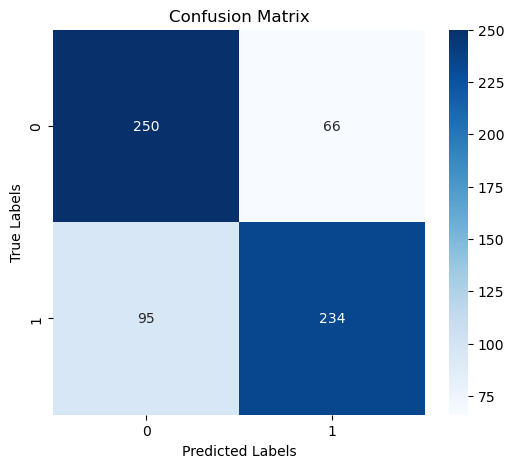

In [97]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

def evaluate_model(model, test_loader):
    criterion = torch.nn.CrossEntropyLoss()
    all_preds = []
    all_labels = []
    all_probs = []
    test_loss = 0.0
    
    model.eval()
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc="Testing"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    test_loss /= len(test_loader)
    all_probs = np.array(all_probs)
    
    # Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    auc = roc_auc_score(all_labels, all_probs[:, 1])
    report = classification_report(all_labels, all_preds)
    
    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN)  # Recall for positive class
    specificity = TN / (TN + FP)  # Recall for negative class
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
    print(f"Specificity (Recall for Negative Class): {specificity:.4f}")
    print("\nClassification Report:\n", report)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function
evaluate_model(model, test_loader)


🧠 Using device: cuda
✅ Loaded model weights from trainer checkpoint format.



📊 Test Evaluation Summary
Test Loss     : 0.5267
Accuracy      : 0.7628
F1 Score      : 0.7587
Precision     : 0.7867
Recall        : 0.7628
AUC-ROC       : 0.8130
Sensitivity   : 0.6292
Specificity   : 0.9019

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       316
           1       0.87      0.63      0.73       329

    accuracy                           0.76       645
   macro avg       0.78      0.77      0.76       645
weighted avg       0.79      0.76      0.76       645



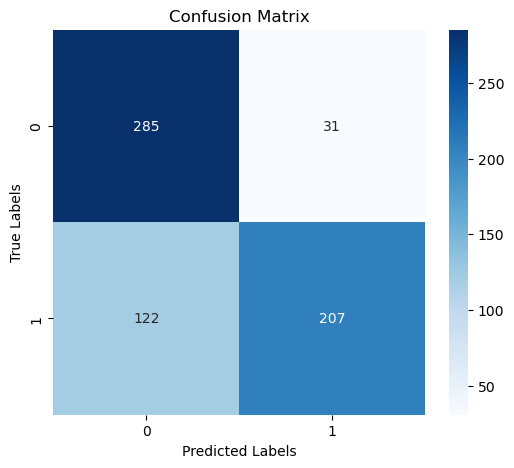

In [42]:
import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


def evaluate_model_from_checkpoint(model_class, model_path, test_loader, device=None):
    """
    Evaluate a trained PyTorch model from a checkpoint (.pth) on the test dataset.

    Args:
        model_class: The model class definition (e.g., EfficientNetClassifier).
        model_path (str): Path to the saved checkpoint file.
        test_loader (DataLoader): PyTorch DataLoader for test data.
        device (str, optional): 'cuda' or 'cpu'. Auto-detect if None.
    """
    # === Device setup ===
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n🧠 Using device: {device}")

    # === Load model ===
    model = model_class(num_classes=2, dropout_rate=0.3).to(device)

    checkpoint = torch.load(model_path, map_location=device)

    # Handle both raw state_dict and full checkpoint formats
    if "model_state_dict" in checkpoint:
        model.load_state_dict(checkpoint["model_state_dict"])
        print("✅ Loaded model weights from trainer checkpoint format.")
    else:
        model.load_state_dict(checkpoint)
        print("✅ Loaded raw model state_dict.")

    model.eval()

    # === Initialize tracking ===
    criterion = torch.nn.CrossEntropyLoss()
    all_preds, all_labels, all_probs = [], [], []
    test_loss = 0.0

    # === Evaluation loop ===
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc="Evaluating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # === Compute metrics ===
    test_loss /= len(test_loader)
    all_probs = np.array(all_probs)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    try:
        auc = roc_auc_score(all_labels, all_probs[:, 1])
    except Exception:
        auc = np.nan

    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)

    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
    else:
        sensitivity = specificity = np.nan

    # === Print results ===
    print("\n📊 Test Evaluation Summary")
    print(f"Test Loss     : {test_loss:.4f}")
    print(f"Accuracy      : {accuracy:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"Precision     : {precision:.4f}")
    print(f"Recall        : {recall:.4f}")
    print(f"AUC-ROC       : {auc:.4f}")
    print(f"Sensitivity   : {sensitivity:.4f}")
    print(f"Specificity   : {specificity:.4f}")
    print("\nClassification Report:\n", report)

    # === Confusion Matrix Plot ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # === Return metrics ===
    return {
        "loss": test_loss,
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "auc": auc,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "report": report,
        "confusion_matrix": cm
    }


# === Example Usage ===
# from your_model_file import EfficientNetClassifier
# from your_dataloader_file import test_loader

model_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\ssl_checkpoints\best_model.pth"

metrics = evaluate_model_from_checkpoint(
    model_class=EfficientNetClassifier,
    model_path=model_path,
    test_loader=test_loader
)

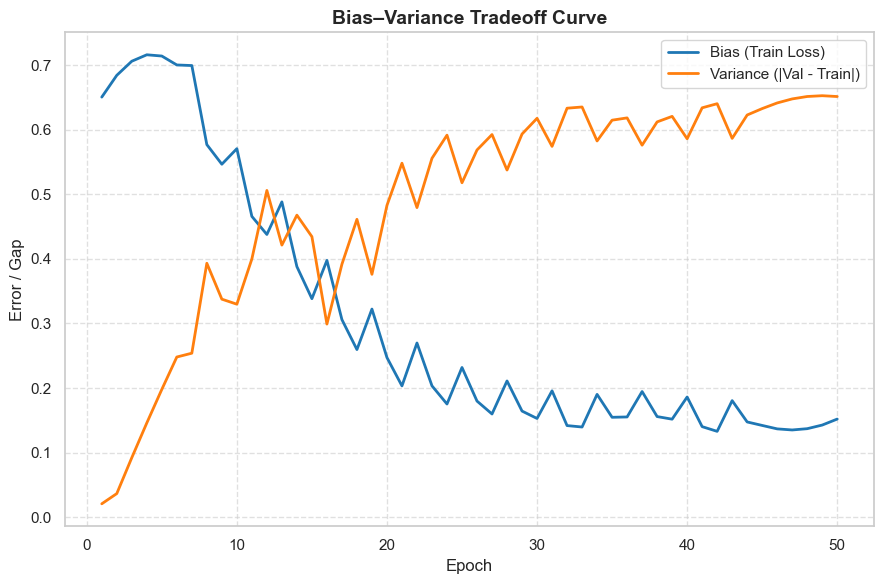

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter  # for smoothing

# === Load metrics CSV ===
metrics_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\training_metrics.csv"
df = pd.read_csv(metrics_path)

# === Style ===
sns.set(style="whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11
})

# === Extract train & val losses ===
train_loss = df['train_loss'].values
val_loss = df['val_loss'].values
epochs = df['epoch'].values

# === Clip extreme spikes in train loss for plotting only ===
clip_value = np.percentile(train_loss, 95)
train_loss_clipped = np.clip(train_loss, None, clip_value)

# === Smooth the losses ===
# window_length must be odd and <= number of points
window_length = min(11, len(train_loss_clipped) if len(train_loss_clipped)%2==1 else len(train_loss_clipped)-1)
train_smooth = savgol_filter(train_loss_clipped, window_length=window_length, polyorder=2)
val_smooth = savgol_filter(val_loss, window_length=window_length, polyorder=2)


# === 2️⃣ Bias–Variance Approximation (smoothed) ===
bias = train_smooth
variance = np.abs(val_smooth - train_smooth)

plt.figure(figsize=(9,6))
plt.plot(epochs, bias, label='Bias (Train Loss)', color='#1f77b4', linewidth=2)
plt.plot(epochs, variance, label='Variance (|Val - Train|)', color='#ff7f0e', linewidth=2)
plt.title('Bias–Variance Tradeoff Curve', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Error / Gap')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

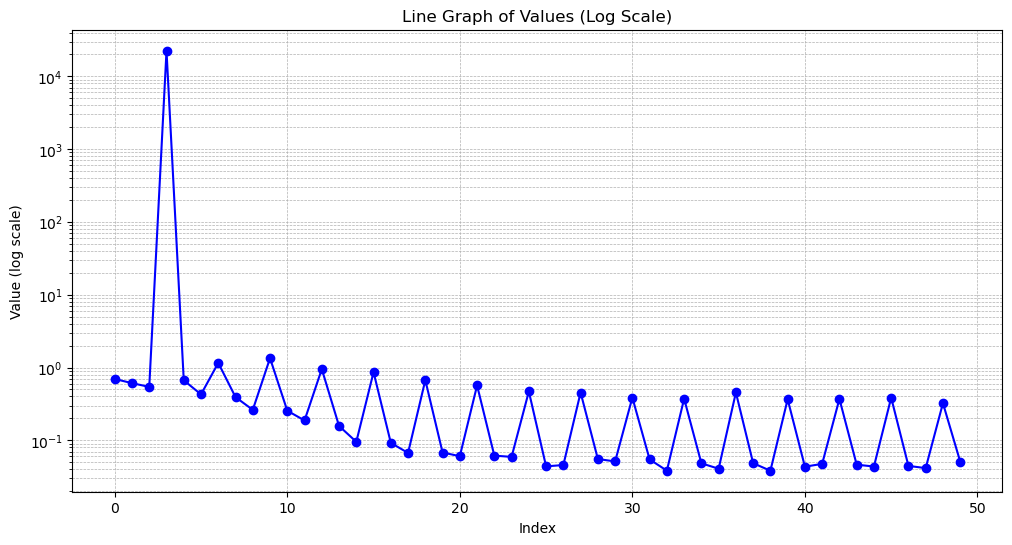

In [1]:
import matplotlib.pyplot as plt

# Your data
values = [
    0.696073316, 0.610510295, 0.541783562, 22479.3832, 0.667827432, 0.427434693, 
    1.157493314, 0.392401984, 0.262092263, 1.34418311, 0.254990989, 0.187395049, 
    0.952156058, 0.157440153, 0.095342659, 0.864476179, 0.09235489, 0.067046397, 
    0.671413871, 0.068027455, 0.060539169, 0.567012947, 0.061589181, 0.05925335, 
    0.468911557, 0.043863242, 0.045792246, 0.453640797, 0.055390637, 0.051255066, 
    0.386616629, 0.054593613, 0.038332018, 0.373204666, 0.048330684, 0.040750142, 
    0.453994035, 0.048510881, 0.038235631, 0.366299107, 0.043418131, 0.047498488, 
    0.370664591, 0.046295164, 0.043660569, 0.384987492, 0.044535076, 0.041535538, 
    0.323778711, 0.05104901
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(values, marker='o', linestyle='-', color='blue')
plt.yscale('log')  # log scale to handle the outlier
plt.title('Line Graph of Values (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Value (log scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

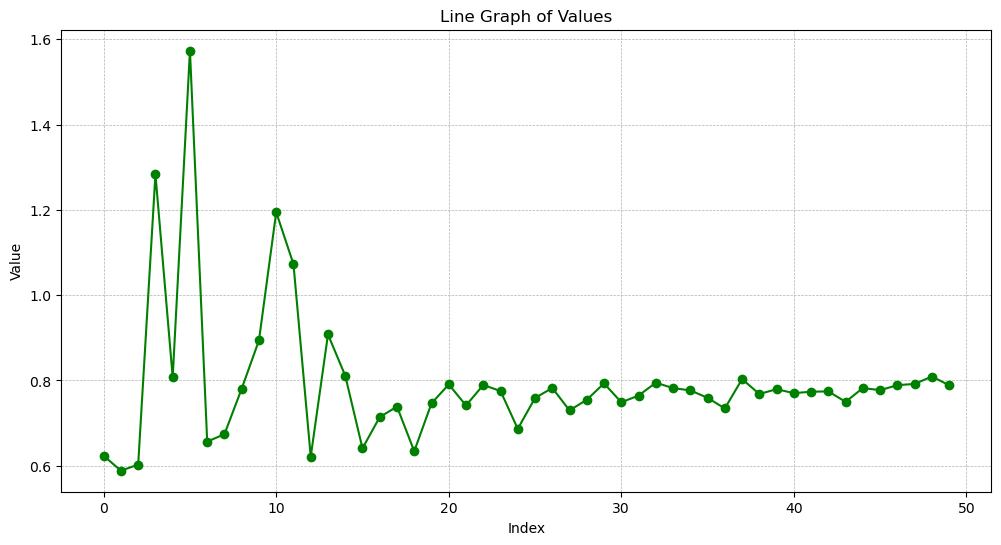

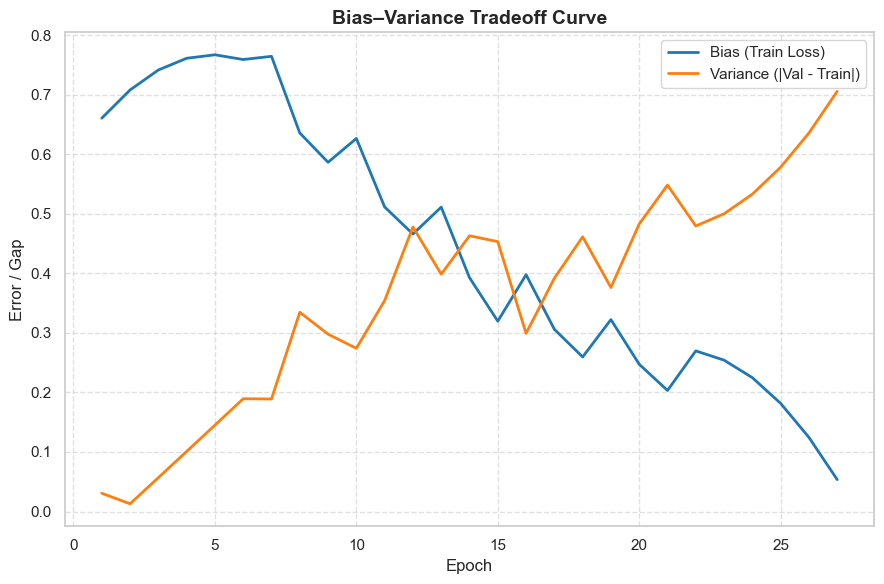

In [44]:
import matplotlib.pyplot as plt

# Your second dataset
values = [
    0.623259938, 0.588177687, 0.602628823, 1.283500815, 0.807162881, 1.573385791,
    0.656527352, 0.673757481, 0.780679737, 0.893948825, 1.194572666, 1.072718444,
    0.621115229, 0.9077201, 0.811206324, 0.640691906, 0.714068334, 0.738516123,
    0.633900762, 0.746285362, 0.790544703, 0.741391135, 0.789238117, 0.775136016,
    0.686397957, 0.758786431, 0.782296671, 0.729702654, 0.754689027, 0.793008746,
    0.748723398, 0.764417706, 0.794676672, 0.781909133, 0.776630493, 0.759167606,
    0.734301791, 0.8030278, 0.768183797, 0.779411367, 0.770174999, 0.773516451,
    0.774245898, 0.749768266, 0.782151143, 0.777185874, 0.788885249, 0.791801399,
    0.809071024, 0.788756277
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(values, marker='o', linestyle='-', color='green')
plt.title('Line Graph of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter  # for smoothing

# === Load metrics CSV ===
metrics_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\training_metrics.csv"
df = pd.read_csv(metrics_path)

# === Extract train & val losses and slice to first 30 epochs ===
epochs_full = df['epoch'].values
train_loss_full = df['train_loss'].values
val_loss_full = df['val_loss'].values

# Slice to first 30 epochs (or fewer if data is shorter)
max_epochs = min(27, len(epochs_full))
epochs = epochs_full[:max_epochs]
train_loss = train_loss_full[:max_epochs]
val_loss = val_loss_full[:max_epochs]

# === Style ===
sns.set(style="whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11
})

# === Clip extreme spikes in train loss for plotting only ===
clip_value = np.percentile(train_loss, 95)
train_loss_clipped = np.clip(train_loss, None, clip_value)

# === Smooth the losses ===
# window_length must be odd and <= number of points
window_length = min(11, len(train_loss_clipped) if len(train_loss_clipped)%2==1 else len(train_loss_clipped)-1)
train_smooth = savgol_filter(train_loss_clipped, window_length=window_length, polyorder=2)
val_smooth = savgol_filter(val_loss, window_length=window_length, polyorder=2)

# === Bias–Variance Approximation (smoothed) ===
bias = train_smooth
variance = np.abs(val_smooth - train_smooth)

plt.figure(figsize=(9,6))
plt.plot(epochs, bias, label='Bias (Train Loss)', color='#1f77b4', linewidth=2)
plt.plot(epochs, variance, label='Variance (|Val - Train|)', color='#ff7f0e', linewidth=2)
plt.title('Bias–Variance Tradeoff Curve', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Error / Gap')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

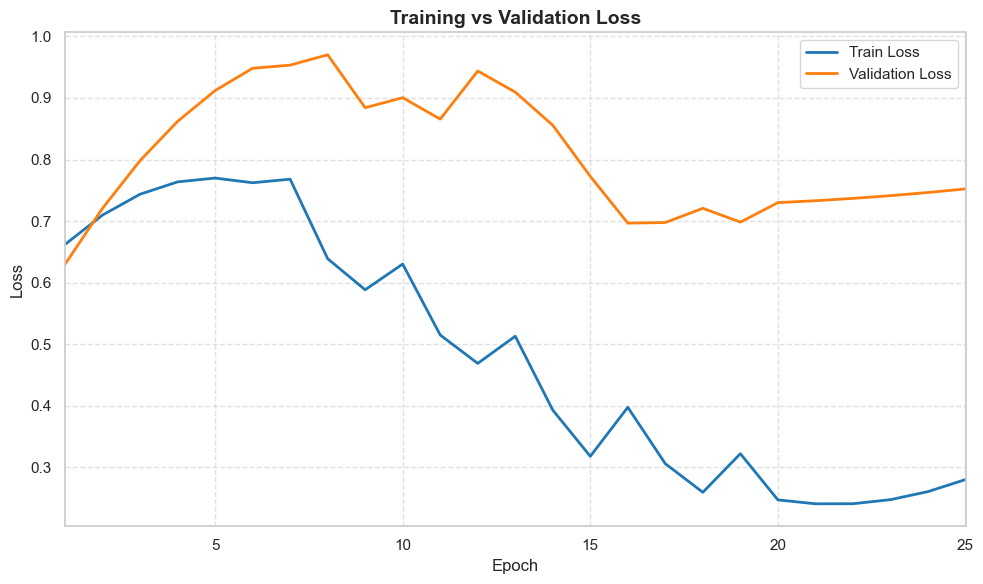

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter  # for smoothing

# === Load metrics CSV ===
metrics_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\training_metrics.csv"
df = pd.read_csv(metrics_path)

# === Extract train & val losses and slice to first 30 epochs ===
epochs_full = df['epoch'].values
train_loss_full = df['train_loss'].values
val_loss_full = df['val_loss'].values

# Slice to first 30 epochs (or fewer if data is shorter)
max_epochs = min(25, len(epochs_full))
epochs = epochs_full[:max_epochs]
train_loss = train_loss_full[:max_epochs]
val_loss = val_loss_full[:max_epochs]

# === Style ===
sns.set(style="whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11
})

# === Clip extreme spikes in train loss for plotting only ===
clip_value = np.percentile(train_loss, 95)
train_loss_clipped = np.clip(train_loss, None, clip_value)

# === Smooth the losses ===
# window_length must be odd and <= number of points
window_length = min(11, len(train_loss_clipped) if len(train_loss_clipped)%2==1 else len(train_loss_clipped)-1)
train_smooth = savgol_filter(train_loss_clipped, window_length=window_length, polyorder=2)
val_smooth = savgol_filter(val_loss, window_length=window_length, polyorder=2)

# === Plot Training vs Validation Loss (first 30 epochs) ===
plt.figure(figsize=(10,6))
plt.plot(epochs, train_smooth, label='Train Loss', color='#1f77b4', linewidth=2)
plt.plot(epochs, val_smooth, label='Validation Loss', color='#ff7f0e', linewidth=2)
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=np.arange(0, 31, 5))  # ticks every 5 epochs
plt.xlim(1, 25)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Fresh Training

In [45]:
print("Initializing model and trainer...")
model = EfficientNetClassifier(num_classes=2, dropout_rate=0.3)

trainer = PseudoLabelTrainer(
    model=model,
    train_loader=train_loader,
    unlabeled_loader=unlabeled_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=1e-3,
    weight_decay=1e-4,
    checkpoint_dir=r"C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01"
)

trainer.load_checkpoint()

trainer.train(num_epochs=30)

Initializing model and trainer...
No checkpoint found, starting from scratch
Starting training for 30 epochs. Resuming from epoch 0


Epoch 1: 100%|█████████████████████████████████| 75/75 [00:11<00:00,  6.75it/s, Loss=0.8765, Sup=0.8765, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:18<00:00,  8.64it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth with validation accuracy: 0.6326

Epoch 1/30:
Train Loss: 0.6971 (Sup: 0.6971, Pseudo: 0.0000)
Val Loss: 0.6153, Val Acc: 0.6326
Val F1: 0.6234, Val AUC: 0.7355
Learning Rate: 0.001000


Epoch 2: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 10.92it/s, Loss=0.6407, Sup=0.6407, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.41it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth with validation accuracy: 0.6682

Epoch 2/30:
Train Loss: 0.6309 (Sup: 0.6309, Pseudo: 0.0000)
Val Loss: 0.5898, Val Acc: 0.6682
Val F1: 0.6587, Val AUC: 0.7857
Learning Rate: 0.001000


Epoch 3: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 11.27it/s, Loss=0.7538, Sup=0.7538, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.62it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth with validation accuracy: 0.6946

Epoch 3/30:
Train Loss: 0.5578 (Sup: 0.5578, Pseudo: 0.0000)
Val Loss: 0.6335, Val Acc: 0.6946
Val F1: 0.6941, Val AUC: 0.7308
Learning Rate: 0.001000
Epoch 4: Generating pseudo-labels...
Generated 125 pseudo-labels from unlabeled set.


Epoch 4:   0%|                                                                                  | 0/75 [00:00<?, ?it/s]

Batch 1: Using 4 pseudo-labels


Epoch 4:   3%|▉                                 | 2/75 [00:00<00:16,  4.37it/s, Loss=0.9785, Sup=0.9785, Pseudo=0.5347]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 4:   5%|█▊                                | 4/75 [00:00<00:12,  5.91it/s, Loss=1.5177, Sup=1.5177, Pseudo=0.0571]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 4:   8%|██▋                               | 6/75 [00:01<00:11,  6.14it/s, Loss=1.0453, Sup=1.0453, Pseudo=0.7408]

Batch 6: Using 4 pseudo-labels
Batch 7: Using 4 pseudo-labels


Epoch 4:  11%|███▋                              | 8/75 [00:01<00:10,  6.18it/s, Loss=1.1178, Sup=1.1178, Pseudo=1.4636]

Batch 8: Using 4 pseudo-labels
Batch 9: Using 4 pseudo-labels


Epoch 4:  13%|████▍                            | 10/75 [00:01<00:10,  6.37it/s, Loss=0.6741, Sup=0.6741, Pseudo=0.5767]

Batch 10: Using 4 pseudo-labels
Batch 11: Using 4 pseudo-labels


Epoch 4:  16%|████▊                         | 12/75 [00:02<00:09,  6.37it/s, Loss=18.2095, Sup=18.2095, Pseudo=17.6209]

Batch 12: Using 4 pseudo-labels
Batch 13: Using 4 pseudo-labels


Epoch 4:  19%|██████▏                          | 14/75 [00:02<00:09,  6.51it/s, Loss=1.1593, Sup=1.1593, Pseudo=0.3657]

Batch 14: Using 4 pseudo-labels
Batch 15: Using 4 pseudo-labels


Epoch 4:  21%|███████                          | 16/75 [00:02<00:09,  6.46it/s, Loss=5.2765, Sup=5.2765, Pseudo=4.2029]

Batch 16: Using 4 pseudo-labels
Batch 17: Using 4 pseudo-labels


Epoch 4:  24%|███████▉                         | 18/75 [00:02<00:08,  6.42it/s, Loss=4.4144, Sup=4.4144, Pseudo=0.2717]

Batch 18: Using 4 pseudo-labels
Batch 19: Using 4 pseudo-labels


Epoch 4:  27%|████████▊                        | 20/75 [00:03<00:08,  6.43it/s, Loss=1.3242, Sup=1.3242, Pseudo=0.0324]

Batch 20: Using 4 pseudo-labels
Batch 21: Using 4 pseudo-labels


Epoch 4:  29%|█████████                      | 22/75 [00:03<00:08,  6.53it/s, Loss=96.6125, Sup=96.6125, Pseudo=3.7764]

Batch 22: Using 4 pseudo-labels
Batch 23: Using 4 pseudo-labels


Epoch 4:  32%|████████▋                  | 24/75 [00:04<00:07,  6.72it/s, Loss=213.6545, Sup=213.6545, Pseudo=267.4051]

Batch 24: Using 4 pseudo-labels
Batch 25: Using 4 pseudo-labels


Epoch 4:  35%|█████████▋                  | 26/75 [00:04<00:07,  6.64it/s, Loss=157.3421, Sup=157.3421, Pseudo=58.8507]

Batch 26: Using 4 pseudo-labels
Batch 27: Using 4 pseudo-labels


Epoch 4:  37%|████████████▎                    | 28/75 [00:04<00:07,  6.43it/s, Loss=0.7237, Sup=0.7237, Pseudo=0.3208]

Batch 28: Using 4 pseudo-labels
Batch 29: Using 4 pseudo-labels


Epoch 4:  40%|█████████████▏                   | 30/75 [00:04<00:06,  6.50it/s, Loss=1.0492, Sup=1.0492, Pseudo=0.2023]

Batch 30: Using 4 pseudo-labels
Batch 31: Using 4 pseudo-labels


Epoch 4:  43%|██████████████                   | 32/75 [00:05<00:07,  5.59it/s, Loss=1.4829, Sup=1.4829, Pseudo=0.2026]

Batch 32: Using 1 pseudo-labels


Epoch 4: 100%|█████████████████████████████████| 75/75 [00:08<00:00,  8.66it/s, Loss=0.9344, Sup=0.9344, Pseudo=0.0000]


Total pseudo-labels used this epoch: 125



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.65it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 4/30:
Train Loss: 14.4456 (Sup: 14.4456, Pseudo: 4.9413)
Val Loss: 0.7228, Val Acc: 0.5116
Val F1: 0.3463, Val AUC: 0.5037
Learning Rate: 0.001000


Epoch 5: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 11.22it/s, Loss=0.9406, Sup=0.9406, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.25it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 5/30:
Train Loss: 0.6656 (Sup: 0.6656, Pseudo: 0.0000)
Val Loss: 0.6657, Val Acc: 0.6713
Val F1: 0.6692, Val AUC: 0.7526
Learning Rate: 0.001000


Epoch 6: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 11.14it/s, Loss=0.5540, Sup=0.5540, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.86it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 6/30:
Train Loss: 0.4594 (Sup: 0.4594, Pseudo: 0.0000)
Val Loss: 0.7006, Val Acc: 0.6512
Val F1: 0.6477, Val AUC: 0.7167
Learning Rate: 0.001000
Epoch 7: Generating pseudo-labels...
Generated 493 pseudo-labels from unlabeled set.


Epoch 7:   1%|▍                                 | 1/75 [00:00<00:12,  6.00it/s, Loss=1.6773, Sup=1.6773, Pseudo=1.8247]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 7:   3%|▉                                 | 2/75 [00:00<00:11,  6.08it/s, Loss=1.0554, Sup=1.0554, Pseudo=0.2598]

Batch 3: Using 4 pseudo-labels


Epoch 7:   4%|█▎                                | 3/75 [00:00<00:11,  6.05it/s, Loss=1.0665, Sup=1.0665, Pseudo=1.2500]

Batch 4: Using 4 pseudo-labels


Epoch 7:   5%|█▊                                | 4/75 [00:00<00:11,  6.17it/s, Loss=0.6700, Sup=0.6700, Pseudo=0.5675]

Batch 5: Using 4 pseudo-labels


Epoch 7:   7%|██▎                               | 5/75 [00:00<00:11,  6.25it/s, Loss=0.9148, Sup=0.9148, Pseudo=1.3171]

Batch 6: Using 4 pseudo-labels


Epoch 7:   8%|██▋                               | 6/75 [00:00<00:11,  6.20it/s, Loss=0.8767, Sup=0.8767, Pseudo=1.4685]

Batch 7: Using 4 pseudo-labels


Epoch 7:   9%|███▏                              | 7/75 [00:01<00:11,  6.15it/s, Loss=0.9944, Sup=0.9944, Pseudo=0.5968]

Batch 8: Using 4 pseudo-labels


Epoch 7:  11%|███▋                              | 8/75 [00:01<00:10,  6.14it/s, Loss=0.8948, Sup=0.8948, Pseudo=1.5447]

Batch 9: Using 4 pseudo-labels


Epoch 7:  12%|████                              | 9/75 [00:01<00:10,  6.01it/s, Loss=1.2833, Sup=1.2833, Pseudo=1.2780]

Batch 10: Using 4 pseudo-labels


Epoch 7:  13%|████▍                            | 10/75 [00:01<00:11,  5.86it/s, Loss=0.5810, Sup=0.5810, Pseudo=0.4278]

Batch 11: Using 4 pseudo-labels


Epoch 7:  15%|████▊                            | 11/75 [00:01<00:10,  5.95it/s, Loss=1.2173, Sup=1.2173, Pseudo=0.8436]

Batch 12: Using 4 pseudo-labels


Epoch 7:  16%|█████▎                           | 12/75 [00:01<00:10,  5.95it/s, Loss=0.7595, Sup=0.7595, Pseudo=0.7358]

Batch 13: Using 4 pseudo-labels


Epoch 7:  17%|█████▋                           | 13/75 [00:02<00:10,  5.97it/s, Loss=0.9786, Sup=0.9786, Pseudo=1.0509]

Batch 14: Using 4 pseudo-labels


Epoch 7:  19%|██████▏                          | 14/75 [00:02<00:10,  5.85it/s, Loss=3.3027, Sup=3.3027, Pseudo=1.5247]

Batch 15: Using 4 pseudo-labels


Epoch 7:  20%|██████▌                          | 15/75 [00:02<00:10,  5.76it/s, Loss=1.0158, Sup=1.0158, Pseudo=0.4154]

Batch 16: Using 4 pseudo-labels


Epoch 7:  21%|███████                          | 16/75 [00:02<00:10,  5.67it/s, Loss=1.0723, Sup=1.0723, Pseudo=0.2377]

Batch 17: Using 4 pseudo-labels


Epoch 7:  23%|███████▍                         | 17/75 [00:02<00:10,  5.69it/s, Loss=1.0471, Sup=1.0471, Pseudo=0.9473]

Batch 18: Using 4 pseudo-labels


Epoch 7:  24%|███████▉                         | 18/75 [00:03<00:09,  5.76it/s, Loss=1.1632, Sup=1.1632, Pseudo=0.5755]

Batch 19: Using 4 pseudo-labels


Epoch 7:  25%|████████▎                        | 19/75 [00:03<00:09,  5.91it/s, Loss=0.9773, Sup=0.9773, Pseudo=0.8601]

Batch 20: Using 4 pseudo-labels


Epoch 7:  27%|████████▊                        | 20/75 [00:03<00:09,  5.88it/s, Loss=1.1948, Sup=1.1948, Pseudo=0.9965]

Batch 21: Using 4 pseudo-labels


Epoch 7:  28%|█████████▏                       | 21/75 [00:03<00:09,  5.96it/s, Loss=1.0421, Sup=1.0421, Pseudo=0.8639]

Batch 22: Using 4 pseudo-labels


Epoch 7:  29%|█████████▋                       | 22/75 [00:03<00:08,  6.02it/s, Loss=1.6820, Sup=1.6820, Pseudo=1.3083]

Batch 23: Using 4 pseudo-labels


Epoch 7:  31%|██████████                       | 23/75 [00:03<00:08,  5.93it/s, Loss=1.1154, Sup=1.1154, Pseudo=0.8893]

Batch 24: Using 4 pseudo-labels


Epoch 7:  32%|██████████▌                      | 24/75 [00:04<00:08,  5.93it/s, Loss=0.9800, Sup=0.9800, Pseudo=0.9301]

Batch 25: Using 4 pseudo-labels


Epoch 7:  33%|███████████                      | 25/75 [00:04<00:08,  5.87it/s, Loss=1.4739, Sup=1.4739, Pseudo=0.7784]

Batch 26: Using 4 pseudo-labels


Epoch 7:  35%|███████████▍                     | 26/75 [00:04<00:08,  5.98it/s, Loss=1.2136, Sup=1.2136, Pseudo=1.0509]

Batch 27: Using 4 pseudo-labels


Epoch 7:  36%|███████████▉                     | 27/75 [00:04<00:07,  6.03it/s, Loss=0.9338, Sup=0.9338, Pseudo=0.8140]

Batch 28: Using 4 pseudo-labels


Epoch 7:  37%|████████████▎                    | 28/75 [00:04<00:07,  6.08it/s, Loss=1.0898, Sup=1.0898, Pseudo=0.6216]

Batch 29: Using 4 pseudo-labels


Epoch 7:  39%|████████████▊                    | 29/75 [00:04<00:07,  6.12it/s, Loss=1.0339, Sup=1.0339, Pseudo=0.7127]

Batch 30: Using 4 pseudo-labels


Epoch 7:  40%|█████████████▏                   | 30/75 [00:05<00:07,  6.16it/s, Loss=0.9348, Sup=0.9348, Pseudo=0.6109]

Batch 31: Using 4 pseudo-labels


Epoch 7:  41%|█████████████▋                   | 31/75 [00:05<00:07,  6.10it/s, Loss=0.9691, Sup=0.9691, Pseudo=0.6290]

Batch 32: Using 4 pseudo-labels


Epoch 7:  43%|██████████████                   | 32/75 [00:05<00:07,  6.03it/s, Loss=1.2384, Sup=1.2384, Pseudo=0.8539]

Batch 33: Using 4 pseudo-labels


Epoch 7:  44%|██████████████▌                  | 33/75 [00:05<00:07,  5.99it/s, Loss=1.1072, Sup=1.1072, Pseudo=0.6720]

Batch 34: Using 4 pseudo-labels


Epoch 7:  45%|██████████████▉                  | 34/75 [00:05<00:06,  5.86it/s, Loss=1.0366, Sup=1.0366, Pseudo=0.6599]

Batch 35: Using 4 pseudo-labels


Epoch 7:  47%|███████████████▍                 | 35/75 [00:05<00:06,  5.91it/s, Loss=0.9168, Sup=0.9168, Pseudo=0.6194]

Batch 36: Using 4 pseudo-labels


Epoch 7:  48%|███████████████▊                 | 36/75 [00:06<00:06,  5.98it/s, Loss=1.1229, Sup=1.1229, Pseudo=0.7528]

Batch 37: Using 4 pseudo-labels


Epoch 7:  49%|████████████████▎                | 37/75 [00:06<00:06,  6.09it/s, Loss=1.3020, Sup=1.3020, Pseudo=0.7506]

Batch 38: Using 4 pseudo-labels


Epoch 7:  51%|████████████████▋                | 38/75 [00:06<00:06,  6.11it/s, Loss=0.9258, Sup=0.9258, Pseudo=0.6886]

Batch 39: Using 4 pseudo-labels


Epoch 7:  52%|█████████████████▏               | 39/75 [00:06<00:05,  6.09it/s, Loss=0.8002, Sup=0.8002, Pseudo=0.6017]

Batch 40: Using 4 pseudo-labels


Epoch 7:  53%|█████████████████▌               | 40/75 [00:06<00:05,  5.95it/s, Loss=0.8818, Sup=0.8818, Pseudo=0.6567]

Batch 41: Using 4 pseudo-labels


Epoch 7:  55%|██████████████████               | 41/75 [00:06<00:05,  6.00it/s, Loss=0.8874, Sup=0.8874, Pseudo=0.6929]

Batch 42: Using 4 pseudo-labels


Epoch 7:  56%|██████████████████▍              | 42/75 [00:07<00:05,  6.05it/s, Loss=1.1822, Sup=1.1822, Pseudo=0.9970]

Batch 43: Using 4 pseudo-labels


Epoch 7:  57%|██████████████████▉              | 43/75 [00:07<00:05,  6.14it/s, Loss=1.3039, Sup=1.3039, Pseudo=1.0473]

Batch 44: Using 4 pseudo-labels


Epoch 7:  59%|███████████████████▎             | 44/75 [00:07<00:05,  6.11it/s, Loss=0.8123, Sup=0.8123, Pseudo=0.5978]

Batch 45: Using 4 pseudo-labels


Epoch 7:  60%|███████████████████▊             | 45/75 [00:07<00:04,  6.18it/s, Loss=0.8510, Sup=0.8510, Pseudo=0.6170]

Batch 46: Using 4 pseudo-labels


Epoch 7:  61%|████████████████████▏            | 46/75 [00:07<00:04,  6.19it/s, Loss=0.8643, Sup=0.8643, Pseudo=0.9239]

Batch 47: Using 4 pseudo-labels


Epoch 7:  63%|████████████████████▋            | 47/75 [00:07<00:04,  6.20it/s, Loss=1.4626, Sup=1.4626, Pseudo=0.8545]

Batch 48: Using 4 pseudo-labels


Epoch 7:  64%|█████████████████████            | 48/75 [00:07<00:04,  6.26it/s, Loss=1.0803, Sup=1.0803, Pseudo=0.8104]

Batch 49: Using 4 pseudo-labels


Epoch 7:  65%|█████████████████████▌           | 49/75 [00:08<00:04,  6.23it/s, Loss=1.1315, Sup=1.1315, Pseudo=0.6553]

Batch 50: Using 4 pseudo-labels


Epoch 7:  67%|██████████████████████           | 50/75 [00:08<00:04,  6.23it/s, Loss=0.8832, Sup=0.8832, Pseudo=0.6739]

Batch 51: Using 4 pseudo-labels


Epoch 7:  68%|██████████████████████▍          | 51/75 [00:08<00:03,  6.34it/s, Loss=1.1159, Sup=1.1159, Pseudo=0.9563]

Batch 52: Using 4 pseudo-labels


Epoch 7:  69%|██████████████████████▉          | 52/75 [00:08<00:03,  6.45it/s, Loss=1.0699, Sup=1.0699, Pseudo=0.6924]

Batch 53: Using 4 pseudo-labels


Epoch 7:  71%|███████████████████████▎         | 53/75 [00:08<00:03,  6.41it/s, Loss=1.1087, Sup=1.1087, Pseudo=0.5563]

Batch 54: Using 4 pseudo-labels


Epoch 7:  72%|███████████████████████▊         | 54/75 [00:08<00:03,  6.41it/s, Loss=0.9871, Sup=0.9871, Pseudo=0.8844]

Batch 55: Using 4 pseudo-labels


Epoch 7:  73%|████████████████████████▏        | 55/75 [00:09<00:03,  6.32it/s, Loss=0.9546, Sup=0.9546, Pseudo=0.8576]

Batch 56: Using 4 pseudo-labels


Epoch 7:  75%|████████████████████████▋        | 56/75 [00:09<00:03,  6.22it/s, Loss=1.1728, Sup=1.1728, Pseudo=0.6308]

Batch 57: Using 4 pseudo-labels


Epoch 7:  76%|█████████████████████████        | 57/75 [00:09<00:02,  6.34it/s, Loss=1.4914, Sup=1.4914, Pseudo=0.6280]

Batch 58: Using 4 pseudo-labels


Epoch 7:  77%|█████████████████████████▌       | 58/75 [00:09<00:02,  6.36it/s, Loss=1.1779, Sup=1.1779, Pseudo=0.4850]

Batch 59: Using 4 pseudo-labels


Epoch 7:  79%|█████████████████████████▉       | 59/75 [00:09<00:02,  6.32it/s, Loss=0.9660, Sup=0.9660, Pseudo=0.9777]

Batch 60: Using 4 pseudo-labels


Epoch 7:  80%|██████████████████████████▍      | 60/75 [00:09<00:02,  6.41it/s, Loss=1.0263, Sup=1.0263, Pseudo=0.5420]

Batch 61: Using 4 pseudo-labels


Epoch 7:  81%|██████████████████████████▊      | 61/75 [00:10<00:02,  6.23it/s, Loss=0.8908, Sup=0.8908, Pseudo=0.8662]

Batch 62: Using 4 pseudo-labels


Epoch 7:  83%|███████████████████████████▎     | 62/75 [00:10<00:02,  6.31it/s, Loss=1.4789, Sup=1.4789, Pseudo=0.6653]

Batch 63: Using 4 pseudo-labels


Epoch 7:  84%|███████████████████████████▋     | 63/75 [00:10<00:01,  6.21it/s, Loss=0.7978, Sup=0.7978, Pseudo=0.4962]

Batch 64: Using 4 pseudo-labels


Epoch 7:  85%|████████████████████████████▏    | 64/75 [00:10<00:01,  6.21it/s, Loss=0.7647, Sup=0.7647, Pseudo=0.5489]

Batch 65: Using 4 pseudo-labels


Epoch 7:  87%|████████████████████████████▌    | 65/75 [00:10<00:01,  6.23it/s, Loss=0.8452, Sup=0.8452, Pseudo=0.8009]

Batch 66: Using 4 pseudo-labels


Epoch 7:  88%|█████████████████████████████    | 66/75 [00:10<00:01,  6.28it/s, Loss=1.0495, Sup=1.0495, Pseudo=0.5174]

Batch 67: Using 4 pseudo-labels


Epoch 7:  89%|█████████████████████████████▍   | 67/75 [00:10<00:01,  6.25it/s, Loss=0.9812, Sup=0.9812, Pseudo=0.9305]

Batch 68: Using 4 pseudo-labels


Epoch 7:  91%|█████████████████████████████▉   | 68/75 [00:11<00:01,  6.15it/s, Loss=1.0306, Sup=1.0306, Pseudo=0.2261]

Batch 69: Using 4 pseudo-labels


Epoch 7:  92%|██████████████████████████████▎  | 69/75 [00:11<00:00,  6.22it/s, Loss=1.0535, Sup=1.0535, Pseudo=0.5816]

Batch 70: Using 4 pseudo-labels


Epoch 7:  93%|██████████████████████████████▊  | 70/75 [00:11<00:00,  6.21it/s, Loss=0.8297, Sup=0.8297, Pseudo=0.5898]

Batch 71: Using 4 pseudo-labels


Epoch 7:  95%|███████████████████████████████▏ | 71/75 [00:11<00:00,  6.16it/s, Loss=1.3708, Sup=1.3708, Pseudo=0.9353]

Batch 72: Using 4 pseudo-labels


Epoch 7:  96%|███████████████████████████████▋ | 72/75 [00:11<00:00,  6.28it/s, Loss=0.9968, Sup=0.9968, Pseudo=0.6469]

Batch 73: Using 4 pseudo-labels


Epoch 7:  97%|████████████████████████████████ | 73/75 [00:12<00:00,  6.40it/s, Loss=0.8861, Sup=0.8861, Pseudo=0.5038]

Batch 74: Using 4 pseudo-labels


Epoch 7:  99%|████████████████████████████████▌| 74/75 [00:12<00:00,  6.45it/s, Loss=0.8861, Sup=0.8861, Pseudo=0.5038]

Batch 75: Using 4 pseudo-labels


Epoch 7: 100%|█████████████████████████████████| 75/75 [00:12<00:00,  6.12it/s, Loss=0.8327, Sup=0.8327, Pseudo=0.6153]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.02it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 7/30:
Train Loss: 1.0806 (Sup: 1.0806, Pseudo: 0.7832)
Val Loss: 0.6488, Val Acc: 0.6419
Val F1: 0.5982, Val AUC: 0.8020
Learning Rate: 0.000500


Epoch 8: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 11.13it/s, Loss=0.3856, Sup=0.3856, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.43it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth with validation accuracy: 0.7256

Epoch 8/30:
Train Loss: 0.3592 (Sup: 0.3592, Pseudo: 0.0000)
Val Loss: 0.5762, Val Acc: 0.7256
Val F1: 0.7255, Val AUC: 0.8086
Learning Rate: 0.000500


Epoch 9: 100%|█████████████████████████████████| 75/75 [00:06<00:00, 10.91it/s, Loss=0.2775, Sup=0.2775, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.21it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 9/30:
Train Loss: 0.2654 (Sup: 0.2654, Pseudo: 0.0000)
Val Loss: 0.6772, Val Acc: 0.6977
Val F1: 0.6895, Val AUC: 0.7838
Learning Rate: 0.000500
Epoch 10: Generating pseudo-labels...
Generated 1258 pseudo-labels from unlabeled set.


Epoch 10:   1%|▍                                | 1/75 [00:00<00:12,  5.86it/s, Loss=0.2945, Sup=0.2945, Pseudo=0.2976]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 10:   3%|▉                                | 2/75 [00:00<00:12,  5.99it/s, Loss=2.0827, Sup=2.0827, Pseudo=1.4324]

Batch 3: Using 4 pseudo-labels


Epoch 10:   4%|█▎                               | 3/75 [00:00<00:11,  6.14it/s, Loss=1.6153, Sup=1.6153, Pseudo=2.0402]

Batch 4: Using 4 pseudo-labels


Epoch 10:   5%|█▊                               | 4/75 [00:00<00:11,  5.92it/s, Loss=0.6163, Sup=0.6163, Pseudo=0.9678]

Batch 5: Using 4 pseudo-labels


Epoch 10:   7%|██▏                              | 5/75 [00:00<00:11,  5.94it/s, Loss=0.8069, Sup=0.8069, Pseudo=1.0835]

Batch 6: Using 4 pseudo-labels


Epoch 10:   8%|██▋                              | 6/75 [00:01<00:11,  5.82it/s, Loss=1.5501, Sup=1.5501, Pseudo=1.5521]

Batch 7: Using 4 pseudo-labels


Epoch 10:   9%|███                              | 7/75 [00:01<00:11,  5.89it/s, Loss=1.1261, Sup=1.1261, Pseudo=0.1843]

Batch 8: Using 4 pseudo-labels


Epoch 10:  11%|███▌                             | 8/75 [00:01<00:11,  5.90it/s, Loss=1.2704, Sup=1.2704, Pseudo=0.5404]

Batch 9: Using 4 pseudo-labels


Epoch 10:  12%|███▉                             | 9/75 [00:01<00:11,  5.89it/s, Loss=0.9174, Sup=0.9174, Pseudo=0.6959]

Batch 10: Using 4 pseudo-labels


Epoch 10:  13%|████▎                           | 10/75 [00:01<00:10,  6.01it/s, Loss=1.2851, Sup=1.2851, Pseudo=2.0002]

Batch 11: Using 4 pseudo-labels


Epoch 10:  15%|████▋                           | 11/75 [00:01<00:10,  6.11it/s, Loss=1.2529, Sup=1.2529, Pseudo=1.5496]

Batch 12: Using 4 pseudo-labels


Epoch 10:  16%|█████                           | 12/75 [00:02<00:10,  5.90it/s, Loss=0.4922, Sup=0.4922, Pseudo=0.5856]

Batch 13: Using 4 pseudo-labels


Epoch 10:  17%|█████▌                          | 13/75 [00:02<00:10,  5.88it/s, Loss=0.6136, Sup=0.6136, Pseudo=0.5648]

Batch 14: Using 4 pseudo-labels


Epoch 10:  19%|█████▉                          | 14/75 [00:02<00:10,  5.81it/s, Loss=1.8924, Sup=1.8924, Pseudo=1.4465]

Batch 15: Using 4 pseudo-labels


Epoch 10:  20%|██████▍                         | 15/75 [00:02<00:10,  5.73it/s, Loss=1.0018, Sup=1.0018, Pseudo=0.7262]

Batch 16: Using 4 pseudo-labels


Epoch 10:  21%|██████▊                         | 16/75 [00:02<00:10,  5.72it/s, Loss=0.9868, Sup=0.9868, Pseudo=0.7598]

Batch 17: Using 4 pseudo-labels


Epoch 10:  23%|███████▎                        | 17/75 [00:02<00:09,  5.82it/s, Loss=0.8136, Sup=0.8136, Pseudo=0.8343]

Batch 18: Using 4 pseudo-labels


Epoch 10:  24%|███████▋                        | 18/75 [00:03<00:09,  5.86it/s, Loss=1.0201, Sup=1.0201, Pseudo=0.5744]

Batch 19: Using 4 pseudo-labels


Epoch 10:  25%|████████                        | 19/75 [00:03<00:09,  5.78it/s, Loss=1.0139, Sup=1.0139, Pseudo=1.0802]

Batch 20: Using 4 pseudo-labels


Epoch 10:  27%|████████▌                       | 20/75 [00:03<00:09,  5.88it/s, Loss=1.0927, Sup=1.0927, Pseudo=0.7793]

Batch 21: Using 4 pseudo-labels


Epoch 10:  28%|████████▉                       | 21/75 [00:03<00:09,  5.87it/s, Loss=0.8622, Sup=0.8622, Pseudo=0.5849]

Batch 22: Using 4 pseudo-labels


Epoch 10:  29%|█████████▍                      | 22/75 [00:03<00:09,  5.85it/s, Loss=0.6235, Sup=0.6235, Pseudo=0.4673]

Batch 23: Using 4 pseudo-labels


Epoch 10:  31%|█████████▊                      | 23/75 [00:03<00:08,  5.84it/s, Loss=1.0159, Sup=1.0159, Pseudo=0.5456]

Batch 24: Using 4 pseudo-labels


Epoch 10:  32%|██████████▏                     | 24/75 [00:04<00:08,  5.95it/s, Loss=0.8142, Sup=0.8142, Pseudo=0.7880]

Batch 25: Using 4 pseudo-labels


Epoch 10:  33%|██████████▋                     | 25/75 [00:04<00:08,  5.85it/s, Loss=1.1043, Sup=1.1043, Pseudo=0.7788]

Batch 26: Using 4 pseudo-labels


Epoch 10:  35%|███████████                     | 26/75 [00:04<00:08,  5.88it/s, Loss=1.1476, Sup=1.1476, Pseudo=0.8530]

Batch 27: Using 4 pseudo-labels


Epoch 10:  36%|███████████▌                    | 27/75 [00:04<00:07,  6.05it/s, Loss=0.7274, Sup=0.7274, Pseudo=0.5442]

Batch 28: Using 4 pseudo-labels


Epoch 10:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.09it/s, Loss=0.6595, Sup=0.6595, Pseudo=0.5096]

Batch 29: Using 4 pseudo-labels


Epoch 10:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.05it/s, Loss=0.6002, Sup=0.6002, Pseudo=0.4153]

Batch 30: Using 4 pseudo-labels


Epoch 10:  40%|████████████▊                   | 30/75 [00:05<00:07,  6.12it/s, Loss=0.7093, Sup=0.7093, Pseudo=0.5370]

Batch 31: Using 4 pseudo-labels


Epoch 10:  41%|█████████████▏                  | 31/75 [00:05<00:07,  6.02it/s, Loss=0.6721, Sup=0.6721, Pseudo=0.4121]

Batch 32: Using 4 pseudo-labels


Epoch 10:  43%|█████████████▋                  | 32/75 [00:05<00:07,  5.90it/s, Loss=1.1992, Sup=1.1992, Pseudo=0.8825]

Batch 33: Using 4 pseudo-labels


Epoch 10:  44%|██████████████                  | 33/75 [00:05<00:07,  5.73it/s, Loss=1.0134, Sup=1.0134, Pseudo=0.9123]

Batch 34: Using 4 pseudo-labels


Epoch 10:  45%|██████████████▌                 | 34/75 [00:05<00:07,  5.79it/s, Loss=0.8613, Sup=0.8613, Pseudo=0.9547]

Batch 35: Using 4 pseudo-labels


Epoch 10:  47%|██████████████▉                 | 35/75 [00:05<00:06,  5.92it/s, Loss=0.6548, Sup=0.6548, Pseudo=0.7258]

Batch 36: Using 4 pseudo-labels


Epoch 10:  48%|███████████████▎                | 36/75 [00:06<00:06,  5.89it/s, Loss=1.1124, Sup=1.1124, Pseudo=1.3644]

Batch 37: Using 4 pseudo-labels


Epoch 10:  49%|███████████████▊                | 37/75 [00:06<00:06,  5.86it/s, Loss=0.7732, Sup=0.7732, Pseudo=0.5665]

Batch 38: Using 4 pseudo-labels


Epoch 10:  51%|████████████████▏               | 38/75 [00:06<00:06,  5.86it/s, Loss=1.0345, Sup=1.0345, Pseudo=1.1361]

Batch 39: Using 4 pseudo-labels


Epoch 10:  52%|████████████████▋               | 39/75 [00:06<00:06,  5.84it/s, Loss=0.7064, Sup=0.7064, Pseudo=1.0025]

Batch 40: Using 4 pseudo-labels


Epoch 10:  53%|█████████████████               | 40/75 [00:06<00:05,  5.90it/s, Loss=0.6706, Sup=0.6706, Pseudo=0.4631]

Batch 41: Using 4 pseudo-labels


Epoch 10:  56%|█████████████████▉              | 42/75 [00:07<00:05,  5.50it/s, Loss=1.0503, Sup=1.0503, Pseudo=1.0001]

Batch 42: Using 4 pseudo-labels
Batch 43: Using 4 pseudo-labels


Epoch 10:  59%|██████████████████▊             | 44/75 [00:07<00:05,  5.68it/s, Loss=0.4107, Sup=0.4107, Pseudo=0.4665]

Batch 44: Using 4 pseudo-labels
Batch 45: Using 4 pseudo-labels


Epoch 10:  61%|███████████████████▋            | 46/75 [00:07<00:05,  5.71it/s, Loss=1.2218, Sup=1.2218, Pseudo=1.4787]

Batch 46: Using 4 pseudo-labels
Batch 47: Using 4 pseudo-labels


Epoch 10:  64%|████████████████████▍           | 48/75 [00:08<00:04,  5.75it/s, Loss=0.5646, Sup=0.5646, Pseudo=0.2219]

Batch 48: Using 4 pseudo-labels
Batch 49: Using 4 pseudo-labels


Epoch 10:  67%|█████████████████████▎          | 50/75 [00:08<00:04,  5.84it/s, Loss=0.6400, Sup=0.6400, Pseudo=0.2736]

Batch 50: Using 4 pseudo-labels
Batch 51: Using 4 pseudo-labels


Epoch 10:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.00it/s, Loss=0.7528, Sup=0.7528, Pseudo=0.9540]

Batch 52: Using 4 pseudo-labels
Batch 53: Using 4 pseudo-labels


Epoch 10:  72%|███████████████████████         | 54/75 [00:09<00:03,  6.00it/s, Loss=0.7258, Sup=0.7258, Pseudo=0.5860]

Batch 54: Using 4 pseudo-labels
Batch 55: Using 4 pseudo-labels


Epoch 10:  75%|███████████████████████▉        | 56/75 [00:09<00:03,  6.14it/s, Loss=0.8642, Sup=0.8642, Pseudo=0.4173]

Batch 56: Using 4 pseudo-labels
Batch 57: Using 4 pseudo-labels


Epoch 10:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  5.93it/s, Loss=1.2768, Sup=1.2768, Pseudo=0.5718]

Batch 58: Using 4 pseudo-labels
Batch 59: Using 4 pseudo-labels


Epoch 10:  80%|█████████████████████████▌      | 60/75 [00:10<00:02,  6.09it/s, Loss=1.1961, Sup=1.1961, Pseudo=0.8141]

Batch 60: Using 4 pseudo-labels
Batch 61: Using 4 pseudo-labels


Epoch 10:  83%|██████████████████████████▍     | 62/75 [00:10<00:02,  6.11it/s, Loss=0.6824, Sup=0.6824, Pseudo=0.7640]

Batch 62: Using 4 pseudo-labels
Batch 63: Using 4 pseudo-labels


Epoch 10:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.35it/s, Loss=0.9824, Sup=0.9824, Pseudo=0.6369]

Batch 64: Using 4 pseudo-labels
Batch 65: Using 4 pseudo-labels


Epoch 10:  88%|████████████████████████████▏   | 66/75 [00:11<00:01,  6.24it/s, Loss=1.3276, Sup=1.3276, Pseudo=0.5495]

Batch 66: Using 4 pseudo-labels
Batch 67: Using 4 pseudo-labels


Epoch 10:  91%|█████████████████████████████   | 68/75 [00:11<00:01,  6.09it/s, Loss=1.4041, Sup=1.4041, Pseudo=0.9554]

Batch 68: Using 4 pseudo-labels
Batch 69: Using 4 pseudo-labels


Epoch 10:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.23it/s, Loss=0.6761, Sup=0.6761, Pseudo=0.5773]

Batch 70: Using 4 pseudo-labels
Batch 71: Using 4 pseudo-labels


Epoch 10:  96%|██████████████████████████████▋ | 72/75 [00:12<00:00,  6.12it/s, Loss=1.1333, Sup=1.1333, Pseudo=0.8905]

Batch 72: Using 4 pseudo-labels
Batch 73: Using 4 pseudo-labels


Epoch 10:  99%|███████████████████████████████▌| 74/75 [00:12<00:00,  6.14it/s, Loss=0.8180, Sup=0.8180, Pseudo=0.6797]

Batch 74: Using 4 pseudo-labels
Batch 75: Using 4 pseudo-labels


Epoch 10: 100%|████████████████████████████████| 75/75 [00:12<00:00,  5.93it/s, Loss=0.9047, Sup=0.9047, Pseudo=0.8592]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.10it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 10/30:
Train Loss: 1.2861 (Sup: 1.2861, Pseudo: 0.8204)
Val Loss: 0.5629, Val Acc: 0.7039
Val F1: 0.7013, Val AUC: 0.7945
Learning Rate: 0.000500


Epoch 11: 100%|████████████████████████████████| 75/75 [00:06<00:00, 10.96it/s, Loss=0.2290, Sup=0.2290, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.70it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 11/30:
Train Loss: 0.1975 (Sup: 0.1975, Pseudo: 0.0000)
Val Loss: 0.7868, Val Acc: 0.6574
Val F1: 0.6436, Val AUC: 0.7475
Learning Rate: 0.000500


Epoch 12: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.15it/s, Loss=0.0443, Sup=0.0443, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.37it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 12/30:
Train Loss: 0.1365 (Sup: 0.1365, Pseudo: 0.0000)
Val Loss: 0.8089, Val Acc: 0.6946
Val F1: 0.6946, Val AUC: 0.7543
Learning Rate: 0.000250
Epoch 13: Generating pseudo-labels...
Generated 1470 pseudo-labels from unlabeled set.


Epoch 13:   0%|                                         | 0/75 [00:00<?, ?it/s, Loss=1.3214, Sup=1.3214, Pseudo=1.0830]

Batch 1: Using 4 pseudo-labels


Epoch 13:   3%|▉                                | 2/75 [00:00<00:15,  4.75it/s, Loss=1.1904, Sup=1.1904, Pseudo=2.2753]

Batch 2: Using 4 pseudo-labels
Batch 3: Using 4 pseudo-labels


Epoch 13:   5%|█▊                               | 4/75 [00:00<00:13,  5.07it/s, Loss=1.5734, Sup=1.5734, Pseudo=0.8576]

Batch 4: Using 4 pseudo-labels
Batch 5: Using 4 pseudo-labels


Epoch 13:   8%|██▋                              | 6/75 [00:01<00:13,  5.22it/s, Loss=1.2933, Sup=1.2933, Pseudo=1.1790]

Batch 6: Using 4 pseudo-labels
Batch 7: Using 4 pseudo-labels


Epoch 13:  11%|███▌                             | 8/75 [00:01<00:12,  5.29it/s, Loss=0.9258, Sup=0.9258, Pseudo=1.5215]

Batch 8: Using 4 pseudo-labels
Batch 9: Using 4 pseudo-labels


Epoch 13:  13%|████▎                           | 10/75 [00:01<00:12,  5.25it/s, Loss=0.8398, Sup=0.8398, Pseudo=0.3177]

Batch 10: Using 4 pseudo-labels
Batch 11: Using 4 pseudo-labels


Epoch 13:  16%|█████                           | 12/75 [00:02<00:12,  5.01it/s, Loss=0.6441, Sup=0.6441, Pseudo=0.7329]

Batch 12: Using 4 pseudo-labels


Epoch 13:  17%|█████▌                          | 13/75 [00:02<00:12,  4.91it/s, Loss=0.6684, Sup=0.6684, Pseudo=0.7632]

Batch 13: Using 4 pseudo-labels
Batch 14: Using 4 pseudo-labels


Epoch 13:  20%|██████▍                         | 15/75 [00:02<00:12,  4.99it/s, Loss=1.3250, Sup=1.3250, Pseudo=1.4626]

Batch 15: Using 4 pseudo-labels
Batch 16: Using 4 pseudo-labels


Epoch 13:  23%|███████▎                        | 17/75 [00:03<00:10,  5.35it/s, Loss=0.6712, Sup=0.6712, Pseudo=0.6576]

Batch 17: Using 4 pseudo-labels
Batch 18: Using 4 pseudo-labels


Epoch 13:  25%|████████                        | 19/75 [00:03<00:10,  5.22it/s, Loss=0.8542, Sup=0.8542, Pseudo=0.8349]

Batch 19: Using 4 pseudo-labels
Batch 20: Using 4 pseudo-labels


Epoch 13:  28%|████████▉                       | 21/75 [00:04<00:10,  5.38it/s, Loss=0.9055, Sup=0.9055, Pseudo=0.7438]

Batch 21: Using 4 pseudo-labels
Batch 22: Using 4 pseudo-labels


Epoch 13:  31%|█████████▊                      | 23/75 [00:04<00:09,  5.71it/s, Loss=0.8896, Sup=0.8896, Pseudo=0.7540]

Batch 23: Using 4 pseudo-labels
Batch 24: Using 4 pseudo-labels


Epoch 13:  33%|██████████▋                     | 25/75 [00:04<00:08,  5.82it/s, Loss=0.8225, Sup=0.8225, Pseudo=0.7178]

Batch 25: Using 4 pseudo-labels
Batch 26: Using 4 pseudo-labels


Epoch 13:  36%|███████████▌                    | 27/75 [00:05<00:08,  5.89it/s, Loss=0.6675, Sup=0.6675, Pseudo=0.8872]

Batch 27: Using 4 pseudo-labels
Batch 28: Using 4 pseudo-labels


Epoch 13:  39%|████████████▎                   | 29/75 [00:05<00:07,  6.27it/s, Loss=1.3344, Sup=1.3344, Pseudo=1.3422]

Batch 29: Using 4 pseudo-labels
Batch 30: Using 4 pseudo-labels


Epoch 13:  41%|█████████████▏                  | 31/75 [00:05<00:06,  6.46it/s, Loss=1.0815, Sup=1.0815, Pseudo=0.6196]

Batch 31: Using 4 pseudo-labels
Batch 32: Using 4 pseudo-labels


Epoch 13:  44%|██████████████                  | 33/75 [00:05<00:06,  6.28it/s, Loss=0.8010, Sup=0.8010, Pseudo=0.9398]

Batch 33: Using 4 pseudo-labels
Batch 34: Using 4 pseudo-labels


Epoch 13:  47%|██████████████▉                 | 35/75 [00:06<00:06,  6.34it/s, Loss=0.7454, Sup=0.7454, Pseudo=0.6739]

Batch 35: Using 4 pseudo-labels
Batch 36: Using 4 pseudo-labels


Epoch 13:  49%|███████████████▊                | 37/75 [00:06<00:05,  6.45it/s, Loss=1.1068, Sup=1.1068, Pseudo=0.8548]

Batch 37: Using 4 pseudo-labels
Batch 38: Using 4 pseudo-labels


Epoch 13:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.44it/s, Loss=0.7145, Sup=0.7145, Pseudo=0.7961]

Batch 39: Using 4 pseudo-labels
Batch 40: Using 4 pseudo-labels


Epoch 13:  55%|█████████████████▍              | 41/75 [00:07<00:05,  6.46it/s, Loss=0.4918, Sup=0.4918, Pseudo=0.4329]

Batch 41: Using 4 pseudo-labels
Batch 42: Using 4 pseudo-labels


Epoch 13:  57%|██████████████████▎             | 43/75 [00:07<00:05,  6.20it/s, Loss=1.0180, Sup=1.0180, Pseudo=0.8628]

Batch 43: Using 4 pseudo-labels
Batch 44: Using 4 pseudo-labels


Epoch 13:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.29it/s, Loss=1.2887, Sup=1.2887, Pseudo=1.0023]

Batch 45: Using 4 pseudo-labels
Batch 46: Using 4 pseudo-labels


Epoch 13:  63%|████████████████████            | 47/75 [00:08<00:04,  6.54it/s, Loss=0.4615, Sup=0.4615, Pseudo=0.4675]

Batch 47: Using 4 pseudo-labels
Batch 48: Using 4 pseudo-labels


Epoch 13:  65%|████████████████████▉           | 49/75 [00:08<00:03,  6.63it/s, Loss=0.8738, Sup=0.8738, Pseudo=0.9662]

Batch 49: Using 4 pseudo-labels
Batch 50: Using 4 pseudo-labels


Epoch 13:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.68it/s, Loss=0.5184, Sup=0.5184, Pseudo=0.4606]

Batch 51: Using 4 pseudo-labels
Batch 52: Using 4 pseudo-labels


Epoch 13:  71%|██████████████████████▌         | 53/75 [00:09<00:03,  6.31it/s, Loss=0.6803, Sup=0.6803, Pseudo=0.8204]

Batch 53: Using 4 pseudo-labels
Batch 54: Using 4 pseudo-labels


Epoch 13:  73%|███████████████████████▍        | 55/75 [00:09<00:03,  6.28it/s, Loss=0.5580, Sup=0.5580, Pseudo=0.5731]

Batch 55: Using 4 pseudo-labels
Batch 56: Using 4 pseudo-labels


Epoch 13:  76%|████████████████████████▎       | 57/75 [00:09<00:02,  6.35it/s, Loss=0.9554, Sup=0.9554, Pseudo=1.0001]

Batch 57: Using 4 pseudo-labels
Batch 58: Using 4 pseudo-labels


Epoch 13:  79%|█████████████████████████▏      | 59/75 [00:10<00:02,  6.03it/s, Loss=0.5232, Sup=0.5232, Pseudo=0.5262]

Batch 59: Using 4 pseudo-labels
Batch 60: Using 4 pseudo-labels


Epoch 13:  81%|██████████████████████████      | 61/75 [00:10<00:02,  5.95it/s, Loss=1.1328, Sup=1.1328, Pseudo=1.5235]

Batch 61: Using 4 pseudo-labels
Batch 62: Using 4 pseudo-labels


Epoch 13:  84%|██████████████████████████▉     | 63/75 [00:10<00:01,  6.11it/s, Loss=1.0359, Sup=1.0359, Pseudo=1.5636]

Batch 63: Using 4 pseudo-labels
Batch 64: Using 4 pseudo-labels


Epoch 13:  87%|███████████████████████████▋    | 65/75 [00:11<00:01,  6.05it/s, Loss=0.6353, Sup=0.6353, Pseudo=0.6398]

Batch 65: Using 4 pseudo-labels
Batch 66: Using 4 pseudo-labels


Epoch 13:  89%|████████████████████████████▌   | 67/75 [00:11<00:01,  5.99it/s, Loss=0.4913, Sup=0.4913, Pseudo=0.3280]

Batch 67: Using 4 pseudo-labels
Batch 68: Using 4 pseudo-labels


Epoch 13:  92%|█████████████████████████████▍  | 69/75 [00:11<00:00,  6.19it/s, Loss=0.7350, Sup=0.7350, Pseudo=0.7816]

Batch 69: Using 4 pseudo-labels
Batch 70: Using 4 pseudo-labels


Epoch 13:  95%|██████████████████████████████▎ | 71/75 [00:12<00:00,  6.39it/s, Loss=1.0851, Sup=1.0851, Pseudo=0.5990]

Batch 71: Using 4 pseudo-labels
Batch 72: Using 4 pseudo-labels


Epoch 13:  97%|███████████████████████████████▏| 73/75 [00:12<00:00,  6.32it/s, Loss=0.5724, Sup=0.5724, Pseudo=0.3327]

Batch 73: Using 4 pseudo-labels
Batch 74: Using 4 pseudo-labels


Epoch 13: 100%|████████████████████████████████| 75/75 [00:12<00:00,  5.91it/s, Loss=0.6202, Sup=0.6202, Pseudo=0.7401]


Batch 75: Using 4 pseudo-labels
Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.79it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth
New best model saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth with validation accuracy: 0.7442

Epoch 13/30:
Train Loss: 0.8812 (Sup: 0.8812, Pseudo: 0.8986)
Val Loss: 0.5736, Val Acc: 0.7442
Val F1: 0.7440, Val AUC: 0.7990
Learning Rate: 0.000250


Epoch 14: 100%|████████████████████████████████| 75/75 [00:07<00:00, 10.34it/s, Loss=0.0287, Sup=0.0287, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.87it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 14/30:
Train Loss: 0.0861 (Sup: 0.0861, Pseudo: 0.0000)
Val Loss: 0.7240, Val Acc: 0.7039
Val F1: 0.7029, Val AUC: 0.7948
Learning Rate: 0.000250


Epoch 15: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.09it/s, Loss=0.0183, Sup=0.0183, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.99it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 15/30:
Train Loss: 0.0550 (Sup: 0.0550, Pseudo: 0.0000)
Val Loss: 0.7699, Val Acc: 0.7271
Val F1: 0.7269, Val AUC: 0.8063
Learning Rate: 0.000250
Epoch 16: Generating pseudo-labels...
Generated 1791 pseudo-labels from unlabeled set.


Epoch 16:   1%|▍                                | 1/75 [00:00<00:12,  5.86it/s, Loss=1.1733, Sup=1.1733, Pseudo=2.3082]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 16:   3%|▉                                | 2/75 [00:00<00:11,  6.16it/s, Loss=0.4235, Sup=0.4235, Pseudo=0.7865]

Batch 3: Using 4 pseudo-labels


Epoch 16:   4%|█▎                               | 3/75 [00:00<00:11,  6.31it/s, Loss=0.4719, Sup=0.4719, Pseudo=0.9267]

Batch 4: Using 4 pseudo-labels


Epoch 16:   5%|█▊                               | 4/75 [00:00<00:11,  6.25it/s, Loss=0.3545, Sup=0.3545, Pseudo=0.6075]

Batch 5: Using 4 pseudo-labels


Epoch 16:   7%|██▏                              | 5/75 [00:00<00:10,  6.37it/s, Loss=1.5852, Sup=1.5852, Pseudo=3.1258]

Batch 6: Using 4 pseudo-labels


Epoch 16:   8%|██▋                              | 6/75 [00:00<00:10,  6.34it/s, Loss=1.1005, Sup=1.1005, Pseudo=0.8731]

Batch 7: Using 4 pseudo-labels


Epoch 16:   9%|███                              | 7/75 [00:01<00:10,  6.26it/s, Loss=1.9008, Sup=1.9008, Pseudo=1.5184]

Batch 8: Using 4 pseudo-labels


Epoch 16:  11%|███▌                             | 8/75 [00:01<00:11,  6.02it/s, Loss=1.6580, Sup=1.6580, Pseudo=1.6817]

Batch 9: Using 4 pseudo-labels


Epoch 16:  12%|███▉                             | 9/75 [00:01<00:10,  6.05it/s, Loss=0.7489, Sup=0.7489, Pseudo=0.4306]

Batch 10: Using 4 pseudo-labels


Epoch 16:  13%|████▎                           | 10/75 [00:01<00:10,  6.27it/s, Loss=0.7398, Sup=0.7398, Pseudo=0.9057]

Batch 11: Using 4 pseudo-labels


Epoch 16:  15%|████▋                           | 11/75 [00:01<00:10,  6.35it/s, Loss=0.6708, Sup=0.6708, Pseudo=1.0942]

Batch 12: Using 4 pseudo-labels


Epoch 16:  16%|█████                           | 12/75 [00:01<00:09,  6.44it/s, Loss=0.3525, Sup=0.3525, Pseudo=0.4343]

Batch 13: Using 4 pseudo-labels


Epoch 16:  17%|█████▌                          | 13/75 [00:02<00:09,  6.45it/s, Loss=0.6266, Sup=0.6266, Pseudo=0.7408]

Batch 14: Using 4 pseudo-labels


Epoch 16:  19%|█████▉                          | 14/75 [00:02<00:09,  6.43it/s, Loss=1.2746, Sup=1.2746, Pseudo=1.3242]

Batch 15: Using 4 pseudo-labels


Epoch 16:  20%|██████▍                         | 15/75 [00:02<00:09,  6.39it/s, Loss=0.5901, Sup=0.5901, Pseudo=0.3089]

Batch 16: Using 4 pseudo-labels


Epoch 16:  21%|██████▊                         | 16/75 [00:02<00:09,  6.44it/s, Loss=0.8178, Sup=0.8178, Pseudo=1.2735]

Batch 17: Using 4 pseudo-labels


Epoch 16:  23%|███████▎                        | 17/75 [00:02<00:09,  6.38it/s, Loss=0.7768, Sup=0.7768, Pseudo=0.7139]

Batch 18: Using 4 pseudo-labels


Epoch 16:  24%|███████▋                        | 18/75 [00:02<00:08,  6.37it/s, Loss=0.7735, Sup=0.7735, Pseudo=0.6502]

Batch 19: Using 4 pseudo-labels


Epoch 16:  25%|████████                        | 19/75 [00:03<00:08,  6.30it/s, Loss=0.7684, Sup=0.7684, Pseudo=0.7547]

Batch 20: Using 4 pseudo-labels


Epoch 16:  27%|████████▌                       | 20/75 [00:03<00:08,  6.31it/s, Loss=0.9047, Sup=0.9047, Pseudo=0.5822]

Batch 21: Using 4 pseudo-labels


Epoch 16:  28%|████████▉                       | 21/75 [00:03<00:08,  6.24it/s, Loss=1.1446, Sup=1.1446, Pseudo=1.1028]

Batch 22: Using 4 pseudo-labels


Epoch 16:  29%|█████████▍                      | 22/75 [00:03<00:08,  6.30it/s, Loss=0.8141, Sup=0.8141, Pseudo=0.9637]

Batch 23: Using 4 pseudo-labels


Epoch 16:  31%|█████████▊                      | 23/75 [00:03<00:08,  6.21it/s, Loss=0.7862, Sup=0.7862, Pseudo=0.5058]

Batch 24: Using 4 pseudo-labels


Epoch 16:  32%|██████████▏                     | 24/75 [00:03<00:08,  6.33it/s, Loss=0.6235, Sup=0.6235, Pseudo=0.8131]

Batch 25: Using 4 pseudo-labels


Epoch 16:  33%|██████████▋                     | 25/75 [00:03<00:07,  6.26it/s, Loss=0.9479, Sup=0.9479, Pseudo=0.7070]

Batch 26: Using 4 pseudo-labels


Epoch 16:  35%|███████████                     | 26/75 [00:04<00:07,  6.27it/s, Loss=0.9462, Sup=0.9462, Pseudo=0.3851]

Batch 27: Using 4 pseudo-labels


Epoch 16:  36%|███████████▌                    | 27/75 [00:04<00:07,  6.30it/s, Loss=0.5126, Sup=0.5126, Pseudo=0.4869]

Batch 28: Using 4 pseudo-labels


Epoch 16:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.35it/s, Loss=1.4115, Sup=1.4115, Pseudo=2.1156]

Batch 29: Using 4 pseudo-labels


Epoch 16:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.41it/s, Loss=0.9239, Sup=0.9239, Pseudo=0.7502]

Batch 30: Using 4 pseudo-labels


Epoch 16:  40%|████████████▊                   | 30/75 [00:04<00:07,  6.24it/s, Loss=1.2526, Sup=1.2526, Pseudo=1.6797]

Batch 31: Using 4 pseudo-labels


Epoch 16:  41%|█████████████▏                  | 31/75 [00:04<00:07,  6.20it/s, Loss=1.5014, Sup=1.5014, Pseudo=0.8718]

Batch 32: Using 4 pseudo-labels


Epoch 16:  43%|█████████████▋                  | 32/75 [00:05<00:06,  6.28it/s, Loss=0.8054, Sup=0.8054, Pseudo=1.0177]

Batch 33: Using 4 pseudo-labels


Epoch 16:  44%|██████████████                  | 33/75 [00:05<00:06,  6.32it/s, Loss=0.6989, Sup=0.6989, Pseudo=0.7790]

Batch 34: Using 4 pseudo-labels


Epoch 16:  45%|██████████████▌                 | 34/75 [00:05<00:06,  6.18it/s, Loss=0.9300, Sup=0.9300, Pseudo=1.0053]

Batch 35: Using 4 pseudo-labels


Epoch 16:  47%|██████████████▉                 | 35/75 [00:05<00:06,  6.36it/s, Loss=1.0445, Sup=1.0445, Pseudo=1.0036]

Batch 36: Using 4 pseudo-labels


Epoch 16:  48%|███████████████▎                | 36/75 [00:05<00:06,  6.46it/s, Loss=1.0445, Sup=1.0445, Pseudo=1.0036]

Batch 37: Using 4 pseudo-labels


Epoch 16:  49%|███████████████▊                | 37/75 [00:05<00:05,  6.42it/s, Loss=0.9987, Sup=0.9987, Pseudo=0.4402]

Batch 38: Using 4 pseudo-labels


Epoch 16:  51%|████████████████▏               | 38/75 [00:06<00:05,  6.37it/s, Loss=0.8132, Sup=0.8132, Pseudo=0.9419]

Batch 39: Using 4 pseudo-labels


Epoch 16:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.28it/s, Loss=0.8041, Sup=0.8041, Pseudo=0.8857]

Batch 40: Using 4 pseudo-labels


Epoch 16:  53%|█████████████████               | 40/75 [00:06<00:05,  6.30it/s, Loss=0.8490, Sup=0.8490, Pseudo=0.7431]

Batch 41: Using 4 pseudo-labels


Epoch 16:  55%|█████████████████▍              | 41/75 [00:06<00:05,  6.32it/s, Loss=0.8156, Sup=0.8156, Pseudo=0.7436]

Batch 42: Using 4 pseudo-labels


Epoch 16:  56%|█████████████████▉              | 42/75 [00:06<00:05,  6.27it/s, Loss=0.7706, Sup=0.7706, Pseudo=0.6132]

Batch 43: Using 4 pseudo-labels


Epoch 16:  57%|██████████████████▎             | 43/75 [00:06<00:05,  6.24it/s, Loss=0.9509, Sup=0.9509, Pseudo=0.7143]

Batch 44: Using 4 pseudo-labels


Epoch 16:  59%|██████████████████▊             | 44/75 [00:06<00:04,  6.37it/s, Loss=0.3538, Sup=0.3538, Pseudo=0.3819]

Batch 45: Using 4 pseudo-labels


Epoch 16:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.28it/s, Loss=0.7882, Sup=0.7882, Pseudo=0.4957]

Batch 46: Using 4 pseudo-labels


Epoch 16:  61%|███████████████████▋            | 46/75 [00:07<00:04,  6.33it/s, Loss=1.1201, Sup=1.1201, Pseudo=1.4332]

Batch 47: Using 4 pseudo-labels


Epoch 16:  63%|████████████████████            | 47/75 [00:07<00:04,  6.37it/s, Loss=0.9442, Sup=0.9442, Pseudo=1.2341]

Batch 48: Using 4 pseudo-labels


Epoch 16:  64%|████████████████████▍           | 48/75 [00:07<00:04,  6.46it/s, Loss=0.9442, Sup=0.9442, Pseudo=1.2341]

Batch 49: Using 4 pseudo-labels


Epoch 16:  65%|████████████████████▉           | 49/75 [00:07<00:04,  6.47it/s, Loss=0.9521, Sup=0.9521, Pseudo=0.7896]

Batch 50: Using 4 pseudo-labels


Epoch 16:  67%|█████████████████████▎          | 50/75 [00:07<00:03,  6.45it/s, Loss=0.6664, Sup=0.6664, Pseudo=0.7423]

Batch 51: Using 4 pseudo-labels


Epoch 16:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.43it/s, Loss=0.6417, Sup=0.6417, Pseudo=0.8057]

Batch 52: Using 4 pseudo-labels


Epoch 16:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.44it/s, Loss=0.7013, Sup=0.7013, Pseudo=0.7825]

Batch 53: Using 4 pseudo-labels


Epoch 16:  71%|██████████████████████▌         | 53/75 [00:08<00:03,  6.34it/s, Loss=0.7356, Sup=0.7356, Pseudo=0.8570]

Batch 54: Using 4 pseudo-labels


Epoch 16:  72%|███████████████████████         | 54/75 [00:08<00:03,  6.15it/s, Loss=0.7481, Sup=0.7481, Pseudo=0.6075]

Batch 55: Using 4 pseudo-labels


Epoch 16:  73%|███████████████████████▍        | 55/75 [00:08<00:03,  6.23it/s, Loss=0.3493, Sup=0.3493, Pseudo=0.3810]

Batch 56: Using 4 pseudo-labels


Epoch 16:  75%|███████████████████████▉        | 56/75 [00:08<00:03,  6.25it/s, Loss=0.9040, Sup=0.9040, Pseudo=1.0452]

Batch 57: Using 4 pseudo-labels


Epoch 16:  76%|████████████████████████▎       | 57/75 [00:09<00:02,  6.24it/s, Loss=0.7056, Sup=0.7056, Pseudo=0.5170]

Batch 58: Using 4 pseudo-labels


Epoch 16:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  6.21it/s, Loss=0.9001, Sup=0.9001, Pseudo=0.4265]

Batch 59: Using 4 pseudo-labels


Epoch 16:  79%|█████████████████████████▏      | 59/75 [00:09<00:02,  6.33it/s, Loss=1.0910, Sup=1.0910, Pseudo=1.5514]

Batch 60: Using 4 pseudo-labels


Epoch 16:  80%|█████████████████████████▌      | 60/75 [00:09<00:02,  6.18it/s, Loss=1.0252, Sup=1.0252, Pseudo=0.7793]

Batch 61: Using 4 pseudo-labels


Epoch 16:  81%|██████████████████████████      | 61/75 [00:09<00:02,  6.34it/s, Loss=0.8212, Sup=0.8212, Pseudo=1.0096]

Batch 62: Using 4 pseudo-labels


Epoch 16:  83%|██████████████████████████▍     | 62/75 [00:09<00:02,  6.27it/s, Loss=0.5963, Sup=0.5963, Pseudo=0.8531]

Batch 63: Using 4 pseudo-labels


Epoch 16:  84%|██████████████████████████▉     | 63/75 [00:09<00:01,  6.38it/s, Loss=0.7219, Sup=0.7219, Pseudo=1.0509]

Batch 64: Using 4 pseudo-labels


Epoch 16:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.23it/s, Loss=0.7315, Sup=0.7315, Pseudo=0.8256]

Batch 65: Using 4 pseudo-labels


Epoch 16:  87%|███████████████████████████▋    | 65/75 [00:10<00:01,  6.30it/s, Loss=0.5253, Sup=0.5253, Pseudo=0.5653]

Batch 66: Using 4 pseudo-labels


Epoch 16:  88%|████████████████████████████▏   | 66/75 [00:10<00:01,  6.42it/s, Loss=0.7468, Sup=0.7468, Pseudo=0.9384]

Batch 67: Using 4 pseudo-labels


Epoch 16:  89%|████████████████████████████▌   | 67/75 [00:10<00:01,  6.20it/s, Loss=0.4560, Sup=0.4560, Pseudo=0.2835]

Batch 68: Using 4 pseudo-labels


Epoch 16:  91%|█████████████████████████████   | 68/75 [00:10<00:01,  6.38it/s, Loss=1.4514, Sup=1.4514, Pseudo=1.4987]

Batch 69: Using 4 pseudo-labels


Epoch 16:  92%|█████████████████████████████▍  | 69/75 [00:10<00:00,  6.50it/s, Loss=1.0191, Sup=1.0191, Pseudo=1.2006]

Batch 70: Using 4 pseudo-labels


Epoch 16:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.47it/s, Loss=0.8681, Sup=0.8681, Pseudo=0.8814]

Batch 71: Using 4 pseudo-labels


Epoch 16:  95%|██████████████████████████████▎ | 71/75 [00:11<00:00,  6.36it/s, Loss=1.1155, Sup=1.1155, Pseudo=0.8463]

Batch 72: Using 4 pseudo-labels


Epoch 16:  96%|██████████████████████████████▋ | 72/75 [00:11<00:00,  6.14it/s, Loss=0.8488, Sup=0.8488, Pseudo=0.8978]

Batch 73: Using 4 pseudo-labels


Epoch 16:  97%|███████████████████████████████▏| 73/75 [00:11<00:00,  6.17it/s, Loss=0.7633, Sup=0.7633, Pseudo=0.4342]

Batch 74: Using 4 pseudo-labels


Epoch 16:  99%|███████████████████████████████▌| 74/75 [00:11<00:00,  6.27it/s, Loss=0.6382, Sup=0.6382, Pseudo=0.9095]

Batch 75: Using 4 pseudo-labels


Epoch 16: 100%|████████████████████████████████| 75/75 [00:11<00:00,  6.31it/s, Loss=0.9103, Sup=0.9103, Pseudo=0.9939]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.41it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 16/30:
Train Loss: 0.8555 (Sup: 0.8555, Pseudo: 0.9050)
Val Loss: 0.7000, Val Acc: 0.6837
Val F1: 0.6699, Val AUC: 0.7718
Learning Rate: 0.000250


Epoch 17: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.16it/s, Loss=0.0100, Sup=0.0100, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.38it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 17/30:
Train Loss: 0.0657 (Sup: 0.0657, Pseudo: 0.0000)
Val Loss: 0.7774, Val Acc: 0.7054
Val F1: 0.7022, Val AUC: 0.7968
Learning Rate: 0.000125


Epoch 18: 100%|████████████████████████████████| 75/75 [00:07<00:00,  9.95it/s, Loss=0.0205, Sup=0.0205, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.21it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 18/30:
Train Loss: 0.0681 (Sup: 0.0681, Pseudo: 0.0000)
Val Loss: 0.7514, Val Acc: 0.7209
Val F1: 0.7198, Val AUC: 0.8058
Learning Rate: 0.000125
Epoch 19: Generating pseudo-labels...
Generated 1710 pseudo-labels from unlabeled set.


Epoch 19:   0%|                                         | 0/75 [00:00<?, ?it/s, Loss=1.1068, Sup=1.1068, Pseudo=2.1823]

Batch 1: Using 4 pseudo-labels


Epoch 19:   1%|▍                                | 1/75 [00:00<00:12,  5.75it/s, Loss=1.1068, Sup=1.1068, Pseudo=2.1823]

Batch 2: Using 4 pseudo-labels


Epoch 19:   3%|▉                                | 2/75 [00:00<00:12,  6.00it/s, Loss=0.4861, Sup=0.4861, Pseudo=0.9446]

Batch 3: Using 4 pseudo-labels


Epoch 19:   4%|█▎                               | 3/75 [00:00<00:11,  6.11it/s, Loss=0.2608, Sup=0.2608, Pseudo=0.4960]

Batch 4: Using 4 pseudo-labels


Epoch 19:   5%|█▊                               | 4/75 [00:00<00:11,  6.39it/s, Loss=0.7825, Sup=0.7825, Pseudo=1.4053]

Batch 5: Using 4 pseudo-labels


Epoch 19:   7%|██▏                              | 5/75 [00:00<00:10,  6.57it/s, Loss=1.5626, Sup=1.5626, Pseudo=3.0593]

Batch 6: Using 4 pseudo-labels


Epoch 19:   8%|██▋                              | 6/75 [00:00<00:10,  6.41it/s, Loss=0.5229, Sup=0.5229, Pseudo=0.8748]

Batch 7: Using 4 pseudo-labels


Epoch 19:   9%|███                              | 7/75 [00:01<00:10,  6.36it/s, Loss=0.3038, Sup=0.3038, Pseudo=0.5141]

Batch 8: Using 4 pseudo-labels


Epoch 19:  11%|███▌                             | 8/75 [00:01<00:10,  6.43it/s, Loss=0.6526, Sup=0.6526, Pseudo=0.6643]

Batch 9: Using 4 pseudo-labels


Epoch 19:  12%|███▉                             | 9/75 [00:01<00:10,  6.37it/s, Loss=1.2666, Sup=1.2666, Pseudo=0.8348]

Batch 10: Using 4 pseudo-labels


Epoch 19:  13%|████▎                           | 10/75 [00:01<00:10,  6.34it/s, Loss=0.1901, Sup=0.1901, Pseudo=0.2889]

Batch 11: Using 4 pseudo-labels


Epoch 19:  15%|████▋                           | 11/75 [00:01<00:10,  6.28it/s, Loss=1.7692, Sup=1.7692, Pseudo=1.1819]

Batch 12: Using 4 pseudo-labels


Epoch 19:  16%|█████                           | 12/75 [00:01<00:10,  6.09it/s, Loss=0.9978, Sup=0.9978, Pseudo=1.1877]

Batch 13: Using 4 pseudo-labels


Epoch 19:  17%|█████▌                          | 13/75 [00:02<00:10,  6.12it/s, Loss=0.1839, Sup=0.1839, Pseudo=0.1364]

Batch 14: Using 4 pseudo-labels


Epoch 19:  19%|█████▉                          | 14/75 [00:02<00:10,  6.05it/s, Loss=0.4416, Sup=0.4416, Pseudo=0.5808]

Batch 15: Using 4 pseudo-labels


Epoch 19:  20%|██████▍                         | 15/75 [00:02<00:09,  6.09it/s, Loss=0.6874, Sup=0.6874, Pseudo=0.5387]

Batch 16: Using 4 pseudo-labels


Epoch 19:  21%|██████▊                         | 16/75 [00:02<00:09,  6.02it/s, Loss=0.5510, Sup=0.5510, Pseudo=0.7111]

Batch 17: Using 4 pseudo-labels


Epoch 19:  23%|███████▎                        | 17/75 [00:02<00:09,  5.99it/s, Loss=0.9946, Sup=0.9946, Pseudo=1.3798]

Batch 18: Using 4 pseudo-labels


Epoch 19:  24%|███████▋                        | 18/75 [00:02<00:09,  5.96it/s, Loss=0.7589, Sup=0.7589, Pseudo=0.7688]

Batch 19: Using 4 pseudo-labels


Epoch 19:  25%|████████                        | 19/75 [00:03<00:09,  6.00it/s, Loss=1.0243, Sup=1.0243, Pseudo=0.7259]

Batch 20: Using 4 pseudo-labels


Epoch 19:  27%|████████▌                       | 20/75 [00:03<00:08,  6.12it/s, Loss=0.4607, Sup=0.4607, Pseudo=0.2652]

Batch 21: Using 4 pseudo-labels


Epoch 19:  28%|████████▉                       | 21/75 [00:03<00:08,  6.17it/s, Loss=0.6774, Sup=0.6774, Pseudo=0.6942]

Batch 22: Using 4 pseudo-labels


Epoch 19:  29%|█████████▍                      | 22/75 [00:03<00:08,  6.20it/s, Loss=0.6104, Sup=0.6104, Pseudo=0.6132]

Batch 23: Using 4 pseudo-labels


Epoch 19:  31%|█████████▊                      | 23/75 [00:03<00:08,  6.21it/s, Loss=1.0816, Sup=1.0816, Pseudo=1.4059]

Batch 24: Using 4 pseudo-labels


Epoch 19:  32%|██████████▏                     | 24/75 [00:03<00:08,  6.16it/s, Loss=0.5087, Sup=0.5087, Pseudo=0.5721]

Batch 25: Using 4 pseudo-labels


Epoch 19:  33%|██████████▋                     | 25/75 [00:04<00:08,  6.18it/s, Loss=0.8193, Sup=0.8193, Pseudo=0.7955]

Batch 26: Using 4 pseudo-labels


Epoch 19:  35%|███████████                     | 26/75 [00:04<00:07,  6.16it/s, Loss=1.3112, Sup=1.3112, Pseudo=1.2431]

Batch 27: Using 4 pseudo-labels


Epoch 19:  36%|███████████▌                    | 27/75 [00:04<00:07,  6.23it/s, Loss=0.8326, Sup=0.8326, Pseudo=0.7026]

Batch 28: Using 4 pseudo-labels


Epoch 19:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.29it/s, Loss=0.8971, Sup=0.8971, Pseudo=0.9555]

Batch 29: Using 4 pseudo-labels


Epoch 19:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.32it/s, Loss=0.4105, Sup=0.4105, Pseudo=0.4197]

Batch 30: Using 4 pseudo-labels


Epoch 19:  40%|████████████▊                   | 30/75 [00:04<00:07,  6.32it/s, Loss=0.4882, Sup=0.4882, Pseudo=0.3761]

Batch 31: Using 4 pseudo-labels


Epoch 19:  41%|█████████████▏                  | 31/75 [00:04<00:06,  6.32it/s, Loss=0.6187, Sup=0.6187, Pseudo=0.6009]

Batch 32: Using 4 pseudo-labels


Epoch 19:  43%|█████████████▋                  | 32/75 [00:05<00:06,  6.30it/s, Loss=0.9694, Sup=0.9694, Pseudo=0.8481]

Batch 33: Using 4 pseudo-labels


Epoch 19:  44%|██████████████                  | 33/75 [00:05<00:06,  6.30it/s, Loss=0.8002, Sup=0.8002, Pseudo=0.7278]

Batch 34: Using 4 pseudo-labels


Epoch 19:  45%|██████████████▌                 | 34/75 [00:05<00:06,  6.25it/s, Loss=0.5132, Sup=0.5132, Pseudo=0.4501]

Batch 35: Using 4 pseudo-labels


Epoch 19:  47%|██████████████▉                 | 35/75 [00:05<00:06,  6.24it/s, Loss=0.9810, Sup=0.9810, Pseudo=1.5830]

Batch 36: Using 4 pseudo-labels


Epoch 19:  48%|███████████████▎                | 36/75 [00:05<00:06,  6.19it/s, Loss=0.8496, Sup=0.8496, Pseudo=0.9051]

Batch 37: Using 4 pseudo-labels


Epoch 19:  49%|███████████████▊                | 37/75 [00:05<00:06,  6.17it/s, Loss=0.5832, Sup=0.5832, Pseudo=0.5356]

Batch 38: Using 4 pseudo-labels


Epoch 19:  51%|████████████████▏               | 38/75 [00:06<00:05,  6.30it/s, Loss=0.5923, Sup=0.5923, Pseudo=0.8150]

Batch 39: Using 4 pseudo-labels


Epoch 19:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.36it/s, Loss=0.8150, Sup=0.8150, Pseudo=1.0054]

Batch 40: Using 4 pseudo-labels


Epoch 19:  53%|█████████████████               | 40/75 [00:06<00:05,  6.41it/s, Loss=0.9367, Sup=0.9367, Pseudo=1.1159]

Batch 41: Using 4 pseudo-labels


Epoch 19:  55%|█████████████████▍              | 41/75 [00:06<00:05,  6.33it/s, Loss=0.7560, Sup=0.7560, Pseudo=0.9560]

Batch 42: Using 4 pseudo-labels


Epoch 19:  56%|█████████████████▉              | 42/75 [00:06<00:05,  6.34it/s, Loss=0.8658, Sup=0.8658, Pseudo=1.1707]

Batch 43: Using 4 pseudo-labels


Epoch 19:  57%|██████████████████▎             | 43/75 [00:06<00:04,  6.42it/s, Loss=0.9522, Sup=0.9522, Pseudo=0.3699]

Batch 44: Using 4 pseudo-labels


Epoch 19:  59%|██████████████████▊             | 44/75 [00:07<00:04,  6.45it/s, Loss=0.6971, Sup=0.6971, Pseudo=1.1340]

Batch 45: Using 4 pseudo-labels


Epoch 19:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.38it/s, Loss=0.5285, Sup=0.5285, Pseudo=0.6712]

Batch 46: Using 4 pseudo-labels


Epoch 19:  61%|███████████████████▋            | 46/75 [00:07<00:04,  6.37it/s, Loss=0.7930, Sup=0.7930, Pseudo=1.2635]

Batch 47: Using 4 pseudo-labels


Epoch 19:  63%|████████████████████            | 47/75 [00:07<00:04,  6.34it/s, Loss=0.5284, Sup=0.5284, Pseudo=0.6877]

Batch 48: Using 4 pseudo-labels


Epoch 19:  64%|████████████████████▍           | 48/75 [00:07<00:04,  6.32it/s, Loss=1.1362, Sup=1.1362, Pseudo=1.5311]

Batch 49: Using 4 pseudo-labels


Epoch 19:  65%|████████████████████▉           | 49/75 [00:07<00:04,  6.37it/s, Loss=0.8830, Sup=0.8830, Pseudo=0.9910]

Batch 50: Using 4 pseudo-labels


Epoch 19:  67%|█████████████████████▎          | 50/75 [00:07<00:03,  6.39it/s, Loss=0.3651, Sup=0.3651, Pseudo=0.2837]

Batch 51: Using 4 pseudo-labels


Epoch 19:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.35it/s, Loss=0.5693, Sup=0.5693, Pseudo=0.7761]

Batch 52: Using 4 pseudo-labels


Epoch 19:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.38it/s, Loss=0.7030, Sup=0.7030, Pseudo=0.9832]

Batch 53: Using 4 pseudo-labels


Epoch 19:  71%|██████████████████████▌         | 53/75 [00:08<00:03,  6.43it/s, Loss=0.9422, Sup=0.9422, Pseudo=1.5316]

Batch 54: Using 4 pseudo-labels


Epoch 19:  72%|███████████████████████         | 54/75 [00:08<00:03,  6.40it/s, Loss=0.7519, Sup=0.7519, Pseudo=0.9128]

Batch 55: Using 4 pseudo-labels


Epoch 19:  73%|███████████████████████▍        | 55/75 [00:08<00:03,  6.28it/s, Loss=0.6019, Sup=0.6019, Pseudo=0.8251]

Batch 56: Using 4 pseudo-labels


Epoch 19:  75%|███████████████████████▉        | 56/75 [00:08<00:03,  6.14it/s, Loss=0.6496, Sup=0.6496, Pseudo=0.9085]

Batch 57: Using 4 pseudo-labels


Epoch 19:  76%|████████████████████████▎       | 57/75 [00:09<00:02,  6.17it/s, Loss=1.1412, Sup=1.1412, Pseudo=1.3621]

Batch 58: Using 4 pseudo-labels


Epoch 19:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  6.25it/s, Loss=0.8797, Sup=0.8797, Pseudo=0.5512]

Batch 59: Using 4 pseudo-labels


Epoch 19:  79%|█████████████████████████▏      | 59/75 [00:09<00:02,  6.24it/s, Loss=0.9369, Sup=0.9369, Pseudo=0.6516]

Batch 60: Using 4 pseudo-labels


Epoch 19:  80%|█████████████████████████▌      | 60/75 [00:09<00:02,  6.36it/s, Loss=0.9369, Sup=0.9369, Pseudo=0.6516]

Batch 61: Using 4 pseudo-labels


Epoch 19:  81%|██████████████████████████      | 61/75 [00:09<00:02,  6.47it/s, Loss=0.9299, Sup=0.9299, Pseudo=1.0438]

Batch 62: Using 4 pseudo-labels


Epoch 19:  83%|██████████████████████████▍     | 62/75 [00:09<00:02,  6.48it/s, Loss=0.6205, Sup=0.6205, Pseudo=0.8597]

Batch 63: Using 4 pseudo-labels


Epoch 19:  84%|██████████████████████████▉     | 63/75 [00:10<00:01,  6.35it/s, Loss=0.4633, Sup=0.4633, Pseudo=0.4776]

Batch 64: Using 4 pseudo-labels


Epoch 19:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.19it/s, Loss=0.8236, Sup=0.8236, Pseudo=1.0226]

Batch 65: Using 4 pseudo-labels


Epoch 19:  87%|███████████████████████████▋    | 65/75 [00:10<00:01,  6.24it/s, Loss=0.5020, Sup=0.5020, Pseudo=0.5074]

Batch 66: Using 4 pseudo-labels


Epoch 19:  88%|████████████████████████████▏   | 66/75 [00:10<00:01,  6.21it/s, Loss=0.8117, Sup=0.8117, Pseudo=1.0843]

Batch 67: Using 4 pseudo-labels


Epoch 19:  89%|████████████████████████████▌   | 67/75 [00:10<00:01,  6.17it/s, Loss=0.6531, Sup=0.6531, Pseudo=0.7605]

Batch 68: Using 4 pseudo-labels


Epoch 19:  91%|█████████████████████████████   | 68/75 [00:10<00:01,  6.03it/s, Loss=0.8533, Sup=0.8533, Pseudo=0.5488]

Batch 69: Using 4 pseudo-labels


Epoch 19:  92%|█████████████████████████████▍  | 69/75 [00:11<00:00,  6.05it/s, Loss=0.7569, Sup=0.7569, Pseudo=0.9477]

Batch 70: Using 4 pseudo-labels


Epoch 19:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.13it/s, Loss=0.5013, Sup=0.5013, Pseudo=0.4535]

Batch 71: Using 4 pseudo-labels


Epoch 19:  95%|██████████████████████████████▎ | 71/75 [00:11<00:00,  6.12it/s, Loss=0.6963, Sup=0.6963, Pseudo=0.6411]

Batch 72: Using 4 pseudo-labels


Epoch 19:  96%|██████████████████████████████▋ | 72/75 [00:11<00:00,  6.15it/s, Loss=0.6481, Sup=0.6481, Pseudo=0.7069]

Batch 73: Using 4 pseudo-labels


Epoch 19:  97%|███████████████████████████████▏| 73/75 [00:11<00:00,  6.18it/s, Loss=0.8301, Sup=0.8301, Pseudo=0.9215]

Batch 74: Using 4 pseudo-labels


Epoch 19:  99%|███████████████████████████████▌| 74/75 [00:11<00:00,  6.23it/s, Loss=0.5115, Sup=0.5115, Pseudo=0.7182]

Batch 75: Using 4 pseudo-labels


Epoch 19: 100%|████████████████████████████████| 75/75 [00:12<00:00,  6.25it/s, Loss=0.8384, Sup=0.8384, Pseudo=1.1616]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.27it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 19/30:
Train Loss: 0.7506 (Sup: 0.7506, Pseudo: 0.8765)
Val Loss: 0.5969, Val Acc: 0.6651
Val F1: 0.6630, Val AUC: 0.7694
Learning Rate: 0.000125


Epoch 20: 100%|████████████████████████████████| 75/75 [00:07<00:00, 10.68it/s, Loss=0.0115, Sup=0.0115, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.05it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 20/30:
Train Loss: 0.0399 (Sup: 0.0399, Pseudo: 0.0000)
Val Loss: 0.7217, Val Acc: 0.7209
Val F1: 0.7199, Val AUC: 0.8025
Learning Rate: 0.000125


Epoch 21: 100%|████████████████████████████████| 75/75 [00:06<00:00, 10.78it/s, Loss=0.0036, Sup=0.0036, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.61it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 21/30:
Train Loss: 0.0313 (Sup: 0.0313, Pseudo: 0.0000)
Val Loss: 0.7489, Val Acc: 0.7101
Val F1: 0.7066, Val AUC: 0.8065
Learning Rate: 0.000063
Epoch 22: Generating pseudo-labels...
Generated 1711 pseudo-labels from unlabeled set.


Epoch 22:   0%|                                         | 0/75 [00:00<?, ?it/s, Loss=0.7917, Sup=0.7917, Pseudo=1.5326]

Batch 1: Using 4 pseudo-labels


Epoch 22:   1%|▍                                | 1/75 [00:00<00:12,  5.83it/s, Loss=0.7917, Sup=0.7917, Pseudo=1.5326]

Batch 2: Using 4 pseudo-labels


Epoch 22:   3%|▉                                | 2/75 [00:00<00:12,  5.86it/s, Loss=0.4259, Sup=0.4259, Pseudo=0.8310]

Batch 3: Using 4 pseudo-labels


Epoch 22:   4%|█▎                               | 3/75 [00:00<00:12,  5.80it/s, Loss=0.9053, Sup=0.9053, Pseudo=1.7949]

Batch 4: Using 4 pseudo-labels


Epoch 22:   5%|█▊                               | 4/75 [00:00<00:12,  5.69it/s, Loss=0.0963, Sup=0.0963, Pseudo=0.1542]

Batch 5: Using 4 pseudo-labels


Epoch 22:   7%|██▏                              | 5/75 [00:00<00:12,  5.83it/s, Loss=0.1417, Sup=0.1417, Pseudo=0.2528]

Batch 6: Using 4 pseudo-labels


Epoch 22:   8%|██▋                              | 6/75 [00:01<00:11,  6.09it/s, Loss=0.9277, Sup=0.9277, Pseudo=1.8219]

Batch 7: Using 4 pseudo-labels


Epoch 22:   9%|███                              | 7/75 [00:01<00:11,  6.09it/s, Loss=1.7827, Sup=1.7827, Pseudo=3.5380]

Batch 8: Using 4 pseudo-labels


Epoch 22:  11%|███▌                             | 8/75 [00:01<00:11,  6.07it/s, Loss=0.6235, Sup=0.6235, Pseudo=1.2378]

Batch 9: Using 4 pseudo-labels


Epoch 22:  12%|███▉                             | 9/75 [00:01<00:10,  6.20it/s, Loss=0.2634, Sup=0.2634, Pseudo=0.4289]

Batch 10: Using 4 pseudo-labels


Epoch 22:  13%|████▎                           | 10/75 [00:01<00:10,  6.26it/s, Loss=0.4369, Sup=0.4369, Pseudo=0.7939]

Batch 11: Using 4 pseudo-labels


Epoch 22:  15%|████▋                           | 11/75 [00:01<00:10,  6.18it/s, Loss=0.3084, Sup=0.3084, Pseudo=0.2913]

Batch 12: Using 4 pseudo-labels


Epoch 22:  16%|█████                           | 12/75 [00:01<00:10,  6.14it/s, Loss=1.0799, Sup=1.0799, Pseudo=1.9620]

Batch 13: Using 4 pseudo-labels


Epoch 22:  17%|█████▌                          | 13/75 [00:02<00:10,  6.11it/s, Loss=0.4458, Sup=0.4458, Pseudo=0.8058]

Batch 14: Using 4 pseudo-labels


Epoch 22:  19%|█████▉                          | 14/75 [00:02<00:09,  6.11it/s, Loss=0.3601, Sup=0.3601, Pseudo=0.6166]

Batch 15: Using 4 pseudo-labels


Epoch 22:  20%|██████▍                         | 15/75 [00:02<00:09,  6.17it/s, Loss=0.3948, Sup=0.3948, Pseudo=0.2231]

Batch 16: Using 4 pseudo-labels


Epoch 22:  21%|██████▊                         | 16/75 [00:02<00:09,  6.18it/s, Loss=0.2253, Sup=0.2253, Pseudo=0.3539]

Batch 17: Using 4 pseudo-labels


Epoch 22:  23%|███████▎                        | 17/75 [00:02<00:09,  6.23it/s, Loss=0.2902, Sup=0.2902, Pseudo=0.4127]

Batch 18: Using 4 pseudo-labels


Epoch 22:  24%|███████▋                        | 18/75 [00:02<00:09,  5.93it/s, Loss=0.3323, Sup=0.3323, Pseudo=0.4031]

Batch 19: Using 4 pseudo-labels


Epoch 22:  25%|████████                        | 19/75 [00:03<00:09,  6.02it/s, Loss=0.7531, Sup=0.7531, Pseudo=1.2114]

Batch 20: Using 4 pseudo-labels


Epoch 22:  27%|████████▌                       | 20/75 [00:03<00:09,  5.94it/s, Loss=1.1051, Sup=1.1051, Pseudo=1.8531]

Batch 21: Using 4 pseudo-labels


Epoch 22:  28%|████████▉                       | 21/75 [00:03<00:08,  6.06it/s, Loss=0.9270, Sup=0.9270, Pseudo=1.0311]

Batch 22: Using 4 pseudo-labels


Epoch 22:  29%|█████████▍                      | 22/75 [00:03<00:08,  6.20it/s, Loss=0.6095, Sup=0.6095, Pseudo=0.7092]

Batch 23: Using 4 pseudo-labels


Epoch 22:  31%|█████████▊                      | 23/75 [00:03<00:08,  6.20it/s, Loss=0.7103, Sup=0.7103, Pseudo=0.9549]

Batch 24: Using 4 pseudo-labels


Epoch 22:  32%|██████████▏                     | 24/75 [00:03<00:08,  6.27it/s, Loss=0.9418, Sup=0.9418, Pseudo=1.3512]

Batch 25: Using 4 pseudo-labels


Epoch 22:  33%|██████████▋                     | 25/75 [00:04<00:08,  6.19it/s, Loss=0.7933, Sup=0.7933, Pseudo=1.1474]

Batch 26: Using 4 pseudo-labels


Epoch 22:  35%|███████████                     | 26/75 [00:04<00:07,  6.17it/s, Loss=0.7723, Sup=0.7723, Pseudo=1.0162]

Batch 27: Using 4 pseudo-labels


Epoch 22:  36%|███████████▌                    | 27/75 [00:04<00:08,  5.96it/s, Loss=0.6235, Sup=0.6235, Pseudo=0.9955]

Batch 28: Using 4 pseudo-labels


Epoch 22:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.00it/s, Loss=0.4194, Sup=0.4194, Pseudo=0.4789]

Batch 29: Using 4 pseudo-labels


Epoch 22:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.09it/s, Loss=0.5356, Sup=0.5356, Pseudo=0.5950]

Batch 30: Using 4 pseudo-labels


Epoch 22:  40%|████████████▊                   | 30/75 [00:04<00:07,  6.09it/s, Loss=0.9698, Sup=0.9698, Pseudo=1.4285]

Batch 31: Using 4 pseudo-labels


Epoch 22:  41%|█████████████▏                  | 31/75 [00:05<00:07,  6.07it/s, Loss=0.3700, Sup=0.3700, Pseudo=0.2832]

Batch 32: Using 4 pseudo-labels


Epoch 22:  43%|█████████████▋                  | 32/75 [00:05<00:07,  6.06it/s, Loss=0.8517, Sup=0.8517, Pseudo=1.0075]

Batch 33: Using 4 pseudo-labels


Epoch 22:  44%|██████████████                  | 33/75 [00:05<00:06,  6.22it/s, Loss=0.8135, Sup=0.8135, Pseudo=0.9362]

Batch 34: Using 4 pseudo-labels


Epoch 22:  45%|██████████████▌                 | 34/75 [00:05<00:06,  6.26it/s, Loss=0.6180, Sup=0.6180, Pseudo=0.8501]

Batch 35: Using 4 pseudo-labels


Epoch 22:  47%|██████████████▉                 | 35/75 [00:05<00:06,  6.42it/s, Loss=0.7367, Sup=0.7367, Pseudo=1.1922]

Batch 36: Using 4 pseudo-labels


Epoch 22:  48%|███████████████▎                | 36/75 [00:05<00:06,  6.33it/s, Loss=0.5533, Sup=0.5533, Pseudo=0.6164]

Batch 37: Using 4 pseudo-labels


Epoch 22:  49%|███████████████▊                | 37/75 [00:06<00:05,  6.44it/s, Loss=1.1737, Sup=1.1737, Pseudo=1.3286]

Batch 38: Using 4 pseudo-labels


Epoch 22:  51%|████████████████▏               | 38/75 [00:06<00:05,  6.30it/s, Loss=0.5028, Sup=0.5028, Pseudo=0.7761]

Batch 39: Using 4 pseudo-labels


Epoch 22:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.22it/s, Loss=0.6507, Sup=0.6507, Pseudo=0.7166]

Batch 40: Using 4 pseudo-labels


Epoch 22:  53%|█████████████████               | 40/75 [00:06<00:05,  6.35it/s, Loss=0.8049, Sup=0.8049, Pseudo=1.1611]

Batch 41: Using 4 pseudo-labels


Epoch 22:  55%|█████████████████▍              | 41/75 [00:06<00:05,  6.27it/s, Loss=0.6350, Sup=0.6350, Pseudo=1.0498]

Batch 42: Using 4 pseudo-labels


Epoch 22:  56%|█████████████████▉              | 42/75 [00:06<00:05,  6.27it/s, Loss=0.9120, Sup=0.9120, Pseudo=1.3511]

Batch 43: Using 4 pseudo-labels


Epoch 22:  57%|██████████████████▎             | 43/75 [00:06<00:05,  6.28it/s, Loss=0.9669, Sup=0.9669, Pseudo=0.6787]

Batch 44: Using 4 pseudo-labels


Epoch 22:  59%|██████████████████▊             | 44/75 [00:07<00:04,  6.29it/s, Loss=0.7097, Sup=0.7097, Pseudo=1.3189]

Batch 45: Using 4 pseudo-labels


Epoch 22:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.38it/s, Loss=0.6794, Sup=0.6794, Pseudo=0.9456]

Batch 46: Using 4 pseudo-labels


Epoch 22:  61%|███████████████████▋            | 46/75 [00:07<00:04,  6.40it/s, Loss=0.6481, Sup=0.6481, Pseudo=1.0043]

Batch 47: Using 4 pseudo-labels


Epoch 22:  63%|████████████████████            | 47/75 [00:07<00:04,  6.41it/s, Loss=0.5180, Sup=0.5180, Pseudo=0.7384]

Batch 48: Using 4 pseudo-labels


Epoch 22:  64%|████████████████████▍           | 48/75 [00:07<00:04,  6.36it/s, Loss=0.5828, Sup=0.5828, Pseudo=0.6929]

Batch 49: Using 4 pseudo-labels


Epoch 22:  65%|████████████████████▉           | 49/75 [00:07<00:04,  6.40it/s, Loss=0.5437, Sup=0.5437, Pseudo=0.5864]

Batch 50: Using 4 pseudo-labels


Epoch 22:  67%|█████████████████████▎          | 50/75 [00:08<00:03,  6.37it/s, Loss=0.9462, Sup=0.9462, Pseudo=1.5213]

Batch 51: Using 4 pseudo-labels


Epoch 22:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.43it/s, Loss=0.6070, Sup=0.6070, Pseudo=0.8985]

Batch 52: Using 4 pseudo-labels


Epoch 22:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.41it/s, Loss=1.0528, Sup=1.0528, Pseudo=1.6956]

Batch 53: Using 4 pseudo-labels


Epoch 22:  71%|██████████████████████▌         | 53/75 [00:08<00:03,  6.40it/s, Loss=0.6283, Sup=0.6283, Pseudo=1.0388]

Batch 54: Using 4 pseudo-labels


Epoch 22:  72%|███████████████████████         | 54/75 [00:08<00:03,  6.02it/s, Loss=0.7979, Sup=0.7979, Pseudo=1.1079]

Batch 55: Using 4 pseudo-labels


Epoch 22:  73%|███████████████████████▍        | 55/75 [00:08<00:03,  6.00it/s, Loss=0.5306, Sup=0.5306, Pseudo=0.7842]

Batch 56: Using 4 pseudo-labels


Epoch 22:  75%|███████████████████████▉        | 56/75 [00:09<00:03,  5.83it/s, Loss=0.3727, Sup=0.3727, Pseudo=0.4592]

Batch 57: Using 4 pseudo-labels


Epoch 22:  76%|████████████████████████▎       | 57/75 [00:09<00:03,  5.90it/s, Loss=0.9541, Sup=0.9541, Pseudo=1.0809]

Batch 58: Using 4 pseudo-labels


Epoch 22:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  6.01it/s, Loss=0.6303, Sup=0.6303, Pseudo=0.4683]

Batch 59: Using 4 pseudo-labels


Epoch 22:  79%|█████████████████████████▏      | 59/75 [00:09<00:02,  6.10it/s, Loss=0.4858, Sup=0.4858, Pseudo=0.6523]

Batch 60: Using 4 pseudo-labels


Epoch 22:  80%|█████████████████████████▌      | 60/75 [00:09<00:02,  6.07it/s, Loss=0.7394, Sup=0.7394, Pseudo=0.5936]

Batch 61: Using 4 pseudo-labels


Epoch 22:  81%|██████████████████████████      | 61/75 [00:09<00:02,  6.15it/s, Loss=0.6910, Sup=0.6910, Pseudo=0.7213]

Batch 62: Using 4 pseudo-labels


Epoch 22:  83%|██████████████████████████▍     | 62/75 [00:10<00:02,  6.28it/s, Loss=0.7911, Sup=0.7911, Pseudo=1.2946]

Batch 63: Using 4 pseudo-labels


Epoch 22:  84%|██████████████████████████▉     | 63/75 [00:10<00:01,  6.30it/s, Loss=0.8548, Sup=0.8548, Pseudo=1.3954]

Batch 64: Using 4 pseudo-labels


Epoch 22:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.30it/s, Loss=0.5898, Sup=0.5898, Pseudo=0.8853]

Batch 65: Using 4 pseudo-labels


Epoch 22:  87%|███████████████████████████▋    | 65/75 [00:10<00:01,  6.35it/s, Loss=0.3332, Sup=0.3332, Pseudo=0.3434]

Batch 66: Using 4 pseudo-labels


Epoch 22:  88%|████████████████████████████▏   | 66/75 [00:10<00:01,  6.38it/s, Loss=0.4896, Sup=0.4896, Pseudo=0.5871]

Batch 67: Using 4 pseudo-labels


Epoch 22:  89%|████████████████████████████▌   | 67/75 [00:10<00:01,  6.40it/s, Loss=0.3231, Sup=0.3231, Pseudo=0.2285]

Batch 68: Using 4 pseudo-labels


Epoch 22:  91%|█████████████████████████████   | 68/75 [00:10<00:01,  6.44it/s, Loss=0.5125, Sup=0.5125, Pseudo=0.3153]

Batch 69: Using 4 pseudo-labels


Epoch 22:  92%|█████████████████████████████▍  | 69/75 [00:11<00:00,  6.41it/s, Loss=0.5998, Sup=0.5998, Pseudo=0.7895]

Batch 70: Using 4 pseudo-labels


Epoch 22:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.36it/s, Loss=0.4159, Sup=0.4159, Pseudo=0.4745]

Batch 71: Using 4 pseudo-labels


Epoch 22:  95%|██████████████████████████████▎ | 71/75 [00:11<00:00,  6.34it/s, Loss=0.7784, Sup=0.7784, Pseudo=1.0251]

Batch 72: Using 4 pseudo-labels


Epoch 22:  96%|██████████████████████████████▋ | 72/75 [00:11<00:00,  6.20it/s, Loss=0.8053, Sup=0.8053, Pseudo=1.0675]

Batch 73: Using 4 pseudo-labels


Epoch 22:  97%|███████████████████████████████▏| 73/75 [00:11<00:00,  6.25it/s, Loss=0.5939, Sup=0.5939, Pseudo=0.7385]

Batch 74: Using 4 pseudo-labels


Epoch 22:  99%|███████████████████████████████▌| 74/75 [00:11<00:00,  6.18it/s, Loss=0.9585, Sup=0.9585, Pseudo=1.5091]

Batch 75: Using 4 pseudo-labels


Epoch 22: 100%|████████████████████████████████| 75/75 [00:12<00:00,  6.19it/s, Loss=1.1389, Sup=1.1389, Pseudo=1.7222]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.81it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 22/30:
Train Loss: 0.6651 (Sup: 0.6651, Pseudo: 0.9448)
Val Loss: 0.6350, Val Acc: 0.6434
Val F1: 0.6248, Val AUC: 0.7791
Learning Rate: 0.000063


Epoch 23: 100%|████████████████████████████████| 75/75 [00:06<00:00, 10.95it/s, Loss=0.0735, Sup=0.0735, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.12it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 23/30:
Train Loss: 0.0332 (Sup: 0.0332, Pseudo: 0.0000)
Val Loss: 0.7197, Val Acc: 0.7209
Val F1: 0.7198, Val AUC: 0.8061
Learning Rate: 0.000063


Epoch 24: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.21it/s, Loss=0.0080, Sup=0.0080, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.68it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 24/30:
Train Loss: 0.0312 (Sup: 0.0312, Pseudo: 0.0000)
Val Loss: 0.7251, Val Acc: 0.7163
Val F1: 0.7131, Val AUC: 0.8058
Learning Rate: 0.000063
Epoch 25: Generating pseudo-labels...
Generated 1640 pseudo-labels from unlabeled set.


Epoch 25:   1%|▍                                | 1/75 [00:00<00:12,  5.75it/s, Loss=0.4467, Sup=0.4467, Pseudo=0.8302]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 25:   3%|▉                                | 2/75 [00:00<00:11,  6.27it/s, Loss=0.3182, Sup=0.3182, Pseudo=0.6184]

Batch 3: Using 4 pseudo-labels


Epoch 25:   4%|█▎                               | 3/75 [00:00<00:11,  6.36it/s, Loss=0.5890, Sup=0.5890, Pseudo=1.1637]

Batch 4: Using 4 pseudo-labels


Epoch 25:   5%|█▊                               | 4/75 [00:00<00:11,  6.44it/s, Loss=0.9020, Sup=0.9020, Pseudo=1.7817]

Batch 5: Using 4 pseudo-labels


Epoch 25:   7%|██▏                              | 5/75 [00:00<00:10,  6.44it/s, Loss=1.2143, Sup=1.2143, Pseudo=2.4075]

Batch 6: Using 4 pseudo-labels


Epoch 25:   8%|██▋                              | 6/75 [00:00<00:10,  6.44it/s, Loss=0.5088, Sup=0.5088, Pseudo=0.9849]

Batch 7: Using 4 pseudo-labels


Epoch 25:   9%|███                              | 7/75 [00:01<00:10,  6.39it/s, Loss=0.3055, Sup=0.3055, Pseudo=0.5885]

Batch 8: Using 4 pseudo-labels


Epoch 25:  11%|███▌                             | 8/75 [00:01<00:10,  6.36it/s, Loss=0.3852, Sup=0.3852, Pseudo=0.6896]

Batch 9: Using 4 pseudo-labels


Epoch 25:  12%|███▉                             | 9/75 [00:01<00:10,  6.34it/s, Loss=1.2091, Sup=1.2091, Pseudo=2.0345]

Batch 10: Using 4 pseudo-labels


Epoch 25:  13%|████▎                           | 10/75 [00:01<00:10,  6.35it/s, Loss=0.2291, Sup=0.2291, Pseudo=0.4260]

Batch 11: Using 4 pseudo-labels


Epoch 25:  15%|████▋                           | 11/75 [00:01<00:10,  6.28it/s, Loss=1.1877, Sup=1.1877, Pseudo=1.3770]

Batch 12: Using 4 pseudo-labels


Epoch 25:  16%|█████                           | 12/75 [00:01<00:10,  6.17it/s, Loss=0.8129, Sup=0.8129, Pseudo=1.2868]

Batch 13: Using 4 pseudo-labels


Epoch 25:  17%|█████▌                          | 13/75 [00:02<00:09,  6.34it/s, Loss=0.8135, Sup=0.8135, Pseudo=1.5416]

Batch 14: Using 4 pseudo-labels


Epoch 25:  19%|█████▉                          | 14/75 [00:02<00:09,  6.37it/s, Loss=0.6435, Sup=0.6435, Pseudo=1.2135]

Batch 15: Using 4 pseudo-labels


Epoch 25:  20%|██████▍                         | 15/75 [00:02<00:09,  6.29it/s, Loss=0.7188, Sup=0.7188, Pseudo=1.2458]

Batch 16: Using 4 pseudo-labels


Epoch 25:  21%|██████▊                         | 16/75 [00:02<00:09,  6.53it/s, Loss=0.1825, Sup=0.1825, Pseudo=0.2239]

Batch 17: Using 4 pseudo-labels


Epoch 25:  23%|███████▎                        | 17/75 [00:02<00:09,  6.41it/s, Loss=0.5420, Sup=0.5420, Pseudo=0.8938]

Batch 18: Using 4 pseudo-labels


Epoch 25:  24%|███████▋                        | 18/75 [00:02<00:09,  6.11it/s, Loss=0.7359, Sup=0.7359, Pseudo=1.0987]

Batch 19: Using 4 pseudo-labels


Epoch 25:  25%|████████                        | 19/75 [00:03<00:09,  6.04it/s, Loss=0.3962, Sup=0.3962, Pseudo=0.3640]

Batch 20: Using 4 pseudo-labels


Epoch 25:  27%|████████▌                       | 20/75 [00:03<00:08,  6.13it/s, Loss=0.5827, Sup=0.5827, Pseudo=0.8200]

Batch 21: Using 4 pseudo-labels


Epoch 25:  28%|████████▉                       | 21/75 [00:03<00:08,  6.22it/s, Loss=1.3181, Sup=1.3181, Pseudo=1.9677]

Batch 22: Using 4 pseudo-labels


Epoch 25:  29%|█████████▍                      | 22/75 [00:03<00:08,  6.20it/s, Loss=0.3993, Sup=0.3993, Pseudo=0.2691]

Batch 23: Using 4 pseudo-labels


Epoch 25:  31%|█████████▊                      | 23/75 [00:03<00:08,  6.14it/s, Loss=0.7740, Sup=0.7740, Pseudo=1.0649]

Batch 24: Using 4 pseudo-labels


Epoch 25:  32%|██████████▏                     | 24/75 [00:03<00:08,  6.17it/s, Loss=0.9540, Sup=0.9540, Pseudo=1.2890]

Batch 25: Using 4 pseudo-labels


Epoch 25:  33%|██████████▋                     | 25/75 [00:03<00:08,  6.19it/s, Loss=0.5835, Sup=0.5835, Pseudo=0.6984]

Batch 26: Using 4 pseudo-labels


Epoch 25:  35%|███████████                     | 26/75 [00:04<00:07,  6.27it/s, Loss=0.5105, Sup=0.5105, Pseudo=0.6074]

Batch 27: Using 4 pseudo-labels


Epoch 25:  36%|███████████▌                    | 27/75 [00:04<00:07,  6.28it/s, Loss=0.5895, Sup=0.5895, Pseudo=0.9531]

Batch 28: Using 4 pseudo-labels


Epoch 25:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.26it/s, Loss=0.7630, Sup=0.7630, Pseudo=1.1700]

Batch 29: Using 4 pseudo-labels


Epoch 25:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.22it/s, Loss=0.6729, Sup=0.6729, Pseudo=0.9311]

Batch 30: Using 4 pseudo-labels


Epoch 25:  40%|████████████▊                   | 30/75 [00:04<00:07,  6.21it/s, Loss=0.9602, Sup=0.9602, Pseudo=1.3458]

Batch 31: Using 4 pseudo-labels


Epoch 25:  41%|█████████████▏                  | 31/75 [00:04<00:07,  6.17it/s, Loss=0.4416, Sup=0.4416, Pseudo=0.3793]

Batch 32: Using 4 pseudo-labels


Epoch 25:  43%|█████████████▋                  | 32/75 [00:05<00:06,  6.23it/s, Loss=0.6489, Sup=0.6489, Pseudo=0.7638]

Batch 33: Using 4 pseudo-labels


Epoch 25:  44%|██████████████                  | 33/75 [00:05<00:06,  6.10it/s, Loss=0.8100, Sup=0.8100, Pseudo=1.0534]

Batch 34: Using 4 pseudo-labels


Epoch 25:  45%|██████████████▌                 | 34/75 [00:05<00:06,  5.95it/s, Loss=0.8459, Sup=0.8459, Pseudo=1.3858]

Batch 35: Using 4 pseudo-labels


Epoch 25:  47%|██████████████▉                 | 35/75 [00:05<00:06,  6.11it/s, Loss=0.6944, Sup=0.6944, Pseudo=1.0716]

Batch 36: Using 4 pseudo-labels


Epoch 25:  48%|███████████████▎                | 36/75 [00:05<00:06,  6.19it/s, Loss=0.3536, Sup=0.3536, Pseudo=0.4852]

Batch 37: Using 4 pseudo-labels


Epoch 25:  49%|███████████████▊                | 37/75 [00:05<00:06,  6.08it/s, Loss=0.9146, Sup=0.9146, Pseudo=0.9636]

Batch 38: Using 4 pseudo-labels


Epoch 25:  51%|████████████████▏               | 38/75 [00:06<00:06,  6.13it/s, Loss=0.4894, Sup=0.4894, Pseudo=0.7670]

Batch 39: Using 4 pseudo-labels


Epoch 25:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.26it/s, Loss=0.6069, Sup=0.6069, Pseudo=0.6891]

Batch 40: Using 4 pseudo-labels


Epoch 25:  53%|█████████████████               | 40/75 [00:06<00:05,  6.20it/s, Loss=0.2988, Sup=0.2988, Pseudo=0.2664]

Batch 41: Using 4 pseudo-labels


Epoch 25:  55%|█████████████████▍              | 41/75 [00:06<00:05,  6.15it/s, Loss=0.4274, Sup=0.4274, Pseudo=0.6149]

Batch 42: Using 4 pseudo-labels


Epoch 25:  56%|█████████████████▉              | 42/75 [00:06<00:05,  6.20it/s, Loss=0.5825, Sup=0.5825, Pseudo=0.5284]

Batch 43: Using 4 pseudo-labels


Epoch 25:  57%|██████████████████▎             | 43/75 [00:06<00:05,  6.03it/s, Loss=1.1301, Sup=1.1301, Pseudo=0.9858]

Batch 44: Using 4 pseudo-labels


Epoch 25:  59%|██████████████████▊             | 44/75 [00:07<00:05,  6.05it/s, Loss=0.5033, Sup=0.5033, Pseudo=0.7286]

Batch 45: Using 4 pseudo-labels


Epoch 25:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.09it/s, Loss=0.6558, Sup=0.6558, Pseudo=1.0027]

Batch 46: Using 4 pseudo-labels


Epoch 25:  61%|███████████████████▋            | 46/75 [00:07<00:04,  5.99it/s, Loss=0.5423, Sup=0.5423, Pseudo=0.8130]

Batch 47: Using 4 pseudo-labels


Epoch 25:  63%|████████████████████            | 47/75 [00:07<00:04,  5.94it/s, Loss=0.7466, Sup=0.7466, Pseudo=1.1589]

Batch 48: Using 4 pseudo-labels


Epoch 25:  64%|████████████████████▍           | 48/75 [00:07<00:04,  6.07it/s, Loss=0.6808, Sup=0.6808, Pseudo=0.6367]

Batch 49: Using 4 pseudo-labels


Epoch 25:  65%|████████████████████▉           | 49/75 [00:07<00:04,  6.05it/s, Loss=0.4852, Sup=0.4852, Pseudo=0.6270]

Batch 50: Using 4 pseudo-labels


Epoch 25:  67%|█████████████████████▎          | 50/75 [00:08<00:04,  5.93it/s, Loss=0.6843, Sup=0.6843, Pseudo=1.1228]

Batch 51: Using 4 pseudo-labels


Epoch 25:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.04it/s, Loss=0.5886, Sup=0.5886, Pseudo=0.9172]

Batch 52: Using 4 pseudo-labels


Epoch 25:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.03it/s, Loss=1.2691, Sup=1.2691, Pseudo=2.1184]

Batch 53: Using 4 pseudo-labels


Epoch 25:  71%|██████████████████████▌         | 53/75 [00:08<00:03,  6.01it/s, Loss=0.2030, Sup=0.2030, Pseudo=0.2689]

Batch 54: Using 4 pseudo-labels


Epoch 25:  72%|███████████████████████         | 54/75 [00:08<00:03,  6.09it/s, Loss=0.7441, Sup=0.7441, Pseudo=0.7706]

Batch 55: Using 4 pseudo-labels


Epoch 25:  73%|███████████████████████▍        | 55/75 [00:08<00:03,  6.08it/s, Loss=0.5800, Sup=0.5800, Pseudo=0.8493]

Batch 56: Using 4 pseudo-labels


Epoch 25:  75%|███████████████████████▉        | 56/75 [00:09<00:03,  6.13it/s, Loss=0.5027, Sup=0.5027, Pseudo=0.8925]

Batch 57: Using 4 pseudo-labels


Epoch 25:  76%|████████████████████████▎       | 57/75 [00:09<00:02,  6.09it/s, Loss=1.1385, Sup=1.1385, Pseudo=1.6270]

Batch 58: Using 4 pseudo-labels


Epoch 25:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  6.17it/s, Loss=0.5615, Sup=0.5615, Pseudo=0.5415]

Batch 59: Using 4 pseudo-labels


Epoch 25:  79%|█████████████████████████▏      | 59/75 [00:09<00:02,  6.08it/s, Loss=0.5752, Sup=0.5752, Pseudo=0.9100]

Batch 60: Using 4 pseudo-labels


Epoch 25:  80%|█████████████████████████▌      | 60/75 [00:09<00:02,  6.14it/s, Loss=0.6203, Sup=0.6203, Pseudo=0.4875]

Batch 61: Using 4 pseudo-labels


Epoch 25:  81%|██████████████████████████      | 61/75 [00:09<00:02,  6.07it/s, Loss=0.6560, Sup=0.6560, Pseudo=0.6606]

Batch 62: Using 4 pseudo-labels


Epoch 25:  83%|██████████████████████████▍     | 62/75 [00:10<00:02,  6.08it/s, Loss=0.4770, Sup=0.4770, Pseudo=0.6909]

Batch 63: Using 4 pseudo-labels


Epoch 25:  84%|██████████████████████████▉     | 63/75 [00:10<00:01,  6.09it/s, Loss=0.4765, Sup=0.4765, Pseudo=0.6808]

Batch 64: Using 4 pseudo-labels


Epoch 25:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.15it/s, Loss=0.4382, Sup=0.4382, Pseudo=0.6050]

Batch 65: Using 4 pseudo-labels


Epoch 25:  87%|███████████████████████████▋    | 65/75 [00:10<00:01,  6.38it/s, Loss=0.4901, Sup=0.4901, Pseudo=0.7076]

Batch 66: Using 4 pseudo-labels


Epoch 25:  88%|████████████████████████████▏   | 66/75 [00:10<00:01,  6.38it/s, Loss=0.6595, Sup=0.6595, Pseudo=0.8183]

Batch 67: Using 4 pseudo-labels


Epoch 25:  89%|████████████████████████████▌   | 67/75 [00:10<00:01,  6.27it/s, Loss=0.7160, Sup=0.7160, Pseudo=1.1573]

Batch 68: Using 4 pseudo-labels


Epoch 25:  91%|█████████████████████████████   | 68/75 [00:11<00:01,  6.23it/s, Loss=1.1283, Sup=1.1283, Pseudo=1.4869]

Batch 69: Using 4 pseudo-labels


Epoch 25:  92%|█████████████████████████████▍  | 69/75 [00:11<00:00,  6.37it/s, Loss=0.7117, Sup=0.7117, Pseudo=1.0835]

Batch 70: Using 4 pseudo-labels


Epoch 25:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.11it/s, Loss=0.5047, Sup=0.5047, Pseudo=0.5594]

Batch 71: Using 4 pseudo-labels


Epoch 25:  95%|██████████████████████████████▎ | 71/75 [00:11<00:00,  6.16it/s, Loss=0.9758, Sup=0.9758, Pseudo=1.3786]

Batch 72: Using 4 pseudo-labels


Epoch 25:  96%|██████████████████████████████▋ | 72/75 [00:11<00:00,  6.10it/s, Loss=0.7134, Sup=0.7134, Pseudo=0.8601]

Batch 73: Using 4 pseudo-labels


Epoch 25:  97%|███████████████████████████████▏| 73/75 [00:11<00:00,  6.08it/s, Loss=0.8082, Sup=0.8082, Pseudo=1.2656]

Batch 74: Using 4 pseudo-labels


Epoch 25:  99%|███████████████████████████████▌| 74/75 [00:11<00:00,  6.18it/s, Loss=0.4112, Sup=0.4112, Pseudo=0.4803]

Batch 75: Using 4 pseudo-labels


Epoch 25: 100%|████████████████████████████████| 75/75 [00:12<00:00,  6.18it/s, Loss=0.4798, Sup=0.4798, Pseudo=0.4621]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.47it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 25/30:
Train Loss: 0.6563 (Sup: 0.6563, Pseudo: 0.9361)
Val Loss: 0.6282, Val Acc: 0.6481
Val F1: 0.6353, Val AUC: 0.7688
Learning Rate: 0.000031


Epoch 26: 100%|████████████████████████████████| 75/75 [00:06<00:00, 10.96it/s, Loss=0.0031, Sup=0.0031, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.15it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 26/30:
Train Loss: 0.0335 (Sup: 0.0335, Pseudo: 0.0000)
Val Loss: 0.7114, Val Acc: 0.7085
Val F1: 0.7074, Val AUC: 0.7962
Learning Rate: 0.000031


Epoch 27: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.07it/s, Loss=0.0051, Sup=0.0051, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.24it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 27/30:
Train Loss: 0.0219 (Sup: 0.0219, Pseudo: 0.0000)
Val Loss: 0.7185, Val Acc: 0.7054
Val F1: 0.7036, Val AUC: 0.8009
Learning Rate: 0.000031
Epoch 28: Generating pseudo-labels...
Generated 1645 pseudo-labels from unlabeled set.


Epoch 28:   1%|▍                                | 1/75 [00:00<00:12,  6.13it/s, Loss=0.7334, Sup=0.7334, Pseudo=1.3623]

Batch 1: Using 4 pseudo-labels
Batch 2: Using 4 pseudo-labels


Epoch 28:   3%|▉                                | 2/75 [00:00<00:11,  6.21it/s, Loss=0.3575, Sup=0.3575, Pseudo=0.7015]

Batch 3: Using 4 pseudo-labels


Epoch 28:   4%|█▎                               | 3/75 [00:00<00:11,  6.22it/s, Loss=0.3049, Sup=0.3049, Pseudo=0.5868]

Batch 4: Using 4 pseudo-labels


Epoch 28:   5%|█▊                               | 4/75 [00:00<00:11,  6.29it/s, Loss=1.0233, Sup=1.0233, Pseudo=2.0163]

Batch 5: Using 4 pseudo-labels


Epoch 28:   7%|██▏                              | 5/75 [00:00<00:11,  6.28it/s, Loss=0.3839, Sup=0.3839, Pseudo=0.7355]

Batch 6: Using 4 pseudo-labels


Epoch 28:   8%|██▋                              | 6/75 [00:00<00:10,  6.37it/s, Loss=0.3749, Sup=0.3749, Pseudo=0.7295]

Batch 7: Using 4 pseudo-labels


Epoch 28:   9%|███                              | 7/75 [00:01<00:10,  6.26it/s, Loss=1.0527, Sup=1.0527, Pseudo=2.0854]

Batch 8: Using 4 pseudo-labels


Epoch 28:  11%|███▌                             | 8/75 [00:01<00:10,  6.31it/s, Loss=0.8260, Sup=0.8260, Pseudo=1.6490]

Batch 9: Using 4 pseudo-labels


Epoch 28:  12%|███▉                             | 9/75 [00:01<00:10,  6.19it/s, Loss=0.8629, Sup=0.8629, Pseudo=1.7042]

Batch 10: Using 4 pseudo-labels


Epoch 28:  13%|████▎                           | 10/75 [00:01<00:10,  6.24it/s, Loss=0.6973, Sup=0.6973, Pseudo=1.3078]

Batch 11: Using 4 pseudo-labels


Epoch 28:  15%|████▋                           | 11/75 [00:01<00:10,  6.17it/s, Loss=0.3752, Sup=0.3752, Pseudo=0.6905]

Batch 12: Using 4 pseudo-labels


Epoch 28:  16%|█████                           | 12/75 [00:01<00:10,  6.21it/s, Loss=0.4640, Sup=0.4640, Pseudo=0.8662]

Batch 13: Using 4 pseudo-labels


Epoch 28:  17%|█████▌                          | 13/75 [00:02<00:10,  6.19it/s, Loss=0.1001, Sup=0.1001, Pseudo=0.1241]

Batch 14: Using 4 pseudo-labels


Epoch 28:  19%|█████▉                          | 14/75 [00:02<00:09,  6.32it/s, Loss=0.3302, Sup=0.3302, Pseudo=0.6250]

Batch 15: Using 4 pseudo-labels


Epoch 28:  20%|██████▍                         | 15/75 [00:02<00:09,  6.37it/s, Loss=0.6748, Sup=0.6748, Pseudo=1.2306]

Batch 16: Using 4 pseudo-labels


Epoch 28:  21%|██████▊                         | 16/75 [00:02<00:09,  6.45it/s, Loss=0.0863, Sup=0.0863, Pseudo=0.1135]

Batch 17: Using 4 pseudo-labels


Epoch 28:  23%|███████▎                        | 17/75 [00:02<00:09,  6.40it/s, Loss=0.5507, Sup=0.5507, Pseudo=0.9916]

Batch 18: Using 4 pseudo-labels


Epoch 28:  24%|███████▋                        | 18/75 [00:02<00:09,  6.31it/s, Loss=0.7196, Sup=0.7196, Pseudo=1.2474]

Batch 19: Using 4 pseudo-labels


Epoch 28:  25%|████████                        | 19/75 [00:03<00:08,  6.24it/s, Loss=0.7958, Sup=0.7958, Pseudo=1.3629]

Batch 20: Using 4 pseudo-labels


Epoch 28:  27%|████████▌                       | 20/75 [00:03<00:09,  6.09it/s, Loss=1.4075, Sup=1.4075, Pseudo=2.4544]

Batch 21: Using 4 pseudo-labels


Epoch 28:  28%|████████▉                       | 21/75 [00:03<00:08,  6.20it/s, Loss=0.8729, Sup=0.8729, Pseudo=0.9444]

Batch 22: Using 4 pseudo-labels


Epoch 28:  29%|█████████▍                      | 22/75 [00:03<00:08,  6.29it/s, Loss=0.4917, Sup=0.4917, Pseudo=0.4397]

Batch 23: Using 4 pseudo-labels


Epoch 28:  31%|█████████▊                      | 23/75 [00:03<00:08,  6.34it/s, Loss=0.3466, Sup=0.3466, Pseudo=0.5160]

Batch 24: Using 4 pseudo-labels


Epoch 28:  32%|██████████▏                     | 24/75 [00:03<00:08,  6.28it/s, Loss=0.9111, Sup=0.9111, Pseudo=1.6345]

Batch 25: Using 4 pseudo-labels


Epoch 28:  33%|██████████▋                     | 25/75 [00:03<00:08,  6.21it/s, Loss=0.9414, Sup=0.9414, Pseudo=1.2979]

Batch 26: Using 4 pseudo-labels


Epoch 28:  35%|███████████                     | 26/75 [00:04<00:08,  6.09it/s, Loss=0.3923, Sup=0.3923, Pseudo=0.4820]

Batch 27: Using 4 pseudo-labels


Epoch 28:  36%|███████████▌                    | 27/75 [00:04<00:07,  6.18it/s, Loss=0.4829, Sup=0.4829, Pseudo=0.7542]

Batch 28: Using 4 pseudo-labels


Epoch 28:  37%|███████████▉                    | 28/75 [00:04<00:07,  6.19it/s, Loss=0.8387, Sup=0.8387, Pseudo=1.4759]

Batch 29: Using 4 pseudo-labels


Epoch 28:  39%|████████████▎                   | 29/75 [00:04<00:07,  6.22it/s, Loss=0.5508, Sup=0.5508, Pseudo=0.8406]

Batch 30: Using 4 pseudo-labels


Epoch 28:  40%|████████████▊                   | 30/75 [00:04<00:07,  6.20it/s, Loss=0.8740, Sup=0.8740, Pseudo=1.4372]

Batch 31: Using 4 pseudo-labels


Epoch 28:  41%|█████████████▏                  | 31/75 [00:05<00:06,  6.38it/s, Loss=0.2950, Sup=0.2950, Pseudo=0.3447]

Batch 32: Using 4 pseudo-labels


Epoch 28:  43%|█████████████▋                  | 32/75 [00:05<00:06,  6.35it/s, Loss=0.2950, Sup=0.2950, Pseudo=0.3447]

Batch 33: Using 4 pseudo-labels


Epoch 28:  44%|██████████████                  | 33/75 [00:05<00:06,  6.46it/s, Loss=0.5704, Sup=0.5704, Pseudo=0.9509]

Batch 34: Using 4 pseudo-labels


Epoch 28:  45%|██████████████▌                 | 34/75 [00:05<00:06,  6.42it/s, Loss=0.1835, Sup=0.1835, Pseudo=0.1874]

Batch 35: Using 4 pseudo-labels


Epoch 28:  47%|██████████████▉                 | 35/75 [00:05<00:06,  6.30it/s, Loss=0.8448, Sup=0.8448, Pseudo=1.4631]

Batch 36: Using 4 pseudo-labels


Epoch 28:  48%|███████████████▎                | 36/75 [00:05<00:06,  6.10it/s, Loss=0.6116, Sup=0.6116, Pseudo=1.0001]

Batch 37: Using 4 pseudo-labels


Epoch 28:  49%|███████████████▊                | 37/75 [00:05<00:06,  6.17it/s, Loss=0.4465, Sup=0.4465, Pseudo=0.4968]

Batch 38: Using 4 pseudo-labels


Epoch 28:  51%|████████████████▏               | 38/75 [00:06<00:05,  6.26it/s, Loss=0.4695, Sup=0.4695, Pseudo=0.7916]

Batch 39: Using 4 pseudo-labels


Epoch 28:  52%|████████████████▋               | 39/75 [00:06<00:05,  6.15it/s, Loss=0.4621, Sup=0.4621, Pseudo=0.6161]

Batch 40: Using 4 pseudo-labels


Epoch 28:  53%|█████████████████               | 40/75 [00:06<00:05,  6.13it/s, Loss=0.7834, Sup=0.7834, Pseudo=1.2526]

Batch 41: Using 4 pseudo-labels


Epoch 28:  55%|█████████████████▍              | 41/75 [00:06<00:05,  6.16it/s, Loss=0.4293, Sup=0.4293, Pseudo=0.6466]

Batch 42: Using 4 pseudo-labels


Epoch 28:  56%|█████████████████▉              | 42/75 [00:06<00:05,  6.12it/s, Loss=0.4281, Sup=0.4281, Pseudo=0.4872]

Batch 43: Using 4 pseudo-labels


Epoch 28:  57%|██████████████████▎             | 43/75 [00:06<00:05,  6.16it/s, Loss=0.8032, Sup=0.8032, Pseudo=0.5284]

Batch 44: Using 4 pseudo-labels


Epoch 28:  59%|██████████████████▊             | 44/75 [00:07<00:05,  6.17it/s, Loss=0.4744, Sup=0.4744, Pseudo=0.7300]

Batch 45: Using 4 pseudo-labels


Epoch 28:  60%|███████████████████▏            | 45/75 [00:07<00:04,  6.07it/s, Loss=0.6862, Sup=0.6862, Pseudo=1.0564]

Batch 46: Using 4 pseudo-labels


Epoch 28:  61%|███████████████████▋            | 46/75 [00:07<00:04,  6.15it/s, Loss=0.3535, Sup=0.3535, Pseudo=0.4523]

Batch 47: Using 4 pseudo-labels


Epoch 28:  63%|████████████████████            | 47/75 [00:07<00:04,  6.26it/s, Loss=0.3744, Sup=0.3744, Pseudo=0.4725]

Batch 48: Using 4 pseudo-labels


Epoch 28:  64%|████████████████████▍           | 48/75 [00:07<00:04,  6.32it/s, Loss=0.9469, Sup=0.9469, Pseudo=0.8951]

Batch 49: Using 4 pseudo-labels


Epoch 28:  65%|████████████████████▉           | 49/75 [00:07<00:04,  6.35it/s, Loss=0.5338, Sup=0.5338, Pseudo=0.7831]

Batch 50: Using 4 pseudo-labels


Epoch 28:  67%|█████████████████████▎          | 50/75 [00:07<00:03,  6.39it/s, Loss=0.8012, Sup=0.8012, Pseudo=1.2542]

Batch 51: Using 4 pseudo-labels


Epoch 28:  68%|█████████████████████▊          | 51/75 [00:08<00:03,  6.41it/s, Loss=0.3863, Sup=0.3863, Pseudo=0.5700]

Batch 52: Using 4 pseudo-labels


Epoch 28:  69%|██████████████████████▏         | 52/75 [00:08<00:03,  6.41it/s, Loss=0.9360, Sup=0.9360, Pseudo=1.5558]

Batch 53: Using 4 pseudo-labels


Epoch 28:  71%|██████████████████████▌         | 53/75 [00:08<00:03,  6.42it/s, Loss=0.9893, Sup=0.9893, Pseudo=1.9002]

Batch 54: Using 4 pseudo-labels


Epoch 28:  72%|███████████████████████         | 54/75 [00:08<00:03,  6.37it/s, Loss=0.5772, Sup=0.5772, Pseudo=0.6529]

Batch 55: Using 4 pseudo-labels


Epoch 28:  73%|███████████████████████▍        | 55/75 [00:08<00:03,  6.30it/s, Loss=0.3197, Sup=0.3197, Pseudo=0.3717]

Batch 56: Using 4 pseudo-labels


Epoch 28:  75%|███████████████████████▉        | 56/75 [00:08<00:03,  6.22it/s, Loss=1.1493, Sup=1.1493, Pseudo=2.1859]

Batch 57: Using 4 pseudo-labels


Epoch 28:  76%|████████████████████████▎       | 57/75 [00:09<00:02,  6.26it/s, Loss=0.3870, Sup=0.3870, Pseudo=0.4634]

Batch 58: Using 4 pseudo-labels


Epoch 28:  77%|████████████████████████▋       | 58/75 [00:09<00:02,  6.27it/s, Loss=0.7411, Sup=0.7411, Pseudo=1.2278]

Batch 59: Using 4 pseudo-labels


Epoch 28:  79%|█████████████████████████▏      | 59/75 [00:09<00:02,  6.24it/s, Loss=1.0603, Sup=1.0603, Pseudo=1.7661]

Batch 60: Using 4 pseudo-labels


Epoch 28:  80%|█████████████████████████▌      | 60/75 [00:09<00:02,  6.37it/s, Loss=0.5377, Sup=0.5377, Pseudo=0.6651]

Batch 61: Using 4 pseudo-labels


Epoch 28:  81%|██████████████████████████      | 61/75 [00:09<00:02,  6.28it/s, Loss=0.8664, Sup=0.8664, Pseudo=1.2655]

Batch 62: Using 4 pseudo-labels


Epoch 28:  83%|██████████████████████████▍     | 62/75 [00:09<00:02,  6.20it/s, Loss=0.7740, Sup=0.7740, Pseudo=1.2979]

Batch 63: Using 4 pseudo-labels


Epoch 28:  84%|██████████████████████████▉     | 63/75 [00:10<00:01,  6.16it/s, Loss=0.4814, Sup=0.4814, Pseudo=0.7120]

Batch 64: Using 4 pseudo-labels


Epoch 28:  85%|███████████████████████████▎    | 64/75 [00:10<00:01,  6.08it/s, Loss=0.4127, Sup=0.4127, Pseudo=0.6032]

Batch 65: Using 4 pseudo-labels


Epoch 28:  87%|███████████████████████████▋    | 65/75 [00:10<00:01,  6.12it/s, Loss=0.3767, Sup=0.3767, Pseudo=0.5124]

Batch 66: Using 4 pseudo-labels


Epoch 28:  88%|████████████████████████████▏   | 66/75 [00:10<00:01,  6.17it/s, Loss=0.4902, Sup=0.4902, Pseudo=0.4491]

Batch 67: Using 4 pseudo-labels


Epoch 28:  89%|████████████████████████████▌   | 67/75 [00:10<00:01,  6.36it/s, Loss=0.1980, Sup=0.1980, Pseudo=0.1427]

Batch 68: Using 4 pseudo-labels


Epoch 28:  91%|█████████████████████████████   | 68/75 [00:10<00:01,  6.43it/s, Loss=0.5257, Sup=0.5257, Pseudo=0.4797]

Batch 69: Using 4 pseudo-labels


Epoch 28:  92%|█████████████████████████████▍  | 69/75 [00:11<00:00,  6.24it/s, Loss=0.9498, Sup=0.9498, Pseudo=1.5647]

Batch 70: Using 4 pseudo-labels


Epoch 28:  93%|█████████████████████████████▊  | 70/75 [00:11<00:00,  6.27it/s, Loss=0.7514, Sup=0.7514, Pseudo=1.2022]

Batch 71: Using 4 pseudo-labels


Epoch 28:  95%|██████████████████████████████▎ | 71/75 [00:11<00:00,  6.28it/s, Loss=0.4970, Sup=0.4970, Pseudo=0.4210]

Batch 72: Using 4 pseudo-labels


Epoch 28:  96%|██████████████████████████████▋ | 72/75 [00:11<00:00,  6.28it/s, Loss=0.9424, Sup=0.9424, Pseudo=1.3034]

Batch 73: Using 4 pseudo-labels


Epoch 28:  97%|███████████████████████████████▏| 73/75 [00:11<00:00,  6.27it/s, Loss=0.3759, Sup=0.3759, Pseudo=0.5438]

Batch 74: Using 4 pseudo-labels


Epoch 28:  99%|███████████████████████████████▌| 74/75 [00:11<00:00,  6.24it/s, Loss=0.3720, Sup=0.3720, Pseudo=0.3201]

Batch 75: Using 4 pseudo-labels


Epoch 28: 100%|████████████████████████████████| 75/75 [00:11<00:00,  6.26it/s, Loss=0.4495, Sup=0.4495, Pseudo=0.1552]


Total pseudo-labels used this epoch: 300



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.64it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 28/30:
Train Loss: 0.6033 (Sup: 0.6033, Pseudo: 0.9270)
Val Loss: 0.7281, Val Acc: 0.5969
Val F1: 0.5380, Val AUC: 0.7732
Learning Rate: 0.000031


Epoch 29: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.10it/s, Loss=0.0072, Sup=0.0072, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.24it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 29/30:
Train Loss: 0.0299 (Sup: 0.0299, Pseudo: 0.0000)
Val Loss: 0.6981, Val Acc: 0.7132
Val F1: 0.7114, Val AUC: 0.8032
Learning Rate: 0.000016


Epoch 30: 100%|████████████████████████████████| 75/75 [00:06<00:00, 11.06it/s, Loss=0.0074, Sup=0.0074, Pseudo=0.0000]


Total pseudo-labels used this epoch: 0



Validating: 100%|████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 25.97it/s]


Latest checkpoint saved: C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\latest_checkpoint.pth

Epoch 30/30:
Train Loss: 0.0245 (Sup: 0.0245, Pseudo: 0.0000)
Val Loss: 0.7112, Val Acc: 0.7132
Val F1: 0.7095, Val AUC: 0.8024
Learning Rate: 0.000016

Training complete, running final test evaluation...


Testing: 100%|███████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 26.20it/s]

Test Loss: 0.7574
Test Accuracy: 0.7411
Test F1 Score: 0.7405
Test Precision: 0.7421
Test Recall: 0.7411
Test AUC-ROC: 0.8000



🧠 Using device: cuda
✅ Loaded model weights from trainer checkpoint format.



📊 Test Evaluation Summary
Test Loss     : 0.5525
Accuracy      : 0.7659
F1 Score      : 0.7656
Precision     : 0.7685
Recall        : 0.7659
AUC-ROC       : 0.8191
Sensitivity   : 0.7264
Specificity   : 0.8070

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       316
           1       0.80      0.73      0.76       329

    accuracy                           0.77       645
   macro avg       0.77      0.77      0.77       645
weighted avg       0.77      0.77      0.77       645



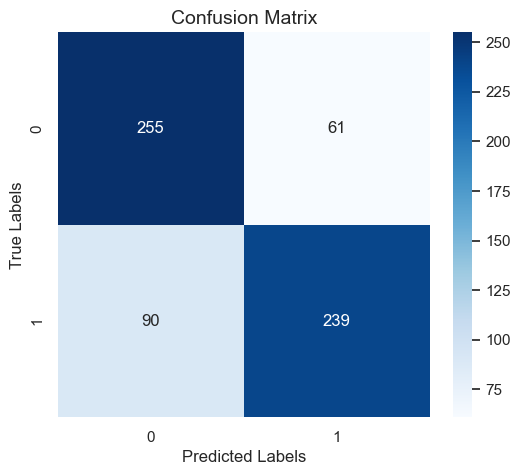

In [47]:
import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


def evaluate_model_from_checkpoint(model_class, model_path, test_loader, device=None):
    """
    Evaluate a trained PyTorch model from a checkpoint (.pth) on the test dataset.

    Args:
        model_class: The model class definition (e.g., EfficientNetClassifier).
        model_path (str): Path to the saved checkpoint file.
        test_loader (DataLoader): PyTorch DataLoader for test data.
        device (str, optional): 'cuda' or 'cpu'. Auto-detect if None.
    """
    # === Device setup ===
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n🧠 Using device: {device}")

    # === Load model ===
    model = model_class(num_classes=2, dropout_rate=0.3).to(device)

    checkpoint = torch.load(model_path, map_location=device)

    # Handle both raw state_dict and full checkpoint formats
    if "model_state_dict" in checkpoint:
        model.load_state_dict(checkpoint["model_state_dict"])
        print("✅ Loaded model weights from trainer checkpoint format.")
    else:
        model.load_state_dict(checkpoint)
        print("✅ Loaded raw model state_dict.")

    model.eval()

    # === Initialize tracking ===
    criterion = torch.nn.CrossEntropyLoss()
    all_preds, all_labels, all_probs = [], [], []
    test_loss = 0.0

    # === Evaluation loop ===
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc="Evaluating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # === Compute metrics ===
    test_loss /= len(test_loader)
    all_probs = np.array(all_probs)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    try:
        auc = roc_auc_score(all_labels, all_probs[:, 1])
    except Exception:
        auc = np.nan

    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)

    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
    else:
        sensitivity = specificity = np.nan

    # === Print results ===
    print("\n📊 Test Evaluation Summary")
    print(f"Test Loss     : {test_loss:.4f}")
    print(f"Accuracy      : {accuracy:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"Precision     : {precision:.4f}")
    print(f"Recall        : {recall:.4f}")
    print(f"AUC-ROC       : {auc:.4f}")
    print(f"Sensitivity   : {sensitivity:.4f}")
    print(f"Specificity   : {specificity:.4f}")
    print("\nClassification Report:\n", report)

    # === Confusion Matrix Plot ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # === Return metrics ===
    return {
        "loss": test_loss,
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "auc": auc,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "report": report,
        "confusion_matrix": cm
    }


# === Example Usage ===
# from your_model_file import EfficientNetClassifier
# from your_dataloader_file import test_loader

model_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\best_model.pth"

metrics = evaluate_model_from_checkpoint(
    model_class=EfficientNetClassifier,
    model_path=model_path,
    test_loader=test_loader
)

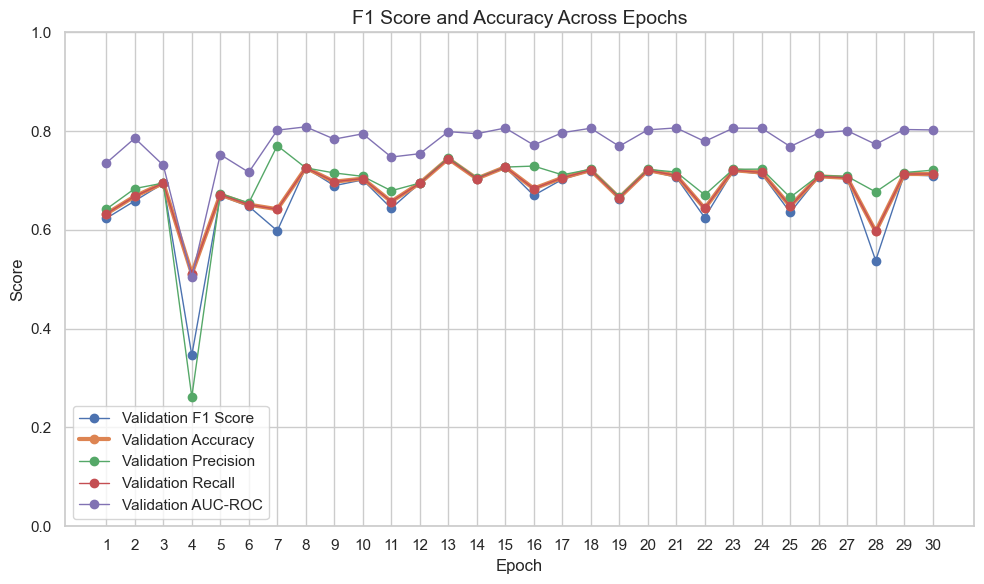

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
metrics_path = r"C:\Users\SHREY\Desktop\ssld-oct\code\fresh_run_01\training_metrics.csv"
df = pd.read_csv(metrics_path)

# Plot F1 score and Accuracy across epochs
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['val_f1_score'], marker='o', linewidth=1, label='Validation F1 Score')
plt.plot(df['epoch'], df['val_accuracy'], marker='o', linewidth=3, label='Validation Accuracy')
plt.plot(df['epoch'], df['val_precision'], marker='o', linewidth=1, label='Validation Precision')
plt.plot(df['epoch'], df['val_recall'], marker='o', linewidth=1, label='Validation Recall')
plt.plot(df['epoch'], df['val_auc_roc'], marker='o', linewidth=1, label='Validation AUC-ROC')

plt.title('F1 Score and Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.xticks(df['epoch'])  # show all epoch numbers on x-axis
plt.ylim(0, 1)  # F1 and accuracy are between 0 and 1
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## XAI

In [43]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()
    
    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        
        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_backward_hook(backward_hook))
    
    def _remove_hooks(self):
        for handle in self.hook_handles:
            handle.remove()
    
    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)
        
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        
        target = output[0, class_idx]
        target.backward()
        
        gradients = self.gradients[0]  # [C, H, W]
        activations = self.activations[0]  # [C, H, W]
        
        weights = gradients.mean(dim=(1, 2))  # Global average pooling over H,W
        cam = torch.zeros(activations.shape[1:], dtype=torch.float32, device=activations.device)
        
        for i, w in enumerate(weights):
            cam += w * activations[i]
        
        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / cam.max()
        
        cam = cam.cpu().numpy()
        self._remove_hooks()
        
        return cam

In [44]:
target_layer = model.backbone.features[-1]

In [47]:
import cv2

def show_cam_on_image(img_tensor, mask, alpha=0.5):
    img = img_tensor.squeeze().cpu().permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())  # normalize to [0, 1]

    # Resize CAM mask to image size
    mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))

    heatmap = cv2.applyColorMap(np.uint8(255 * mask_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    heatmap = heatmap[..., ::-1]  # BGR to RGB
    
    cam = heatmap * alpha + img
    cam = cam / np.max(cam)
    
    plt.figure(figsize=(6,6))
    plt.imshow(cam)
    plt.axis('off')
    plt.show()

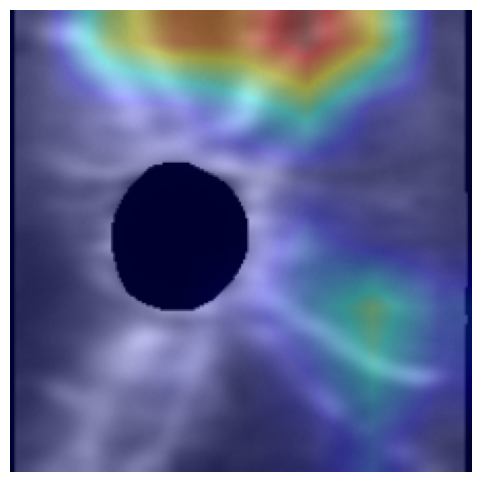

Image 0, True label: 1


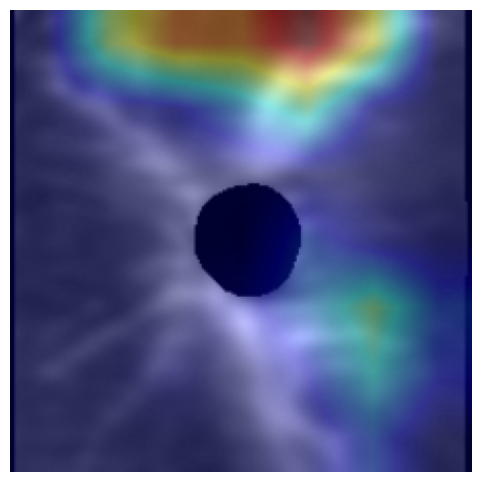

Image 1, True label: 0


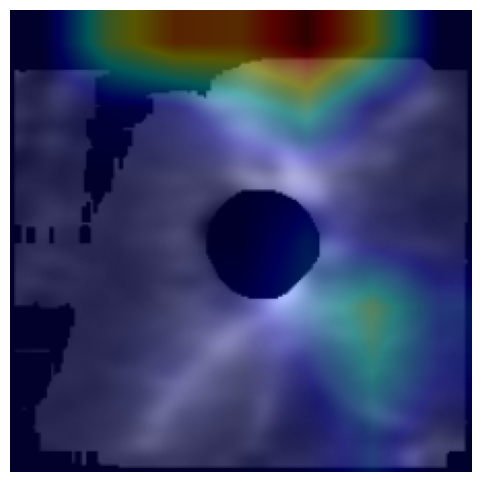

Image 2, True label: 0


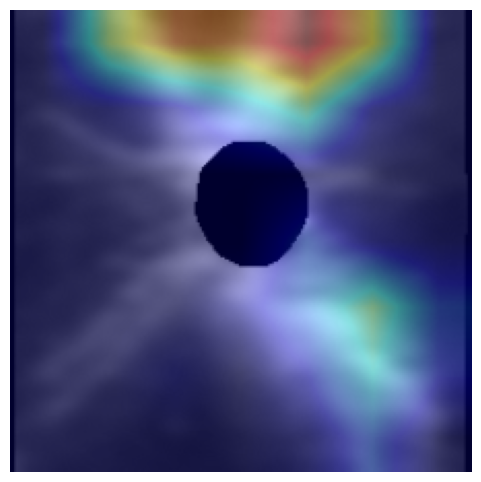

Image 3, True label: 0


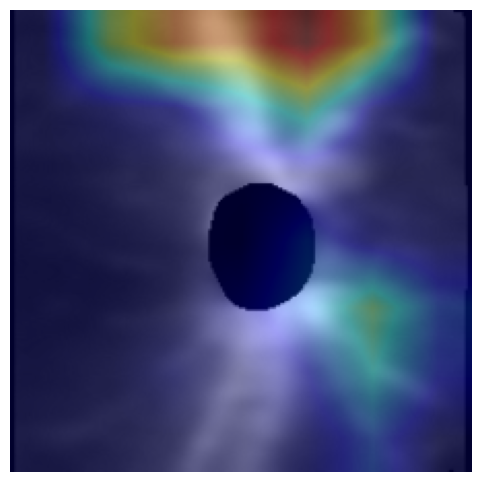

Image 4, True label: 0


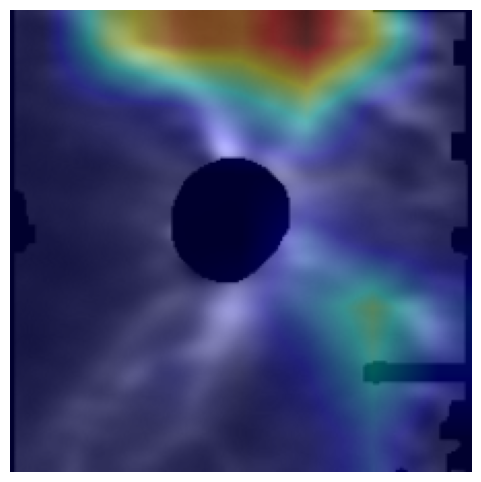

Image 5, True label: 1


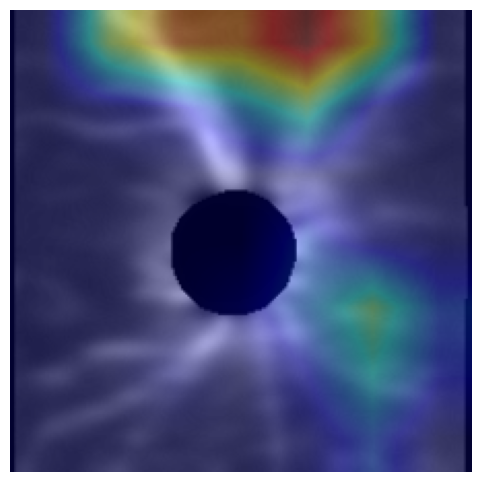

Image 6, True label: 1


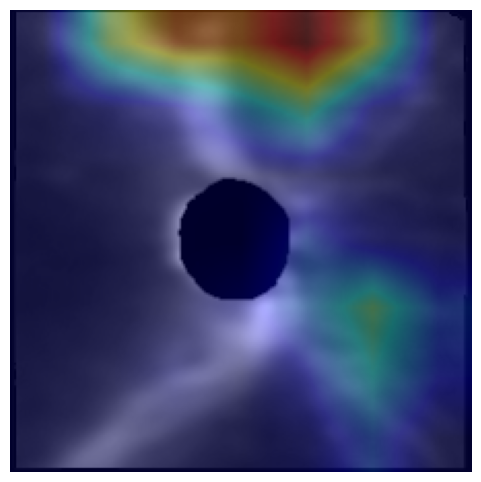

Image 7, True label: 0


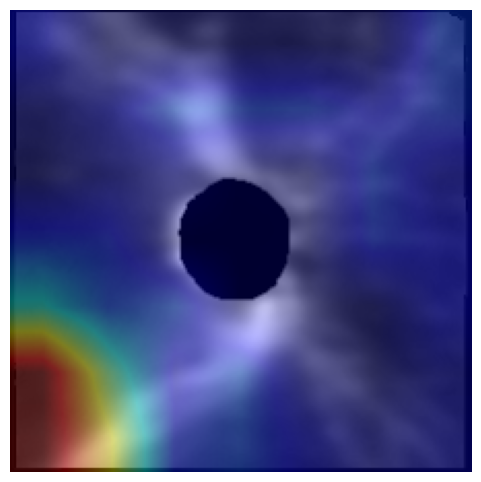

True Label: 0


In [53]:
# Get a batch of images & labels
for i, (images, labels, metas) in enumerate(test_loader):
    for j in range(min(images.size(0), 20)):  # Show first 4 images of batch
        input_tensor = images[j].unsqueeze(0).to(device)
        label = labels[j].item()

        cam_mask = grad_cam(input_tensor, class_idx=label)
        show_cam_on_image(input_tensor.cpu(), cam_mask)
        print(f"Image {i*test_loader.batch_size + j}, True label: {label}")

    if i >= 1:  # visualize for 2 batches then stop
        break

label = labels[0].item()

# Initialize GradCAM with model and last conv layer
grad_cam = GradCAM(model=model, target_layer=model.backbone.features[-1])

# Generate CAM heatmap for true label class (or top predicted class)
cam_mask = grad_cam(input_tensor, class_idx=label)

# Visualize
show_cam_on_image(input_tensor.cpu(), cam_mask)
print(f"True Label: {label}")

In [56]:
import os
import cv2
import numpy as np
import torch
from tqdm import tqdm

# === Output setup ===
output_root = "grad_cam_results"
os.makedirs(output_root, exist_ok=True)
for class_id in [0, 1]:
    os.makedirs(os.path.join(output_root, f"class_{class_id}"), exist_ok=True)

# === GradCAM setup ===
grad_cam = GradCAM(model=model, target_layer=model.backbone.features[-1])

# === Helper: Save heatmap image ===
def save_cam_image(img_tensor, cam_mask, file_path, alpha=0.5):
    # Detach before numpy conversion
    img = img_tensor.squeeze().detach().cpu().permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)

    mask_resized = cv2.resize(cam_mask, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * mask_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    heatmap = heatmap[..., ::-1]  # BGR → RGB

    cam = heatmap * alpha + img
    cam = cam / np.max(cam)
    cam = np.uint8(255 * cam)

    cv2.imwrite(file_path, cv2.cvtColor(cam, cv2.COLOR_RGB2BGR))

# === Grad-CAM generation ===
model.eval()
img_index = 0

# Count total number of test samples for progress bar
total_images = len(test_loader.dataset)

with tqdm(total=total_images, desc="Generating Grad-CAMs", unit="img") as pbar:
    for images, labels, _ in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        for i in range(images.size(0)):
            input_tensor = images[i].unsqueeze(0)
            input_tensor.requires_grad_()
            label = labels[i].item()

            cam_mask = grad_cam(input_tensor, class_idx=label)
            save_path = os.path.join(output_root, f"class_{label}", f"img_{img_index}.jpg")
            save_cam_image(input_tensor.cpu(), cam_mask, save_path)

            img_index += 1
            pbar.update(1)

print(f"\n✅ Grad-CAM saliency maps saved for {img_index} test images.")

Generating Grad-CAMs: 100%|█████████████████████████████████████████████████████████| 645/645 [01:45<00:00,  6.10img/s]


✅ Grad-CAM saliency maps saved for 645 test images.


In [65]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from collections import defaultdict
from tqdm import tqdm

def standardize_race(val):
    val_lower = str(val).strip().lower()
    if val_lower in ['black or african american', 'black or african american']:
        return 'African American'
    elif val_lower in ['white or caucasian', 'white']:
        return 'Caucasian'
    elif val_lower in ['asian']:
        return 'Asian'
    else:
        return val

def standardize_hispanic(val):
    if str(val) == '0' or str(val).lower() == 'no':
        return 'No'
    elif str(val) == '1':
        return 'Yes'
    elif str(val) == '-1':
        return 'Unknown'
    else:
        return val

def standardize_gender(val):
    if str(val) == '0' or str(val).lower() == 'female':
        return 'Female'
    elif str(val) == '1' or str(val).lower() == 'male':
        return 'Male'
    else:
        return val

def bin_age(val):
    try:
        age = float(val)
        if age < 60:
            return '0-60'
        else:
            return '60+'
    except:
        return 'Unknown'

# Load model
model = EfficientNetClassifier(num_classes=2, dropout_rate=0.3).to(device)
checkpoint = torch.load(r"C:\Users\SHREY\Desktop\ssld-oct\code\fifty_epochs\best_model.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Store metrics for each subgroup
metrics_dict = {k: defaultdict(list) for k in ['race', 'hispanic', 'age', 'gender']}
labels_all, preds_all, probs_all = [], [], []

with torch.no_grad():
    for images, labels, metas in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        # Store overall results
        labels_all.extend(labels.cpu().numpy())
        preds_all.extend(preds.cpu().numpy())
        probs_all.extend(probs.cpu().numpy())

        for i in range(images.size(0)):
            meta = metas[i]
            for subgroup in metrics_dict:
                val = meta.get(subgroup, 'Unknown')
                if isinstance(val, np.ndarray):
                    if val.shape == ():  # scalar
                        key = val.item()
                    else:
                        key = tuple(val.tolist())
                else:
                    key = val

                # Apply grouping/logical updates
                if subgroup == 'race':
                    key = standardize_race(key)
                elif subgroup == 'hispanic':
                    key = standardize_hispanic(key)
                elif subgroup == 'gender':
                    key = standardize_gender(key)
                elif subgroup == 'age':
                    key = bin_age(key)

                metrics_dict[subgroup][key].append({
                    'label': int(labels[i].item()),
                    'pred': int(preds[i].item()),
                    'prob': probs[i][1].item()
                })

# Calculate metrics per group
def calc_group_metrics(entries):
    y_true = [e['label'] for e in entries]
    y_pred = [e['pred'] for e in entries]
    y_prob = [e['prob'] for e in entries]
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred, average='weighted'),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'auc_roc': roc_auc_score(y_true, y_prob) if len(np.unique(y_true)) > 1 else None,
        'support': len(y_true)
    }

agg_results = {}
for subgroup in metrics_dict:
    group_results = {}
    total_samples = sum(len(entries) for entries in metrics_dict[subgroup].values())
    for key, entries in metrics_dict[subgroup].items():
        if len(entries) >= 5:  # Minimum samples to reliably compute metrics
            group_metrics = calc_group_metrics(entries)
            group_metrics['num_samples'] = len(entries)
            group_metrics['percentage'] = (len(entries) / total_samples) * 100
            group_results[key] = group_metrics
    agg_results[subgroup] = group_results

# Display as DataFrames for clarity with num_samples and percentage columns
for subgroup, results in agg_results.items():
    print(f"\n== Metrics by {subgroup.capitalize()} ==")
    df = pd.DataFrame(results).T
    df = df.sort_values(by='num_samples', ascending=False)
    print(df)

100%|████████████████████████████████████████████████████████████████████████████████| 162/162 [00:06<00:00, 23.58it/s]



== Metrics by Race ==
                  accuracy  f1_score  precision    recall   auc_roc  support  \
Caucasian         0.758123  0.756536   0.758356  0.758123  0.818406    277.0   
African American  0.714286  0.717553   0.726531  0.714286  0.772198    189.0   
Asian             0.776536  0.776228   0.776699  0.776536  0.821955    179.0   

                  num_samples  percentage  
Caucasian               277.0   42.945736  
African American        189.0   29.302326  
Asian                   179.0   27.751938  

== Metrics by Hispanic ==
         accuracy  f1_score  precision    recall   auc_roc  support  \
No       0.743676  0.743523   0.747190  0.743676  0.802597    593.0   
Unknown  0.793103  0.788203   0.791571  0.793103  0.782828     29.0   
Yes      0.866667  0.865476   0.896296  0.866667  0.892857     15.0   

         num_samples  percentage  
No             593.0   91.937984  
Unknown         29.0    4.496124  
Yes             15.0    2.325581  

== Metrics by Age ==
      

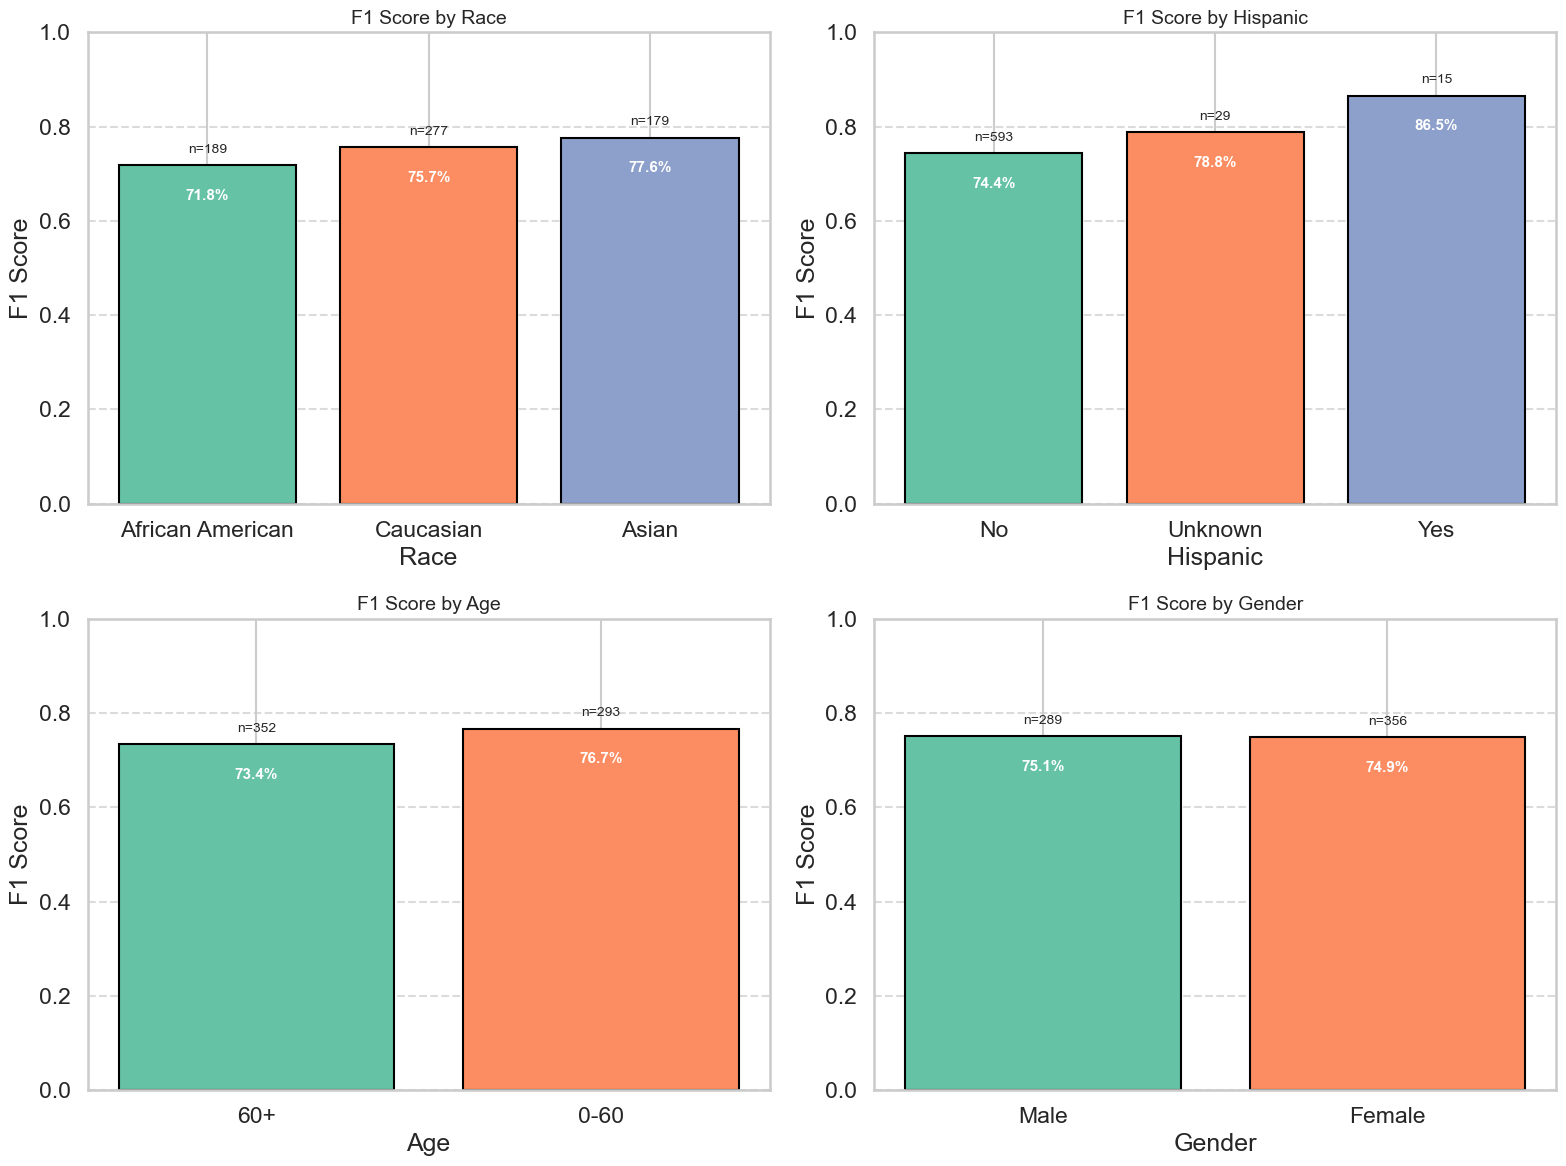

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for attractiveness
sns.set_style("whitegrid")
sns.set_context("talk")  # Bigger fonts for readability

# Define color palette
colors = sns.color_palette("Set2", 8)

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
subgroups = ['race', 'hispanic', 'age', 'gender']
axes = axes.flatten()

for ax, subgroup in zip(axes, subgroups):
    results = agg_results[subgroup]
    groups = list(results.keys())
    f1_scores = [results[g]['f1_score'] for g in groups]
    num_samples = [results[g]['num_samples'] for g in groups]

    bars = ax.bar(groups, f1_scores, color=colors[:len(groups)], edgecolor='black')
    ax.set_ylim(0, 1)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel(subgroup.capitalize())
    ax.set_title(f'F1 Score by {subgroup.capitalize()}', fontsize=14)
    
    # Annotate bars with F1 % and sample size
    for bar, f1, n in zip(bars, f1_scores, num_samples):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{f1*100:.1f}%', 
                ha='center', va='top', fontsize=11, fontweight='bold', color='white')
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'n={n}', 
                ha='center', va='bottom', fontsize=10)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()